# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 67981 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (    0 of 67981) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 67981) |             | Elapsed Time: 0:00:26 ETA: 2 days, 1:52:11

  0% (   26 of 67981) |                    | Elapsed Time: 0:00:26 ETA: 19:19:44

  0% (   42 of 67981) |                    | Elapsed Time: 0:00:26 ETA: 12:03:19

  0% (   59 of 67981) |                     | Elapsed Time: 0:00:27 ETA: 8:38:49

  0% (   76 of 67981) |                     | Elapsed Time: 0:00:27 ETA: 0:14:20

  0% (   94 of 67981) |                     | Elapsed Time: 0:00:27 ETA: 0:14:05

  0% (  112 of 67981) |                     | Elapsed Time: 0:00:27 ETA: 0:13:40

  0% (  129 of 67981) |                     | Elapsed Time: 0:00:27 ETA: 0:13:35

  0% (  146 of 67981) |                     | Elapsed Time: 0:00:28 ETA: 0:13:38

  0% (  162 of 67981) |                     | Elapsed Time: 0:00:28 ETA: 0:13:49

  0% (  186 of 67981) |                     | Elapsed Time: 0:00:28 ETA: 0:14:17

  0% (  203 of 67981) |                     | Elapsed Time: 0:00:28 ETA: 0:14:16

  0% (  221 of 67981) |                     | Elapsed Time: 0:00:29 ETA: 0:14:11

  0% (  238 of 67981) |                     | Elapsed Time: 0:00:29 ETA: 0:14:09

  0% (  254 of 67981) |                     | Elapsed Time: 0:00:29 ETA: 0:14:10

  0% (  270 of 67981) |                     | Elapsed Time: 0:00:29 ETA: 0:14:14

  0% (  286 of 67981) |                     | Elapsed Time: 0:00:29 ETA: 0:14:22

  0% (  302 of 67981) |                     | Elapsed Time: 0:00:30 ETA: 0:14:24

  0% (  319 of 67981) |                     | Elapsed Time: 0:00:30 ETA: 0:14:28

  0% (  335 of 67981) |                     | Elapsed Time: 0:00:30 ETA: 0:14:24

  0% (  353 of 67981) |                     | Elapsed Time: 0:00:30 ETA: 0:14:19

  0% (  369 of 67981) |                     | Elapsed Time: 0:00:30 ETA: 0:14:18

  0% (  385 of 67981) |                     | Elapsed Time: 0:00:31 ETA: 0:14:16

  0% (  402 of 67981) |                     | Elapsed Time: 0:00:31 ETA: 0:14:20

  0% (  419 of 67981) |                     | Elapsed Time: 0:00:31 ETA: 0:14:18

  0% (  436 of 67981) |                     | Elapsed Time: 0:00:31 ETA: 0:14:15

  0% (  453 of 67981) |                     | Elapsed Time: 0:00:31 ETA: 0:14:10

  0% (  470 of 67981) |                     | Elapsed Time: 0:00:32 ETA: 0:14:07

  0% (  487 of 67981) |                     | Elapsed Time: 0:00:32 ETA: 0:14:07

  0% (  504 of 67981) |                     | Elapsed Time: 0:00:32 ETA: 0:14:09

  0% (  520 of 67981) |                     | Elapsed Time: 0:00:32 ETA: 0:14:16

  0% (  536 of 67981) |                     | Elapsed Time: 0:00:33 ETA: 0:14:15

  0% (  552 of 67981) |                     | Elapsed Time: 0:00:33 ETA: 0:14:25

  0% (  570 of 67981) |                     | Elapsed Time: 0:00:33 ETA: 0:14:14

  0% (  588 of 67981) |                     | Elapsed Time: 0:00:33 ETA: 0:14:14

  0% (  604 of 67981) |                     | Elapsed Time: 0:00:33 ETA: 0:14:13

  0% (  620 of 67981) |                     | Elapsed Time: 0:00:34 ETA: 0:14:09

  0% (  637 of 67981) |                     | Elapsed Time: 0:00:34 ETA: 0:14:08

  0% (  654 of 67981) |                     | Elapsed Time: 0:00:34 ETA: 0:14:16

  0% (  672 of 67981) |                     | Elapsed Time: 0:00:34 ETA: 0:14:09

  1% (  689 of 67981) |                     | Elapsed Time: 0:00:34 ETA: 0:14:03

  1% (  706 of 67981) |                     | Elapsed Time: 0:00:35 ETA: 0:13:59

  1% (  722 of 67981) |                     | Elapsed Time: 0:00:35 ETA: 0:14:10

  1% (  739 of 67981) |                     | Elapsed Time: 0:00:35 ETA: 0:14:03

  1% (  757 of 67981) |                     | Elapsed Time: 0:00:35 ETA: 0:14:00

  1% (  774 of 67981) |                     | Elapsed Time: 0:00:36 ETA: 0:14:02

  1% (  790 of 67981) |                     | Elapsed Time: 0:00:36 ETA: 0:14:08

  1% (  808 of 67981) |                     | Elapsed Time: 0:00:36 ETA: 0:13:56

  1% (  826 of 67981) |                     | Elapsed Time: 0:00:36 ETA: 0:13:53

  1% (  850 of 67981) |                     | Elapsed Time: 0:00:36 ETA: 0:14:01

  1% (  866 of 67981) |                     | Elapsed Time: 0:00:37 ETA: 0:14:01

  1% (  883 of 67981) |                     | Elapsed Time: 0:00:37 ETA: 0:14:04

  1% (  901 of 67981) |                     | Elapsed Time: 0:00:37 ETA: 0:14:08

  1% (  918 of 67981) |                     | Elapsed Time: 0:00:37 ETA: 0:14:10

  1% (  934 of 67981) |                     | Elapsed Time: 0:00:38 ETA: 0:14:15

  1% (  950 of 67981) |                     | Elapsed Time: 0:00:38 ETA: 0:14:06

  1% (  966 of 67981) |                     | Elapsed Time: 0:00:38 ETA: 0:14:19

  1% (  983 of 67981) |                     | Elapsed Time: 0:00:38 ETA: 0:14:21

  1% ( 1000 of 67981) |                     | Elapsed Time: 0:00:38 ETA: 0:14:15

  1% ( 1017 of 67981) |                     | Elapsed Time: 0:00:39 ETA: 0:14:14

  1% ( 1033 of 67981) |                     | Elapsed Time: 0:00:39 ETA: 0:14:09

  1% ( 1050 of 67981) |                     | Elapsed Time: 0:00:39 ETA: 0:14:06

  1% ( 1068 of 67981) |                     | Elapsed Time: 0:00:39 ETA: 0:14:00

  1% ( 1085 of 67981) |                     | Elapsed Time: 0:00:39 ETA: 0:13:54

  1% ( 1102 of 67981) |                     | Elapsed Time: 0:00:40 ETA: 0:13:52

  1% ( 1119 of 67981) |                     | Elapsed Time: 0:00:40 ETA: 0:13:54

  1% ( 1136 of 67981) |                     | Elapsed Time: 0:00:40 ETA: 0:13:59

  1% ( 1152 of 67981) |                     | Elapsed Time: 0:00:40 ETA: 0:14:07

  1% ( 1169 of 67981) |                     | Elapsed Time: 0:00:41 ETA: 0:14:07

  1% ( 1186 of 67981) |                     | Elapsed Time: 0:00:41 ETA: 0:14:06

  1% ( 1203 of 67981) |                     | Elapsed Time: 0:00:41 ETA: 0:13:58

  1% ( 1221 of 67981) |                     | Elapsed Time: 0:00:41 ETA: 0:13:53

  1% ( 1238 of 67981) |                     | Elapsed Time: 0:00:41 ETA: 0:13:46

  1% ( 1254 of 67981) |                     | Elapsed Time: 0:00:42 ETA: 0:13:56

  1% ( 1271 of 67981) |                     | Elapsed Time: 0:00:42 ETA: 0:13:55

  1% ( 1288 of 67981) |                     | Elapsed Time: 0:00:42 ETA: 0:13:58

  1% ( 1304 of 67981) |                     | Elapsed Time: 0:00:42 ETA: 0:14:04

  1% ( 1321 of 67981) |                     | Elapsed Time: 0:00:42 ETA: 0:14:00

  1% ( 1338 of 67981) |                     | Elapsed Time: 0:00:43 ETA: 0:13:50

  1% ( 1355 of 67981) |                     | Elapsed Time: 0:00:43 ETA: 0:13:50

  2% ( 1372 of 67981) |                     | Elapsed Time: 0:00:43 ETA: 0:13:47

  2% ( 1388 of 67981) |                     | Elapsed Time: 0:00:43 ETA: 0:13:58

  2% ( 1406 of 67981) |                     | Elapsed Time: 0:00:43 ETA: 0:13:47

  2% ( 1422 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:13:52

  2% ( 1439 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:13:58

  2% ( 1455 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:13:58

  2% ( 1480 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:14:00

  2% ( 1497 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:13:58

  2% ( 1513 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:14:05

  2% ( 1531 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:13:49

  2% ( 1548 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:13:46

  2% ( 1564 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:13:50

  2% ( 1580 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:13:58

  2% ( 1597 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:14:01

  2% ( 1613 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:14:12

  2% ( 1630 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:14:08

  2% ( 1648 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:13:57

  2% ( 1666 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:13:49

  2% ( 1683 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:13:50

  2% ( 1700 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:13:51

  2% ( 1717 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:13:56

  2% ( 1734 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:13:59

  2% ( 1751 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:13:59

  2% ( 1769 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:13:45

  2% ( 1787 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:13:33

  2% ( 1805 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:13:22

  2% ( 1822 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:13:18

  2% ( 1840 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:13:16

  2% ( 1857 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:13:19

  2% ( 1875 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:13:19

  2% ( 1893 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:13:27

  2% ( 1909 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:13:34

  2% ( 1926 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:13:40

  2% ( 1943 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:13:43

  2% ( 1961 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:13:44

  2% ( 1977 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:13:47

  2% ( 1994 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:13:44

  2% ( 2012 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:13:39

  2% ( 2029 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:13:43

  3% ( 2046 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:13:44

  3% ( 2064 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:13:36

  3% ( 2082 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:13:31

  3% ( 2099 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:13:37

  3% ( 2116 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:13:32

  3% ( 2134 of 67981) |                     | Elapsed Time: 0:00:53 ETA: 0:13:37

  3% ( 2151 of 67981) |                     | Elapsed Time: 0:00:53 ETA: 0:13:41

  3% ( 2160 of 67981) |                     | Elapsed Time: 0:00:53 ETA: 0:13:41

  3% ( 2171 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:26:25

  3% ( 2187 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:26:42

  3% ( 2203 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:27:16

  3% ( 2219 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:27:35

  3% ( 2235 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:14:10

  3% ( 2251 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:14:10

  3% ( 2268 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:14:07

  3% ( 2285 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:14:01

  3% ( 2301 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:14:06

  3% ( 2319 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:13:59

  3% ( 2337 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:13:49

  3% ( 2355 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:13:36

  3% ( 2373 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:13:22

  3% ( 2389 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:13:21

  3% ( 2406 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:13:23

  3% ( 2423 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:13:27

  3% ( 2441 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:13:38

  3% ( 2458 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:13:38

  3% ( 2476 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:13:34

  3% ( 2492 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:13:32

  3% ( 2508 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:13:39

  3% ( 2526 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:13:34

  3% ( 2550 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:13:31

  3% ( 2566 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:13:43

  3% ( 2584 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:13:35

  3% ( 2601 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:13:34

  3% ( 2618 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:13:38

  3% ( 2635 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:13:23

  3% ( 2652 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:13:27

  3% ( 2670 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:13:24

  3% ( 2688 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:13:26

  3% ( 2706 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:13:17

  4% ( 2724 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:13:10

  4% ( 2742 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:13:01

  4% ( 2758 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:13:09

  4% ( 2776 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:13:08

  4% ( 2792 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:13:15

  4% ( 2810 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:13:19

  4% ( 2828 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:13:14

  4% ( 2846 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:13:06

  4% ( 2864 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:13:04

  4% ( 2879 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:13:28

  4% ( 2895 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:13:52

  4% ( 2912 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:13:59

  4% ( 2928 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:14:12

  4% ( 2945 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:14:11

  4% ( 2963 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:13:17

  4% ( 2981 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:13:09

  4% ( 2999 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:13:04

  4% ( 3017 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:12:55

  4% ( 3035 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:13:07

  4% ( 3053 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:13:09

  4% ( 3071 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:13:11

  4% ( 3089 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:13:05

  4% ( 3107 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:12:52

  4% ( 3125 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:12:43

  4% ( 3143 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:12:37

  4% ( 3161 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:12:35

  4% ( 3179 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:12:41

  4% ( 3195 of 67981) |                     | Elapsed Time: 0:01:07 ETA: 0:13:10

  4% ( 3212 of 67981) |                     | Elapsed Time: 0:01:07 ETA: 0:13:16

  4% ( 3230 of 67981) |                     | Elapsed Time: 0:01:07 ETA: 0:13:10

  4% ( 3248 of 67981) |#                    | Elapsed Time: 0:01:07 ETA: 0:13:02

  4% ( 3266 of 67981) |#                    | Elapsed Time: 0:01:07 ETA: 0:12:39

  4% ( 3284 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:12:14

  4% ( 3302 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:12:15

  4% ( 3320 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:12:19

  4% ( 3338 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:12:17

  4% ( 3356 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:12:18

  4% ( 3374 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:12:20

  5% ( 3400 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:12:22

  5% ( 3418 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:12:20

  5% ( 3435 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:12:40

  5% ( 3452 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:12:52

  5% ( 3470 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:13:06

  5% ( 3486 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:13:25

  5% ( 3502 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:13:37

  5% ( 3519 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:13:30

  5% ( 3536 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:13:30

  5% ( 3554 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:13:28

  5% ( 3570 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:13:33

  5% ( 3588 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:13:26

  5% ( 3605 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:13:25

  5% ( 3621 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:13:27

  5% ( 3638 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:13:22

  5% ( 3654 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:13:36

  5% ( 3672 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:13:34

  5% ( 3690 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:13:29

  5% ( 3707 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:13:29

  5% ( 3724 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:13:14

  5% ( 3740 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:13:18

  5% ( 3757 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:13:17

  5% ( 3775 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:18

  5% ( 3792 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:19

  5% ( 3810 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:18

  5% ( 3827 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:19

  5% ( 3845 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:19

  5% ( 3862 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:13:20

  5% ( 3880 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:13:20

  5% ( 3898 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:13:18

  5% ( 3915 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:13:18

  5% ( 3933 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:13:16

  5% ( 3950 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:13:13

  5% ( 3968 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:13:08

  5% ( 3984 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:13:10

  5% ( 4001 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:13:12

  5% ( 4019 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:13:13

  5% ( 4036 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:13:16

  5% ( 4053 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:13:22

  5% ( 4070 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:13:19

  6% ( 4087 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:13:20

  6% ( 4103 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:13:25

  6% ( 4120 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:13:14

  6% ( 4137 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:13:17

  6% ( 4154 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:13:18

  6% ( 4171 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:13:17

  6% ( 4186 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:13:34

  6% ( 4201 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:14:01

  6% ( 4218 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:14:09

  6% ( 4233 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:14:31

  6% ( 4249 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:39

  6% ( 4265 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:40

  6% ( 4281 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:56

  6% ( 4296 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:56

  6% ( 4310 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:15:04

  6% ( 4325 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:15:12

  6% ( 4339 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:15:22

  6% ( 4353 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:15:32

  6% ( 4367 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:15:33

  6% ( 4382 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:15:33

  6% ( 4396 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:15:30

  6% ( 4410 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:15:29

  6% ( 4424 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:15:28

  6% ( 4438 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:15:31

  6% ( 4453 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:15:28

  6% ( 4467 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:15:25

  6% ( 4481 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:15:23

  6% ( 4495 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:15:19

  6% ( 4509 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:15:21

  6% ( 4525 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:15:19

  6% ( 4539 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:15:22

  6% ( 4554 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:15:31

  6% ( 4570 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:15:21

  6% ( 4586 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:15:12

  6% ( 4600 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:15:20

  6% ( 4614 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:15:10

  6% ( 4629 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:15:15

  6% ( 4644 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:15:18

  6% ( 4658 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:15:29

  6% ( 4674 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:15:09

  6% ( 4691 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:14:42

  6% ( 4707 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:14:25

  6% ( 4722 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:14:13

  6% ( 4738 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:13:52

  6% ( 4752 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:29

  7% ( 4770 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:14

  7% ( 4787 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:01

  7% ( 4805 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:13:52

  7% ( 4823 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:13:22

  7% ( 4839 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:13:10

  7% ( 4855 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:13:13

  7% ( 4871 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:13:25

  7% ( 4889 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:27

  7% ( 4906 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:26

  7% ( 4923 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:24

  7% ( 4940 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:21

  7% ( 4956 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:27

  7% ( 4973 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:13:39

  7% ( 4989 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:13:41

  7% ( 5007 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:13:30

  7% ( 5025 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:13:19

  7% ( 5041 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:13:05

  7% ( 5058 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:13:05

  7% ( 5074 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:13:06

  7% ( 5090 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:13:13

  7% ( 5107 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:13:20

  7% ( 5123 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:13:19

  7% ( 5139 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:13:23

  7% ( 5156 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:13:20

  7% ( 5173 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:13:15

  7% ( 5189 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:13:15

  7% ( 5205 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:13:13

  7% ( 5223 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:13:01

  7% ( 5239 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:13:11

  7% ( 5255 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:13:16

  7% ( 5272 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:13:13

  7% ( 5289 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:13:16

  7% ( 5306 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:13:13

  7% ( 5322 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:13:11

  7% ( 5340 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:13:08

  7% ( 5358 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:13:06

  7% ( 5376 of 67981) |#                    | Elapsed Time: 0:01:35 ETA: 0:13:04

  7% ( 5394 of 67981) |#                    | Elapsed Time: 0:01:35 ETA: 0:12:57

  7% ( 5411 of 67981) |#                    | Elapsed Time: 0:01:35 ETA: 0:12:58

  7% ( 5427 of 67981) |#                    | Elapsed Time: 0:01:35 ETA: 0:13:00

  8% ( 5443 of 67981) |#                    | Elapsed Time: 0:01:36 ETA: 0:13:07

  8% ( 5459 of 67981) |#                    | Elapsed Time: 0:01:36 ETA: 0:13:14

  8% ( 5475 of 67981) |#                    | Elapsed Time: 0:01:36 ETA: 0:13:15

  8% ( 5492 of 67981) |#                    | Elapsed Time: 0:01:36 ETA: 0:13:15

  8% ( 5508 of 67981) |#                    | Elapsed Time: 0:01:36 ETA: 0:13:11

  8% ( 5524 of 67981) |#                    | Elapsed Time: 0:01:37 ETA: 0:13:09

  8% ( 5540 of 67981) |#                    | Elapsed Time: 0:01:37 ETA: 0:13:09

  8% ( 5556 of 67981) |#                    | Elapsed Time: 0:01:37 ETA: 0:13:07

  8% ( 5572 of 67981) |#                    | Elapsed Time: 0:01:37 ETA: 0:13:12

  8% ( 5585 of 67981) |#                    | Elapsed Time: 0:01:38 ETA: 0:28:57

  8% ( 5601 of 67981) |#                    | Elapsed Time: 0:01:39 ETA: 0:29:06

  8% ( 5617 of 67981) |#                    | Elapsed Time: 0:01:39 ETA: 0:29:13

  8% ( 5633 of 67981) |#                    | Elapsed Time: 0:01:39 ETA: 0:29:20

  8% ( 5649 of 67981) |#                    | Elapsed Time: 0:01:39 ETA: 0:13:47

  8% ( 5665 of 67981) |#                    | Elapsed Time: 0:01:39 ETA: 0:13:42

  8% ( 5681 of 67981) |#                    | Elapsed Time: 0:01:40 ETA: 0:13:32

  8% ( 5698 of 67981) |#                    | Elapsed Time: 0:01:40 ETA: 0:13:23

  8% ( 5714 of 67981) |#                    | Elapsed Time: 0:01:40 ETA: 0:13:20

  8% ( 5730 of 67981) |#                    | Elapsed Time: 0:01:40 ETA: 0:13:19

  8% ( 5746 of 67981) |#                    | Elapsed Time: 0:01:41 ETA: 0:13:20

  8% ( 5762 of 67981) |#                    | Elapsed Time: 0:01:41 ETA: 0:13:23

  8% ( 5779 of 67981) |#                    | Elapsed Time: 0:01:41 ETA: 0:13:18

  8% ( 5796 of 67981) |#                    | Elapsed Time: 0:01:41 ETA: 0:13:13

  8% ( 5813 of 67981) |#                    | Elapsed Time: 0:01:41 ETA: 0:13:02

  8% ( 5830 of 67981) |#                    | Elapsed Time: 0:01:42 ETA: 0:12:54

  8% ( 5847 of 67981) |#                    | Elapsed Time: 0:01:42 ETA: 0:12:54

  8% ( 5865 of 67981) |#                    | Elapsed Time: 0:01:42 ETA: 0:12:47

  8% ( 5882 of 67981) |#                    | Elapsed Time: 0:01:42 ETA: 0:12:51

  8% ( 5899 of 67981) |#                    | Elapsed Time: 0:01:42 ETA: 0:12:52

  8% ( 5916 of 67981) |#                    | Elapsed Time: 0:01:43 ETA: 0:12:51

  8% ( 5933 of 67981) |#                    | Elapsed Time: 0:01:43 ETA: 0:12:50

  8% ( 5958 of 67981) |#                    | Elapsed Time: 0:01:43 ETA: 0:12:47

  8% ( 5974 of 67981) |#                    | Elapsed Time: 0:01:43 ETA: 0:12:52

  8% ( 5991 of 67981) |#                    | Elapsed Time: 0:01:44 ETA: 0:12:53

  8% ( 6009 of 67981) |#                    | Elapsed Time: 0:01:44 ETA: 0:12:48

  8% ( 6027 of 67981) |#                    | Elapsed Time: 0:01:44 ETA: 0:12:41

  8% ( 6044 of 67981) |#                    | Elapsed Time: 0:01:44 ETA: 0:12:37

  8% ( 6062 of 67981) |#                    | Elapsed Time: 0:01:44 ETA: 0:12:35

  8% ( 6080 of 67981) |#                    | Elapsed Time: 0:01:45 ETA: 0:12:33

  8% ( 6097 of 67981) |#                    | Elapsed Time: 0:01:45 ETA: 0:12:42

  8% ( 6115 of 67981) |#                    | Elapsed Time: 0:01:45 ETA: 0:12:42

  9% ( 6132 of 67981) |#                    | Elapsed Time: 0:01:45 ETA: 0:12:45

  9% ( 6148 of 67981) |#                    | Elapsed Time: 0:01:46 ETA: 0:12:48

  9% ( 6165 of 67981) |#                    | Elapsed Time: 0:01:46 ETA: 0:12:57

  9% ( 6182 of 67981) |#                    | Elapsed Time: 0:01:46 ETA: 0:12:55

  9% ( 6199 of 67981) |#                    | Elapsed Time: 0:01:46 ETA: 0:12:57

  9% ( 6215 of 67981) |#                    | Elapsed Time: 0:01:46 ETA: 0:12:58

  9% ( 6233 of 67981) |#                    | Elapsed Time: 0:01:47 ETA: 0:12:56

  9% ( 6249 of 67981) |#                    | Elapsed Time: 0:01:47 ETA: 0:12:48

  9% ( 6265 of 67981) |#                    | Elapsed Time: 0:01:47 ETA: 0:13:02

  9% ( 6280 of 67981) |#                    | Elapsed Time: 0:01:47 ETA: 0:13:14

  9% ( 6297 of 67981) |#                    | Elapsed Time: 0:01:47 ETA: 0:13:15

  9% ( 6314 of 67981) |#                    | Elapsed Time: 0:01:48 ETA: 0:13:12

  9% ( 6330 of 67981) |#                    | Elapsed Time: 0:01:48 ETA: 0:13:12

  9% ( 6348 of 67981) |#                    | Elapsed Time: 0:01:48 ETA: 0:12:49

  9% ( 6365 of 67981) |#                    | Elapsed Time: 0:01:48 ETA: 0:12:49

  9% ( 6383 of 67981) |#                    | Elapsed Time: 0:01:48 ETA: 0:12:47

  9% ( 6401 of 67981) |#                    | Elapsed Time: 0:01:49 ETA: 0:12:44

  9% ( 6418 of 67981) |#                    | Elapsed Time: 0:01:49 ETA: 0:12:42

  9% ( 6436 of 67981) |#                    | Elapsed Time: 0:01:49 ETA: 0:12:36

  9% ( 6454 of 67981) |#                    | Elapsed Time: 0:01:49 ETA: 0:12:29

  9% ( 6472 of 67981) |#                    | Elapsed Time: 0:01:50 ETA: 0:12:24

  9% ( 6490 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:12:17

  9% ( 6508 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:12:12

  9% ( 6526 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:12:15

  9% ( 6544 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:12:16

  9% ( 6562 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:12:17

  9% ( 6579 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:12:26

  9% ( 6597 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:12:30

  9% ( 6615 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:12:34

  9% ( 6633 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:12:38

  9% ( 6651 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:12:37

  9% ( 6669 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:12:34

  9% ( 6687 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:12:32

  9% ( 6703 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:12:38

  9% ( 6721 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:12:39

  9% ( 6739 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:12:35

  9% ( 6754 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:12:51

  9% ( 6770 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:13:10

  9% ( 6786 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:13:22

 10% ( 6808 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:13:21

 10% ( 6824 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:13:26

 10% ( 6842 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:13:03

 10% ( 6858 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:12:48

 10% ( 6875 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:12:44

 10% ( 6891 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:12:45

 10% ( 6908 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:12:48

 10% ( 6924 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:12:48

 10% ( 6940 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:12:51

 10% ( 6958 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:12:48

 10% ( 6974 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:12:58

 10% ( 6990 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:13:17

 10% ( 7006 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:13:30

 10% ( 7022 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:13:51

 10% ( 7038 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:14:12

 10% ( 7054 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:14:14

 10% ( 7071 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:13:56

 10% ( 7088 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:13:26

 10% ( 7107 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:12:44

 10% ( 7125 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:12:06

 10% ( 7144 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:34

 10% ( 7162 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:29

 10% ( 7179 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:43

 10% ( 7198 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:11:43

 10% ( 7216 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:11:52

 10% ( 7232 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:12:10

 10% ( 7250 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:11:58

 10% ( 7267 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:12:13

 10% ( 7282 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:13:04

 10% ( 7296 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:13:32

 10% ( 7312 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:13:51

 10% ( 7328 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:14:20

 10% ( 7343 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:32

 10% ( 7358 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:08

 10% ( 7373 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:10

 10% ( 7388 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:14

 10% ( 7404 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:06

 10% ( 7420 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:14:04

 10% ( 7436 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:13:42

 10% ( 7452 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:13:38

 10% ( 7468 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:13:41

 11% ( 7484 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:13:39

 11% ( 7499 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:13:50

 11% ( 7514 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:13:53

 11% ( 7530 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:14:02

 11% ( 7546 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:14:01

 11% ( 7561 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:00

 11% ( 7576 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:13

 11% ( 7592 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:08

 11% ( 7608 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:06

 11% ( 7624 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:00

 11% ( 7640 of 67981) |##                   | Elapsed Time: 0:02:05 ETA: 0:13:42

 11% ( 7656 of 67981) |##                   | Elapsed Time: 0:02:05 ETA: 0:13:45

 11% ( 7672 of 67981) |##                   | Elapsed Time: 0:02:05 ETA: 0:13:52

 11% ( 7688 of 67981) |##                   | Elapsed Time: 0:02:05 ETA: 0:13:49

 11% ( 7704 of 67981) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:48

 11% ( 7720 of 67981) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:44

 11% ( 7736 of 67981) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:47

 11% ( 7752 of 67981) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:51

 11% ( 7768 of 67981) |##                   | Elapsed Time: 0:02:06 ETA: 0:13:59

 11% ( 7783 of 67981) |##                   | Elapsed Time: 0:02:07 ETA: 0:14:01

 11% ( 7799 of 67981) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:49

 11% ( 7815 of 67981) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:33

 11% ( 7831 of 67981) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:17

 11% ( 7847 of 67981) |##                   | Elapsed Time: 0:02:07 ETA: 0:13:02

 11% ( 7863 of 67981) |##                   | Elapsed Time: 0:02:08 ETA: 0:12:59

 11% ( 7877 of 67981) |##                   | Elapsed Time: 0:02:08 ETA: 0:13:44

 11% ( 7891 of 67981) |##                   | Elapsed Time: 0:02:08 ETA: 0:14:14

 11% ( 7906 of 67981) |##                   | Elapsed Time: 0:02:08 ETA: 0:14:54

 11% ( 7921 of 67981) |##                   | Elapsed Time: 0:02:09 ETA: 0:15:17

 11% ( 7936 of 67981) |##                   | Elapsed Time: 0:02:09 ETA: 0:15:17

 11% ( 7951 of 67981) |##                   | Elapsed Time: 0:02:09 ETA: 0:14:46

 11% ( 7967 of 67981) |##                   | Elapsed Time: 0:02:09 ETA: 0:14:12

 11% ( 7981 of 67981) |##                   | Elapsed Time: 0:02:09 ETA: 0:14:08

 11% ( 7995 of 67981) |##                   | Elapsed Time: 0:02:10 ETA: 0:14:22

 11% ( 8009 of 67981) |##                   | Elapsed Time: 0:02:10 ETA: 0:14:33

 11% ( 8024 of 67981) |##                   | Elapsed Time: 0:02:10 ETA: 0:14:41

 11% ( 8040 of 67981) |##                   | Elapsed Time: 0:02:10 ETA: 0:14:18

 11% ( 8056 of 67981) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:44

 11% ( 8072 of 67981) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:19

 11% ( 8088 of 67981) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:00

 11% ( 8104 of 67981) |##                   | Elapsed Time: 0:02:11 ETA: 0:12:58

 11% ( 8122 of 67981) |##                   | Elapsed Time: 0:02:11 ETA: 0:12:46

 11% ( 8140 of 67981) |##                   | Elapsed Time: 0:02:12 ETA: 0:12:35

 11% ( 8157 of 67981) |##                   | Elapsed Time: 0:02:12 ETA: 0:12:26

 12% ( 8173 of 67981) |##                   | Elapsed Time: 0:02:12 ETA: 0:12:32

 12% ( 8189 of 67981) |##                   | Elapsed Time: 0:02:12 ETA: 0:12:46

 12% ( 8205 of 67981) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:05

 12% ( 8221 of 67981) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:22

 12% ( 8237 of 67981) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:23

 12% ( 8253 of 67981) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:22

 12% ( 8269 of 67981) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:21

 12% ( 8285 of 67981) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:21

 12% ( 8301 of 67981) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:23

 12% ( 8317 of 67981) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:22

 12% ( 8333 of 67981) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:19

 12% ( 8349 of 67981) |##                   | Elapsed Time: 0:02:14 ETA: 0:13:19

 12% ( 8365 of 67981) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:17

 12% ( 8379 of 67981) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:36

 12% ( 8395 of 67981) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:39

 12% ( 8411 of 67981) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:34

 12% ( 8427 of 67981) |##                   | Elapsed Time: 0:02:15 ETA: 0:13:32

 12% ( 8443 of 67981) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:25

 12% ( 8461 of 67981) |##                   | Elapsed Time: 0:02:16 ETA: 0:12:49

 12% ( 8479 of 67981) |##                   | Elapsed Time: 0:02:16 ETA: 0:12:28

 12% ( 8498 of 67981) |##                   | Elapsed Time: 0:02:16 ETA: 0:12:10

 12% ( 8516 of 67981) |##                   | Elapsed Time: 0:02:16 ETA: 0:11:50

 12% ( 8534 of 67981) |##                   | Elapsed Time: 0:02:17 ETA: 0:11:46

 12% ( 8551 of 67981) |##                   | Elapsed Time: 0:02:17 ETA: 0:11:54

 12% ( 8570 of 67981) |##                   | Elapsed Time: 0:02:17 ETA: 0:11:48

 12% ( 8588 of 67981) |##                   | Elapsed Time: 0:02:17 ETA: 0:11:45

 12% ( 8606 of 67981) |##                   | Elapsed Time: 0:02:18 ETA: 0:11:39

 12% ( 8624 of 67981) |##                   | Elapsed Time: 0:02:18 ETA: 0:11:38

 12% ( 8642 of 67981) |##                   | Elapsed Time: 0:02:18 ETA: 0:11:29

 12% ( 8660 of 67981) |##                   | Elapsed Time: 0:02:18 ETA: 0:11:34

 12% ( 8678 of 67981) |##                   | Elapsed Time: 0:02:18 ETA: 0:11:33

 12% ( 8696 of 67981) |##                   | Elapsed Time: 0:02:19 ETA: 0:11:33

 12% ( 8712 of 67981) |##                   | Elapsed Time: 0:02:19 ETA: 0:11:51

 12% ( 8726 of 67981) |##                   | Elapsed Time: 0:02:19 ETA: 0:12:24

 12% ( 8741 of 67981) |##                   | Elapsed Time: 0:02:19 ETA: 0:12:57

 12% ( 8762 of 67981) |##                   | Elapsed Time: 0:02:20 ETA: 0:13:57

 12% ( 8776 of 67981) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:16

 12% ( 8791 of 67981) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:12

 12% ( 8806 of 67981) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:15

 12% ( 8821 of 67981) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:12

 12% ( 8837 of 67981) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:59

 13% ( 8853 of 67981) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:48

 13% ( 8869 of 67981) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:42

 13% ( 8884 of 67981) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:33

 13% ( 8900 of 67981) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:27

 13% ( 8916 of 67981) |##                   | Elapsed Time: 0:02:22 ETA: 0:13:34

 13% ( 8931 of 67981) |##                   | Elapsed Time: 0:02:22 ETA: 0:13:34

 13% ( 8947 of 67981) |##                   | Elapsed Time: 0:02:22 ETA: 0:13:20

 13% ( 8963 of 67981) |##                   | Elapsed Time: 0:02:22 ETA: 0:13:17

 13% ( 8979 of 67981) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:07

 13% ( 8995 of 67981) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:02

 13% ( 9011 of 67981) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:05

 13% ( 9027 of 67981) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:02

 13% ( 9043 of 67981) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:04

 13% ( 9059 of 67981) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:00

 13% ( 9075 of 67981) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:02

 13% ( 9091 of 67981) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:05

 13% ( 9107 of 67981) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:10

 13% ( 9123 of 67981) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:06

 13% ( 9139 of 67981) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:08

 13% ( 9156 of 67981) |##                   | Elapsed Time: 0:02:25 ETA: 0:12:51

 13% ( 9172 of 67981) |##                   | Elapsed Time: 0:02:25 ETA: 0:12:40

 13% ( 9188 of 67981) |##                   | Elapsed Time: 0:02:25 ETA: 0:12:43

 13% ( 9204 of 67981) |##                   | Elapsed Time: 0:02:26 ETA: 0:12:47

 13% ( 9220 of 67981) |##                   | Elapsed Time: 0:02:26 ETA: 0:12:45

 13% ( 9236 of 67981) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:00

 13% ( 9252 of 67981) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:01

 13% ( 9268 of 67981) |##                   | Elapsed Time: 0:02:26 ETA: 0:12:59

 13% ( 9284 of 67981) |##                   | Elapsed Time: 0:02:27 ETA: 0:12:59

 13% ( 9300 of 67981) |##                   | Elapsed Time: 0:02:27 ETA: 0:12:57

 13% ( 9316 of 67981) |##                   | Elapsed Time: 0:02:27 ETA: 0:12:54

 13% ( 9332 of 67981) |##                   | Elapsed Time: 0:02:27 ETA: 0:12:50

 13% ( 9348 of 67981) |##                   | Elapsed Time: 0:02:27 ETA: 0:12:47

 13% ( 9364 of 67981) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:41

 13% ( 9380 of 67981) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:38

 13% ( 9396 of 67981) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:40

 13% ( 9412 of 67981) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:36

 13% ( 9428 of 67981) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:37

 13% ( 9444 of 67981) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:37

 13% ( 9460 of 67981) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:36

 13% ( 9476 of 67981) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:33

 13% ( 9492 of 67981) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:34

 13% ( 9508 of 67981) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:35

 14% ( 9524 of 67981) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:38

 14% ( 9540 of 67981) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:42

 14% ( 9556 of 67981) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:44

 14% ( 9572 of 67981) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:47

 14% ( 9588 of 67981) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:45

 14% ( 9604 of 67981) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:40

 14% ( 9620 of 67981) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:38

 14% ( 9636 of 67981) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:35

 14% ( 9652 of 67981) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:35

 14% ( 9668 of 67981) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:39

 14% ( 9684 of 67981) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:37

 14% ( 9700 of 67981) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:34

 14% ( 9716 of 67981) |###                  | Elapsed Time: 0:02:32 ETA: 0:12:31

 14% ( 9732 of 67981) |###                  | Elapsed Time: 0:02:32 ETA: 0:12:29

 14% ( 9748 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:12:31

 14% ( 9764 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:12:34

 14% ( 9780 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:12:35

 14% ( 9796 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:12:35

 14% ( 9804 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:12:36

 14% ( 9819 of 67981) |###                  | Elapsed Time: 0:02:35 ETA: 0:30:27

 14% ( 9835 of 67981) |###                  | Elapsed Time: 0:02:35 ETA: 0:30:38

 14% ( 9851 of 67981) |###                  | Elapsed Time: 0:02:35 ETA: 0:30:49

 14% ( 9867 of 67981) |###                  | Elapsed Time: 0:02:36 ETA: 0:30:58

 14% ( 9883 of 67981) |###                  | Elapsed Time: 0:02:36 ETA: 0:13:24

 14% ( 9898 of 67981) |###                  | Elapsed Time: 0:02:36 ETA: 0:13:32

 14% ( 9913 of 67981) |###                  | Elapsed Time: 0:02:36 ETA: 0:13:33

 14% ( 9929 of 67981) |###                  | Elapsed Time: 0:02:36 ETA: 0:13:35

 14% ( 9945 of 67981) |###                  | Elapsed Time: 0:02:37 ETA: 0:13:34

 14% ( 9961 of 67981) |###                  | Elapsed Time: 0:02:37 ETA: 0:13:21

 14% ( 9977 of 67981) |###                  | Elapsed Time: 0:02:37 ETA: 0:13:09

 14% ( 9993 of 67981) |###                  | Elapsed Time: 0:02:37 ETA: 0:12:59

 14% (10009 of 67981) |###                  | Elapsed Time: 0:02:37 ETA: 0:12:54

 14% (10025 of 67981) |###                  | Elapsed Time: 0:02:38 ETA: 0:12:46

 14% (10041 of 67981) |###                  | Elapsed Time: 0:02:38 ETA: 0:12:51

 14% (10057 of 67981) |###                  | Elapsed Time: 0:02:38 ETA: 0:12:48

 14% (10073 of 67981) |###                  | Elapsed Time: 0:02:38 ETA: 0:12:41

 14% (10089 of 67981) |###                  | Elapsed Time: 0:02:38 ETA: 0:12:34

 14% (10105 of 67981) |###                  | Elapsed Time: 0:02:39 ETA: 0:12:28

 14% (10121 of 67981) |###                  | Elapsed Time: 0:02:39 ETA: 0:12:26

 14% (10137 of 67981) |###                  | Elapsed Time: 0:02:39 ETA: 0:12:30

 14% (10153 of 67981) |###                  | Elapsed Time: 0:02:39 ETA: 0:12:34

 14% (10169 of 67981) |###                  | Elapsed Time: 0:02:40 ETA: 0:12:40

 14% (10185 of 67981) |###                  | Elapsed Time: 0:02:40 ETA: 0:12:47

 15% (10206 of 67981) |###                  | Elapsed Time: 0:02:40 ETA: 0:12:44

 15% (10222 of 67981) |###                  | Elapsed Time: 0:02:40 ETA: 0:12:44

 15% (10238 of 67981) |###                  | Elapsed Time: 0:02:40 ETA: 0:12:42

 15% (10254 of 67981) |###                  | Elapsed Time: 0:02:41 ETA: 0:12:36

 15% (10270 of 67981) |###                  | Elapsed Time: 0:02:41 ETA: 0:12:36

 15% (10286 of 67981) |###                  | Elapsed Time: 0:02:41 ETA: 0:12:31

 15% (10302 of 67981) |###                  | Elapsed Time: 0:02:41 ETA: 0:12:31

 15% (10318 of 67981) |###                  | Elapsed Time: 0:02:41 ETA: 0:12:28

 15% (10334 of 67981) |###                  | Elapsed Time: 0:02:42 ETA: 0:12:32

 15% (10350 of 67981) |###                  | Elapsed Time: 0:02:42 ETA: 0:12:31

 15% (10366 of 67981) |###                  | Elapsed Time: 0:02:42 ETA: 0:12:33

 15% (10382 of 67981) |###                  | Elapsed Time: 0:02:42 ETA: 0:12:36

 15% (10398 of 67981) |###                  | Elapsed Time: 0:02:43 ETA: 0:12:39

 15% (10414 of 67981) |###                  | Elapsed Time: 0:02:43 ETA: 0:12:39

 15% (10430 of 67981) |###                  | Elapsed Time: 0:02:43 ETA: 0:12:38

 15% (10446 of 67981) |###                  | Elapsed Time: 0:02:43 ETA: 0:12:36

 15% (10462 of 67981) |###                  | Elapsed Time: 0:02:43 ETA: 0:12:32

 15% (10478 of 67981) |###                  | Elapsed Time: 0:02:44 ETA: 0:12:35

 15% (10494 of 67981) |###                  | Elapsed Time: 0:02:44 ETA: 0:12:32

 15% (10510 of 67981) |###                  | Elapsed Time: 0:02:44 ETA: 0:12:31

 15% (10526 of 67981) |###                  | Elapsed Time: 0:02:44 ETA: 0:12:28

 15% (10542 of 67981) |###                  | Elapsed Time: 0:02:44 ETA: 0:12:22

 15% (10558 of 67981) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:20

 15% (10574 of 67981) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:17

 15% (10590 of 67981) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:22

 15% (10606 of 67981) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:22

 15% (10622 of 67981) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:25

 15% (10639 of 67981) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:21

 15% (10656 of 67981) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:23

 15% (10672 of 67981) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:17

 15% (10688 of 67981) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:18

 15% (10704 of 67981) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:20

 15% (10720 of 67981) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:14

 15% (10736 of 67981) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:19

 15% (10752 of 67981) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:19

 15% (10768 of 67981) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:20

 15% (10784 of 67981) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:17

 15% (10800 of 67981) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:19

 15% (10816 of 67981) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:18

 15% (10832 of 67981) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:22

 15% (10848 of 67981) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:22

 15% (10864 of 67981) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:21

 16% (10880 of 67981) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:17

 16% (10896 of 67981) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:16

 16% (10912 of 67981) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:12

 16% (10928 of 67981) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:14

 16% (10945 of 67981) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:10

 16% (10961 of 67981) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:09

 16% (10977 of 67981) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:14

 16% (10993 of 67981) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:10

 16% (11010 of 67981) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:06

 16% (11026 of 67981) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:09

 16% (11047 of 67981) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:07

 16% (11063 of 67981) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:05

 16% (11079 of 67981) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:05

 16% (11095 of 67981) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:09

 16% (11111 of 67981) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:09

 16% (11127 of 67981) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:12

 16% (11143 of 67981) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:10

 16% (11159 of 67981) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:10

 16% (11175 of 67981) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:11

 16% (11191 of 67981) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:15

 16% (11207 of 67981) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:14

 16% (11223 of 67981) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:14

 16% (11239 of 67981) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:13

 16% (11255 of 67981) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:12

 16% (11271 of 67981) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:09

 16% (11287 of 67981) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:07

 16% (11303 of 67981) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:09

 16% (11319 of 67981) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:10

 16% (11335 of 67981) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:09

 16% (11351 of 67981) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:11

 16% (11367 of 67981) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:10

 16% (11383 of 67981) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:09

 16% (11399 of 67981) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:08

 16% (11415 of 67981) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:08

 16% (11431 of 67981) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:11

 16% (11447 of 67981) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:10

 16% (11463 of 67981) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:10

 16% (11479 of 67981) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:10

 16% (11495 of 67981) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:05

 16% (11511 of 67981) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:04

 16% (11527 of 67981) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:05

 16% (11543 of 67981) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:09

 17% (11559 of 67981) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:10

 17% (11575 of 67981) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:08

 17% (11591 of 67981) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:08

 17% (11607 of 67981) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:09

 17% (11623 of 67981) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:06

 17% (11639 of 67981) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:07

 17% (11655 of 67981) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:08

 17% (11671 of 67981) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:08

 17% (11687 of 67981) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:04

 17% (11703 of 67981) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:05

 17% (11719 of 67981) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:03

 17% (11735 of 67981) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:14

 17% (11751 of 67981) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:16

 17% (11767 of 67981) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:20

 17% (11783 of 67981) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:22

 17% (11799 of 67981) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:20

 17% (11815 of 67981) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:16

 17% (11831 of 67981) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:13

 17% (11847 of 67981) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:17

 17% (11862 of 67981) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:31

 17% (11878 of 67981) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:33

 17% (11897 of 67981) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:34

 17% (11913 of 67981) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:35

 17% (11929 of 67981) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:14

 17% (11945 of 67981) |###                  | Elapsed Time: 0:03:03 ETA: 0:12:14

 17% (11961 of 67981) |###                  | Elapsed Time: 0:03:03 ETA: 0:12:13

 17% (11978 of 67981) |###                  | Elapsed Time: 0:03:03 ETA: 0:12:04

 17% (11994 of 67981) |###                  | Elapsed Time: 0:03:03 ETA: 0:12:02

 17% (12011 of 67981) |###                  | Elapsed Time: 0:03:03 ETA: 0:11:54

 17% (12029 of 67981) |###                  | Elapsed Time: 0:03:04 ETA: 0:11:40

 17% (12046 of 67981) |###                  | Elapsed Time: 0:03:04 ETA: 0:11:30

 17% (12064 of 67981) |###                  | Elapsed Time: 0:03:04 ETA: 0:11:23

 17% (12081 of 67981) |###                  | Elapsed Time: 0:03:04 ETA: 0:11:17

 17% (12098 of 67981) |###                  | Elapsed Time: 0:03:05 ETA: 0:11:24

 17% (12115 of 67981) |###                  | Elapsed Time: 0:03:05 ETA: 0:11:27

 17% (12133 of 67981) |###                  | Elapsed Time: 0:03:05 ETA: 0:11:25

 17% (12151 of 67981) |###                  | Elapsed Time: 0:03:05 ETA: 0:11:24

 17% (12168 of 67981) |###                  | Elapsed Time: 0:03:05 ETA: 0:11:22

 17% (12184 of 67981) |###                  | Elapsed Time: 0:03:06 ETA: 0:11:29

 17% (12200 of 67981) |###                  | Elapsed Time: 0:03:06 ETA: 0:11:36

 17% (12216 of 67981) |###                  | Elapsed Time: 0:03:06 ETA: 0:11:48

 17% (12232 of 67981) |###                  | Elapsed Time: 0:03:06 ETA: 0:12:00

 18% (12248 of 67981) |###                  | Elapsed Time: 0:03:06 ETA: 0:12:05

 18% (12264 of 67981) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:08

 18% (12281 of 67981) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:01

 18% (12298 of 67981) |###                  | Elapsed Time: 0:03:07 ETA: 0:11:56

 18% (12314 of 67981) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:00

 18% (12330 of 67981) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:00

 18% (12346 of 67981) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:13

 18% (12363 of 67981) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:13

 18% (12379 of 67981) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:15

 18% (12396 of 67981) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:08

 18% (12412 of 67981) |###                  | Elapsed Time: 0:03:09 ETA: 0:11:59

 18% (12430 of 67981) |###                  | Elapsed Time: 0:03:09 ETA: 0:11:45

 18% (12447 of 67981) |###                  | Elapsed Time: 0:03:09 ETA: 0:11:40

 18% (12465 of 67981) |###                  | Elapsed Time: 0:03:09 ETA: 0:11:30

 18% (12483 of 67981) |###                  | Elapsed Time: 0:03:09 ETA: 0:11:28

 18% (12501 of 67981) |###                  | Elapsed Time: 0:03:10 ETA: 0:11:27

 18% (12517 of 67981) |###                  | Elapsed Time: 0:03:10 ETA: 0:11:31

 18% (12534 of 67981) |###                  | Elapsed Time: 0:03:10 ETA: 0:11:40

 18% (12552 of 67981) |###                  | Elapsed Time: 0:03:10 ETA: 0:11:38

 18% (12570 of 67981) |###                  | Elapsed Time: 0:03:11 ETA: 0:11:36

 18% (12587 of 67981) |###                  | Elapsed Time: 0:03:11 ETA: 0:11:37

 18% (12605 of 67981) |###                  | Elapsed Time: 0:03:11 ETA: 0:11:28

 18% (12622 of 67981) |###                  | Elapsed Time: 0:03:11 ETA: 0:11:31

 18% (12639 of 67981) |###                  | Elapsed Time: 0:03:11 ETA: 0:11:36

 18% (12657 of 67981) |###                  | Elapsed Time: 0:03:12 ETA: 0:11:33

 18% (12674 of 67981) |###                  | Elapsed Time: 0:03:12 ETA: 0:11:32

 18% (12691 of 67981) |###                  | Elapsed Time: 0:03:12 ETA: 0:11:30

 18% (12708 of 67981) |###                  | Elapsed Time: 0:03:12 ETA: 0:11:25

 18% (12726 of 67981) |###                  | Elapsed Time: 0:03:12 ETA: 0:11:23

 18% (12747 of 67981) |###                  | Elapsed Time: 0:03:13 ETA: 0:11:22

 18% (12765 of 67981) |###                  | Elapsed Time: 0:03:13 ETA: 0:11:12

 18% (12783 of 67981) |###                  | Elapsed Time: 0:03:13 ETA: 0:11:11

 18% (12800 of 67981) |###                  | Elapsed Time: 0:03:13 ETA: 0:11:09

 18% (12818 of 67981) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:02

 18% (12836 of 67981) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:02

 18% (12854 of 67981) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:01

 18% (12871 of 67981) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:04

 18% (12889 of 67981) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:04

 18% (12906 of 67981) |###                  | Elapsed Time: 0:03:15 ETA: 0:11:09

 19% (12923 of 67981) |###                  | Elapsed Time: 0:03:15 ETA: 0:11:14

 19% (12941 of 67981) |###                  | Elapsed Time: 0:03:15 ETA: 0:11:15

 19% (12959 of 67981) |####                 | Elapsed Time: 0:03:15 ETA: 0:11:13

 19% (12977 of 67981) |####                 | Elapsed Time: 0:03:15 ETA: 0:11:10

 19% (12993 of 67981) |####                 | Elapsed Time: 0:03:16 ETA: 0:11:16

 19% (13011 of 67981) |####                 | Elapsed Time: 0:03:16 ETA: 0:11:09

 19% (13029 of 67981) |####                 | Elapsed Time: 0:03:16 ETA: 0:11:13

 19% (13046 of 67981) |####                 | Elapsed Time: 0:03:16 ETA: 0:11:11

 19% (13064 of 67981) |####                 | Elapsed Time: 0:03:17 ETA: 0:11:04

 19% (13082 of 67981) |####                 | Elapsed Time: 0:03:17 ETA: 0:10:58

 19% (13100 of 67981) |####                 | Elapsed Time: 0:03:17 ETA: 0:10:56

 19% (13118 of 67981) |####                 | Elapsed Time: 0:03:17 ETA: 0:10:56

 19% (13135 of 67981) |####                 | Elapsed Time: 0:03:17 ETA: 0:10:57

 19% (13152 of 67981) |####                 | Elapsed Time: 0:03:18 ETA: 0:11:03

 19% (13169 of 67981) |####                 | Elapsed Time: 0:03:18 ETA: 0:11:09

 19% (13186 of 67981) |####                 | Elapsed Time: 0:03:18 ETA: 0:11:15

 19% (13203 of 67981) |####                 | Elapsed Time: 0:03:18 ETA: 0:11:19

 19% (13220 of 67981) |####                 | Elapsed Time: 0:03:18 ETA: 0:11:21

 19% (13236 of 67981) |####                 | Elapsed Time: 0:03:19 ETA: 0:11:26

 19% (13252 of 67981) |####                 | Elapsed Time: 0:03:19 ETA: 0:11:26

 19% (13268 of 67981) |####                 | Elapsed Time: 0:03:19 ETA: 0:11:30

 19% (13285 of 67981) |####                 | Elapsed Time: 0:03:19 ETA: 0:11:32

 19% (13303 of 67981) |####                 | Elapsed Time: 0:03:20 ETA: 0:11:24

 19% (13319 of 67981) |####                 | Elapsed Time: 0:03:20 ETA: 0:11:28

 19% (13336 of 67981) |####                 | Elapsed Time: 0:03:20 ETA: 0:11:23

 19% (13354 of 67981) |####                 | Elapsed Time: 0:03:20 ETA: 0:11:20

 19% (13370 of 67981) |####                 | Elapsed Time: 0:03:20 ETA: 0:11:29

 19% (13387 of 67981) |####                 | Elapsed Time: 0:03:21 ETA: 0:11:23

 19% (13405 of 67981) |####                 | Elapsed Time: 0:03:21 ETA: 0:11:11

 19% (13422 of 67981) |####                 | Elapsed Time: 0:03:21 ETA: 0:11:15

 19% (13440 of 67981) |####                 | Elapsed Time: 0:03:21 ETA: 0:11:13

 19% (13457 of 67981) |####                 | Elapsed Time: 0:03:21 ETA: 0:11:15

 19% (13474 of 67981) |####                 | Elapsed Time: 0:03:22 ETA: 0:11:17

 19% (13490 of 67981) |####                 | Elapsed Time: 0:03:22 ETA: 0:11:19

 19% (13507 of 67981) |####                 | Elapsed Time: 0:03:22 ETA: 0:11:24

 19% (13524 of 67981) |####                 | Elapsed Time: 0:03:22 ETA: 0:11:21

 19% (13541 of 67981) |####                 | Elapsed Time: 0:03:22 ETA: 0:11:30

 19% (13557 of 67981) |####                 | Elapsed Time: 0:03:23 ETA: 0:11:35

 19% (13575 of 67981) |####                 | Elapsed Time: 0:03:23 ETA: 0:11:25

 20% (13597 of 67981) |####                 | Elapsed Time: 0:03:23 ETA: 0:11:25

 20% (13614 of 67981) |####                 | Elapsed Time: 0:03:23 ETA: 0:11:26

 20% (13632 of 67981) |####                 | Elapsed Time: 0:03:24 ETA: 0:11:15

 20% (13648 of 67981) |####                 | Elapsed Time: 0:03:24 ETA: 0:11:12

 20% (13665 of 67981) |####                 | Elapsed Time: 0:03:24 ETA: 0:11:16

 20% (13681 of 67981) |####                 | Elapsed Time: 0:03:24 ETA: 0:11:17

 20% (13698 of 67981) |####                 | Elapsed Time: 0:03:24 ETA: 0:11:23

 20% (13716 of 67981) |####                 | Elapsed Time: 0:03:25 ETA: 0:11:19

 20% (13734 of 67981) |####                 | Elapsed Time: 0:03:25 ETA: 0:11:19

 20% (13752 of 67981) |####                 | Elapsed Time: 0:03:25 ETA: 0:11:03

 20% (13770 of 67981) |####                 | Elapsed Time: 0:03:25 ETA: 0:11:03

 20% (13788 of 67981) |####                 | Elapsed Time: 0:03:26 ETA: 0:10:51

 20% (13805 of 67981) |####                 | Elapsed Time: 0:03:26 ETA: 0:10:51

 20% (13822 of 67981) |####                 | Elapsed Time: 0:03:26 ETA: 0:10:58

 20% (13839 of 67981) |####                 | Elapsed Time: 0:03:26 ETA: 0:11:03

 20% (13857 of 67981) |####                 | Elapsed Time: 0:03:26 ETA: 0:11:03

 20% (13875 of 67981) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:00

 20% (13892 of 67981) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:03

 20% (13909 of 67981) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:01

 20% (13925 of 67981) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:14

 20% (13942 of 67981) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:19

 20% (13960 of 67981) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:16

 20% (13977 of 67981) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:12

 20% (13995 of 67981) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:03

 20% (14011 of 67981) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:09

 20% (14029 of 67981) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:06

 20% (14045 of 67981) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:16

 20% (14062 of 67981) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:20

 20% (14080 of 67981) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:13

 20% (14096 of 67981) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:12

 20% (14113 of 67981) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:12

 20% (14130 of 67981) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:01

 20% (14147 of 67981) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:05

 20% (14165 of 67981) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:05

 20% (14183 of 67981) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:00

 20% (14200 of 67981) |####                 | Elapsed Time: 0:03:31 ETA: 0:10:54

 20% (14217 of 67981) |####                 | Elapsed Time: 0:03:31 ETA: 0:10:59

 20% (14234 of 67981) |####                 | Elapsed Time: 0:03:31 ETA: 0:10:56

 20% (14250 of 67981) |####                 | Elapsed Time: 0:03:31 ETA: 0:11:06

 20% (14268 of 67981) |####                 | Elapsed Time: 0:03:31 ETA: 0:11:07

 21% (14285 of 67981) |####                 | Elapsed Time: 0:03:32 ETA: 0:11:08

 21% (14302 of 67981) |####                 | Elapsed Time: 0:03:32 ETA: 0:11:03

 21% (14319 of 67981) |####                 | Elapsed Time: 0:03:32 ETA: 0:11:03

 21% (14336 of 67981) |####                 | Elapsed Time: 0:03:32 ETA: 0:11:02

 21% (14354 of 67981) |####                 | Elapsed Time: 0:03:33 ETA: 0:11:00

 21% (14371 of 67981) |####                 | Elapsed Time: 0:03:33 ETA: 0:10:53

 21% (14389 of 67981) |####                 | Elapsed Time: 0:03:33 ETA: 0:10:55

 21% (14407 of 67981) |####                 | Elapsed Time: 0:03:33 ETA: 0:10:41

 21% (14424 of 67981) |####                 | Elapsed Time: 0:03:33 ETA: 0:10:49

 21% (14446 of 67981) |####                 | Elapsed Time: 0:03:34 ETA: 0:10:54

 21% (14464 of 67981) |####                 | Elapsed Time: 0:03:34 ETA: 0:10:46

 21% (14481 of 67981) |####                 | Elapsed Time: 0:03:34 ETA: 0:10:54

 21% (14499 of 67981) |####                 | Elapsed Time: 0:03:34 ETA: 0:10:58

 21% (14516 of 67981) |####                 | Elapsed Time: 0:03:35 ETA: 0:10:58

 21% (14532 of 67981) |####                 | Elapsed Time: 0:03:35 ETA: 0:11:08

 21% (14549 of 67981) |####                 | Elapsed Time: 0:03:35 ETA: 0:11:09

 21% (14564 of 67981) |####                 | Elapsed Time: 0:03:35 ETA: 0:12:05

 21% (14581 of 67981) |####                 | Elapsed Time: 0:03:35 ETA: 0:12:04

 21% (14598 of 67981) |####                 | Elapsed Time: 0:03:36 ETA: 0:12:04

 21% (14615 of 67981) |####                 | Elapsed Time: 0:03:36 ETA: 0:12:01

 21% (14632 of 67981) |####                 | Elapsed Time: 0:03:36 ETA: 0:11:53

 21% (14650 of 67981) |####                 | Elapsed Time: 0:03:36 ETA: 0:11:01

 21% (14668 of 67981) |####                 | Elapsed Time: 0:03:36 ETA: 0:10:54

 21% (14686 of 67981) |####                 | Elapsed Time: 0:03:37 ETA: 0:10:49

 21% (14704 of 67981) |####                 | Elapsed Time: 0:03:37 ETA: 0:10:44

 21% (14722 of 67981) |####                 | Elapsed Time: 0:03:37 ETA: 0:10:37

 21% (14740 of 67981) |####                 | Elapsed Time: 0:03:37 ETA: 0:10:33

 21% (14758 of 67981) |####                 | Elapsed Time: 0:03:38 ETA: 0:10:36

 21% (14776 of 67981) |####                 | Elapsed Time: 0:03:38 ETA: 0:10:32

 21% (14794 of 67981) |####                 | Elapsed Time: 0:03:38 ETA: 0:10:34

 21% (14812 of 67981) |####                 | Elapsed Time: 0:03:38 ETA: 0:10:32

 21% (14830 of 67981) |####                 | Elapsed Time: 0:03:38 ETA: 0:10:34

 21% (14848 of 67981) |####                 | Elapsed Time: 0:03:39 ETA: 0:10:29

 21% (14866 of 67981) |####                 | Elapsed Time: 0:03:39 ETA: 0:10:27

 21% (14884 of 67981) |####                 | Elapsed Time: 0:03:39 ETA: 0:10:26

 21% (14901 of 67981) |####                 | Elapsed Time: 0:03:39 ETA: 0:10:31

 21% (14919 of 67981) |####                 | Elapsed Time: 0:03:39 ETA: 0:10:30

 21% (14937 of 67981) |####                 | Elapsed Time: 0:03:40 ETA: 0:10:34

 21% (14954 of 67981) |####                 | Elapsed Time: 0:03:40 ETA: 0:10:44

 22% (14972 of 67981) |####                 | Elapsed Time: 0:03:40 ETA: 0:10:46

 22% (14988 of 67981) |####                 | Elapsed Time: 0:03:40 ETA: 0:10:55

 22% (15006 of 67981) |####                 | Elapsed Time: 0:03:41 ETA: 0:10:57

 22% (15023 of 67981) |####                 | Elapsed Time: 0:03:41 ETA: 0:10:53

 22% (15040 of 67981) |####                 | Elapsed Time: 0:03:41 ETA: 0:10:53

 22% (15058 of 67981) |####                 | Elapsed Time: 0:03:41 ETA: 0:10:45

 22% (15067 of 67981) |####                 | Elapsed Time: 0:03:41 ETA: 0:10:39

 22% (15080 of 67981) |####                 | Elapsed Time: 0:03:43 ETA: 0:30:41

 22% (15097 of 67981) |####                 | Elapsed Time: 0:03:43 ETA: 0:30:45

 22% (15114 of 67981) |####                 | Elapsed Time: 0:03:44 ETA: 0:30:51

 22% (15130 of 67981) |####                 | Elapsed Time: 0:03:44 ETA: 0:31:33

 22% (15146 of 67981) |####                 | Elapsed Time: 0:03:44 ETA: 0:11:11

 22% (15164 of 67981) |####                 | Elapsed Time: 0:03:44 ETA: 0:11:05

 22% (15181 of 67981) |####                 | Elapsed Time: 0:03:44 ETA: 0:11:03

 22% (15197 of 67981) |####                 | Elapsed Time: 0:03:45 ETA: 0:11:05

 22% (15214 of 67981) |####                 | Elapsed Time: 0:03:45 ETA: 0:11:01

 22% (15231 of 67981) |####                 | Elapsed Time: 0:03:45 ETA: 0:10:59

 22% (15248 of 67981) |####                 | Elapsed Time: 0:03:45 ETA: 0:10:57

 22% (15266 of 67981) |####                 | Elapsed Time: 0:03:45 ETA: 0:10:57

 22% (15283 of 67981) |####                 | Elapsed Time: 0:03:46 ETA: 0:10:58

 22% (15305 of 67981) |####                 | Elapsed Time: 0:03:46 ETA: 0:10:55

 22% (15323 of 67981) |####                 | Elapsed Time: 0:03:46 ETA: 0:10:53

 22% (15340 of 67981) |####                 | Elapsed Time: 0:03:46 ETA: 0:10:55

 22% (15358 of 67981) |####                 | Elapsed Time: 0:03:47 ETA: 0:10:53

 22% (15376 of 67981) |####                 | Elapsed Time: 0:03:47 ETA: 0:10:48

 22% (15390 of 67981) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:08

 22% (15408 of 67981) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:03

 22% (15426 of 67981) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:00

 22% (15443 of 67981) |####                 | Elapsed Time: 0:03:48 ETA: 0:11:05

 22% (15461 of 67981) |####                 | Elapsed Time: 0:03:48 ETA: 0:11:01

 22% (15479 of 67981) |####                 | Elapsed Time: 0:03:48 ETA: 0:10:39

 22% (15497 of 67981) |####                 | Elapsed Time: 0:03:48 ETA: 0:10:36

 22% (15514 of 67981) |####                 | Elapsed Time: 0:03:49 ETA: 0:10:35

 22% (15531 of 67981) |####                 | Elapsed Time: 0:03:49 ETA: 0:10:33

 22% (15549 of 67981) |####                 | Elapsed Time: 0:03:49 ETA: 0:10:27

 22% (15567 of 67981) |####                 | Elapsed Time: 0:03:49 ETA: 0:10:26

 22% (15585 of 67981) |####                 | Elapsed Time: 0:03:49 ETA: 0:10:25

 22% (15602 of 67981) |####                 | Elapsed Time: 0:03:50 ETA: 0:10:25

 22% (15620 of 67981) |####                 | Elapsed Time: 0:03:50 ETA: 0:10:25

 23% (15638 of 67981) |####                 | Elapsed Time: 0:03:50 ETA: 0:10:30

 23% (15656 of 67981) |####                 | Elapsed Time: 0:03:50 ETA: 0:10:33

 23% (15674 of 67981) |####                 | Elapsed Time: 0:03:50 ETA: 0:10:30

 23% (15692 of 67981) |####                 | Elapsed Time: 0:03:51 ETA: 0:10:33

 23% (15710 of 67981) |####                 | Elapsed Time: 0:03:51 ETA: 0:10:32

 23% (15728 of 67981) |####                 | Elapsed Time: 0:03:51 ETA: 0:10:32

 23% (15746 of 67981) |####                 | Elapsed Time: 0:03:51 ETA: 0:10:34

 23% (15764 of 67981) |####                 | Elapsed Time: 0:03:52 ETA: 0:10:37

 23% (15782 of 67981) |####                 | Elapsed Time: 0:03:52 ETA: 0:10:33

 23% (15799 of 67981) |####                 | Elapsed Time: 0:03:52 ETA: 0:10:39

 23% (15817 of 67981) |####                 | Elapsed Time: 0:03:52 ETA: 0:10:35

 23% (15834 of 67981) |####                 | Elapsed Time: 0:03:52 ETA: 0:10:32

 23% (15852 of 67981) |####                 | Elapsed Time: 0:03:53 ETA: 0:10:27

 23% (15870 of 67981) |####                 | Elapsed Time: 0:03:53 ETA: 0:10:26

 23% (15887 of 67981) |####                 | Elapsed Time: 0:03:53 ETA: 0:10:28

 23% (15905 of 67981) |####                 | Elapsed Time: 0:03:53 ETA: 0:10:24

 23% (15923 of 67981) |####                 | Elapsed Time: 0:03:53 ETA: 0:10:24

 23% (15941 of 67981) |####                 | Elapsed Time: 0:03:54 ETA: 0:10:24

 23% (15959 of 67981) |####                 | Elapsed Time: 0:03:54 ETA: 0:10:23

 23% (15976 of 67981) |####                 | Elapsed Time: 0:03:54 ETA: 0:10:24

 23% (15993 of 67981) |####                 | Elapsed Time: 0:03:54 ETA: 0:10:32

 23% (16010 of 67981) |####                 | Elapsed Time: 0:03:55 ETA: 0:10:39

 23% (16028 of 67981) |####                 | Elapsed Time: 0:03:55 ETA: 0:10:44

 23% (16046 of 67981) |####                 | Elapsed Time: 0:03:55 ETA: 0:10:41

 23% (16063 of 67981) |####                 | Elapsed Time: 0:03:55 ETA: 0:10:37

 23% (16081 of 67981) |####                 | Elapsed Time: 0:03:55 ETA: 0:10:33

 23% (16099 of 67981) |####                 | Elapsed Time: 0:03:56 ETA: 0:10:29

 23% (16115 of 67981) |####                 | Elapsed Time: 0:03:56 ETA: 0:10:35

 23% (16131 of 67981) |####                 | Elapsed Time: 0:03:56 ETA: 0:10:47

 23% (16155 of 67981) |####                 | Elapsed Time: 0:03:56 ETA: 0:10:50

 23% (16171 of 67981) |####                 | Elapsed Time: 0:03:57 ETA: 0:10:55

 23% (16188 of 67981) |#####                | Elapsed Time: 0:03:57 ETA: 0:10:57

 23% (16206 of 67981) |#####                | Elapsed Time: 0:03:57 ETA: 0:10:40

 23% (16223 of 67981) |#####                | Elapsed Time: 0:03:57 ETA: 0:10:37

 23% (16240 of 67981) |#####                | Elapsed Time: 0:03:57 ETA: 0:10:39

 23% (16258 of 67981) |#####                | Elapsed Time: 0:03:58 ETA: 0:10:32

 23% (16276 of 67981) |#####                | Elapsed Time: 0:03:58 ETA: 0:10:32

 23% (16294 of 67981) |#####                | Elapsed Time: 0:03:58 ETA: 0:10:33

 23% (16311 of 67981) |#####                | Elapsed Time: 0:03:58 ETA: 0:10:26

 24% (16329 of 67981) |#####                | Elapsed Time: 0:03:58 ETA: 0:10:28

 24% (16347 of 67981) |#####                | Elapsed Time: 0:03:59 ETA: 0:10:32

 24% (16365 of 67981) |#####                | Elapsed Time: 0:03:59 ETA: 0:10:36

 24% (16382 of 67981) |#####                | Elapsed Time: 0:03:59 ETA: 0:10:37

 24% (16400 of 67981) |#####                | Elapsed Time: 0:03:59 ETA: 0:10:36

 24% (16418 of 67981) |#####                | Elapsed Time: 0:04:00 ETA: 0:10:38

 24% (16435 of 67981) |#####                | Elapsed Time: 0:04:00 ETA: 0:10:41

 24% (16452 of 67981) |#####                | Elapsed Time: 0:04:00 ETA: 0:10:43

 24% (16470 of 67981) |#####                | Elapsed Time: 0:04:00 ETA: 0:10:39

 24% (16487 of 67981) |#####                | Elapsed Time: 0:04:00 ETA: 0:10:45

 24% (16504 of 67981) |#####                | Elapsed Time: 0:04:01 ETA: 0:10:37

 24% (16522 of 67981) |#####                | Elapsed Time: 0:04:01 ETA: 0:10:25

 24% (16539 of 67981) |#####                | Elapsed Time: 0:04:01 ETA: 0:10:21

 24% (16557 of 67981) |#####                | Elapsed Time: 0:04:01 ETA: 0:10:09

 24% (16574 of 67981) |#####                | Elapsed Time: 0:04:01 ETA: 0:10:04

 24% (16593 of 67981) |#####                | Elapsed Time: 0:04:02 ETA: 0:10:03

 24% (16611 of 67981) |#####                | Elapsed Time: 0:04:02 ETA: 0:09:53

 24% (16629 of 67981) |#####                | Elapsed Time: 0:04:02 ETA: 0:09:55

 24% (16647 of 67981) |#####                | Elapsed Time: 0:04:02 ETA: 0:09:45

 24% (16664 of 67981) |#####                | Elapsed Time: 0:04:03 ETA: 0:09:51

 24% (16680 of 67981) |#####                | Elapsed Time: 0:04:03 ETA: 0:10:15

 24% (16696 of 67981) |#####                | Elapsed Time: 0:04:03 ETA: 0:10:31

 24% (16712 of 67981) |#####                | Elapsed Time: 0:04:03 ETA: 0:10:52

 24% (16728 of 67981) |#####                | Elapsed Time: 0:04:03 ETA: 0:11:14

 24% (16744 of 67981) |#####                | Elapsed Time: 0:04:04 ETA: 0:11:13

 24% (16762 of 67981) |#####                | Elapsed Time: 0:04:04 ETA: 0:10:56

 24% (16779 of 67981) |#####                | Elapsed Time: 0:04:04 ETA: 0:10:54

 24% (16795 of 67981) |#####                | Elapsed Time: 0:04:04 ETA: 0:10:56

 24% (16811 of 67981) |#####                | Elapsed Time: 0:04:04 ETA: 0:10:59

 24% (16827 of 67981) |#####                | Elapsed Time: 0:04:05 ETA: 0:11:06

 24% (16843 of 67981) |#####                | Elapsed Time: 0:04:05 ETA: 0:11:10

 24% (16859 of 67981) |#####                | Elapsed Time: 0:04:05 ETA: 0:11:18

 24% (16875 of 67981) |#####                | Elapsed Time: 0:04:05 ETA: 0:11:18

 24% (16892 of 67981) |#####                | Elapsed Time: 0:04:05 ETA: 0:11:14

 24% (16909 of 67981) |#####                | Elapsed Time: 0:04:06 ETA: 0:11:04

 24% (16924 of 67981) |#####                | Elapsed Time: 0:04:06 ETA: 0:11:09

 24% (16939 of 67981) |#####                | Elapsed Time: 0:04:06 ETA: 0:11:12

 24% (16955 of 67981) |#####                | Elapsed Time: 0:04:06 ETA: 0:11:16

 24% (16971 of 67981) |#####                | Elapsed Time: 0:04:07 ETA: 0:11:30

 24% (16987 of 67981) |#####                | Elapsed Time: 0:04:07 ETA: 0:11:29

 25% (17004 of 67981) |#####                | Elapsed Time: 0:04:07 ETA: 0:11:14

 25% (17020 of 67981) |#####                | Elapsed Time: 0:04:07 ETA: 0:11:19

 25% (17036 of 67981) |#####                | Elapsed Time: 0:04:07 ETA: 0:11:16

 25% (17052 of 67981) |#####                | Elapsed Time: 0:04:08 ETA: 0:11:15

 25% (17068 of 67981) |#####                | Elapsed Time: 0:04:08 ETA: 0:11:18

 25% (17084 of 67981) |#####                | Elapsed Time: 0:04:08 ETA: 0:11:18

 25% (17100 of 67981) |#####                | Elapsed Time: 0:04:08 ETA: 0:11:21

 25% (17116 of 67981) |#####                | Elapsed Time: 0:04:08 ETA: 0:11:21

 25% (17132 of 67981) |#####                | Elapsed Time: 0:04:09 ETA: 0:11:22

 25% (17148 of 67981) |#####                | Elapsed Time: 0:04:09 ETA: 0:11:22

 25% (17165 of 67981) |#####                | Elapsed Time: 0:04:09 ETA: 0:11:14

 25% (17182 of 67981) |#####                | Elapsed Time: 0:04:09 ETA: 0:11:06

 25% (17198 of 67981) |#####                | Elapsed Time: 0:04:10 ETA: 0:10:59

 25% (17214 of 67981) |#####                | Elapsed Time: 0:04:10 ETA: 0:10:54

 25% (17230 of 67981) |#####                | Elapsed Time: 0:04:10 ETA: 0:10:47

 25% (17247 of 67981) |#####                | Elapsed Time: 0:04:10 ETA: 0:10:44

 25% (17264 of 67981) |#####                | Elapsed Time: 0:04:10 ETA: 0:10:44

 25% (17280 of 67981) |#####                | Elapsed Time: 0:04:11 ETA: 0:10:45

 25% (17296 of 67981) |#####                | Elapsed Time: 0:04:11 ETA: 0:10:48

 25% (17312 of 67981) |#####                | Elapsed Time: 0:04:11 ETA: 0:10:57

 25% (17329 of 67981) |#####                | Elapsed Time: 0:04:11 ETA: 0:11:00

 25% (17347 of 67981) |#####                | Elapsed Time: 0:04:11 ETA: 0:10:57

 25% (17363 of 67981) |#####                | Elapsed Time: 0:04:12 ETA: 0:10:58

 25% (17379 of 67981) |#####                | Elapsed Time: 0:04:12 ETA: 0:10:56

 25% (17395 of 67981) |#####                | Elapsed Time: 0:04:12 ETA: 0:10:44

 25% (17411 of 67981) |#####                | Elapsed Time: 0:04:12 ETA: 0:10:53

 25% (17428 of 67981) |#####                | Elapsed Time: 0:04:13 ETA: 0:10:48

 25% (17445 of 67981) |#####                | Elapsed Time: 0:04:13 ETA: 0:10:43

 25% (17461 of 67981) |#####                | Elapsed Time: 0:04:13 ETA: 0:10:47

 25% (17477 of 67981) |#####                | Elapsed Time: 0:04:13 ETA: 0:10:49

 25% (17493 of 67981) |#####                | Elapsed Time: 0:04:13 ETA: 0:10:52

 25% (17509 of 67981) |#####                | Elapsed Time: 0:04:14 ETA: 0:10:56

 25% (17524 of 67981) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:15

 25% (17540 of 67981) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:20

 25% (17556 of 67981) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:17

 25% (17572 of 67981) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:14

 25% (17588 of 67981) |#####                | Elapsed Time: 0:04:15 ETA: 0:11:02

 25% (17604 of 67981) |#####                | Elapsed Time: 0:04:15 ETA: 0:10:51

 25% (17620 of 67981) |#####                | Elapsed Time: 0:04:15 ETA: 0:10:49

 25% (17636 of 67981) |#####                | Elapsed Time: 0:04:15 ETA: 0:10:49

 25% (17652 of 67981) |#####                | Elapsed Time: 0:04:15 ETA: 0:10:48

 25% (17668 of 67981) |#####                | Elapsed Time: 0:04:16 ETA: 0:10:50

 26% (17684 of 67981) |#####                | Elapsed Time: 0:04:16 ETA: 0:10:51

 26% (17700 of 67981) |#####                | Elapsed Time: 0:04:16 ETA: 0:10:57

 26% (17716 of 67981) |#####                | Elapsed Time: 0:04:16 ETA: 0:10:57

 26% (17732 of 67981) |#####                | Elapsed Time: 0:04:16 ETA: 0:10:55

 26% (17748 of 67981) |#####                | Elapsed Time: 0:04:17 ETA: 0:10:55

 26% (17764 of 67981) |#####                | Elapsed Time: 0:04:17 ETA: 0:10:46

 26% (17780 of 67981) |#####                | Elapsed Time: 0:04:17 ETA: 0:10:46

 26% (17796 of 67981) |#####                | Elapsed Time: 0:04:17 ETA: 0:10:47

 26% (17812 of 67981) |#####                | Elapsed Time: 0:04:18 ETA: 0:10:48

 26% (17828 of 67981) |#####                | Elapsed Time: 0:04:18 ETA: 0:10:47

 26% (17846 of 67981) |#####                | Elapsed Time: 0:04:18 ETA: 0:10:47

 26% (17862 of 67981) |#####                | Elapsed Time: 0:04:18 ETA: 0:10:44

 26% (17880 of 67981) |#####                | Elapsed Time: 0:04:18 ETA: 0:10:36

 26% (17905 of 67981) |#####                | Elapsed Time: 0:04:19 ETA: 0:10:29

 26% (17923 of 67981) |#####                | Elapsed Time: 0:04:19 ETA: 0:10:24

 26% (17941 of 67981) |#####                | Elapsed Time: 0:04:19 ETA: 0:10:19

 26% (17958 of 67981) |#####                | Elapsed Time: 0:04:19 ETA: 0:10:20

 26% (17976 of 67981) |#####                | Elapsed Time: 0:04:20 ETA: 0:10:15

 26% (17994 of 67981) |#####                | Elapsed Time: 0:04:20 ETA: 0:10:12

 26% (18012 of 67981) |#####                | Elapsed Time: 0:04:20 ETA: 0:10:09

 26% (18030 of 67981) |#####                | Elapsed Time: 0:04:20 ETA: 0:10:08

 26% (18048 of 67981) |#####                | Elapsed Time: 0:04:20 ETA: 0:10:06

 26% (18066 of 67981) |#####                | Elapsed Time: 0:04:21 ETA: 0:10:06

 26% (18084 of 67981) |#####                | Elapsed Time: 0:04:21 ETA: 0:10:05

 26% (18102 of 67981) |#####                | Elapsed Time: 0:04:21 ETA: 0:10:00

 26% (18120 of 67981) |#####                | Elapsed Time: 0:04:21 ETA: 0:10:00

 26% (18138 of 67981) |#####                | Elapsed Time: 0:04:22 ETA: 0:09:59

 26% (18156 of 67981) |#####                | Elapsed Time: 0:04:22 ETA: 0:10:00

 26% (18174 of 67981) |#####                | Elapsed Time: 0:04:22 ETA: 0:10:00

 26% (18192 of 67981) |#####                | Elapsed Time: 0:04:22 ETA: 0:10:00

 26% (18210 of 67981) |#####                | Elapsed Time: 0:04:22 ETA: 0:09:59

 26% (18228 of 67981) |#####                | Elapsed Time: 0:04:23 ETA: 0:09:57

 26% (18246 of 67981) |#####                | Elapsed Time: 0:04:23 ETA: 0:09:56

 26% (18264 of 67981) |#####                | Elapsed Time: 0:04:23 ETA: 0:09:54

 26% (18282 of 67981) |#####                | Elapsed Time: 0:04:23 ETA: 0:09:57

 26% (18300 of 67981) |#####                | Elapsed Time: 0:04:23 ETA: 0:09:55

 26% (18318 of 67981) |#####                | Elapsed Time: 0:04:24 ETA: 0:09:54

 26% (18336 of 67981) |#####                | Elapsed Time: 0:04:24 ETA: 0:09:55

 26% (18354 of 67981) |#####                | Elapsed Time: 0:04:24 ETA: 0:09:58

 27% (18371 of 67981) |#####                | Elapsed Time: 0:04:24 ETA: 0:10:02

 27% (18389 of 67981) |#####                | Elapsed Time: 0:04:25 ETA: 0:10:03

 27% (18407 of 67981) |#####                | Elapsed Time: 0:04:25 ETA: 0:10:02

 27% (18424 of 67981) |#####                | Elapsed Time: 0:04:25 ETA: 0:10:04

 27% (18442 of 67981) |#####                | Elapsed Time: 0:04:25 ETA: 0:10:06

 27% (18460 of 67981) |#####                | Elapsed Time: 0:04:25 ETA: 0:10:02

 27% (18478 of 67981) |#####                | Elapsed Time: 0:04:26 ETA: 0:10:06

 27% (18496 of 67981) |#####                | Elapsed Time: 0:04:26 ETA: 0:10:05

 27% (18514 of 67981) |#####                | Elapsed Time: 0:04:26 ETA: 0:10:06

 27% (18532 of 67981) |#####                | Elapsed Time: 0:04:26 ETA: 0:10:05

 27% (18550 of 67981) |#####                | Elapsed Time: 0:04:27 ETA: 0:10:03

 27% (18568 of 67981) |#####                | Elapsed Time: 0:04:27 ETA: 0:10:00

 27% (18586 of 67981) |#####                | Elapsed Time: 0:04:27 ETA: 0:09:59

 27% (18604 of 67981) |#####                | Elapsed Time: 0:04:27 ETA: 0:10:00

 27% (18622 of 67981) |#####                | Elapsed Time: 0:04:27 ETA: 0:10:01

 27% (18639 of 67981) |#####                | Elapsed Time: 0:04:28 ETA: 0:10:05

 27% (18657 of 67981) |#####                | Elapsed Time: 0:04:28 ETA: 0:09:57

 27% (18675 of 67981) |#####                | Elapsed Time: 0:04:28 ETA: 0:09:52

 27% (18695 of 67981) |#####                | Elapsed Time: 0:04:28 ETA: 0:09:45

 27% (18713 of 67981) |#####                | Elapsed Time: 0:04:28 ETA: 0:09:38

 27% (18731 of 67981) |#####                | Elapsed Time: 0:04:29 ETA: 0:09:33

 27% (18748 of 67981) |#####                | Elapsed Time: 0:04:29 ETA: 0:09:46

 27% (18764 of 67981) |#####                | Elapsed Time: 0:04:29 ETA: 0:09:58

 27% (18780 of 67981) |#####                | Elapsed Time: 0:04:29 ETA: 0:10:14

 27% (18796 of 67981) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:27

 27% (18812 of 67981) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:39

 27% (18828 of 67981) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:46

 27% (18844 of 67981) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:51

 27% (18861 of 67981) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:44

 27% (18877 of 67981) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:44

 27% (18893 of 67981) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:45

 27% (18909 of 67981) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:29

 27% (18925 of 67981) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:32

 27% (18941 of 67981) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:36

 27% (18957 of 67981) |#####                | Elapsed Time: 0:04:32 ETA: 0:10:33

 27% (18974 of 67981) |#####                | Elapsed Time: 0:04:32 ETA: 0:10:30

 27% (18990 of 67981) |#####                | Elapsed Time: 0:04:32 ETA: 0:10:31

 27% (19006 of 67981) |#####                | Elapsed Time: 0:04:32 ETA: 0:10:32

 27% (19022 of 67981) |#####                | Elapsed Time: 0:04:32 ETA: 0:10:32

 28% (19038 of 67981) |#####                | Elapsed Time: 0:04:33 ETA: 0:10:37

 28% (19054 of 67981) |#####                | Elapsed Time: 0:04:33 ETA: 0:10:38

 28% (19070 of 67981) |#####                | Elapsed Time: 0:04:33 ETA: 0:10:37

 28% (19088 of 67981) |#####                | Elapsed Time: 0:04:33 ETA: 0:10:32

 28% (19106 of 67981) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:23

 28% (19124 of 67981) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:15

 28% (19142 of 67981) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:07

 28% (19158 of 67981) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:09

 28% (19174 of 67981) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:12

 28% (19190 of 67981) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:22

 28% (19208 of 67981) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:18

 28% (19225 of 67981) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:18

 28% (19243 of 67981) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:05

 28% (19261 of 67981) |#####                | Elapsed Time: 0:04:35 ETA: 0:09:54

 28% (19279 of 67981) |#####                | Elapsed Time: 0:04:36 ETA: 0:09:51

 28% (19296 of 67981) |#####                | Elapsed Time: 0:04:36 ETA: 0:09:50

 28% (19314 of 67981) |#####                | Elapsed Time: 0:04:36 ETA: 0:09:51

 28% (19331 of 67981) |#####                | Elapsed Time: 0:04:36 ETA: 0:09:58

 28% (19349 of 67981) |#####                | Elapsed Time: 0:04:37 ETA: 0:09:57

 28% (19366 of 67981) |#####                | Elapsed Time: 0:04:37 ETA: 0:09:55

 28% (19384 of 67981) |#####                | Elapsed Time: 0:04:37 ETA: 0:09:57

 28% (19402 of 67981) |#####                | Elapsed Time: 0:04:37 ETA: 0:09:55

 28% (19420 of 67981) |#####                | Elapsed Time: 0:04:37 ETA: 0:09:46

 28% (19436 of 67981) |######               | Elapsed Time: 0:04:38 ETA: 0:09:53

 28% (19454 of 67981) |######               | Elapsed Time: 0:04:38 ETA: 0:09:53

 28% (19472 of 67981) |######               | Elapsed Time: 0:04:38 ETA: 0:10:00

 28% (19489 of 67981) |######               | Elapsed Time: 0:04:38 ETA: 0:10:06

 28% (19505 of 67981) |######               | Elapsed Time: 0:04:38 ETA: 0:10:13

 28% (19522 of 67981) |######               | Elapsed Time: 0:04:39 ETA: 0:10:12

 28% (19545 of 67981) |######               | Elapsed Time: 0:04:39 ETA: 0:10:14

 28% (19561 of 67981) |######               | Elapsed Time: 0:04:39 ETA: 0:10:16

 28% (19577 of 67981) |######               | Elapsed Time: 0:04:39 ETA: 0:10:16

 28% (19593 of 67981) |######               | Elapsed Time: 0:04:40 ETA: 0:10:19

 28% (19609 of 67981) |######               | Elapsed Time: 0:04:40 ETA: 0:10:22

 28% (19626 of 67981) |######               | Elapsed Time: 0:04:40 ETA: 0:10:23

 28% (19644 of 67981) |######               | Elapsed Time: 0:04:40 ETA: 0:10:12

 28% (19662 of 67981) |######               | Elapsed Time: 0:04:40 ETA: 0:10:08

 28% (19679 of 67981) |######               | Elapsed Time: 0:04:41 ETA: 0:10:03

 28% (19695 of 67981) |######               | Elapsed Time: 0:04:41 ETA: 0:10:02

 28% (19713 of 67981) |######               | Elapsed Time: 0:04:41 ETA: 0:09:59

 29% (19726 of 67981) |######               | Elapsed Time: 0:04:41 ETA: 0:10:42

 29% (19744 of 67981) |######               | Elapsed Time: 0:04:42 ETA: 0:10:42

 29% (19762 of 67981) |######               | Elapsed Time: 0:04:42 ETA: 0:10:35

 29% (19778 of 67981) |######               | Elapsed Time: 0:04:42 ETA: 0:10:42

 29% (19795 of 67981) |######               | Elapsed Time: 0:04:42 ETA: 0:10:20

 29% (19813 of 67981) |######               | Elapsed Time: 0:04:42 ETA: 0:09:56

 29% (19831 of 67981) |######               | Elapsed Time: 0:04:43 ETA: 0:09:48

 29% (19849 of 67981) |######               | Elapsed Time: 0:04:43 ETA: 0:09:37

 29% (19865 of 67981) |######               | Elapsed Time: 0:04:43 ETA: 0:09:32

 29% (19880 of 67981) |######               | Elapsed Time: 0:04:43 ETA: 0:09:55

 29% (19895 of 67981) |######               | Elapsed Time: 0:04:43 ETA: 0:10:18

 29% (19912 of 67981) |######               | Elapsed Time: 0:04:44 ETA: 0:10:28

 29% (19928 of 67981) |######               | Elapsed Time: 0:04:44 ETA: 0:10:34

 29% (19946 of 67981) |######               | Elapsed Time: 0:04:44 ETA: 0:10:22

 29% (19962 of 67981) |######               | Elapsed Time: 0:04:44 ETA: 0:10:10

 29% (19979 of 67981) |######               | Elapsed Time: 0:04:45 ETA: 0:10:04

 29% (19995 of 67981) |######               | Elapsed Time: 0:04:45 ETA: 0:10:04

 29% (20011 of 67981) |######               | Elapsed Time: 0:04:45 ETA: 0:10:09

 29% (20028 of 67981) |######               | Elapsed Time: 0:04:45 ETA: 0:10:10

 29% (20046 of 67981) |######               | Elapsed Time: 0:04:45 ETA: 0:10:06

 29% (20064 of 67981) |######               | Elapsed Time: 0:04:46 ETA: 0:10:02

 29% (20080 of 67981) |######               | Elapsed Time: 0:04:46 ETA: 0:10:01

 29% (20098 of 67981) |######               | Elapsed Time: 0:04:46 ETA: 0:09:50

 29% (20114 of 67981) |######               | Elapsed Time: 0:04:46 ETA: 0:09:55

 29% (20131 of 67981) |######               | Elapsed Time: 0:04:46 ETA: 0:09:59

 29% (20149 of 67981) |######               | Elapsed Time: 0:04:47 ETA: 0:10:01

 29% (20166 of 67981) |######               | Elapsed Time: 0:04:47 ETA: 0:10:01

 29% (20182 of 67981) |######               | Elapsed Time: 0:04:47 ETA: 0:10:02

 29% (20199 of 67981) |######               | Elapsed Time: 0:04:47 ETA: 0:09:56

 29% (20217 of 67981) |######               | Elapsed Time: 0:04:48 ETA: 0:09:58

 29% (20234 of 67981) |######               | Elapsed Time: 0:04:48 ETA: 0:09:57

 29% (20250 of 67981) |######               | Elapsed Time: 0:04:48 ETA: 0:09:58

 29% (20267 of 67981) |######               | Elapsed Time: 0:04:48 ETA: 0:09:57

 29% (20284 of 67981) |######               | Elapsed Time: 0:04:48 ETA: 0:10:03

 29% (20300 of 67981) |######               | Elapsed Time: 0:04:49 ETA: 0:10:11

 29% (20316 of 67981) |######               | Elapsed Time: 0:04:49 ETA: 0:10:19

 29% (20334 of 67981) |######               | Elapsed Time: 0:04:49 ETA: 0:10:15

 29% (20351 of 67981) |######               | Elapsed Time: 0:04:49 ETA: 0:10:21

 29% (20369 of 67981) |######               | Elapsed Time: 0:04:49 ETA: 0:09:58

 29% (20387 of 67981) |######               | Elapsed Time: 0:04:50 ETA: 0:09:48

 30% (20404 of 67981) |######               | Elapsed Time: 0:04:50 ETA: 0:09:41

 30% (20422 of 67981) |######               | Elapsed Time: 0:04:50 ETA: 0:09:39

 30% (20440 of 67981) |######               | Elapsed Time: 0:04:50 ETA: 0:09:33

 30% (20454 of 67981) |######               | Elapsed Time: 0:04:50 ETA: 0:09:54

 30% (20470 of 67981) |######               | Elapsed Time: 0:04:51 ETA: 0:10:04

 30% (20486 of 67981) |######               | Elapsed Time: 0:04:51 ETA: 0:10:16

 30% (20502 of 67981) |######               | Elapsed Time: 0:04:51 ETA: 0:10:24

 30% (20518 of 67981) |######               | Elapsed Time: 0:04:51 ETA: 0:10:19

 30% (20534 of 67981) |######               | Elapsed Time: 0:04:52 ETA: 0:10:06

 30% (20550 of 67981) |######               | Elapsed Time: 0:04:52 ETA: 0:10:07

 30% (20566 of 67981) |######               | Elapsed Time: 0:04:52 ETA: 0:10:07

 30% (20582 of 67981) |######               | Elapsed Time: 0:04:52 ETA: 0:10:07

 30% (20598 of 67981) |######               | Elapsed Time: 0:04:52 ETA: 0:10:07

 30% (20614 of 67981) |######               | Elapsed Time: 0:04:53 ETA: 0:10:08

 30% (20630 of 67981) |######               | Elapsed Time: 0:04:53 ETA: 0:10:11

 30% (20646 of 67981) |######               | Elapsed Time: 0:04:53 ETA: 0:10:14

 30% (20663 of 67981) |######               | Elapsed Time: 0:04:53 ETA: 0:10:10

 30% (20680 of 67981) |######               | Elapsed Time: 0:04:53 ETA: 0:10:08

 30% (20697 of 67981) |######               | Elapsed Time: 0:04:54 ETA: 0:10:01

 30% (20713 of 67981) |######               | Elapsed Time: 0:04:54 ETA: 0:09:58

 30% (20730 of 67981) |######               | Elapsed Time: 0:04:54 ETA: 0:09:53

 30% (20747 of 67981) |######               | Elapsed Time: 0:04:54 ETA: 0:09:51

 30% (20763 of 67981) |######               | Elapsed Time: 0:04:54 ETA: 0:09:53

 30% (20779 of 67981) |######               | Elapsed Time: 0:04:55 ETA: 0:09:52

 30% (20795 of 67981) |######               | Elapsed Time: 0:04:55 ETA: 0:09:56

 30% (20811 of 67981) |######               | Elapsed Time: 0:04:55 ETA: 0:10:04

 30% (20827 of 67981) |######               | Elapsed Time: 0:04:55 ETA: 0:10:08

 30% (20843 of 67981) |######               | Elapsed Time: 0:04:55 ETA: 0:10:11

 30% (20859 of 67981) |######               | Elapsed Time: 0:04:56 ETA: 0:10:14

 30% (20875 of 67981) |######               | Elapsed Time: 0:04:56 ETA: 0:10:09

 30% (20891 of 67981) |######               | Elapsed Time: 0:04:56 ETA: 0:10:06

 30% (20908 of 67981) |######               | Elapsed Time: 0:04:56 ETA: 0:10:04

 30% (20925 of 67981) |######               | Elapsed Time: 0:04:57 ETA: 0:09:58

 30% (20941 of 67981) |######               | Elapsed Time: 0:04:57 ETA: 0:09:53

 30% (20958 of 67981) |######               | Elapsed Time: 0:04:57 ETA: 0:09:51

 30% (20974 of 67981) |######               | Elapsed Time: 0:04:57 ETA: 0:09:51

 30% (20991 of 67981) |######               | Elapsed Time: 0:04:57 ETA: 0:09:57

 30% (21007 of 67981) |######               | Elapsed Time: 0:04:58 ETA: 0:10:03

 30% (21025 of 67981) |######               | Elapsed Time: 0:04:58 ETA: 0:09:56

 30% (21042 of 67981) |######               | Elapsed Time: 0:04:58 ETA: 0:09:56

 30% (21060 of 67981) |######               | Elapsed Time: 0:04:58 ETA: 0:09:54

 31% (21077 of 67981) |######               | Elapsed Time: 0:04:58 ETA: 0:09:41

 31% (21095 of 67981) |######               | Elapsed Time: 0:04:59 ETA: 0:09:37

 31% (21113 of 67981) |######               | Elapsed Time: 0:04:59 ETA: 0:09:33

 31% (21131 of 67981) |######               | Elapsed Time: 0:04:59 ETA: 0:09:27

 31% (21148 of 67981) |######               | Elapsed Time: 0:04:59 ETA: 0:09:26

 31% (21166 of 67981) |######               | Elapsed Time: 0:05:00 ETA: 0:09:25

 31% (21183 of 67981) |######               | Elapsed Time: 0:05:00 ETA: 0:09:30

 31% (21201 of 67981) |######               | Elapsed Time: 0:05:00 ETA: 0:09:32

 31% (21219 of 67981) |######               | Elapsed Time: 0:05:00 ETA: 0:09:33

 31% (21237 of 67981) |######               | Elapsed Time: 0:05:00 ETA: 0:09:29

 31% (21254 of 67981) |######               | Elapsed Time: 0:05:01 ETA: 0:09:32

 31% (21272 of 67981) |######               | Elapsed Time: 0:05:01 ETA: 0:09:30

 31% (21289 of 67981) |######               | Elapsed Time: 0:05:01 ETA: 0:09:32

 31% (21307 of 67981) |######               | Elapsed Time: 0:05:01 ETA: 0:09:32

 31% (21324 of 67981) |######               | Elapsed Time: 0:05:01 ETA: 0:09:30

 31% (21342 of 67981) |######               | Elapsed Time: 0:05:02 ETA: 0:09:30

 31% (21360 of 67981) |######               | Elapsed Time: 0:05:02 ETA: 0:09:27

 31% (21378 of 67981) |######               | Elapsed Time: 0:05:02 ETA: 0:09:24

 31% (21396 of 67981) |######               | Elapsed Time: 0:05:02 ETA: 0:09:22

 31% (21414 of 67981) |######               | Elapsed Time: 0:05:03 ETA: 0:09:21

 31% (21432 of 67981) |######               | Elapsed Time: 0:05:03 ETA: 0:09:21

 31% (21449 of 67981) |######               | Elapsed Time: 0:05:03 ETA: 0:09:23

 31% (21467 of 67981) |######               | Elapsed Time: 0:05:03 ETA: 0:09:23

 31% (21484 of 67981) |######               | Elapsed Time: 0:05:03 ETA: 0:09:26

 31% (21502 of 67981) |######               | Elapsed Time: 0:05:04 ETA: 0:09:29

 31% (21519 of 67981) |######               | Elapsed Time: 0:05:04 ETA: 0:09:30

 31% (21533 of 67981) |######               | Elapsed Time: 0:05:04 ETA: 0:09:58

 31% (21541 of 67981) |######               | Elapsed Time: 0:05:04 ETA: 0:10:05

 31% (21557 of 67981) |######               | Elapsed Time: 0:05:06 ETA: 0:32:09

 31% (21573 of 67981) |######               | Elapsed Time: 0:05:07 ETA: 0:32:58

 31% (21589 of 67981) |######               | Elapsed Time: 0:05:07 ETA: 0:33:28

 31% (21605 of 67981) |######               | Elapsed Time: 0:05:07 ETA: 0:32:36

 31% (21619 of 67981) |######               | Elapsed Time: 0:05:07 ETA: 0:10:37

 31% (21635 of 67981) |######               | Elapsed Time: 0:05:07 ETA: 0:10:36

 31% (21651 of 67981) |######               | Elapsed Time: 0:05:08 ETA: 0:10:32

 31% (21667 of 67981) |######               | Elapsed Time: 0:05:08 ETA: 0:10:26

 31% (21683 of 67981) |######               | Elapsed Time: 0:05:08 ETA: 0:10:16

 31% (21699 of 67981) |######               | Elapsed Time: 0:05:08 ETA: 0:10:08

 31% (21714 of 67981) |######               | Elapsed Time: 0:05:09 ETA: 0:10:18

 31% (21730 of 67981) |######               | Elapsed Time: 0:05:09 ETA: 0:10:18

 31% (21746 of 67981) |######               | Elapsed Time: 0:05:09 ETA: 0:10:13

 32% (21762 of 67981) |######               | Elapsed Time: 0:05:09 ETA: 0:10:10

 32% (21778 of 67981) |######               | Elapsed Time: 0:05:09 ETA: 0:10:03

 32% (21794 of 67981) |######               | Elapsed Time: 0:05:10 ETA: 0:09:52

 32% (21811 of 67981) |######               | Elapsed Time: 0:05:10 ETA: 0:09:49

 32% (21827 of 67981) |######               | Elapsed Time: 0:05:10 ETA: 0:09:48

 32% (21845 of 67981) |######               | Elapsed Time: 0:05:10 ETA: 0:09:43

 32% (21863 of 67981) |######               | Elapsed Time: 0:05:10 ETA: 0:09:35

 32% (21881 of 67981) |######               | Elapsed Time: 0:05:11 ETA: 0:09:28

 32% (21899 of 67981) |######               | Elapsed Time: 0:05:11 ETA: 0:09:23

 32% (21915 of 67981) |######               | Elapsed Time: 0:05:11 ETA: 0:09:30

 32% (21931 of 67981) |######               | Elapsed Time: 0:05:11 ETA: 0:09:39

 32% (21949 of 67981) |######               | Elapsed Time: 0:05:12 ETA: 0:09:35

 32% (21967 of 67981) |######               | Elapsed Time: 0:05:12 ETA: 0:09:26

 32% (21986 of 67981) |######               | Elapsed Time: 0:05:12 ETA: 0:09:14

 32% (22005 of 67981) |######               | Elapsed Time: 0:05:12 ETA: 0:08:50

 32% (22024 of 67981) |######               | Elapsed Time: 0:05:12 ETA: 0:08:36

 32% (22043 of 67981) |######               | Elapsed Time: 0:05:13 ETA: 0:08:34

 32% (22062 of 67981) |######               | Elapsed Time: 0:05:13 ETA: 0:08:31

 32% (22080 of 67981) |######               | Elapsed Time: 0:05:13 ETA: 0:08:31

 32% (22104 of 67981) |######               | Elapsed Time: 0:05:13 ETA: 0:08:32

 32% (22124 of 67981) |######               | Elapsed Time: 0:05:13 ETA: 0:08:29

 32% (22144 of 67981) |######               | Elapsed Time: 0:05:14 ETA: 0:08:27

 32% (22161 of 67981) |######               | Elapsed Time: 0:05:14 ETA: 0:08:37

 32% (22179 of 67981) |######               | Elapsed Time: 0:05:14 ETA: 0:08:37

 32% (22195 of 67981) |######               | Elapsed Time: 0:05:14 ETA: 0:08:54

 32% (22213 of 67981) |######               | Elapsed Time: 0:05:15 ETA: 0:09:09

 32% (22230 of 67981) |######               | Elapsed Time: 0:05:15 ETA: 0:09:17

 32% (22247 of 67981) |######               | Elapsed Time: 0:05:15 ETA: 0:09:27

 32% (22263 of 67981) |######               | Elapsed Time: 0:05:15 ETA: 0:09:42

 32% (22279 of 67981) |######               | Elapsed Time: 0:05:15 ETA: 0:09:44

 32% (22295 of 67981) |######               | Elapsed Time: 0:05:16 ETA: 0:09:52

 32% (22313 of 67981) |######               | Elapsed Time: 0:05:16 ETA: 0:09:39

 32% (22330 of 67981) |######               | Elapsed Time: 0:05:16 ETA: 0:09:33

 32% (22348 of 67981) |######               | Elapsed Time: 0:05:16 ETA: 0:09:22

 32% (22366 of 67981) |######               | Elapsed Time: 0:05:16 ETA: 0:09:10

 32% (22384 of 67981) |######               | Elapsed Time: 0:05:17 ETA: 0:09:00

 32% (22402 of 67981) |######               | Elapsed Time: 0:05:17 ETA: 0:09:02

 32% (22420 of 67981) |######               | Elapsed Time: 0:05:17 ETA: 0:08:50

 33% (22438 of 67981) |######               | Elapsed Time: 0:05:17 ETA: 0:08:52

 33% (22456 of 67981) |######               | Elapsed Time: 0:05:17 ETA: 0:08:53

 33% (22474 of 67981) |######               | Elapsed Time: 0:05:18 ETA: 0:08:50

 33% (22492 of 67981) |######               | Elapsed Time: 0:05:18 ETA: 0:08:49

 33% (22510 of 67981) |######               | Elapsed Time: 0:05:18 ETA: 0:08:50

 33% (22528 of 67981) |######               | Elapsed Time: 0:05:18 ETA: 0:08:50

 33% (22546 of 67981) |######               | Elapsed Time: 0:05:19 ETA: 0:08:48

 33% (22564 of 67981) |######               | Elapsed Time: 0:05:19 ETA: 0:08:50

 33% (22582 of 67981) |######               | Elapsed Time: 0:05:19 ETA: 0:08:50

 33% (22600 of 67981) |######               | Elapsed Time: 0:05:19 ETA: 0:08:53

 33% (22618 of 67981) |######               | Elapsed Time: 0:05:19 ETA: 0:08:53

 33% (22636 of 67981) |######               | Elapsed Time: 0:05:20 ETA: 0:08:52

 33% (22653 of 67981) |######               | Elapsed Time: 0:05:20 ETA: 0:09:00

 33% (22671 of 67981) |#######              | Elapsed Time: 0:05:20 ETA: 0:09:07

 33% (22688 of 67981) |#######              | Elapsed Time: 0:05:20 ETA: 0:09:09

 33% (22705 of 67981) |#######              | Elapsed Time: 0:05:20 ETA: 0:09:13

 33% (22722 of 67981) |#######              | Elapsed Time: 0:05:21 ETA: 0:09:21

 33% (22738 of 67981) |#######              | Elapsed Time: 0:05:21 ETA: 0:09:26

 33% (22756 of 67981) |#######              | Elapsed Time: 0:05:21 ETA: 0:09:15

 33% (22775 of 67981) |#######              | Elapsed Time: 0:05:21 ETA: 0:09:03

 33% (22793 of 67981) |#######              | Elapsed Time: 0:05:21 ETA: 0:08:58

 33% (22811 of 67981) |#######              | Elapsed Time: 0:05:22 ETA: 0:08:41

 33% (22828 of 67981) |#######              | Elapsed Time: 0:05:22 ETA: 0:08:44

 33% (22845 of 67981) |#######              | Elapsed Time: 0:05:22 ETA: 0:08:52

 33% (22863 of 67981) |#######              | Elapsed Time: 0:05:22 ETA: 0:08:55

 33% (22881 of 67981) |#######              | Elapsed Time: 0:05:23 ETA: 0:09:02

 33% (22898 of 67981) |#######              | Elapsed Time: 0:05:23 ETA: 0:09:03

 33% (22915 of 67981) |#######              | Elapsed Time: 0:05:23 ETA: 0:09:07

 33% (22933 of 67981) |#######              | Elapsed Time: 0:05:23 ETA: 0:09:06

 33% (22952 of 67981) |#######              | Elapsed Time: 0:05:23 ETA: 0:09:17

 33% (22969 of 67981) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:23

 33% (22985 of 67981) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:25

 33% (23002 of 67981) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:29

 33% (23018 of 67981) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:42

 33% (23035 of 67981) |#######              | Elapsed Time: 0:05:24 ETA: 0:09:39

 33% (23053 of 67981) |#######              | Elapsed Time: 0:05:25 ETA: 0:09:19

 33% (23070 of 67981) |#######              | Elapsed Time: 0:05:25 ETA: 0:09:18

 33% (23086 of 67981) |#######              | Elapsed Time: 0:05:25 ETA: 0:09:21

 33% (23102 of 67981) |#######              | Elapsed Time: 0:05:25 ETA: 0:09:16

 34% (23118 of 67981) |#######              | Elapsed Time: 0:05:26 ETA: 0:09:26

 34% (23136 of 67981) |#######              | Elapsed Time: 0:05:26 ETA: 0:09:33

 34% (23152 of 67981) |#######              | Elapsed Time: 0:05:26 ETA: 0:09:25

 34% (23168 of 67981) |#######              | Elapsed Time: 0:05:26 ETA: 0:09:26

 34% (23184 of 67981) |#######              | Elapsed Time: 0:05:26 ETA: 0:09:25

 34% (23201 of 67981) |#######              | Elapsed Time: 0:05:27 ETA: 0:09:24

 34% (23218 of 67981) |#######              | Elapsed Time: 0:05:27 ETA: 0:09:24

 34% (23236 of 67981) |#######              | Elapsed Time: 0:05:27 ETA: 0:09:15

 34% (23254 of 67981) |#######              | Elapsed Time: 0:05:27 ETA: 0:09:08

 34% (23272 of 67981) |#######              | Elapsed Time: 0:05:27 ETA: 0:08:55

 34% (23290 of 67981) |#######              | Elapsed Time: 0:05:28 ETA: 0:08:46

 34% (23308 of 67981) |#######              | Elapsed Time: 0:05:28 ETA: 0:08:38

 34% (23326 of 67981) |#######              | Elapsed Time: 0:05:28 ETA: 0:08:35

 34% (23344 of 67981) |#######              | Elapsed Time: 0:05:28 ETA: 0:08:33

 34% (23362 of 67981) |#######              | Elapsed Time: 0:05:28 ETA: 0:08:36

 34% (23379 of 67981) |#######              | Elapsed Time: 0:05:29 ETA: 0:08:49

 34% (23395 of 67981) |#######              | Elapsed Time: 0:05:29 ETA: 0:09:00

 34% (23411 of 67981) |#######              | Elapsed Time: 0:05:29 ETA: 0:09:13

 34% (23427 of 67981) |#######              | Elapsed Time: 0:05:29 ETA: 0:09:32

 34% (23443 of 67981) |#######              | Elapsed Time: 0:05:30 ETA: 0:09:46

 34% (23459 of 67981) |#######              | Elapsed Time: 0:05:30 ETA: 0:09:45

 34% (23475 of 67981) |#######              | Elapsed Time: 0:05:30 ETA: 0:09:46

 34% (23491 of 67981) |#######              | Elapsed Time: 0:05:30 ETA: 0:09:46

 34% (23507 of 67981) |#######              | Elapsed Time: 0:05:30 ETA: 0:09:39

 34% (23523 of 67981) |#######              | Elapsed Time: 0:05:31 ETA: 0:09:39

 34% (23539 of 67981) |#######              | Elapsed Time: 0:05:31 ETA: 0:09:40

 34% (23555 of 67981) |#######              | Elapsed Time: 0:05:31 ETA: 0:09:42

 34% (23571 of 67981) |#######              | Elapsed Time: 0:05:31 ETA: 0:09:40

 34% (23587 of 67981) |#######              | Elapsed Time: 0:05:31 ETA: 0:09:40

 34% (23603 of 67981) |#######              | Elapsed Time: 0:05:32 ETA: 0:09:40

 34% (23619 of 67981) |#######              | Elapsed Time: 0:05:32 ETA: 0:09:39

 34% (23635 of 67981) |#######              | Elapsed Time: 0:05:32 ETA: 0:09:37

 34% (23651 of 67981) |#######              | Elapsed Time: 0:05:32 ETA: 0:09:36

 34% (23667 of 67981) |#######              | Elapsed Time: 0:05:32 ETA: 0:09:38

 34% (23683 of 67981) |#######              | Elapsed Time: 0:05:33 ETA: 0:09:36

 34% (23699 of 67981) |#######              | Elapsed Time: 0:05:33 ETA: 0:09:37

 34% (23715 of 67981) |#######              | Elapsed Time: 0:05:33 ETA: 0:09:42

 34% (23731 of 67981) |#######              | Elapsed Time: 0:05:33 ETA: 0:09:42

 34% (23747 of 67981) |#######              | Elapsed Time: 0:05:33 ETA: 0:09:40

 34% (23763 of 67981) |#######              | Elapsed Time: 0:05:34 ETA: 0:09:36

 34% (23779 of 67981) |#######              | Elapsed Time: 0:05:34 ETA: 0:09:31

 35% (23802 of 67981) |#######              | Elapsed Time: 0:05:34 ETA: 0:09:32

 35% (23818 of 67981) |#######              | Elapsed Time: 0:05:34 ETA: 0:09:32

 35% (23834 of 67981) |#######              | Elapsed Time: 0:05:35 ETA: 0:09:30

 35% (23850 of 67981) |#######              | Elapsed Time: 0:05:35 ETA: 0:09:32

 35% (23866 of 67981) |#######              | Elapsed Time: 0:05:35 ETA: 0:09:31

 35% (23882 of 67981) |#######              | Elapsed Time: 0:05:35 ETA: 0:09:31

 35% (23898 of 67981) |#######              | Elapsed Time: 0:05:35 ETA: 0:09:33

 35% (23914 of 67981) |#######              | Elapsed Time: 0:05:36 ETA: 0:09:32

 35% (23930 of 67981) |#######              | Elapsed Time: 0:05:36 ETA: 0:09:35

 35% (23946 of 67981) |#######              | Elapsed Time: 0:05:36 ETA: 0:09:42

 35% (23962 of 67981) |#######              | Elapsed Time: 0:05:36 ETA: 0:09:40

 35% (23978 of 67981) |#######              | Elapsed Time: 0:05:36 ETA: 0:09:36

 35% (23994 of 67981) |#######              | Elapsed Time: 0:05:37 ETA: 0:09:35

 35% (24010 of 67981) |#######              | Elapsed Time: 0:05:37 ETA: 0:09:23

 35% (24026 of 67981) |#######              | Elapsed Time: 0:05:37 ETA: 0:09:20

 35% (24042 of 67981) |#######              | Elapsed Time: 0:05:37 ETA: 0:09:22

 35% (24058 of 67981) |#######              | Elapsed Time: 0:05:38 ETA: 0:09:20

 35% (24082 of 67981) |#######              | Elapsed Time: 0:05:38 ETA: 0:09:19

 35% (24098 of 67981) |#######              | Elapsed Time: 0:05:38 ETA: 0:09:15

 35% (24114 of 67981) |#######              | Elapsed Time: 0:05:38 ETA: 0:09:14

 35% (24130 of 67981) |#######              | Elapsed Time: 0:05:38 ETA: 0:09:15

 35% (24147 of 67981) |#######              | Elapsed Time: 0:05:39 ETA: 0:09:16

 35% (24163 of 67981) |#######              | Elapsed Time: 0:05:39 ETA: 0:09:16

 35% (24179 of 67981) |#######              | Elapsed Time: 0:05:39 ETA: 0:09:15

 35% (24195 of 67981) |#######              | Elapsed Time: 0:05:39 ETA: 0:09:14

 35% (24211 of 67981) |#######              | Elapsed Time: 0:05:39 ETA: 0:09:15

 35% (24227 of 67981) |#######              | Elapsed Time: 0:05:40 ETA: 0:09:15

 35% (24243 of 67981) |#######              | Elapsed Time: 0:05:40 ETA: 0:09:18

 35% (24261 of 67981) |#######              | Elapsed Time: 0:05:40 ETA: 0:09:10

 35% (24279 of 67981) |#######              | Elapsed Time: 0:05:40 ETA: 0:08:58

 35% (24297 of 67981) |#######              | Elapsed Time: 0:05:41 ETA: 0:08:46

 35% (24315 of 67981) |#######              | Elapsed Time: 0:05:41 ETA: 0:08:31

 35% (24332 of 67981) |#######              | Elapsed Time: 0:05:41 ETA: 0:08:29

 35% (24349 of 67981) |#######              | Elapsed Time: 0:05:41 ETA: 0:08:31

 35% (24367 of 67981) |#######              | Elapsed Time: 0:05:41 ETA: 0:08:33

 35% (24384 of 67981) |#######              | Elapsed Time: 0:05:42 ETA: 0:08:41

 35% (24402 of 67981) |#######              | Elapsed Time: 0:05:42 ETA: 0:08:41

 35% (24419 of 67981) |#######              | Elapsed Time: 0:05:42 ETA: 0:08:33

 35% (24437 of 67981) |#######              | Elapsed Time: 0:05:42 ETA: 0:08:35

 35% (24454 of 67981) |#######              | Elapsed Time: 0:05:42 ETA: 0:08:37

 35% (24472 of 67981) |#######              | Elapsed Time: 0:05:43 ETA: 0:08:41

 36% (24489 of 67981) |#######              | Elapsed Time: 0:05:43 ETA: 0:08:47

 36% (24505 of 67981) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:01

 36% (24522 of 67981) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:03

 36% (24538 of 67981) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:08

 36% (24556 of 67981) |#######              | Elapsed Time: 0:05:44 ETA: 0:09:07

 36% (24574 of 67981) |#######              | Elapsed Time: 0:05:44 ETA: 0:09:09

 36% (24592 of 67981) |#######              | Elapsed Time: 0:05:44 ETA: 0:08:55

 36% (24609 of 67981) |#######              | Elapsed Time: 0:05:44 ETA: 0:08:58

 36% (24625 of 67981) |#######              | Elapsed Time: 0:05:45 ETA: 0:08:57

 36% (24644 of 67981) |#######              | Elapsed Time: 0:05:45 ETA: 0:08:58

 36% (24660 of 67981) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:10

 36% (24674 of 67981) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:39

 36% (24690 of 67981) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:48

 36% (24708 of 67981) |#######              | Elapsed Time: 0:05:46 ETA: 0:09:43

 36% (24726 of 67981) |#######              | Elapsed Time: 0:05:46 ETA: 0:09:39

 36% (24743 of 67981) |#######              | Elapsed Time: 0:05:46 ETA: 0:09:08

 36% (24761 of 67981) |#######              | Elapsed Time: 0:05:46 ETA: 0:08:38

 36% (24778 of 67981) |#######              | Elapsed Time: 0:05:46 ETA: 0:08:49

 36% (24797 of 67981) |#######              | Elapsed Time: 0:05:47 ETA: 0:08:47

 36% (24813 of 67981) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:03

 36% (24829 of 67981) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:10

 36% (24845 of 67981) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:20

 36% (24863 of 67981) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:12

 36% (24879 of 67981) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:24

 36% (24896 of 67981) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:12

 36% (24914 of 67981) |#######              | Elapsed Time: 0:05:48 ETA: 0:08:55

 36% (24931 of 67981) |#######              | Elapsed Time: 0:05:48 ETA: 0:08:56

 36% (24949 of 67981) |#######              | Elapsed Time: 0:05:49 ETA: 0:08:53

 36% (24967 of 67981) |#######              | Elapsed Time: 0:05:49 ETA: 0:08:49

 36% (24984 of 67981) |#######              | Elapsed Time: 0:05:49 ETA: 0:08:51

 36% (25002 of 67981) |#######              | Elapsed Time: 0:05:49 ETA: 0:08:51

 36% (25019 of 67981) |#######              | Elapsed Time: 0:05:50 ETA: 0:08:52

 36% (25036 of 67981) |#######              | Elapsed Time: 0:05:50 ETA: 0:08:55

 36% (25053 of 67981) |#######              | Elapsed Time: 0:05:50 ETA: 0:08:54

 36% (25071 of 67981) |#######              | Elapsed Time: 0:05:50 ETA: 0:08:52

 36% (25089 of 67981) |#######              | Elapsed Time: 0:05:50 ETA: 0:08:47

 36% (25107 of 67981) |#######              | Elapsed Time: 0:05:51 ETA: 0:08:48

 36% (25125 of 67981) |#######              | Elapsed Time: 0:05:51 ETA: 0:08:46

 36% (25143 of 67981) |#######              | Elapsed Time: 0:05:51 ETA: 0:08:42

 37% (25161 of 67981) |#######              | Elapsed Time: 0:05:51 ETA: 0:08:40

 37% (25178 of 67981) |#######              | Elapsed Time: 0:05:51 ETA: 0:08:38

 37% (25194 of 67981) |#######              | Elapsed Time: 0:05:52 ETA: 0:08:44

 37% (25209 of 67981) |#######              | Elapsed Time: 0:05:52 ETA: 0:08:58

 37% (25226 of 67981) |#######              | Elapsed Time: 0:05:52 ETA: 0:09:03

 37% (25242 of 67981) |#######              | Elapsed Time: 0:05:52 ETA: 0:09:12

 37% (25260 of 67981) |#######              | Elapsed Time: 0:05:52 ETA: 0:08:59

 37% (25277 of 67981) |#######              | Elapsed Time: 0:05:53 ETA: 0:08:57

 37% (25295 of 67981) |#######              | Elapsed Time: 0:05:53 ETA: 0:08:48

 37% (25312 of 67981) |#######              | Elapsed Time: 0:05:53 ETA: 0:08:50

 37% (25330 of 67981) |#######              | Elapsed Time: 0:05:53 ETA: 0:08:44

 37% (25348 of 67981) |#######              | Elapsed Time: 0:05:54 ETA: 0:08:36

 37% (25365 of 67981) |#######              | Elapsed Time: 0:05:54 ETA: 0:08:35

 37% (25382 of 67981) |#######              | Elapsed Time: 0:05:54 ETA: 0:08:39

 37% (25400 of 67981) |#######              | Elapsed Time: 0:05:54 ETA: 0:08:41

 37% (25417 of 67981) |#######              | Elapsed Time: 0:05:54 ETA: 0:08:47

 37% (25435 of 67981) |#######              | Elapsed Time: 0:05:55 ETA: 0:08:48

 37% (25453 of 67981) |#######              | Elapsed Time: 0:05:55 ETA: 0:08:41

 37% (25471 of 67981) |#######              | Elapsed Time: 0:05:55 ETA: 0:08:38

 37% (25493 of 67981) |#######              | Elapsed Time: 0:05:55 ETA: 0:08:35

 37% (25511 of 67981) |#######              | Elapsed Time: 0:05:56 ETA: 0:08:23

 37% (25529 of 67981) |#######              | Elapsed Time: 0:05:56 ETA: 0:08:18

 37% (25547 of 67981) |#######              | Elapsed Time: 0:05:56 ETA: 0:08:12

 37% (25565 of 67981) |#######              | Elapsed Time: 0:05:56 ETA: 0:08:10

 37% (25583 of 67981) |#######              | Elapsed Time: 0:05:56 ETA: 0:08:10

 37% (25601 of 67981) |#######              | Elapsed Time: 0:05:57 ETA: 0:08:13

 37% (25619 of 67981) |#######              | Elapsed Time: 0:05:57 ETA: 0:08:15

 37% (25637 of 67981) |#######              | Elapsed Time: 0:05:57 ETA: 0:08:17

 37% (25654 of 67981) |#######              | Elapsed Time: 0:05:57 ETA: 0:08:22

 37% (25671 of 67981) |#######              | Elapsed Time: 0:05:57 ETA: 0:08:31

 37% (25689 of 67981) |#######              | Elapsed Time: 0:05:58 ETA: 0:08:27

 37% (25705 of 67981) |#######              | Elapsed Time: 0:05:58 ETA: 0:08:40

 37% (25722 of 67981) |#######              | Elapsed Time: 0:05:58 ETA: 0:08:50

 37% (25736 of 67981) |#######              | Elapsed Time: 0:05:58 ETA: 0:09:06

 37% (25749 of 67981) |#######              | Elapsed Time: 0:05:59 ETA: 0:09:48

 37% (25763 of 67981) |#######              | Elapsed Time: 0:05:59 ETA: 0:10:32

 37% (25777 of 67981) |#######              | Elapsed Time: 0:05:59 ETA: 0:10:51

 37% (25791 of 67981) |#######              | Elapsed Time: 0:05:59 ETA: 0:11:21

 37% (25805 of 67981) |#######              | Elapsed Time: 0:05:59 ETA: 0:11:10

 37% (25820 of 67981) |#######              | Elapsed Time: 0:06:00 ETA: 0:10:56

 38% (25836 of 67981) |#######              | Elapsed Time: 0:06:00 ETA: 0:10:39

 38% (25854 of 67981) |#######              | Elapsed Time: 0:06:00 ETA: 0:10:03

 38% (25872 of 67981) |#######              | Elapsed Time: 0:06:00 ETA: 0:09:24

 38% (25890 of 67981) |#######              | Elapsed Time: 0:06:00 ETA: 0:08:59

 38% (25907 of 67981) |########             | Elapsed Time: 0:06:01 ETA: 0:08:37

 38% (25923 of 67981) |########             | Elapsed Time: 0:06:01 ETA: 0:08:45

 38% (25939 of 67981) |########             | Elapsed Time: 0:06:01 ETA: 0:08:52

 38% (25955 of 67981) |########             | Elapsed Time: 0:06:01 ETA: 0:09:01

 38% (25971 of 67981) |########             | Elapsed Time: 0:06:02 ETA: 0:09:12

 38% (25987 of 67981) |########             | Elapsed Time: 0:06:02 ETA: 0:09:06

 38% (26003 of 67981) |########             | Elapsed Time: 0:06:02 ETA: 0:09:05

 38% (26019 of 67981) |########             | Elapsed Time: 0:06:02 ETA: 0:09:09

 38% (26035 of 67981) |########             | Elapsed Time: 0:06:02 ETA: 0:09:10

 38% (26051 of 67981) |########             | Elapsed Time: 0:06:03 ETA: 0:09:10

 38% (26067 of 67981) |########             | Elapsed Time: 0:06:03 ETA: 0:09:09

 38% (26083 of 67981) |########             | Elapsed Time: 0:06:03 ETA: 0:09:08

 38% (26099 of 67981) |########             | Elapsed Time: 0:06:03 ETA: 0:09:08

 38% (26115 of 67981) |########             | Elapsed Time: 0:06:03 ETA: 0:09:11

 38% (26130 of 67981) |########             | Elapsed Time: 0:06:04 ETA: 0:09:17

 38% (26146 of 67981) |########             | Elapsed Time: 0:06:04 ETA: 0:09:18

 38% (26162 of 67981) |########             | Elapsed Time: 0:06:04 ETA: 0:09:15

 38% (26178 of 67981) |########             | Elapsed Time: 0:06:04 ETA: 0:09:11

 38% (26194 of 67981) |########             | Elapsed Time: 0:06:04 ETA: 0:09:03

 38% (26210 of 67981) |########             | Elapsed Time: 0:06:05 ETA: 0:08:55

 38% (26226 of 67981) |########             | Elapsed Time: 0:06:05 ETA: 0:08:51

 38% (26242 of 67981) |########             | Elapsed Time: 0:06:05 ETA: 0:08:53

 38% (26259 of 67981) |########             | Elapsed Time: 0:06:05 ETA: 0:08:49

 38% (26276 of 67981) |########             | Elapsed Time: 0:06:06 ETA: 0:08:47

 38% (26294 of 67981) |########             | Elapsed Time: 0:06:06 ETA: 0:08:45

 38% (26312 of 67981) |########             | Elapsed Time: 0:06:06 ETA: 0:08:41

 38% (26330 of 67981) |########             | Elapsed Time: 0:06:06 ETA: 0:08:34

 38% (26351 of 67981) |########             | Elapsed Time: 0:06:06 ETA: 0:08:41

 38% (26368 of 67981) |########             | Elapsed Time: 0:06:07 ETA: 0:08:45

 38% (26383 of 67981) |########             | Elapsed Time: 0:06:07 ETA: 0:08:55

 38% (26399 of 67981) |########             | Elapsed Time: 0:06:07 ETA: 0:09:03

 38% (26416 of 67981) |########             | Elapsed Time: 0:06:07 ETA: 0:09:02

 38% (26434 of 67981) |########             | Elapsed Time: 0:06:08 ETA: 0:08:54

 38% (26451 of 67981) |########             | Elapsed Time: 0:06:08 ETA: 0:08:50

 38% (26467 of 67981) |########             | Elapsed Time: 0:06:08 ETA: 0:08:48

 38% (26483 of 67981) |########             | Elapsed Time: 0:06:08 ETA: 0:08:45

 38% (26499 of 67981) |########             | Elapsed Time: 0:06:08 ETA: 0:08:50

 39% (26517 of 67981) |########             | Elapsed Time: 0:06:09 ETA: 0:08:50

 39% (26533 of 67981) |########             | Elapsed Time: 0:06:09 ETA: 0:08:46

 39% (26551 of 67981) |########             | Elapsed Time: 0:06:09 ETA: 0:08:40

 39% (26569 of 67981) |########             | Elapsed Time: 0:06:09 ETA: 0:08:33

 39% (26586 of 67981) |########             | Elapsed Time: 0:06:09 ETA: 0:08:30

 39% (26603 of 67981) |########             | Elapsed Time: 0:06:10 ETA: 0:08:26

 39% (26621 of 67981) |########             | Elapsed Time: 0:06:10 ETA: 0:08:23

 39% (26639 of 67981) |########             | Elapsed Time: 0:06:10 ETA: 0:08:24

 39% (26656 of 67981) |########             | Elapsed Time: 0:06:10 ETA: 0:08:24

 39% (26674 of 67981) |########             | Elapsed Time: 0:06:11 ETA: 0:08:22

 39% (26692 of 67981) |########             | Elapsed Time: 0:06:11 ETA: 0:08:23

 39% (26710 of 67981) |########             | Elapsed Time: 0:06:11 ETA: 0:08:20

 39% (26727 of 67981) |########             | Elapsed Time: 0:06:11 ETA: 0:08:26

 39% (26744 of 67981) |########             | Elapsed Time: 0:06:11 ETA: 0:08:27

 39% (26762 of 67981) |########             | Elapsed Time: 0:06:12 ETA: 0:08:27

 39% (26779 of 67981) |########             | Elapsed Time: 0:06:12 ETA: 0:08:33

 39% (26796 of 67981) |########             | Elapsed Time: 0:06:12 ETA: 0:08:30

 39% (26813 of 67981) |########             | Elapsed Time: 0:06:12 ETA: 0:08:34

 39% (26829 of 67981) |########             | Elapsed Time: 0:06:12 ETA: 0:08:41

 39% (26845 of 67981) |########             | Elapsed Time: 0:06:13 ETA: 0:08:48

 39% (26861 of 67981) |########             | Elapsed Time: 0:06:13 ETA: 0:08:50

 39% (26877 of 67981) |########             | Elapsed Time: 0:06:13 ETA: 0:09:00

 39% (26893 of 67981) |########             | Elapsed Time: 0:06:13 ETA: 0:09:04

 39% (26909 of 67981) |########             | Elapsed Time: 0:06:14 ETA: 0:09:03

 39% (26924 of 67981) |########             | Elapsed Time: 0:06:14 ETA: 0:09:09

 39% (26940 of 67981) |########             | Elapsed Time: 0:06:14 ETA: 0:09:06

 39% (26956 of 67981) |########             | Elapsed Time: 0:06:14 ETA: 0:09:00

 39% (26972 of 67981) |########             | Elapsed Time: 0:06:14 ETA: 0:08:58

 39% (26988 of 67981) |########             | Elapsed Time: 0:06:15 ETA: 0:08:51

 39% (27004 of 67981) |########             | Elapsed Time: 0:06:15 ETA: 0:08:54

 39% (27020 of 67981) |########             | Elapsed Time: 0:06:15 ETA: 0:08:58

 39% (27036 of 67981) |########             | Elapsed Time: 0:06:15 ETA: 0:09:01

 39% (27052 of 67981) |########             | Elapsed Time: 0:06:15 ETA: 0:08:57

 39% (27068 of 67981) |########             | Elapsed Time: 0:06:16 ETA: 0:09:02

 39% (27084 of 67981) |########             | Elapsed Time: 0:06:16 ETA: 0:08:50

 39% (27100 of 67981) |########             | Elapsed Time: 0:06:16 ETA: 0:08:46

 39% (27117 of 67981) |########             | Elapsed Time: 0:06:16 ETA: 0:08:40

 39% (27135 of 67981) |########             | Elapsed Time: 0:06:16 ETA: 0:08:26

 39% (27153 of 67981) |########             | Elapsed Time: 0:06:17 ETA: 0:08:12

 39% (27171 of 67981) |########             | Elapsed Time: 0:06:17 ETA: 0:08:05

 40% (27193 of 67981) |########             | Elapsed Time: 0:06:17 ETA: 0:08:03

 40% (27211 of 67981) |########             | Elapsed Time: 0:06:17 ETA: 0:08:04

 40% (27229 of 67981) |########             | Elapsed Time: 0:06:18 ETA: 0:08:04

 40% (27247 of 67981) |########             | Elapsed Time: 0:06:18 ETA: 0:08:03

 40% (27265 of 67981) |########             | Elapsed Time: 0:06:18 ETA: 0:08:00

 40% (27283 of 67981) |########             | Elapsed Time: 0:06:18 ETA: 0:07:56

 40% (27301 of 67981) |########             | Elapsed Time: 0:06:18 ETA: 0:07:56

 40% (27319 of 67981) |########             | Elapsed Time: 0:06:19 ETA: 0:07:55

 40% (27337 of 67981) |########             | Elapsed Time: 0:06:19 ETA: 0:07:54

 40% (27355 of 67981) |########             | Elapsed Time: 0:06:19 ETA: 0:07:54

 40% (27373 of 67981) |########             | Elapsed Time: 0:06:19 ETA: 0:07:57

 40% (27391 of 67981) |########             | Elapsed Time: 0:06:19 ETA: 0:07:57

 40% (27409 of 67981) |########             | Elapsed Time: 0:06:20 ETA: 0:07:57

 40% (27427 of 67981) |########             | Elapsed Time: 0:06:20 ETA: 0:07:59

 40% (27445 of 67981) |########             | Elapsed Time: 0:06:20 ETA: 0:07:55

 40% (27463 of 67981) |########             | Elapsed Time: 0:06:20 ETA: 0:07:49

 40% (27481 of 67981) |########             | Elapsed Time: 0:06:20 ETA: 0:07:48

 40% (27499 of 67981) |########             | Elapsed Time: 0:06:21 ETA: 0:07:50

 40% (27517 of 67981) |########             | Elapsed Time: 0:06:21 ETA: 0:07:55

 40% (27535 of 67981) |########             | Elapsed Time: 0:06:21 ETA: 0:07:58

 40% (27553 of 67981) |########             | Elapsed Time: 0:06:21 ETA: 0:07:59

 40% (27571 of 67981) |########             | Elapsed Time: 0:06:22 ETA: 0:07:58

 40% (27589 of 67981) |########             | Elapsed Time: 0:06:22 ETA: 0:07:56

 40% (27607 of 67981) |########             | Elapsed Time: 0:06:22 ETA: 0:07:53

 40% (27625 of 67981) |########             | Elapsed Time: 0:06:22 ETA: 0:07:55

 40% (27643 of 67981) |########             | Elapsed Time: 0:06:22 ETA: 0:07:58

 40% (27661 of 67981) |########             | Elapsed Time: 0:06:23 ETA: 0:07:58

 40% (27679 of 67981) |########             | Elapsed Time: 0:06:23 ETA: 0:07:57

 40% (27697 of 67981) |########             | Elapsed Time: 0:06:23 ETA: 0:07:55

 40% (27715 of 67981) |########             | Elapsed Time: 0:06:23 ETA: 0:07:51

 40% (27733 of 67981) |########             | Elapsed Time: 0:06:23 ETA: 0:07:51

 40% (27751 of 67981) |########             | Elapsed Time: 0:06:24 ETA: 0:07:51

 40% (27769 of 67981) |########             | Elapsed Time: 0:06:24 ETA: 0:07:53

 40% (27787 of 67981) |########             | Elapsed Time: 0:06:24 ETA: 0:07:52

 40% (27805 of 67981) |########             | Elapsed Time: 0:06:24 ETA: 0:07:49

 40% (27821 of 67981) |########             | Elapsed Time: 0:06:25 ETA: 0:07:57

 40% (27837 of 67981) |########             | Elapsed Time: 0:06:25 ETA: 0:08:02

 40% (27854 of 67981) |########             | Elapsed Time: 0:06:25 ETA: 0:08:09

 40% (27870 of 67981) |########             | Elapsed Time: 0:06:25 ETA: 0:08:19

 41% (27886 of 67981) |########             | Elapsed Time: 0:06:25 ETA: 0:08:27

 41% (27902 of 67981) |########             | Elapsed Time: 0:06:26 ETA: 0:08:28

 41% (27920 of 67981) |########             | Elapsed Time: 0:06:26 ETA: 0:08:28

 41% (27937 of 67981) |########             | Elapsed Time: 0:06:26 ETA: 0:08:26

 41% (27953 of 67981) |########             | Elapsed Time: 0:06:26 ETA: 0:08:23

 41% (27970 of 67981) |########             | Elapsed Time: 0:06:26 ETA: 0:08:22

 41% (27987 of 67981) |########             | Elapsed Time: 0:06:27 ETA: 0:08:25

 41% (28004 of 67981) |########             | Elapsed Time: 0:06:27 ETA: 0:08:22

 41% (28022 of 67981) |########             | Elapsed Time: 0:06:27 ETA: 0:08:18

 41% (28043 of 67981) |########             | Elapsed Time: 0:06:27 ETA: 0:08:14

 41% (28061 of 67981) |########             | Elapsed Time: 0:06:27 ETA: 0:08:11

 41% (28078 of 67981) |########             | Elapsed Time: 0:06:28 ETA: 0:08:05

 41% (28095 of 67981) |########             | Elapsed Time: 0:06:28 ETA: 0:08:07

 41% (28112 of 67981) |########             | Elapsed Time: 0:06:28 ETA: 0:08:12

 41% (28129 of 67981) |########             | Elapsed Time: 0:06:28 ETA: 0:08:19

 41% (28147 of 67981) |########             | Elapsed Time: 0:06:29 ETA: 0:08:20

 41% (28165 of 67981) |########             | Elapsed Time: 0:06:29 ETA: 0:08:19

 41% (28182 of 67981) |########             | Elapsed Time: 0:06:29 ETA: 0:08:19

 41% (28199 of 67981) |########             | Elapsed Time: 0:06:29 ETA: 0:08:16

 41% (28216 of 67981) |########             | Elapsed Time: 0:06:29 ETA: 0:08:18

 41% (28233 of 67981) |########             | Elapsed Time: 0:06:30 ETA: 0:08:19

 41% (28249 of 67981) |########             | Elapsed Time: 0:06:30 ETA: 0:08:28

 41% (28264 of 67981) |########             | Elapsed Time: 0:06:30 ETA: 0:08:44

 41% (28280 of 67981) |########             | Elapsed Time: 0:06:30 ETA: 0:08:54

 41% (28296 of 67981) |########             | Elapsed Time: 0:06:31 ETA: 0:09:03

 41% (28312 of 67981) |########             | Elapsed Time: 0:06:31 ETA: 0:08:59

 41% (28328 of 67981) |########             | Elapsed Time: 0:06:31 ETA: 0:08:49

 41% (28344 of 67981) |########             | Elapsed Time: 0:06:31 ETA: 0:08:35

 41% (28360 of 67981) |########             | Elapsed Time: 0:06:31 ETA: 0:08:32

 41% (28376 of 67981) |########             | Elapsed Time: 0:06:32 ETA: 0:08:34

 41% (28392 of 67981) |########             | Elapsed Time: 0:06:32 ETA: 0:08:34

 41% (28409 of 67981) |########             | Elapsed Time: 0:06:32 ETA: 0:08:29

 41% (28427 of 67981) |########             | Elapsed Time: 0:06:32 ETA: 0:08:20

 41% (28445 of 67981) |########             | Elapsed Time: 0:06:32 ETA: 0:08:11

 41% (28463 of 67981) |########             | Elapsed Time: 0:06:33 ETA: 0:08:05

 41% (28481 of 67981) |########             | Elapsed Time: 0:06:33 ETA: 0:08:01

 41% (28499 of 67981) |########             | Elapsed Time: 0:06:33 ETA: 0:08:03

 41% (28516 of 67981) |########             | Elapsed Time: 0:06:33 ETA: 0:08:05

 41% (28534 of 67981) |########             | Elapsed Time: 0:06:34 ETA: 0:08:05

 41% (28552 of 67981) |########             | Elapsed Time: 0:06:34 ETA: 0:08:02

 42% (28569 of 67981) |########             | Elapsed Time: 0:06:34 ETA: 0:08:05

 42% (28585 of 67981) |########             | Elapsed Time: 0:06:34 ETA: 0:08:14

 42% (28601 of 67981) |########             | Elapsed Time: 0:06:34 ETA: 0:08:27

 42% (28617 of 67981) |########             | Elapsed Time: 0:06:35 ETA: 0:08:43

 42% (28633 of 67981) |########             | Elapsed Time: 0:06:35 ETA: 0:08:57

 42% (28647 of 67981) |########             | Elapsed Time: 0:06:35 ETA: 0:09:07

 42% (28661 of 67981) |########             | Elapsed Time: 0:06:35 ETA: 0:09:15

 42% (28677 of 67981) |########             | Elapsed Time: 0:06:35 ETA: 0:09:13

 42% (28693 of 67981) |########             | Elapsed Time: 0:06:36 ETA: 0:09:08

 42% (28708 of 67981) |########             | Elapsed Time: 0:06:36 ETA: 0:09:10

 42% (28723 of 67981) |########             | Elapsed Time: 0:06:36 ETA: 0:09:04

 42% (28738 of 67981) |########             | Elapsed Time: 0:06:36 ETA: 0:09:03

 42% (28754 of 67981) |########             | Elapsed Time: 0:06:37 ETA: 0:09:02

 42% (28770 of 67981) |########             | Elapsed Time: 0:06:37 ETA: 0:08:59

 42% (28786 of 67981) |########             | Elapsed Time: 0:06:37 ETA: 0:08:50

 42% (28802 of 67981) |########             | Elapsed Time: 0:06:37 ETA: 0:08:46

 42% (28818 of 67981) |########             | Elapsed Time: 0:06:37 ETA: 0:08:45

 42% (28834 of 67981) |########             | Elapsed Time: 0:06:38 ETA: 0:08:47

 42% (28850 of 67981) |########             | Elapsed Time: 0:06:38 ETA: 0:08:44

 42% (28866 of 67981) |########             | Elapsed Time: 0:06:38 ETA: 0:08:48

 42% (28882 of 67981) |########             | Elapsed Time: 0:06:38 ETA: 0:08:51

 42% (28900 of 67981) |########             | Elapsed Time: 0:06:38 ETA: 0:08:49

 42% (28916 of 67981) |########             | Elapsed Time: 0:06:39 ETA: 0:08:50

 42% (28932 of 67981) |########             | Elapsed Time: 0:06:39 ETA: 0:08:51

 42% (28948 of 67981) |########             | Elapsed Time: 0:06:39 ETA: 0:08:48

 42% (28964 of 67981) |########             | Elapsed Time: 0:06:39 ETA: 0:08:46

 42% (28980 of 67981) |########             | Elapsed Time: 0:06:40 ETA: 0:08:43

 42% (28996 of 67981) |########             | Elapsed Time: 0:06:40 ETA: 0:08:43

 42% (29012 of 67981) |########             | Elapsed Time: 0:06:40 ETA: 0:08:46

 42% (29028 of 67981) |########             | Elapsed Time: 0:06:40 ETA: 0:08:41

 42% (29044 of 67981) |########             | Elapsed Time: 0:06:40 ETA: 0:08:38

 42% (29062 of 67981) |########             | Elapsed Time: 0:06:41 ETA: 0:08:24

 42% (29080 of 67981) |########             | Elapsed Time: 0:06:41 ETA: 0:08:09

 42% (29098 of 67981) |########             | Elapsed Time: 0:06:41 ETA: 0:07:57

 42% (29115 of 67981) |########             | Elapsed Time: 0:06:41 ETA: 0:07:54

 42% (29123 of 67981) |########             | Elapsed Time: 0:06:41 ETA: 0:07:57

 42% (29137 of 67981) |#########            | Elapsed Time: 0:06:42 ETA: 0:09:08

 42% (29155 of 67981) |#########            | Elapsed Time: 0:06:42 ETA: 0:09:11

 42% (29173 of 67981) |#########            | Elapsed Time: 0:06:42 ETA: 0:09:09

 42% (29191 of 67981) |#########            | Elapsed Time: 0:06:42 ETA: 0:08:57

 42% (29209 of 67981) |#########            | Elapsed Time: 0:06:43 ETA: 0:07:31

 42% (29228 of 67981) |#########            | Elapsed Time: 0:06:43 ETA: 0:07:26

 43% (29246 of 67981) |#########            | Elapsed Time: 0:06:43 ETA: 0:07:23

 43% (29264 of 67981) |#########            | Elapsed Time: 0:06:43 ETA: 0:07:24

 43% (29282 of 67981) |#########            | Elapsed Time: 0:06:43 ETA: 0:07:29

 43% (29300 of 67981) |#########            | Elapsed Time: 0:06:44 ETA: 0:07:29

 43% (29318 of 67981) |#########            | Elapsed Time: 0:06:44 ETA: 0:07:28

 43% (29334 of 67981) |#########            | Elapsed Time: 0:06:44 ETA: 0:07:40

 43% (29350 of 67981) |#########            | Elapsed Time: 0:06:44 ETA: 0:07:51

 43% (29368 of 67981) |#########            | Elapsed Time: 0:06:44 ETA: 0:07:51

 43% (29386 of 67981) |#########            | Elapsed Time: 0:06:45 ETA: 0:07:53

 43% (29404 of 67981) |#########            | Elapsed Time: 0:06:45 ETA: 0:07:50

 43% (29422 of 67981) |#########            | Elapsed Time: 0:06:45 ETA: 0:07:43

 43% (29440 of 67981) |#########            | Elapsed Time: 0:06:45 ETA: 0:07:35

 43% (29458 of 67981) |#########            | Elapsed Time: 0:06:45 ETA: 0:07:32

 43% (29476 of 67981) |#########            | Elapsed Time: 0:06:46 ETA: 0:07:30

 43% (29494 of 67981) |#########            | Elapsed Time: 0:06:46 ETA: 0:07:23

 43% (29512 of 67981) |#########            | Elapsed Time: 0:06:46 ETA: 0:07:20

 43% (29521 of 67981) |#########            | Elapsed Time: 0:06:46 ETA: 0:07:20

 43% (29536 of 67981) |#########            | Elapsed Time: 0:06:49 ETA: 0:29:34

 43% (29553 of 67981) |#########            | Elapsed Time: 0:06:49 ETA: 0:30:02

 43% (29568 of 67981) |#########            | Elapsed Time: 0:06:50 ETA: 0:31:15

 43% (29584 of 67981) |#########            | Elapsed Time: 0:06:50 ETA: 0:32:12

 43% (29598 of 67981) |#########            | Elapsed Time: 0:06:50 ETA: 0:08:39

 43% (29613 of 67981) |#########            | Elapsed Time: 0:06:50 ETA: 0:09:02

 43% (29627 of 67981) |#########            | Elapsed Time: 0:06:50 ETA: 0:09:09

 43% (29641 of 67981) |#########            | Elapsed Time: 0:06:51 ETA: 0:09:20

 43% (29655 of 67981) |#########            | Elapsed Time: 0:06:51 ETA: 0:09:22

 43% (29670 of 67981) |#########            | Elapsed Time: 0:06:51 ETA: 0:09:17

 43% (29684 of 67981) |#########            | Elapsed Time: 0:06:51 ETA: 0:09:19

 43% (29699 of 67981) |#########            | Elapsed Time: 0:06:51 ETA: 0:09:14

 43% (29715 of 67981) |#########            | Elapsed Time: 0:06:52 ETA: 0:08:59

 43% (29731 of 67981) |#########            | Elapsed Time: 0:06:52 ETA: 0:08:42

 43% (29750 of 67981) |#########            | Elapsed Time: 0:06:52 ETA: 0:08:29

 43% (29766 of 67981) |#########            | Elapsed Time: 0:06:52 ETA: 0:08:16

 43% (29782 of 67981) |#########            | Elapsed Time: 0:06:52 ETA: 0:08:12

 43% (29798 of 67981) |#########            | Elapsed Time: 0:06:53 ETA: 0:08:14

 43% (29814 of 67981) |#########            | Elapsed Time: 0:06:53 ETA: 0:08:18

 43% (29830 of 67981) |#########            | Elapsed Time: 0:06:53 ETA: 0:08:17

 43% (29846 of 67981) |#########            | Elapsed Time: 0:06:53 ETA: 0:08:17

 43% (29862 of 67981) |#########            | Elapsed Time: 0:06:54 ETA: 0:08:16

 43% (29879 of 67981) |#########            | Elapsed Time: 0:06:54 ETA: 0:08:10

 43% (29895 of 67981) |#########            | Elapsed Time: 0:06:54 ETA: 0:08:12

 43% (29911 of 67981) |#########            | Elapsed Time: 0:06:54 ETA: 0:08:13

 44% (29927 of 67981) |#########            | Elapsed Time: 0:06:54 ETA: 0:08:14

 44% (29943 of 67981) |#########            | Elapsed Time: 0:06:55 ETA: 0:08:15

 44% (29961 of 67981) |#########            | Elapsed Time: 0:06:55 ETA: 0:08:09

 44% (29979 of 67981) |#########            | Elapsed Time: 0:06:55 ETA: 0:08:02

 44% (29996 of 67981) |#########            | Elapsed Time: 0:06:55 ETA: 0:07:54

 44% (30014 of 67981) |#########            | Elapsed Time: 0:06:55 ETA: 0:07:46

 44% (30032 of 67981) |#########            | Elapsed Time: 0:06:56 ETA: 0:07:39

 44% (30050 of 67981) |#########            | Elapsed Time: 0:06:56 ETA: 0:07:34

 44% (30068 of 67981) |#########            | Elapsed Time: 0:06:56 ETA: 0:07:28

 44% (30086 of 67981) |#########            | Elapsed Time: 0:06:56 ETA: 0:07:26

 44% (30104 of 67981) |#########            | Elapsed Time: 0:06:56 ETA: 0:07:21

 44% (30122 of 67981) |#########            | Elapsed Time: 0:06:57 ETA: 0:07:20

 44% (30138 of 67981) |#########            | Elapsed Time: 0:06:57 ETA: 0:07:25

 44% (30156 of 67981) |#########            | Elapsed Time: 0:06:57 ETA: 0:07:26

 44% (30174 of 67981) |#########            | Elapsed Time: 0:06:57 ETA: 0:07:25

 44% (30192 of 67981) |#########            | Elapsed Time: 0:06:58 ETA: 0:07:25

 44% (30210 of 67981) |#########            | Elapsed Time: 0:06:58 ETA: 0:07:22

 44% (30228 of 67981) |#########            | Elapsed Time: 0:06:58 ETA: 0:07:18

 44% (30246 of 67981) |#########            | Elapsed Time: 0:06:58 ETA: 0:07:20

 44% (30264 of 67981) |#########            | Elapsed Time: 0:06:58 ETA: 0:07:21

 44% (30282 of 67981) |#########            | Elapsed Time: 0:06:59 ETA: 0:07:26

 44% (30300 of 67981) |#########            | Elapsed Time: 0:06:59 ETA: 0:07:29

 44% (30318 of 67981) |#########            | Elapsed Time: 0:06:59 ETA: 0:07:29

 44% (30336 of 67981) |#########            | Elapsed Time: 0:06:59 ETA: 0:07:28

 44% (30354 of 67981) |#########            | Elapsed Time: 0:06:59 ETA: 0:07:27

 44% (30372 of 67981) |#########            | Elapsed Time: 0:07:00 ETA: 0:07:24

 44% (30390 of 67981) |#########            | Elapsed Time: 0:07:00 ETA: 0:07:25

 44% (30408 of 67981) |#########            | Elapsed Time: 0:07:00 ETA: 0:07:28

 44% (30426 of 67981) |#########            | Elapsed Time: 0:07:00 ETA: 0:07:26

 44% (30444 of 67981) |#########            | Elapsed Time: 0:07:01 ETA: 0:07:25

 44% (30461 of 67981) |#########            | Elapsed Time: 0:07:01 ETA: 0:07:29

 44% (30478 of 67981) |#########            | Elapsed Time: 0:07:01 ETA: 0:07:32

 44% (30496 of 67981) |#########            | Elapsed Time: 0:07:01 ETA: 0:07:34

 44% (30513 of 67981) |#########            | Elapsed Time: 0:07:01 ETA: 0:07:37

 44% (30530 of 67981) |#########            | Elapsed Time: 0:07:02 ETA: 0:07:44

 44% (30548 of 67981) |#########            | Elapsed Time: 0:07:02 ETA: 0:07:39

 44% (30566 of 67981) |#########            | Elapsed Time: 0:07:02 ETA: 0:07:38

 44% (30582 of 67981) |#########            | Elapsed Time: 0:07:02 ETA: 0:07:48

 45% (30600 of 67981) |#########            | Elapsed Time: 0:07:02 ETA: 0:07:42

 45% (30617 of 67981) |#########            | Elapsed Time: 0:07:03 ETA: 0:07:45

 45% (30635 of 67981) |#########            | Elapsed Time: 0:07:03 ETA: 0:07:47

 45% (30652 of 67981) |#########            | Elapsed Time: 0:07:03 ETA: 0:07:44

 45% (30670 of 67981) |#########            | Elapsed Time: 0:07:03 ETA: 0:07:39

 45% (30690 of 67981) |#########            | Elapsed Time: 0:07:04 ETA: 0:07:19

 45% (30708 of 67981) |#########            | Elapsed Time: 0:07:04 ETA: 0:07:15

 45% (30726 of 67981) |#########            | Elapsed Time: 0:07:04 ETA: 0:07:11

 45% (30743 of 67981) |#########            | Elapsed Time: 0:07:04 ETA: 0:07:16

 45% (30759 of 67981) |#########            | Elapsed Time: 0:07:04 ETA: 0:07:28

 45% (30776 of 67981) |#########            | Elapsed Time: 0:07:05 ETA: 0:07:39

 45% (30794 of 67981) |#########            | Elapsed Time: 0:07:05 ETA: 0:07:45

 45% (30811 of 67981) |#########            | Elapsed Time: 0:07:05 ETA: 0:07:48

 45% (30828 of 67981) |#########            | Elapsed Time: 0:07:05 ETA: 0:07:43

 45% (30846 of 67981) |#########            | Elapsed Time: 0:07:05 ETA: 0:07:41

 45% (30864 of 67981) |#########            | Elapsed Time: 0:07:06 ETA: 0:07:40

 45% (30881 of 67981) |#########            | Elapsed Time: 0:07:06 ETA: 0:07:40

 45% (30898 of 67981) |#########            | Elapsed Time: 0:07:06 ETA: 0:07:38

 45% (30916 of 67981) |#########            | Elapsed Time: 0:07:06 ETA: 0:07:38

 45% (30933 of 67981) |#########            | Elapsed Time: 0:07:07 ETA: 0:07:41

 45% (30950 of 67981) |#########            | Elapsed Time: 0:07:07 ETA: 0:07:43

 45% (30967 of 67981) |#########            | Elapsed Time: 0:07:07 ETA: 0:07:42

 45% (30984 of 67981) |#########            | Elapsed Time: 0:07:07 ETA: 0:07:45

 45% (31000 of 67981) |#########            | Elapsed Time: 0:07:07 ETA: 0:07:44

 45% (31016 of 67981) |#########            | Elapsed Time: 0:07:08 ETA: 0:07:46

 45% (31032 of 67981) |#########            | Elapsed Time: 0:07:08 ETA: 0:07:46

 45% (31049 of 67981) |#########            | Elapsed Time: 0:07:08 ETA: 0:07:47

 45% (31065 of 67981) |#########            | Elapsed Time: 0:07:08 ETA: 0:07:50

 45% (31081 of 67981) |#########            | Elapsed Time: 0:07:08 ETA: 0:07:52

 45% (31097 of 67981) |#########            | Elapsed Time: 0:07:09 ETA: 0:07:53

 45% (31113 of 67981) |#########            | Elapsed Time: 0:07:09 ETA: 0:07:55

 45% (31130 of 67981) |#########            | Elapsed Time: 0:07:09 ETA: 0:07:50

 45% (31148 of 67981) |#########            | Elapsed Time: 0:07:09 ETA: 0:07:42

 45% (31167 of 67981) |#########            | Elapsed Time: 0:07:09 ETA: 0:07:26

 45% (31187 of 67981) |#########            | Elapsed Time: 0:07:10 ETA: 0:07:09

 45% (31203 of 67981) |#########            | Elapsed Time: 0:07:10 ETA: 0:07:15

 45% (31219 of 67981) |#########            | Elapsed Time: 0:07:10 ETA: 0:07:19

 45% (31237 of 67981) |#########            | Elapsed Time: 0:07:10 ETA: 0:07:24

 45% (31252 of 67981) |#########            | Elapsed Time: 0:07:11 ETA: 0:07:51

 45% (31268 of 67981) |#########            | Elapsed Time: 0:07:11 ETA: 0:07:57

 46% (31284 of 67981) |#########            | Elapsed Time: 0:07:11 ETA: 0:07:59

 46% (31300 of 67981) |#########            | Elapsed Time: 0:07:11 ETA: 0:07:58

 46% (31318 of 67981) |#########            | Elapsed Time: 0:07:11 ETA: 0:07:42

 46% (31336 of 67981) |#########            | Elapsed Time: 0:07:12 ETA: 0:07:32

 46% (31354 of 67981) |#########            | Elapsed Time: 0:07:12 ETA: 0:07:22

 46% (31372 of 67981) |#########            | Elapsed Time: 0:07:12 ETA: 0:07:07

 46% (31388 of 67981) |#########            | Elapsed Time: 0:07:12 ETA: 0:07:15

 46% (31405 of 67981) |#########            | Elapsed Time: 0:07:12 ETA: 0:07:25

 46% (31422 of 67981) |#########            | Elapsed Time: 0:07:13 ETA: 0:07:33

 46% (31442 of 67981) |#########            | Elapsed Time: 0:07:13 ETA: 0:07:38

 46% (31460 of 67981) |#########            | Elapsed Time: 0:07:13 ETA: 0:07:38

 46% (31478 of 67981) |#########            | Elapsed Time: 0:07:13 ETA: 0:07:33

 46% (31495 of 67981) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:30

 46% (31519 of 67981) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:32

 46% (31535 of 67981) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:35

 46% (31551 of 67981) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:37

 46% (31568 of 67981) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:38

 46% (31592 of 67981) |#########            | Elapsed Time: 0:07:15 ETA: 0:07:38

 46% (31609 of 67981) |#########            | Elapsed Time: 0:07:15 ETA: 0:07:39

 46% (31625 of 67981) |#########            | Elapsed Time: 0:07:15 ETA: 0:07:41

 46% (31641 of 67981) |#########            | Elapsed Time: 0:07:15 ETA: 0:07:41

 46% (31657 of 67981) |#########            | Elapsed Time: 0:07:16 ETA: 0:07:41

 46% (31673 of 67981) |#########            | Elapsed Time: 0:07:16 ETA: 0:07:41

 46% (31697 of 67981) |#########            | Elapsed Time: 0:07:16 ETA: 0:07:38

 46% (31713 of 67981) |#########            | Elapsed Time: 0:07:16 ETA: 0:07:38

 46% (31729 of 67981) |#########            | Elapsed Time: 0:07:17 ETA: 0:07:39

 46% (31753 of 67981) |#########            | Elapsed Time: 0:07:17 ETA: 0:07:39

 46% (31769 of 67981) |#########            | Elapsed Time: 0:07:17 ETA: 0:07:38

 46% (31785 of 67981) |#########            | Elapsed Time: 0:07:17 ETA: 0:07:38

 46% (31801 of 67981) |#########            | Elapsed Time: 0:07:17 ETA: 0:07:37

 46% (31817 of 67981) |#########            | Elapsed Time: 0:07:18 ETA: 0:07:38

 46% (31834 of 67981) |#########            | Elapsed Time: 0:07:18 ETA: 0:07:36

 46% (31852 of 67981) |#########            | Elapsed Time: 0:07:18 ETA: 0:07:31

 46% (31870 of 67981) |#########            | Elapsed Time: 0:07:18 ETA: 0:07:25

 46% (31888 of 67981) |#########            | Elapsed Time: 0:07:18 ETA: 0:07:18

 46% (31906 of 67981) |#########            | Elapsed Time: 0:07:19 ETA: 0:07:12

 46% (31924 of 67981) |#########            | Elapsed Time: 0:07:19 ETA: 0:07:09

 46% (31942 of 67981) |#########            | Elapsed Time: 0:07:19 ETA: 0:07:07

 47% (31960 of 67981) |#########            | Elapsed Time: 0:07:19 ETA: 0:07:08

 47% (31978 of 67981) |#########            | Elapsed Time: 0:07:20 ETA: 0:07:09

 47% (31996 of 67981) |#########            | Elapsed Time: 0:07:20 ETA: 0:07:10

 47% (32014 of 67981) |#########            | Elapsed Time: 0:07:20 ETA: 0:07:09

 47% (32032 of 67981) |#########            | Elapsed Time: 0:07:20 ETA: 0:07:07

 47% (32050 of 67981) |#########            | Elapsed Time: 0:07:20 ETA: 0:07:03

 47% (32068 of 67981) |#########            | Elapsed Time: 0:07:21 ETA: 0:07:00

 47% (32086 of 67981) |#########            | Elapsed Time: 0:07:21 ETA: 0:06:56

 47% (32103 of 67981) |#########            | Elapsed Time: 0:07:21 ETA: 0:07:02

 47% (32120 of 67981) |#########            | Elapsed Time: 0:07:21 ETA: 0:07:05

 47% (32138 of 67981) |#########            | Elapsed Time: 0:07:21 ETA: 0:07:06

 47% (32155 of 67981) |#########            | Elapsed Time: 0:07:22 ETA: 0:07:14

 47% (32170 of 67981) |#########            | Elapsed Time: 0:07:22 ETA: 0:07:35

 47% (32182 of 67981) |#########            | Elapsed Time: 0:07:22 ETA: 0:08:10

 47% (32198 of 67981) |#########            | Elapsed Time: 0:07:22 ETA: 0:08:26

 47% (32216 of 67981) |#########            | Elapsed Time: 0:07:23 ETA: 0:08:24

 47% (32234 of 67981) |#########            | Elapsed Time: 0:07:23 ETA: 0:08:18

 47% (32251 of 67981) |#########            | Elapsed Time: 0:07:23 ETA: 0:07:45

 47% (32268 of 67981) |#########            | Elapsed Time: 0:07:23 ETA: 0:07:16

 47% (32291 of 67981) |#########            | Elapsed Time: 0:07:23 ETA: 0:07:21

 47% (32309 of 67981) |#########            | Elapsed Time: 0:07:24 ETA: 0:07:19

 47% (32326 of 67981) |#########            | Elapsed Time: 0:07:24 ETA: 0:07:22

 47% (32341 of 67981) |#########            | Elapsed Time: 0:07:24 ETA: 0:07:26

 47% (32357 of 67981) |#########            | Elapsed Time: 0:07:24 ETA: 0:07:37

 47% (32374 of 67981) |##########           | Elapsed Time: 0:07:25 ETA: 0:07:46

 47% (32392 of 67981) |##########           | Elapsed Time: 0:07:25 ETA: 0:07:46

 47% (32410 of 67981) |##########           | Elapsed Time: 0:07:25 ETA: 0:07:31

 47% (32428 of 67981) |##########           | Elapsed Time: 0:07:25 ETA: 0:07:13

 47% (32444 of 67981) |##########           | Elapsed Time: 0:07:25 ETA: 0:07:09

 47% (32460 of 67981) |##########           | Elapsed Time: 0:07:26 ETA: 0:07:21

 47% (32476 of 67981) |##########           | Elapsed Time: 0:07:26 ETA: 0:07:33

 47% (32492 of 67981) |##########           | Elapsed Time: 0:07:26 ETA: 0:07:45

 47% (32508 of 67981) |##########           | Elapsed Time: 0:07:26 ETA: 0:07:53

 47% (32524 of 67981) |##########           | Elapsed Time: 0:07:26 ETA: 0:07:51

 47% (32540 of 67981) |##########           | Elapsed Time: 0:07:27 ETA: 0:07:48

 47% (32556 of 67981) |##########           | Elapsed Time: 0:07:27 ETA: 0:07:48

 47% (32572 of 67981) |##########           | Elapsed Time: 0:07:27 ETA: 0:07:51

 47% (32588 of 67981) |##########           | Elapsed Time: 0:07:27 ETA: 0:07:53

 47% (32604 of 67981) |##########           | Elapsed Time: 0:07:28 ETA: 0:07:55

 47% (32620 of 67981) |##########           | Elapsed Time: 0:07:28 ETA: 0:07:57

 48% (32636 of 67981) |##########           | Elapsed Time: 0:07:28 ETA: 0:07:59

 48% (32652 of 67981) |##########           | Elapsed Time: 0:07:28 ETA: 0:07:58

 48% (32668 of 67981) |##########           | Elapsed Time: 0:07:28 ETA: 0:07:58

 48% (32684 of 67981) |##########           | Elapsed Time: 0:07:29 ETA: 0:08:00

 48% (32700 of 67981) |##########           | Elapsed Time: 0:07:29 ETA: 0:08:01

 48% (32717 of 67981) |##########           | Elapsed Time: 0:07:29 ETA: 0:07:53

 48% (32735 of 67981) |##########           | Elapsed Time: 0:07:29 ETA: 0:07:38

 48% (32753 of 67981) |##########           | Elapsed Time: 0:07:29 ETA: 0:07:25

 48% (32771 of 67981) |##########           | Elapsed Time: 0:07:30 ETA: 0:07:11

 48% (32789 of 67981) |##########           | Elapsed Time: 0:07:30 ETA: 0:06:59

 48% (32807 of 67981) |##########           | Elapsed Time: 0:07:30 ETA: 0:06:59

 48% (32825 of 67981) |##########           | Elapsed Time: 0:07:30 ETA: 0:06:57

 48% (32843 of 67981) |##########           | Elapsed Time: 0:07:31 ETA: 0:06:57

 48% (32861 of 67981) |##########           | Elapsed Time: 0:07:31 ETA: 0:06:57

 48% (32879 of 67981) |##########           | Elapsed Time: 0:07:31 ETA: 0:06:59

 48% (32897 of 67981) |##########           | Elapsed Time: 0:07:31 ETA: 0:06:59

 48% (32914 of 67981) |##########           | Elapsed Time: 0:07:31 ETA: 0:06:58

 48% (32932 of 67981) |##########           | Elapsed Time: 0:07:32 ETA: 0:06:55

 48% (32951 of 67981) |##########           | Elapsed Time: 0:07:32 ETA: 0:06:48

 48% (32971 of 67981) |##########           | Elapsed Time: 0:07:32 ETA: 0:06:41

 48% (32986 of 67981) |##########           | Elapsed Time: 0:07:32 ETA: 0:06:54

 48% (33002 of 67981) |##########           | Elapsed Time: 0:07:32 ETA: 0:07:11

 48% (33018 of 67981) |##########           | Elapsed Time: 0:07:33 ETA: 0:07:28

 48% (33034 of 67981) |##########           | Elapsed Time: 0:07:33 ETA: 0:07:50

 48% (33050 of 67981) |##########           | Elapsed Time: 0:07:33 ETA: 0:07:58

 48% (33066 of 67981) |##########           | Elapsed Time: 0:07:33 ETA: 0:07:59

 48% (33082 of 67981) |##########           | Elapsed Time: 0:07:34 ETA: 0:07:55

 48% (33098 of 67981) |##########           | Elapsed Time: 0:07:34 ETA: 0:07:48

 48% (33122 of 67981) |##########           | Elapsed Time: 0:07:34 ETA: 0:07:33

 48% (33141 of 67981) |##########           | Elapsed Time: 0:07:34 ETA: 0:07:24

 48% (33157 of 67981) |##########           | Elapsed Time: 0:07:35 ETA: 0:07:19

 48% (33173 of 67981) |##########           | Elapsed Time: 0:07:35 ETA: 0:07:22

 48% (33189 of 67981) |##########           | Elapsed Time: 0:07:35 ETA: 0:07:25

 48% (33207 of 67981) |##########           | Elapsed Time: 0:07:35 ETA: 0:07:20

 48% (33225 of 67981) |##########           | Elapsed Time: 0:07:35 ETA: 0:07:15

 48% (33243 of 67981) |##########           | Elapsed Time: 0:07:36 ETA: 0:07:08

 48% (33261 of 67981) |##########           | Elapsed Time: 0:07:36 ETA: 0:06:58

 48% (33279 of 67981) |##########           | Elapsed Time: 0:07:36 ETA: 0:06:52

 48% (33297 of 67981) |##########           | Elapsed Time: 0:07:36 ETA: 0:06:50

 49% (33315 of 67981) |##########           | Elapsed Time: 0:07:36 ETA: 0:06:48

 49% (33333 of 67981) |##########           | Elapsed Time: 0:07:37 ETA: 0:06:45

 49% (33351 of 67981) |##########           | Elapsed Time: 0:07:37 ETA: 0:06:46

 49% (33369 of 67981) |##########           | Elapsed Time: 0:07:37 ETA: 0:06:43

 49% (33387 of 67981) |##########           | Elapsed Time: 0:07:37 ETA: 0:06:43

 49% (33405 of 67981) |##########           | Elapsed Time: 0:07:37 ETA: 0:06:44

 49% (33423 of 67981) |##########           | Elapsed Time: 0:07:38 ETA: 0:06:43

 49% (33441 of 67981) |##########           | Elapsed Time: 0:07:38 ETA: 0:06:44

 49% (33459 of 67981) |##########           | Elapsed Time: 0:07:38 ETA: 0:06:45

 49% (33477 of 67981) |##########           | Elapsed Time: 0:07:38 ETA: 0:06:46

 49% (33495 of 67981) |##########           | Elapsed Time: 0:07:39 ETA: 0:06:46

 49% (33513 of 67981) |##########           | Elapsed Time: 0:07:39 ETA: 0:06:46

 49% (33531 of 67981) |##########           | Elapsed Time: 0:07:39 ETA: 0:06:43

 49% (33548 of 67981) |##########           | Elapsed Time: 0:07:39 ETA: 0:06:47

 49% (33564 of 67981) |##########           | Elapsed Time: 0:07:39 ETA: 0:06:55

 49% (33588 of 67981) |##########           | Elapsed Time: 0:07:40 ETA: 0:07:05

 49% (33604 of 67981) |##########           | Elapsed Time: 0:07:40 ETA: 0:07:18

 49% (33620 of 67981) |##########           | Elapsed Time: 0:07:40 ETA: 0:07:26

 49% (33637 of 67981) |##########           | Elapsed Time: 0:07:40 ETA: 0:07:24

 49% (33653 of 67981) |##########           | Elapsed Time: 0:07:41 ETA: 0:07:30

 49% (33670 of 67981) |##########           | Elapsed Time: 0:07:41 ETA: 0:07:27

 49% (33688 of 67981) |##########           | Elapsed Time: 0:07:41 ETA: 0:07:13

 49% (33706 of 67981) |##########           | Elapsed Time: 0:07:41 ETA: 0:06:59

 49% (33724 of 67981) |##########           | Elapsed Time: 0:07:41 ETA: 0:06:51

 49% (33742 of 67981) |##########           | Elapsed Time: 0:07:42 ETA: 0:06:43

 49% (33760 of 67981) |##########           | Elapsed Time: 0:07:42 ETA: 0:06:42

 49% (33778 of 67981) |##########           | Elapsed Time: 0:07:42 ETA: 0:06:41

 49% (33796 of 67981) |##########           | Elapsed Time: 0:07:42 ETA: 0:06:44

 49% (33814 of 67981) |##########           | Elapsed Time: 0:07:42 ETA: 0:06:46

 49% (33832 of 67981) |##########           | Elapsed Time: 0:07:43 ETA: 0:06:46

 49% (33850 of 67981) |##########           | Elapsed Time: 0:07:43 ETA: 0:06:45

 49% (33866 of 67981) |##########           | Elapsed Time: 0:07:43 ETA: 0:06:58

 49% (33883 of 67981) |##########           | Elapsed Time: 0:07:43 ETA: 0:07:04

 49% (33900 of 67981) |##########           | Elapsed Time: 0:07:44 ETA: 0:07:11

 49% (33916 of 67981) |##########           | Elapsed Time: 0:07:44 ETA: 0:07:20

 49% (33933 of 67981) |##########           | Elapsed Time: 0:07:44 ETA: 0:07:21

 49% (33950 of 67981) |##########           | Elapsed Time: 0:07:44 ETA: 0:07:12

 49% (33968 of 67981) |##########           | Elapsed Time: 0:07:44 ETA: 0:07:10

 50% (33991 of 67981) |##########           | Elapsed Time: 0:07:45 ETA: 0:07:04

 50% (34008 of 67981) |##########           | Elapsed Time: 0:07:45 ETA: 0:07:01

 50% (34025 of 67981) |##########           | Elapsed Time: 0:07:45 ETA: 0:07:03

 50% (34042 of 67981) |##########           | Elapsed Time: 0:07:45 ETA: 0:07:07

 50% (34058 of 67981) |##########           | Elapsed Time: 0:07:46 ETA: 0:07:13

 50% (34076 of 67981) |##########           | Elapsed Time: 0:07:46 ETA: 0:07:06

 50% (34094 of 67981) |##########           | Elapsed Time: 0:07:46 ETA: 0:06:52

 50% (34112 of 67981) |##########           | Elapsed Time: 0:07:46 ETA: 0:06:45

 50% (34129 of 67981) |##########           | Elapsed Time: 0:07:46 ETA: 0:06:41

 50% (34147 of 67981) |##########           | Elapsed Time: 0:07:47 ETA: 0:06:41

 50% (34163 of 67981) |##########           | Elapsed Time: 0:07:47 ETA: 0:06:57

 50% (34177 of 67981) |##########           | Elapsed Time: 0:07:47 ETA: 0:07:24

 50% (34193 of 67981) |##########           | Elapsed Time: 0:07:47 ETA: 0:07:32

 50% (34209 of 67981) |##########           | Elapsed Time: 0:07:47 ETA: 0:07:50

 50% (34225 of 67981) |##########           | Elapsed Time: 0:07:48 ETA: 0:07:45

 50% (34241 of 67981) |##########           | Elapsed Time: 0:07:48 ETA: 0:07:32

 50% (34259 of 67981) |##########           | Elapsed Time: 0:07:48 ETA: 0:07:18

 50% (34276 of 67981) |##########           | Elapsed Time: 0:07:48 ETA: 0:07:10

 50% (34293 of 67981) |##########           | Elapsed Time: 0:07:49 ETA: 0:07:06

 50% (34309 of 67981) |##########           | Elapsed Time: 0:07:49 ETA: 0:06:55

 50% (34325 of 67981) |##########           | Elapsed Time: 0:07:49 ETA: 0:07:07

 50% (34343 of 67981) |##########           | Elapsed Time: 0:07:49 ETA: 0:07:07

 50% (34361 of 67981) |##########           | Elapsed Time: 0:07:49 ETA: 0:06:57

 50% (34379 of 67981) |##########           | Elapsed Time: 0:07:50 ETA: 0:06:50

 50% (34397 of 67981) |##########           | Elapsed Time: 0:07:50 ETA: 0:06:37

 50% (34415 of 67981) |##########           | Elapsed Time: 0:07:50 ETA: 0:06:35

 50% (34432 of 67981) |##########           | Elapsed Time: 0:07:50 ETA: 0:06:34

 50% (34449 of 67981) |##########           | Elapsed Time: 0:07:50 ETA: 0:06:40

 50% (34467 of 67981) |##########           | Elapsed Time: 0:07:51 ETA: 0:06:47

 50% (34484 of 67981) |##########           | Elapsed Time: 0:07:51 ETA: 0:06:56

 50% (34500 of 67981) |##########           | Elapsed Time: 0:07:51 ETA: 0:06:55

 50% (34517 of 67981) |##########           | Elapsed Time: 0:07:51 ETA: 0:07:01

 50% (34535 of 67981) |##########           | Elapsed Time: 0:07:51 ETA: 0:06:59

 50% (34553 of 67981) |##########           | Elapsed Time: 0:07:52 ETA: 0:06:57

 50% (34571 of 67981) |##########           | Elapsed Time: 0:07:52 ETA: 0:06:52

 50% (34589 of 67981) |##########           | Elapsed Time: 0:07:52 ETA: 0:06:52

 50% (34607 of 67981) |##########           | Elapsed Time: 0:07:52 ETA: 0:06:50

 50% (34624 of 67981) |##########           | Elapsed Time: 0:07:53 ETA: 0:06:47

 50% (34642 of 67981) |##########           | Elapsed Time: 0:07:53 ETA: 0:06:44

 50% (34659 of 67981) |##########           | Elapsed Time: 0:07:53 ETA: 0:06:42

 51% (34677 of 67981) |##########           | Elapsed Time: 0:07:53 ETA: 0:06:42

 51% (34694 of 67981) |##########           | Elapsed Time: 0:07:53 ETA: 0:06:42

 51% (34711 of 67981) |##########           | Elapsed Time: 0:07:54 ETA: 0:06:49

 51% (34728 of 67981) |##########           | Elapsed Time: 0:07:54 ETA: 0:06:53

 51% (34746 of 67981) |##########           | Elapsed Time: 0:07:54 ETA: 0:06:53

 51% (34763 of 67981) |##########           | Elapsed Time: 0:07:54 ETA: 0:06:53

 51% (34781 of 67981) |##########           | Elapsed Time: 0:07:54 ETA: 0:06:52

 51% (34799 of 67981) |##########           | Elapsed Time: 0:07:55 ETA: 0:06:51

 51% (34815 of 67981) |##########           | Elapsed Time: 0:07:55 ETA: 0:07:00

 51% (34832 of 67981) |##########           | Elapsed Time: 0:07:55 ETA: 0:07:02

 51% (34850 of 67981) |##########           | Elapsed Time: 0:07:55 ETA: 0:07:00

 51% (34868 of 67981) |##########           | Elapsed Time: 0:07:56 ETA: 0:06:55

 51% (34886 of 67981) |##########           | Elapsed Time: 0:07:56 ETA: 0:06:41

 51% (34904 of 67981) |##########           | Elapsed Time: 0:07:56 ETA: 0:06:36

 51% (34922 of 67981) |##########           | Elapsed Time: 0:07:56 ETA: 0:06:28

 51% (34938 of 67981) |##########           | Elapsed Time: 0:07:56 ETA: 0:06:36

 51% (34954 of 67981) |##########           | Elapsed Time: 0:07:57 ETA: 0:06:47

 51% (34970 of 67981) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:01

 51% (34986 of 67981) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:17

 51% (35000 of 67981) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:35

 51% (35017 of 67981) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:27

 51% (35033 of 67981) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:27

 51% (35049 of 67981) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:25

 51% (35065 of 67981) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:21

 51% (35081 of 67981) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:13

 51% (35099 of 67981) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:16

 51% (35115 of 67981) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:09

 51% (35131 of 67981) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:07

 51% (35147 of 67981) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:09

 51% (35163 of 67981) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:18

 51% (35179 of 67981) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:22

 51% (35195 of 67981) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:22

 51% (35211 of 67981) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:19

 51% (35228 of 67981) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:10

 51% (35246 of 67981) |##########           | Elapsed Time: 0:08:01 ETA: 0:06:58

 51% (35264 of 67981) |##########           | Elapsed Time: 0:08:01 ETA: 0:06:50

 51% (35281 of 67981) |##########           | Elapsed Time: 0:08:01 ETA: 0:06:44

 51% (35298 of 67981) |##########           | Elapsed Time: 0:08:01 ETA: 0:06:41

 51% (35314 of 67981) |##########           | Elapsed Time: 0:08:01 ETA: 0:06:50

 51% (35331 of 67981) |##########           | Elapsed Time: 0:08:02 ETA: 0:06:53

 51% (35348 of 67981) |##########           | Elapsed Time: 0:08:02 ETA: 0:06:51

 52% (35364 of 67981) |##########           | Elapsed Time: 0:08:02 ETA: 0:06:54

 52% (35382 of 67981) |##########           | Elapsed Time: 0:08:02 ETA: 0:06:48

 52% (35400 of 67981) |##########           | Elapsed Time: 0:08:02 ETA: 0:06:40

 52% (35416 of 67981) |##########           | Elapsed Time: 0:08:03 ETA: 0:06:47

 52% (35432 of 67981) |##########           | Elapsed Time: 0:08:03 ETA: 0:06:52

 52% (35450 of 67981) |##########           | Elapsed Time: 0:08:03 ETA: 0:06:47

 52% (35468 of 67981) |##########           | Elapsed Time: 0:08:03 ETA: 0:06:48

 52% (35485 of 67981) |##########           | Elapsed Time: 0:08:04 ETA: 0:06:48

 52% (35502 of 67981) |##########           | Elapsed Time: 0:08:04 ETA: 0:06:41

 52% (35519 of 67981) |##########           | Elapsed Time: 0:08:04 ETA: 0:06:41

 52% (35537 of 67981) |##########           | Elapsed Time: 0:08:04 ETA: 0:06:41

 52% (35555 of 67981) |##########           | Elapsed Time: 0:08:04 ETA: 0:06:42

 52% (35572 of 67981) |##########           | Elapsed Time: 0:08:05 ETA: 0:06:37

 52% (35590 of 67981) |##########           | Elapsed Time: 0:08:05 ETA: 0:06:32

 52% (35610 of 67981) |###########          | Elapsed Time: 0:08:05 ETA: 0:06:23

 52% (35629 of 67981) |###########          | Elapsed Time: 0:08:05 ETA: 0:06:18

 52% (35647 of 67981) |###########          | Elapsed Time: 0:08:05 ETA: 0:06:16

 52% (35665 of 67981) |###########          | Elapsed Time: 0:08:06 ETA: 0:06:14

 52% (35691 of 67981) |###########          | Elapsed Time: 0:08:06 ETA: 0:06:16

 52% (35709 of 67981) |###########          | Elapsed Time: 0:08:06 ETA: 0:06:21

 52% (35727 of 67981) |###########          | Elapsed Time: 0:08:06 ETA: 0:06:18

 52% (35745 of 67981) |###########          | Elapsed Time: 0:08:07 ETA: 0:06:17

 52% (35763 of 67981) |###########          | Elapsed Time: 0:08:07 ETA: 0:06:17

 52% (35781 of 67981) |###########          | Elapsed Time: 0:08:07 ETA: 0:06:17

 52% (35798 of 67981) |###########          | Elapsed Time: 0:08:07 ETA: 0:06:20

 52% (35816 of 67981) |###########          | Elapsed Time: 0:08:07 ETA: 0:06:20

 52% (35834 of 67981) |###########          | Elapsed Time: 0:08:08 ETA: 0:06:19

 52% (35850 of 67981) |###########          | Elapsed Time: 0:08:08 ETA: 0:06:26

 52% (35867 of 67981) |###########          | Elapsed Time: 0:08:08 ETA: 0:06:31

 52% (35884 of 67981) |###########          | Elapsed Time: 0:08:08 ETA: 0:06:31

 52% (35902 of 67981) |###########          | Elapsed Time: 0:08:08 ETA: 0:06:32

 52% (35920 of 67981) |###########          | Elapsed Time: 0:08:09 ETA: 0:06:35

 52% (35938 of 67981) |###########          | Elapsed Time: 0:08:09 ETA: 0:06:31

 52% (35958 of 67981) |###########          | Elapsed Time: 0:08:09 ETA: 0:06:18

 52% (35976 of 67981) |###########          | Elapsed Time: 0:08:09 ETA: 0:06:17

 52% (35993 of 67981) |###########          | Elapsed Time: 0:08:10 ETA: 0:06:24

 52% (36010 of 67981) |###########          | Elapsed Time: 0:08:10 ETA: 0:06:25

 52% (36027 of 67981) |###########          | Elapsed Time: 0:08:10 ETA: 0:06:34

 53% (36043 of 67981) |###########          | Elapsed Time: 0:08:10 ETA: 0:06:47

 53% (36060 of 67981) |###########          | Elapsed Time: 0:08:10 ETA: 0:06:40

 53% (36078 of 67981) |###########          | Elapsed Time: 0:08:11 ETA: 0:06:40

 53% (36095 of 67981) |###########          | Elapsed Time: 0:08:11 ETA: 0:06:43

 53% (36111 of 67981) |###########          | Elapsed Time: 0:08:11 ETA: 0:06:49

 53% (36127 of 67981) |###########          | Elapsed Time: 0:08:11 ETA: 0:06:48

 53% (36144 of 67981) |###########          | Elapsed Time: 0:08:12 ETA: 0:06:49

 53% (36161 of 67981) |###########          | Elapsed Time: 0:08:12 ETA: 0:06:45

 53% (36178 of 67981) |###########          | Elapsed Time: 0:08:12 ETA: 0:06:46

 53% (36194 of 67981) |###########          | Elapsed Time: 0:08:12 ETA: 0:06:41

 53% (36210 of 67981) |###########          | Elapsed Time: 0:08:12 ETA: 0:06:40

 53% (36227 of 67981) |###########          | Elapsed Time: 0:08:13 ETA: 0:06:39

 53% (36243 of 67981) |###########          | Elapsed Time: 0:08:13 ETA: 0:06:42

 53% (36259 of 67981) |###########          | Elapsed Time: 0:08:13 ETA: 0:06:46

 53% (36275 of 67981) |###########          | Elapsed Time: 0:08:13 ETA: 0:06:50

 53% (36291 of 67981) |###########          | Elapsed Time: 0:08:13 ETA: 0:06:54

 53% (36307 of 67981) |###########          | Elapsed Time: 0:08:14 ETA: 0:06:59

 53% (36323 of 67981) |###########          | Elapsed Time: 0:08:14 ETA: 0:06:56

 53% (36339 of 67981) |###########          | Elapsed Time: 0:08:14 ETA: 0:06:54

 53% (36355 of 67981) |###########          | Elapsed Time: 0:08:14 ETA: 0:06:51

 53% (36371 of 67981) |###########          | Elapsed Time: 0:08:14 ETA: 0:06:51

 53% (36388 of 67981) |###########          | Elapsed Time: 0:08:15 ETA: 0:06:48

 53% (36404 of 67981) |###########          | Elapsed Time: 0:08:15 ETA: 0:06:47

 53% (36422 of 67981) |###########          | Elapsed Time: 0:08:15 ETA: 0:06:36

 53% (36440 of 67981) |###########          | Elapsed Time: 0:08:15 ETA: 0:06:27

 53% (36458 of 67981) |###########          | Elapsed Time: 0:08:15 ETA: 0:06:18

 53% (36476 of 67981) |###########          | Elapsed Time: 0:08:16 ETA: 0:06:13

 53% (36493 of 67981) |###########          | Elapsed Time: 0:08:16 ETA: 0:06:15

 53% (36511 of 67981) |###########          | Elapsed Time: 0:08:16 ETA: 0:06:13

 53% (36529 of 67981) |###########          | Elapsed Time: 0:08:16 ETA: 0:06:13

 53% (36549 of 67981) |###########          | Elapsed Time: 0:08:17 ETA: 0:06:20

 53% (36567 of 67981) |###########          | Elapsed Time: 0:08:17 ETA: 0:06:17

 53% (36583 of 67981) |###########          | Elapsed Time: 0:08:17 ETA: 0:06:23

 53% (36601 of 67981) |###########          | Elapsed Time: 0:08:17 ETA: 0:06:24

 53% (36617 of 67981) |###########          | Elapsed Time: 0:08:17 ETA: 0:06:32

 53% (36633 of 67981) |###########          | Elapsed Time: 0:08:18 ETA: 0:06:40

 53% (36651 of 67981) |###########          | Elapsed Time: 0:08:18 ETA: 0:06:34

 53% (36669 of 67981) |###########          | Elapsed Time: 0:08:18 ETA: 0:06:30

 53% (36686 of 67981) |###########          | Elapsed Time: 0:08:18 ETA: 0:06:31

 53% (36703 of 67981) |###########          | Elapsed Time: 0:08:19 ETA: 0:06:29

 54% (36720 of 67981) |###########          | Elapsed Time: 0:08:19 ETA: 0:06:32

 54% (36738 of 67981) |###########          | Elapsed Time: 0:08:19 ETA: 0:06:35

 54% (36756 of 67981) |###########          | Elapsed Time: 0:08:19 ETA: 0:06:35

 54% (36773 of 67981) |###########          | Elapsed Time: 0:08:19 ETA: 0:06:29

 54% (36790 of 67981) |###########          | Elapsed Time: 0:08:20 ETA: 0:06:30

 54% (36807 of 67981) |###########          | Elapsed Time: 0:08:20 ETA: 0:06:29

 54% (36824 of 67981) |###########          | Elapsed Time: 0:08:20 ETA: 0:06:30

 54% (36841 of 67981) |###########          | Elapsed Time: 0:08:20 ETA: 0:06:31

 54% (36859 of 67981) |###########          | Elapsed Time: 0:08:20 ETA: 0:06:25

 54% (36877 of 67981) |###########          | Elapsed Time: 0:08:21 ETA: 0:06:19

 54% (36895 of 67981) |###########          | Elapsed Time: 0:08:21 ETA: 0:06:14

 54% (36913 of 67981) |###########          | Elapsed Time: 0:08:21 ETA: 0:06:08

 54% (36931 of 67981) |###########          | Elapsed Time: 0:08:21 ETA: 0:06:05

 54% (36949 of 67981) |###########          | Elapsed Time: 0:08:22 ETA: 0:06:06

 54% (36967 of 67981) |###########          | Elapsed Time: 0:08:22 ETA: 0:06:05

 54% (36985 of 67981) |###########          | Elapsed Time: 0:08:22 ETA: 0:06:04

 54% (37003 of 67981) |###########          | Elapsed Time: 0:08:22 ETA: 0:06:05

 54% (37020 of 67981) |###########          | Elapsed Time: 0:08:22 ETA: 0:06:07

 54% (37038 of 67981) |###########          | Elapsed Time: 0:08:23 ETA: 0:06:07

 54% (37056 of 67981) |###########          | Elapsed Time: 0:08:23 ETA: 0:06:07

 54% (37074 of 67981) |###########          | Elapsed Time: 0:08:23 ETA: 0:06:07

 54% (37092 of 67981) |###########          | Elapsed Time: 0:08:23 ETA: 0:06:03

 54% (37110 of 67981) |###########          | Elapsed Time: 0:08:23 ETA: 0:06:03

 54% (37128 of 67981) |###########          | Elapsed Time: 0:08:24 ETA: 0:06:02

 54% (37146 of 67981) |###########          | Elapsed Time: 0:08:24 ETA: 0:06:01

 54% (37164 of 67981) |###########          | Elapsed Time: 0:08:24 ETA: 0:06:01

 54% (37182 of 67981) |###########          | Elapsed Time: 0:08:24 ETA: 0:06:02

 54% (37200 of 67981) |###########          | Elapsed Time: 0:08:24 ETA: 0:06:03

 54% (37218 of 67981) |###########          | Elapsed Time: 0:08:25 ETA: 0:06:02

 54% (37236 of 67981) |###########          | Elapsed Time: 0:08:25 ETA: 0:06:03

 54% (37254 of 67981) |###########          | Elapsed Time: 0:08:25 ETA: 0:06:04

 54% (37272 of 67981) |###########          | Elapsed Time: 0:08:25 ETA: 0:06:01

 54% (37290 of 67981) |###########          | Elapsed Time: 0:08:26 ETA: 0:06:01

 54% (37308 of 67981) |###########          | Elapsed Time: 0:08:26 ETA: 0:06:00

 54% (37326 of 67981) |###########          | Elapsed Time: 0:08:26 ETA: 0:06:00

 54% (37344 of 67981) |###########          | Elapsed Time: 0:08:26 ETA: 0:05:59

 54% (37362 of 67981) |###########          | Elapsed Time: 0:08:26 ETA: 0:05:59

 54% (37380 of 67981) |###########          | Elapsed Time: 0:08:27 ETA: 0:06:00

 55% (37399 of 67981) |###########          | Elapsed Time: 0:08:27 ETA: 0:05:59

 55% (37417 of 67981) |###########          | Elapsed Time: 0:08:27 ETA: 0:05:58

 55% (37434 of 67981) |###########          | Elapsed Time: 0:08:27 ETA: 0:06:04

 55% (37452 of 67981) |###########          | Elapsed Time: 0:08:27 ETA: 0:06:04

 55% (37470 of 67981) |###########          | Elapsed Time: 0:08:28 ETA: 0:06:02

 55% (37488 of 67981) |###########          | Elapsed Time: 0:08:28 ETA: 0:06:07

 55% (37506 of 67981) |###########          | Elapsed Time: 0:08:28 ETA: 0:06:06

 55% (37524 of 67981) |###########          | Elapsed Time: 0:08:28 ETA: 0:05:58

 55% (37542 of 67981) |###########          | Elapsed Time: 0:08:29 ETA: 0:05:58

 55% (37560 of 67981) |###########          | Elapsed Time: 0:08:29 ETA: 0:05:56

 55% (37578 of 67981) |###########          | Elapsed Time: 0:08:29 ETA: 0:05:55

 55% (37596 of 67981) |###########          | Elapsed Time: 0:08:29 ETA: 0:05:54

 55% (37614 of 67981) |###########          | Elapsed Time: 0:08:29 ETA: 0:05:55

 55% (37632 of 67981) |###########          | Elapsed Time: 0:08:30 ETA: 0:05:57

 55% (37650 of 67981) |###########          | Elapsed Time: 0:08:30 ETA: 0:05:58

 55% (37668 of 67981) |###########          | Elapsed Time: 0:08:30 ETA: 0:06:00

 55% (37686 of 67981) |###########          | Elapsed Time: 0:08:30 ETA: 0:06:02

 55% (37704 of 67981) |###########          | Elapsed Time: 0:08:30 ETA: 0:06:02

 55% (37721 of 67981) |###########          | Elapsed Time: 0:08:31 ETA: 0:06:04

 55% (37738 of 67981) |###########          | Elapsed Time: 0:08:31 ETA: 0:06:05

 55% (37754 of 67981) |###########          | Elapsed Time: 0:08:31 ETA: 0:06:17

 55% (37770 of 67981) |###########          | Elapsed Time: 0:08:31 ETA: 0:06:32

 55% (37786 of 67981) |###########          | Elapsed Time: 0:08:32 ETA: 0:06:46

 55% (37802 of 67981) |###########          | Elapsed Time: 0:08:32 ETA: 0:06:59

 55% (37817 of 67981) |###########          | Elapsed Time: 0:08:32 ETA: 0:07:04

 55% (37833 of 67981) |###########          | Elapsed Time: 0:08:32 ETA: 0:07:02

 55% (37849 of 67981) |###########          | Elapsed Time: 0:08:32 ETA: 0:07:03

 55% (37865 of 67981) |###########          | Elapsed Time: 0:08:33 ETA: 0:07:02

 55% (37881 of 67981) |###########          | Elapsed Time: 0:08:33 ETA: 0:07:02

 55% (37897 of 67981) |###########          | Elapsed Time: 0:08:33 ETA: 0:07:02

 55% (37914 of 67981) |###########          | Elapsed Time: 0:08:33 ETA: 0:06:55

 55% (37931 of 67981) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:46

 55% (37949 of 67981) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:33

 55% (37967 of 67981) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:21

 55% (37984 of 67981) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:11

 55% (38002 of 67981) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:07

 55% (38018 of 67981) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:11

 55% (38036 of 67981) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:11

 55% (38053 of 67981) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:11

 56% (38070 of 67981) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:15

 56% (38087 of 67981) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:16

 56% (38104 of 67981) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:15

 56% (38122 of 67981) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:13

 56% (38138 of 67981) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:13

 56% (38154 of 67981) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:18

 56% (38170 of 67981) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:18

 56% (38187 of 67981) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:20

 56% (38204 of 67981) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:19

 56% (38217 of 67981) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:38

 56% (38230 of 67981) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:57

 56% (38247 of 67981) |###########          | Elapsed Time: 0:08:38 ETA: 0:07:21

 56% (38261 of 67981) |###########          | Elapsed Time: 0:08:38 ETA: 0:07:44

 56% (38275 of 67981) |###########          | Elapsed Time: 0:08:38 ETA: 0:07:51

 56% (38288 of 67981) |###########          | Elapsed Time: 0:08:38 ETA: 0:07:50

 56% (38302 of 67981) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:52

 56% (38315 of 67981) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:52

 56% (38329 of 67981) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:44

 56% (38343 of 67981) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:35

 56% (38357 of 67981) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:19

 56% (38373 of 67981) |###########          | Elapsed Time: 0:08:40 ETA: 0:07:02

 56% (38390 of 67981) |###########          | Elapsed Time: 0:08:40 ETA: 0:06:44

 56% (38408 of 67981) |###########          | Elapsed Time: 0:08:40 ETA: 0:06:27

 56% (38425 of 67981) |###########          | Elapsed Time: 0:08:40 ETA: 0:06:13

 56% (38442 of 67981) |###########          | Elapsed Time: 0:08:40 ETA: 0:06:00

 56% (38456 of 67981) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:11

 56% (38472 of 67981) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:18

 56% (38490 of 67981) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:16

 56% (38508 of 67981) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:15

 56% (38526 of 67981) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:08

 56% (38545 of 67981) |###########          | Elapsed Time: 0:08:42 ETA: 0:05:48

 56% (38563 of 67981) |###########          | Elapsed Time: 0:08:42 ETA: 0:05:39

 56% (38581 of 67981) |###########          | Elapsed Time: 0:08:42 ETA: 0:05:35

 56% (38599 of 67981) |###########          | Elapsed Time: 0:08:42 ETA: 0:05:33

 56% (38617 of 67981) |###########          | Elapsed Time: 0:08:42 ETA: 0:05:37

 56% (38635 of 67981) |###########          | Elapsed Time: 0:08:43 ETA: 0:05:40

 56% (38651 of 67981) |###########          | Elapsed Time: 0:08:43 ETA: 0:05:53

 56% (38667 of 67981) |###########          | Elapsed Time: 0:08:43 ETA: 0:06:06

 56% (38683 of 67981) |###########          | Elapsed Time: 0:08:43 ETA: 0:06:16

 56% (38699 of 67981) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:29

 56% (38715 of 67981) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:34

 56% (38731 of 67981) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:33

 56% (38747 of 67981) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:34

 57% (38762 of 67981) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:36

 57% (38778 of 67981) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:33

 57% (38794 of 67981) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:36

 57% (38810 of 67981) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:36

 57% (38826 of 67981) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:30

 57% (38843 of 67981) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:25

 57% (38861 of 67981) |############         | Elapsed Time: 0:08:46 ETA: 0:06:18

 57% (38879 of 67981) |############         | Elapsed Time: 0:08:46 ETA: 0:06:07

 57% (38897 of 67981) |############         | Elapsed Time: 0:08:46 ETA: 0:05:59

 57% (38914 of 67981) |############         | Elapsed Time: 0:08:46 ETA: 0:05:56

 57% (38932 of 67981) |############         | Elapsed Time: 0:08:47 ETA: 0:05:56

 57% (38950 of 67981) |############         | Elapsed Time: 0:08:47 ETA: 0:05:55

 57% (38968 of 67981) |############         | Elapsed Time: 0:08:47 ETA: 0:05:55

 57% (38986 of 67981) |############         | Elapsed Time: 0:08:47 ETA: 0:05:55

 57% (39003 of 67981) |############         | Elapsed Time: 0:08:47 ETA: 0:05:57

 57% (39021 of 67981) |############         | Elapsed Time: 0:08:48 ETA: 0:05:57

 57% (39039 of 67981) |############         | Elapsed Time: 0:08:48 ETA: 0:05:57

 57% (39057 of 67981) |############         | Elapsed Time: 0:08:48 ETA: 0:05:56

 57% (39074 of 67981) |############         | Elapsed Time: 0:08:48 ETA: 0:05:55

 57% (39099 of 67981) |############         | Elapsed Time: 0:08:49 ETA: 0:05:55

 57% (39117 of 67981) |############         | Elapsed Time: 0:08:49 ETA: 0:05:55

 57% (39135 of 67981) |############         | Elapsed Time: 0:08:49 ETA: 0:05:54

 57% (39153 of 67981) |############         | Elapsed Time: 0:08:49 ETA: 0:05:54

 57% (39170 of 67981) |############         | Elapsed Time: 0:08:50 ETA: 0:05:52

 57% (39188 of 67981) |############         | Elapsed Time: 0:08:50 ETA: 0:05:52

 57% (39206 of 67981) |############         | Elapsed Time: 0:08:50 ETA: 0:05:51

 57% (39224 of 67981) |############         | Elapsed Time: 0:08:50 ETA: 0:05:51

 57% (39240 of 67981) |############         | Elapsed Time: 0:08:50 ETA: 0:05:53

 57% (39256 of 67981) |############         | Elapsed Time: 0:08:51 ETA: 0:05:56

 57% (39273 of 67981) |############         | Elapsed Time: 0:08:51 ETA: 0:05:58

 57% (39290 of 67981) |############         | Elapsed Time: 0:08:51 ETA: 0:06:03

 57% (39306 of 67981) |############         | Elapsed Time: 0:08:51 ETA: 0:06:11

 57% (39322 of 67981) |############         | Elapsed Time: 0:08:51 ETA: 0:06:10

 57% (39340 of 67981) |############         | Elapsed Time: 0:08:52 ETA: 0:06:03

 57% (39358 of 67981) |############         | Elapsed Time: 0:08:52 ETA: 0:05:58

 57% (39367 of 67981) |############         | Elapsed Time: 0:08:52 ETA: 0:05:55

 57% (39377 of 67981) |############         | Elapsed Time: 0:08:55 ETA: 0:28:12

 57% (39394 of 67981) |############         | Elapsed Time: 0:08:56 ETA: 0:27:49

 57% (39411 of 67981) |############         | Elapsed Time: 0:08:56 ETA: 0:28:11

 57% (39428 of 67981) |############         | Elapsed Time: 0:08:56 ETA: 0:28:33

 58% (39446 of 67981) |############         | Elapsed Time: 0:08:56 ETA: 0:05:52

 58% (39464 of 67981) |############         | Elapsed Time: 0:08:57 ETA: 0:05:52

 58% (39482 of 67981) |############         | Elapsed Time: 0:08:57 ETA: 0:05:51

 58% (39500 of 67981) |############         | Elapsed Time: 0:08:57 ETA: 0:05:50

 58% (39518 of 67981) |############         | Elapsed Time: 0:08:57 ETA: 0:05:48

 58% (39536 of 67981) |############         | Elapsed Time: 0:08:57 ETA: 0:05:46

 58% (39554 of 67981) |############         | Elapsed Time: 0:08:58 ETA: 0:05:46

 58% (39572 of 67981) |############         | Elapsed Time: 0:08:58 ETA: 0:05:46

 58% (39588 of 67981) |############         | Elapsed Time: 0:08:58 ETA: 0:05:53

 58% (39606 of 67981) |############         | Elapsed Time: 0:08:58 ETA: 0:05:52

 58% (39624 of 67981) |############         | Elapsed Time: 0:08:58 ETA: 0:05:51

 58% (39642 of 67981) |############         | Elapsed Time: 0:08:59 ETA: 0:05:50

 58% (39660 of 67981) |############         | Elapsed Time: 0:08:59 ETA: 0:05:49

 58% (39678 of 67981) |############         | Elapsed Time: 0:08:59 ETA: 0:05:42

 58% (39695 of 67981) |############         | Elapsed Time: 0:08:59 ETA: 0:05:43

 58% (39712 of 67981) |############         | Elapsed Time: 0:09:00 ETA: 0:05:43

 58% (39730 of 67981) |############         | Elapsed Time: 0:09:00 ETA: 0:05:43

 58% (39748 of 67981) |############         | Elapsed Time: 0:09:00 ETA: 0:05:46

 58% (39764 of 67981) |############         | Elapsed Time: 0:09:00 ETA: 0:05:48

 58% (39789 of 67981) |############         | Elapsed Time: 0:09:01 ETA: 0:05:49

 58% (39806 of 67981) |############         | Elapsed Time: 0:09:01 ETA: 0:05:54

 58% (39823 of 67981) |############         | Elapsed Time: 0:09:01 ETA: 0:05:55

 58% (39839 of 67981) |############         | Elapsed Time: 0:09:01 ETA: 0:06:02

 58% (39855 of 67981) |############         | Elapsed Time: 0:09:01 ETA: 0:06:11

 58% (39872 of 67981) |############         | Elapsed Time: 0:09:02 ETA: 0:06:08

 58% (39888 of 67981) |############         | Elapsed Time: 0:09:02 ETA: 0:06:12

 58% (39905 of 67981) |############         | Elapsed Time: 0:09:02 ETA: 0:06:12

 58% (39921 of 67981) |############         | Elapsed Time: 0:09:02 ETA: 0:06:06

 58% (39939 of 67981) |############         | Elapsed Time: 0:09:02 ETA: 0:06:02

 58% (39957 of 67981) |############         | Elapsed Time: 0:09:03 ETA: 0:05:57

 58% (39975 of 67981) |############         | Elapsed Time: 0:09:03 ETA: 0:05:49

 58% (39992 of 67981) |############         | Elapsed Time: 0:09:03 ETA: 0:05:46

 58% (40009 of 67981) |############         | Elapsed Time: 0:09:03 ETA: 0:05:43

 58% (40027 of 67981) |############         | Elapsed Time: 0:09:04 ETA: 0:05:35

 58% (40044 of 67981) |############         | Elapsed Time: 0:09:04 ETA: 0:05:38

 58% (40061 of 67981) |############         | Elapsed Time: 0:09:04 ETA: 0:05:36

 58% (40079 of 67981) |############         | Elapsed Time: 0:09:04 ETA: 0:05:33

 58% (40097 of 67981) |############         | Elapsed Time: 0:09:04 ETA: 0:05:33

 59% (40114 of 67981) |############         | Elapsed Time: 0:09:05 ETA: 0:05:37

 59% (40131 of 67981) |############         | Elapsed Time: 0:09:05 ETA: 0:05:31

 59% (40149 of 67981) |############         | Elapsed Time: 0:09:05 ETA: 0:05:29

 59% (40167 of 67981) |############         | Elapsed Time: 0:09:05 ETA: 0:05:30

 59% (40185 of 67981) |############         | Elapsed Time: 0:09:05 ETA: 0:05:27

 59% (40203 of 67981) |############         | Elapsed Time: 0:09:06 ETA: 0:05:23

 59% (40221 of 67981) |############         | Elapsed Time: 0:09:06 ETA: 0:05:24

 59% (40239 of 67981) |############         | Elapsed Time: 0:09:06 ETA: 0:05:23

 59% (40257 of 67981) |############         | Elapsed Time: 0:09:06 ETA: 0:05:23

 59% (40275 of 67981) |############         | Elapsed Time: 0:09:06 ETA: 0:05:23

 59% (40293 of 67981) |############         | Elapsed Time: 0:09:07 ETA: 0:05:22

 59% (40311 of 67981) |############         | Elapsed Time: 0:09:07 ETA: 0:05:20

 59% (40329 of 67981) |############         | Elapsed Time: 0:09:07 ETA: 0:05:19

 59% (40347 of 67981) |############         | Elapsed Time: 0:09:07 ETA: 0:05:16

 59% (40365 of 67981) |############         | Elapsed Time: 0:09:07 ETA: 0:05:16

 59% (40383 of 67981) |############         | Elapsed Time: 0:09:08 ETA: 0:05:17

 59% (40399 of 67981) |############         | Elapsed Time: 0:09:08 ETA: 0:05:28

 59% (40415 of 67981) |############         | Elapsed Time: 0:09:08 ETA: 0:05:38

 59% (40433 of 67981) |############         | Elapsed Time: 0:09:08 ETA: 0:05:42

 59% (40451 of 67981) |############         | Elapsed Time: 0:09:09 ETA: 0:05:47

 59% (40468 of 67981) |############         | Elapsed Time: 0:09:09 ETA: 0:05:50

 59% (40486 of 67981) |############         | Elapsed Time: 0:09:09 ETA: 0:05:39

 59% (40504 of 67981) |############         | Elapsed Time: 0:09:09 ETA: 0:05:31

 59% (40522 of 67981) |############         | Elapsed Time: 0:09:09 ETA: 0:05:30

 59% (40540 of 67981) |############         | Elapsed Time: 0:09:10 ETA: 0:05:22

 59% (40559 of 67981) |############         | Elapsed Time: 0:09:10 ETA: 0:05:19

 59% (40576 of 67981) |############         | Elapsed Time: 0:09:10 ETA: 0:05:25

 59% (40594 of 67981) |############         | Elapsed Time: 0:09:10 ETA: 0:05:29

 59% (40612 of 67981) |############         | Elapsed Time: 0:09:11 ETA: 0:05:30

 59% (40629 of 67981) |############         | Elapsed Time: 0:09:11 ETA: 0:05:35

 59% (40647 of 67981) |############         | Elapsed Time: 0:09:11 ETA: 0:05:33

 59% (40663 of 67981) |############         | Elapsed Time: 0:09:11 ETA: 0:05:37

 59% (40681 of 67981) |############         | Elapsed Time: 0:09:11 ETA: 0:05:35

 59% (40699 of 67981) |############         | Elapsed Time: 0:09:12 ETA: 0:05:32

 59% (40716 of 67981) |############         | Elapsed Time: 0:09:12 ETA: 0:05:31

 59% (40734 of 67981) |############         | Elapsed Time: 0:09:12 ETA: 0:05:27

 59% (40752 of 67981) |############         | Elapsed Time: 0:09:12 ETA: 0:05:23

 59% (40770 of 67981) |############         | Elapsed Time: 0:09:12 ETA: 0:05:23

 60% (40789 of 67981) |############         | Elapsed Time: 0:09:13 ETA: 0:05:21

 60% (40807 of 67981) |############         | Elapsed Time: 0:09:13 ETA: 0:05:22

 60% (40825 of 67981) |############         | Elapsed Time: 0:09:13 ETA: 0:05:22

 60% (40843 of 67981) |############         | Elapsed Time: 0:09:13 ETA: 0:05:22

 60% (40861 of 67981) |############         | Elapsed Time: 0:09:13 ETA: 0:05:20

 60% (40879 of 67981) |############         | Elapsed Time: 0:09:14 ETA: 0:05:15

 60% (40897 of 67981) |############         | Elapsed Time: 0:09:14 ETA: 0:05:13

 60% (40915 of 67981) |############         | Elapsed Time: 0:09:14 ETA: 0:05:11

 60% (40932 of 67981) |############         | Elapsed Time: 0:09:14 ETA: 0:05:15

 60% (40948 of 67981) |############         | Elapsed Time: 0:09:15 ETA: 0:05:25

 60% (40962 of 67981) |############         | Elapsed Time: 0:09:15 ETA: 0:05:41

 60% (40977 of 67981) |############         | Elapsed Time: 0:09:15 ETA: 0:05:59

 60% (40992 of 67981) |############         | Elapsed Time: 0:09:15 ETA: 0:06:17

 60% (41008 of 67981) |############         | Elapsed Time: 0:09:15 ETA: 0:06:29

 60% (41025 of 67981) |############         | Elapsed Time: 0:09:16 ETA: 0:06:16

 60% (41043 of 67981) |############         | Elapsed Time: 0:09:16 ETA: 0:05:56

 60% (41059 of 67981) |############         | Elapsed Time: 0:09:16 ETA: 0:05:50

 60% (41077 of 67981) |############         | Elapsed Time: 0:09:16 ETA: 0:05:34

 60% (41094 of 67981) |############         | Elapsed Time: 0:09:16 ETA: 0:05:25

 60% (41110 of 67981) |############         | Elapsed Time: 0:09:17 ETA: 0:05:34

 60% (41126 of 67981) |############         | Elapsed Time: 0:09:17 ETA: 0:05:44

 60% (41142 of 67981) |############         | Elapsed Time: 0:09:17 ETA: 0:05:45

 60% (41159 of 67981) |############         | Elapsed Time: 0:09:17 ETA: 0:05:52

 60% (41175 of 67981) |############         | Elapsed Time: 0:09:18 ETA: 0:05:50

 60% (41192 of 67981) |############         | Elapsed Time: 0:09:18 ETA: 0:05:46

 60% (41210 of 67981) |############         | Elapsed Time: 0:09:18 ETA: 0:05:34

 60% (41230 of 67981) |############         | Elapsed Time: 0:09:18 ETA: 0:05:20

 60% (41248 of 67981) |############         | Elapsed Time: 0:09:18 ETA: 0:05:11

 60% (41264 of 67981) |############         | Elapsed Time: 0:09:19 ETA: 0:05:12

 60% (41280 of 67981) |############         | Elapsed Time: 0:09:19 ETA: 0:05:21

 60% (41296 of 67981) |############         | Elapsed Time: 0:09:19 ETA: 0:05:32

 60% (41312 of 67981) |############         | Elapsed Time: 0:09:19 ETA: 0:05:47

 60% (41328 of 67981) |############         | Elapsed Time: 0:09:19 ETA: 0:05:57

 60% (41344 of 67981) |############         | Elapsed Time: 0:09:20 ETA: 0:05:52

 60% (41360 of 67981) |############         | Elapsed Time: 0:09:20 ETA: 0:05:50

 60% (41376 of 67981) |############         | Elapsed Time: 0:09:20 ETA: 0:05:50

 60% (41391 of 67981) |############         | Elapsed Time: 0:09:20 ETA: 0:05:54

 60% (41408 of 67981) |############         | Elapsed Time: 0:09:20 ETA: 0:05:45

 60% (41426 of 67981) |############         | Elapsed Time: 0:09:21 ETA: 0:05:39

 60% (41444 of 67981) |############         | Elapsed Time: 0:09:21 ETA: 0:05:34

 60% (41461 of 67981) |############         | Elapsed Time: 0:09:21 ETA: 0:05:21

 61% (41479 of 67981) |############         | Elapsed Time: 0:09:21 ETA: 0:05:18

 61% (41497 of 67981) |############         | Elapsed Time: 0:09:22 ETA: 0:05:19

 61% (41513 of 67981) |############         | Elapsed Time: 0:09:22 ETA: 0:05:26

 61% (41531 of 67981) |############         | Elapsed Time: 0:09:22 ETA: 0:05:23

 61% (41549 of 67981) |############         | Elapsed Time: 0:09:22 ETA: 0:05:23

 61% (41567 of 67981) |############         | Elapsed Time: 0:09:22 ETA: 0:05:21

 61% (41585 of 67981) |############         | Elapsed Time: 0:09:23 ETA: 0:05:20

 61% (41603 of 67981) |############         | Elapsed Time: 0:09:23 ETA: 0:05:18

 61% (41619 of 67981) |############         | Elapsed Time: 0:09:23 ETA: 0:05:22

 61% (41639 of 67981) |############         | Elapsed Time: 0:09:23 ETA: 0:05:27

 61% (41656 of 67981) |############         | Elapsed Time: 0:09:23 ETA: 0:05:30

 61% (41673 of 67981) |############         | Elapsed Time: 0:09:24 ETA: 0:05:33

 61% (41690 of 67981) |############         | Elapsed Time: 0:09:24 ETA: 0:05:30

 61% (41709 of 67981) |############         | Elapsed Time: 0:09:24 ETA: 0:05:24

 61% (41725 of 67981) |############         | Elapsed Time: 0:09:24 ETA: 0:05:26

 61% (41741 of 67981) |############         | Elapsed Time: 0:09:25 ETA: 0:05:32

 61% (41757 of 67981) |############         | Elapsed Time: 0:09:25 ETA: 0:05:37

 61% (41773 of 67981) |############         | Elapsed Time: 0:09:25 ETA: 0:05:44

 61% (41789 of 67981) |############         | Elapsed Time: 0:09:25 ETA: 0:05:53

 61% (41805 of 67981) |############         | Elapsed Time: 0:09:25 ETA: 0:05:57

 61% (41821 of 67981) |############         | Elapsed Time: 0:09:26 ETA: 0:05:58

 61% (41837 of 67981) |############         | Elapsed Time: 0:09:26 ETA: 0:06:00

 61% (41853 of 67981) |############         | Elapsed Time: 0:09:26 ETA: 0:06:02

 61% (41869 of 67981) |############         | Elapsed Time: 0:09:26 ETA: 0:06:03

 61% (41886 of 67981) |############         | Elapsed Time: 0:09:27 ETA: 0:05:54

 61% (41902 of 67981) |############         | Elapsed Time: 0:09:27 ETA: 0:05:48

 61% (41920 of 67981) |############         | Elapsed Time: 0:09:27 ETA: 0:05:36

 61% (41938 of 67981) |############         | Elapsed Time: 0:09:27 ETA: 0:05:22

 61% (41956 of 67981) |############         | Elapsed Time: 0:09:27 ETA: 0:05:09

 61% (41974 of 67981) |############         | Elapsed Time: 0:09:28 ETA: 0:05:06

 61% (41992 of 67981) |############         | Elapsed Time: 0:09:28 ETA: 0:05:03

 61% (42010 of 67981) |############         | Elapsed Time: 0:09:28 ETA: 0:05:04

 61% (42028 of 67981) |############         | Elapsed Time: 0:09:28 ETA: 0:05:04

 61% (42045 of 67981) |############         | Elapsed Time: 0:09:28 ETA: 0:05:12

 61% (42062 of 67981) |############         | Elapsed Time: 0:09:29 ETA: 0:05:15

 61% (42078 of 67981) |############         | Elapsed Time: 0:09:29 ETA: 0:05:24

 61% (42093 of 67981) |#############        | Elapsed Time: 0:09:29 ETA: 0:05:35

 61% (42107 of 67981) |#############        | Elapsed Time: 0:09:29 ETA: 0:05:50

 61% (42122 of 67981) |#############        | Elapsed Time: 0:09:29 ETA: 0:05:57

 61% (42139 of 67981) |#############        | Elapsed Time: 0:09:30 ETA: 0:05:53

 62% (42157 of 67981) |#############        | Elapsed Time: 0:09:30 ETA: 0:05:45

 62% (42175 of 67981) |#############        | Elapsed Time: 0:09:30 ETA: 0:05:31

 62% (42193 of 67981) |#############        | Elapsed Time: 0:09:30 ETA: 0:05:18

 62% (42211 of 67981) |#############        | Elapsed Time: 0:09:31 ETA: 0:05:10

 62% (42228 of 67981) |#############        | Elapsed Time: 0:09:31 ETA: 0:05:10

 62% (42246 of 67981) |#############        | Elapsed Time: 0:09:31 ETA: 0:05:08

 62% (42264 of 67981) |#############        | Elapsed Time: 0:09:31 ETA: 0:05:07

 62% (42282 of 67981) |#############        | Elapsed Time: 0:09:31 ETA: 0:05:06

 62% (42299 of 67981) |#############        | Elapsed Time: 0:09:32 ETA: 0:05:11

 62% (42315 of 67981) |#############        | Elapsed Time: 0:09:32 ETA: 0:05:14

 62% (42332 of 67981) |#############        | Elapsed Time: 0:09:32 ETA: 0:05:19

 62% (42350 of 67981) |#############        | Elapsed Time: 0:09:32 ETA: 0:05:19

 62% (42366 of 67981) |#############        | Elapsed Time: 0:09:32 ETA: 0:05:24

 62% (42384 of 67981) |#############        | Elapsed Time: 0:09:33 ETA: 0:05:16

 62% (42402 of 67981) |#############        | Elapsed Time: 0:09:33 ETA: 0:05:09

 62% (42419 of 67981) |#############        | Elapsed Time: 0:09:33 ETA: 0:05:10

 62% (42439 of 67981) |#############        | Elapsed Time: 0:09:33 ETA: 0:05:01

 62% (42458 of 67981) |#############        | Elapsed Time: 0:09:34 ETA: 0:04:51

 62% (42476 of 67981) |#############        | Elapsed Time: 0:09:34 ETA: 0:04:52

 62% (42497 of 67981) |#############        | Elapsed Time: 0:09:34 ETA: 0:04:54

 62% (42513 of 67981) |#############        | Elapsed Time: 0:09:34 ETA: 0:05:02

 62% (42529 of 67981) |#############        | Elapsed Time: 0:09:34 ETA: 0:05:12

 62% (42545 of 67981) |#############        | Elapsed Time: 0:09:35 ETA: 0:05:23

 62% (42561 of 67981) |#############        | Elapsed Time: 0:09:35 ETA: 0:05:24

 62% (42577 of 67981) |#############        | Elapsed Time: 0:09:35 ETA: 0:05:24

 62% (42593 of 67981) |#############        | Elapsed Time: 0:09:35 ETA: 0:05:24

 62% (42610 of 67981) |#############        | Elapsed Time: 0:09:35 ETA: 0:05:22

 62% (42628 of 67981) |#############        | Elapsed Time: 0:09:36 ETA: 0:05:19

 62% (42646 of 67981) |#############        | Elapsed Time: 0:09:36 ETA: 0:05:17

 62% (42663 of 67981) |#############        | Elapsed Time: 0:09:36 ETA: 0:05:15

 62% (42681 of 67981) |#############        | Elapsed Time: 0:09:36 ETA: 0:05:13

 62% (42699 of 67981) |#############        | Elapsed Time: 0:09:37 ETA: 0:05:14

 62% (42716 of 67981) |#############        | Elapsed Time: 0:09:37 ETA: 0:05:14

 62% (42734 of 67981) |#############        | Elapsed Time: 0:09:37 ETA: 0:05:11

 62% (42752 of 67981) |#############        | Elapsed Time: 0:09:37 ETA: 0:05:10

 62% (42769 of 67981) |#############        | Elapsed Time: 0:09:37 ETA: 0:05:09

 62% (42787 of 67981) |#############        | Elapsed Time: 0:09:38 ETA: 0:05:04

 62% (42805 of 67981) |#############        | Elapsed Time: 0:09:38 ETA: 0:05:01

 62% (42823 of 67981) |#############        | Elapsed Time: 0:09:38 ETA: 0:05:00

 63% (42841 of 67981) |#############        | Elapsed Time: 0:09:38 ETA: 0:04:56

 63% (42858 of 67981) |#############        | Elapsed Time: 0:09:38 ETA: 0:05:02

 63% (42876 of 67981) |#############        | Elapsed Time: 0:09:39 ETA: 0:05:03

 63% (42894 of 67981) |#############        | Elapsed Time: 0:09:39 ETA: 0:05:04

 63% (42912 of 67981) |#############        | Elapsed Time: 0:09:39 ETA: 0:05:04

 63% (42930 of 67981) |#############        | Elapsed Time: 0:09:39 ETA: 0:05:00

 63% (42947 of 67981) |#############        | Elapsed Time: 0:09:40 ETA: 0:05:01

 63% (42965 of 67981) |#############        | Elapsed Time: 0:09:40 ETA: 0:05:01

 63% (42982 of 67981) |#############        | Elapsed Time: 0:09:40 ETA: 0:05:03

 63% (43000 of 67981) |#############        | Elapsed Time: 0:09:40 ETA: 0:05:03

 63% (43018 of 67981) |#############        | Elapsed Time: 0:09:40 ETA: 0:05:02

 63% (43036 of 67981) |#############        | Elapsed Time: 0:09:41 ETA: 0:05:01

 63% (43054 of 67981) |#############        | Elapsed Time: 0:09:41 ETA: 0:05:00

 63% (43071 of 67981) |#############        | Elapsed Time: 0:09:41 ETA: 0:05:02

 63% (43088 of 67981) |#############        | Elapsed Time: 0:09:41 ETA: 0:05:05

 63% (43106 of 67981) |#############        | Elapsed Time: 0:09:41 ETA: 0:05:04

 63% (43124 of 67981) |#############        | Elapsed Time: 0:09:42 ETA: 0:05:03

 63% (43142 of 67981) |#############        | Elapsed Time: 0:09:42 ETA: 0:05:01

 63% (43160 of 67981) |#############        | Elapsed Time: 0:09:42 ETA: 0:05:02

 63% (43178 of 67981) |#############        | Elapsed Time: 0:09:42 ETA: 0:04:59

 63% (43196 of 67981) |#############        | Elapsed Time: 0:09:43 ETA: 0:05:00

 63% (43214 of 67981) |#############        | Elapsed Time: 0:09:43 ETA: 0:05:00

 63% (43232 of 67981) |#############        | Elapsed Time: 0:09:43 ETA: 0:05:00

 63% (43250 of 67981) |#############        | Elapsed Time: 0:09:43 ETA: 0:05:00

 63% (43268 of 67981) |#############        | Elapsed Time: 0:09:43 ETA: 0:04:59

 63% (43286 of 67981) |#############        | Elapsed Time: 0:09:44 ETA: 0:04:58

 63% (43305 of 67981) |#############        | Elapsed Time: 0:09:44 ETA: 0:04:51

 63% (43323 of 67981) |#############        | Elapsed Time: 0:09:44 ETA: 0:04:49

 63% (43347 of 67981) |#############        | Elapsed Time: 0:09:44 ETA: 0:04:48

 63% (43365 of 67981) |#############        | Elapsed Time: 0:09:45 ETA: 0:04:44

 63% (43381 of 67981) |#############        | Elapsed Time: 0:09:45 ETA: 0:04:54

 63% (43397 of 67981) |#############        | Elapsed Time: 0:09:45 ETA: 0:05:07

 63% (43413 of 67981) |#############        | Elapsed Time: 0:09:45 ETA: 0:05:17

 63% (43428 of 67981) |#############        | Elapsed Time: 0:09:45 ETA: 0:05:35

 63% (43443 of 67981) |#############        | Elapsed Time: 0:09:46 ETA: 0:05:45

 63% (43459 of 67981) |#############        | Elapsed Time: 0:09:46 ETA: 0:05:44

 63% (43475 of 67981) |#############        | Elapsed Time: 0:09:46 ETA: 0:05:42

 63% (43491 of 67981) |#############        | Elapsed Time: 0:09:46 ETA: 0:05:41

 63% (43507 of 67981) |#############        | Elapsed Time: 0:09:47 ETA: 0:05:40

 64% (43523 of 67981) |#############        | Elapsed Time: 0:09:47 ETA: 0:05:41

 64% (43538 of 67981) |#############        | Elapsed Time: 0:09:47 ETA: 0:05:46

 64% (43555 of 67981) |#############        | Elapsed Time: 0:09:47 ETA: 0:05:39

 64% (43572 of 67981) |#############        | Elapsed Time: 0:09:47 ETA: 0:05:34

 64% (43588 of 67981) |#############        | Elapsed Time: 0:09:48 ETA: 0:05:30

 64% (43604 of 67981) |#############        | Elapsed Time: 0:09:48 ETA: 0:05:25

 64% (43620 of 67981) |#############        | Elapsed Time: 0:09:48 ETA: 0:05:19

 64% (43636 of 67981) |#############        | Elapsed Time: 0:09:48 ETA: 0:05:26

 64% (43653 of 67981) |#############        | Elapsed Time: 0:09:49 ETA: 0:05:20

 64% (43670 of 67981) |#############        | Elapsed Time: 0:09:49 ETA: 0:05:15

 64% (43686 of 67981) |#############        | Elapsed Time: 0:09:49 ETA: 0:05:13

 64% (43702 of 67981) |#############        | Elapsed Time: 0:09:49 ETA: 0:05:11

 64% (43718 of 67981) |#############        | Elapsed Time: 0:09:49 ETA: 0:05:07

 64% (43734 of 67981) |#############        | Elapsed Time: 0:09:50 ETA: 0:05:08

 64% (43750 of 67981) |#############        | Elapsed Time: 0:09:50 ETA: 0:05:07

 64% (43766 of 67981) |#############        | Elapsed Time: 0:09:50 ETA: 0:05:07

 64% (43783 of 67981) |#############        | Elapsed Time: 0:09:50 ETA: 0:05:06

 64% (43799 of 67981) |#############        | Elapsed Time: 0:09:50 ETA: 0:05:06

 64% (43815 of 67981) |#############        | Elapsed Time: 0:09:51 ETA: 0:05:08

 64% (43831 of 67981) |#############        | Elapsed Time: 0:09:51 ETA: 0:05:10

 64% (43847 of 67981) |#############        | Elapsed Time: 0:09:51 ETA: 0:05:13

 64% (43862 of 67981) |#############        | Elapsed Time: 0:09:51 ETA: 0:05:20

 64% (43878 of 67981) |#############        | Elapsed Time: 0:09:51 ETA: 0:05:25

 64% (43894 of 67981) |#############        | Elapsed Time: 0:09:52 ETA: 0:05:24

 64% (43910 of 67981) |#############        | Elapsed Time: 0:09:52 ETA: 0:05:23

 64% (43928 of 67981) |#############        | Elapsed Time: 0:09:52 ETA: 0:05:09

 64% (43945 of 67981) |#############        | Elapsed Time: 0:09:52 ETA: 0:04:59

 64% (43963 of 67981) |#############        | Elapsed Time: 0:09:52 ETA: 0:04:53

 64% (43981 of 67981) |#############        | Elapsed Time: 0:09:53 ETA: 0:04:47

 64% (43999 of 67981) |#############        | Elapsed Time: 0:09:53 ETA: 0:04:48

 64% (44014 of 67981) |#############        | Elapsed Time: 0:09:53 ETA: 0:05:03

 64% (44033 of 67981) |#############        | Elapsed Time: 0:09:53 ETA: 0:05:32

 64% (44047 of 67981) |#############        | Elapsed Time: 0:09:54 ETA: 0:05:57

 64% (44061 of 67981) |#############        | Elapsed Time: 0:09:54 ETA: 0:06:25

 64% (44075 of 67981) |#############        | Elapsed Time: 0:09:54 ETA: 0:06:35

 64% (44089 of 67981) |#############        | Elapsed Time: 0:09:54 ETA: 0:06:29

 64% (44102 of 67981) |#############        | Elapsed Time: 0:09:55 ETA: 0:06:29

 64% (44116 of 67981) |#############        | Elapsed Time: 0:09:55 ETA: 0:06:29

 64% (44129 of 67981) |#############        | Elapsed Time: 0:09:55 ETA: 0:06:29

 64% (44143 of 67981) |#############        | Elapsed Time: 0:09:55 ETA: 0:06:31

 64% (44156 of 67981) |#############        | Elapsed Time: 0:09:55 ETA: 0:06:32

 64% (44171 of 67981) |#############        | Elapsed Time: 0:09:56 ETA: 0:06:17

 65% (44188 of 67981) |#############        | Elapsed Time: 0:09:56 ETA: 0:05:50

 65% (44206 of 67981) |#############        | Elapsed Time: 0:09:56 ETA: 0:05:25

 65% (44223 of 67981) |#############        | Elapsed Time: 0:09:56 ETA: 0:05:07

 65% (44239 of 67981) |#############        | Elapsed Time: 0:09:57 ETA: 0:04:55

 65% (44255 of 67981) |#############        | Elapsed Time: 0:09:57 ETA: 0:04:58

 65% (44272 of 67981) |#############        | Elapsed Time: 0:09:57 ETA: 0:05:02

 65% (44290 of 67981) |#############        | Elapsed Time: 0:09:57 ETA: 0:04:57

 65% (44308 of 67981) |#############        | Elapsed Time: 0:09:57 ETA: 0:04:52

 65% (44326 of 67981) |#############        | Elapsed Time: 0:09:58 ETA: 0:04:43

 65% (44344 of 67981) |#############        | Elapsed Time: 0:09:58 ETA: 0:04:36

 65% (44362 of 67981) |#############        | Elapsed Time: 0:09:58 ETA: 0:04:35

 65% (44380 of 67981) |#############        | Elapsed Time: 0:09:58 ETA: 0:04:34

 65% (44398 of 67981) |#############        | Elapsed Time: 0:09:58 ETA: 0:04:32

 65% (44416 of 67981) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:31

 65% (44434 of 67981) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:29

 65% (44452 of 67981) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:26

 65% (44469 of 67981) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:32

 65% (44486 of 67981) |#############        | Elapsed Time: 0:09:59 ETA: 0:04:37

 65% (44504 of 67981) |#############        | Elapsed Time: 0:10:00 ETA: 0:04:42

 65% (44519 of 67981) |#############        | Elapsed Time: 0:10:00 ETA: 0:05:02

 65% (44535 of 67981) |#############        | Elapsed Time: 0:10:00 ETA: 0:05:06

 65% (44551 of 67981) |#############        | Elapsed Time: 0:10:00 ETA: 0:05:08

 65% (44568 of 67981) |#############        | Elapsed Time: 0:10:01 ETA: 0:05:09

 65% (44585 of 67981) |#############        | Elapsed Time: 0:10:01 ETA: 0:04:59

 65% (44601 of 67981) |#############        | Elapsed Time: 0:10:01 ETA: 0:04:57

 65% (44618 of 67981) |#############        | Elapsed Time: 0:10:01 ETA: 0:04:56

 65% (44634 of 67981) |#############        | Elapsed Time: 0:10:01 ETA: 0:04:58

 65% (44650 of 67981) |#############        | Elapsed Time: 0:10:02 ETA: 0:04:58

 65% (44668 of 67981) |#############        | Elapsed Time: 0:10:02 ETA: 0:04:55

 65% (44684 of 67981) |#############        | Elapsed Time: 0:10:02 ETA: 0:04:54

 65% (44700 of 67981) |#############        | Elapsed Time: 0:10:02 ETA: 0:04:54

 65% (44716 of 67981) |#############        | Elapsed Time: 0:10:02 ETA: 0:04:55

 65% (44733 of 67981) |#############        | Elapsed Time: 0:10:03 ETA: 0:04:57

 65% (44751 of 67981) |#############        | Elapsed Time: 0:10:03 ETA: 0:04:52

 65% (44767 of 67981) |#############        | Elapsed Time: 0:10:03 ETA: 0:04:54

 65% (44785 of 67981) |#############        | Elapsed Time: 0:10:03 ETA: 0:04:47

 65% (44803 of 67981) |#############        | Elapsed Time: 0:10:03 ETA: 0:04:37

 65% (44821 of 67981) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:36

 65% (44839 of 67981) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:32

 65% (44856 of 67981) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:34

 66% (44874 of 67981) |#############        | Elapsed Time: 0:10:04 ETA: 0:04:34

 66% (44892 of 67981) |#############        | Elapsed Time: 0:10:05 ETA: 0:04:35

 66% (44910 of 67981) |#############        | Elapsed Time: 0:10:05 ETA: 0:04:37

 66% (44928 of 67981) |#############        | Elapsed Time: 0:10:05 ETA: 0:04:39

 66% (44946 of 67981) |#############        | Elapsed Time: 0:10:05 ETA: 0:04:36

 66% (44964 of 67981) |#############        | Elapsed Time: 0:10:05 ETA: 0:04:32

 66% (44982 of 67981) |#############        | Elapsed Time: 0:10:06 ETA: 0:04:31

 66% (44999 of 67981) |#############        | Elapsed Time: 0:10:06 ETA: 0:04:31

 66% (45015 of 67981) |#############        | Elapsed Time: 0:10:06 ETA: 0:04:33

 66% (45038 of 67981) |#############        | Elapsed Time: 0:10:06 ETA: 0:04:34

 66% (45056 of 67981) |#############        | Elapsed Time: 0:10:06 ETA: 0:04:34

 66% (45074 of 67981) |#############        | Elapsed Time: 0:10:07 ETA: 0:04:35

 66% (45092 of 67981) |#############        | Elapsed Time: 0:10:07 ETA: 0:04:31

 66% (45109 of 67981) |#############        | Elapsed Time: 0:10:07 ETA: 0:04:29

 66% (45126 of 67981) |#############        | Elapsed Time: 0:10:07 ETA: 0:04:34

 66% (45143 of 67981) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:37

 66% (45161 of 67981) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:40

 66% (45179 of 67981) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:40

 66% (45197 of 67981) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:39

 66% (45214 of 67981) |#############        | Elapsed Time: 0:10:08 ETA: 0:04:40

 66% (45231 of 67981) |#############        | Elapsed Time: 0:10:09 ETA: 0:04:42

 66% (45249 of 67981) |#############        | Elapsed Time: 0:10:09 ETA: 0:04:42

 66% (45267 of 67981) |#############        | Elapsed Time: 0:10:09 ETA: 0:04:43

 66% (45285 of 67981) |#############        | Elapsed Time: 0:10:09 ETA: 0:04:43

 66% (45302 of 67981) |#############        | Elapsed Time: 0:10:10 ETA: 0:04:38

 66% (45320 of 67981) |#############        | Elapsed Time: 0:10:10 ETA: 0:04:37

 66% (45338 of 67981) |##############       | Elapsed Time: 0:10:10 ETA: 0:04:36

 66% (45354 of 67981) |##############       | Elapsed Time: 0:10:10 ETA: 0:04:40

 66% (45371 of 67981) |##############       | Elapsed Time: 0:10:10 ETA: 0:04:40

 66% (45387 of 67981) |##############       | Elapsed Time: 0:10:11 ETA: 0:04:49

 66% (45403 of 67981) |##############       | Elapsed Time: 0:10:11 ETA: 0:04:55

 66% (45419 of 67981) |##############       | Elapsed Time: 0:10:11 ETA: 0:04:55

 66% (45435 of 67981) |##############       | Elapsed Time: 0:10:11 ETA: 0:04:57

 66% (45451 of 67981) |##############       | Elapsed Time: 0:10:11 ETA: 0:05:00

 66% (45467 of 67981) |##############       | Elapsed Time: 0:10:12 ETA: 0:05:01

 66% (45484 of 67981) |##############       | Elapsed Time: 0:10:12 ETA: 0:04:58

 66% (45501 of 67981) |##############       | Elapsed Time: 0:10:12 ETA: 0:04:53

 66% (45518 of 67981) |##############       | Elapsed Time: 0:10:12 ETA: 0:04:50

 66% (45536 of 67981) |##############       | Elapsed Time: 0:10:13 ETA: 0:04:37

 67% (45554 of 67981) |##############       | Elapsed Time: 0:10:13 ETA: 0:04:28

 67% (45571 of 67981) |##############       | Elapsed Time: 0:10:13 ETA: 0:04:33

 67% (45588 of 67981) |##############       | Elapsed Time: 0:10:13 ETA: 0:04:29

 67% (45605 of 67981) |##############       | Elapsed Time: 0:10:13 ETA: 0:04:30

 67% (45621 of 67981) |##############       | Elapsed Time: 0:10:14 ETA: 0:04:38

 67% (45637 of 67981) |##############       | Elapsed Time: 0:10:14 ETA: 0:04:42

 67% (45653 of 67981) |##############       | Elapsed Time: 0:10:14 ETA: 0:04:43

 67% (45669 of 67981) |##############       | Elapsed Time: 0:10:14 ETA: 0:04:45

 67% (45684 of 67981) |##############       | Elapsed Time: 0:10:14 ETA: 0:04:54

 67% (45700 of 67981) |##############       | Elapsed Time: 0:10:15 ETA: 0:04:55

 67% (45716 of 67981) |##############       | Elapsed Time: 0:10:15 ETA: 0:04:56

 67% (45729 of 67981) |##############       | Elapsed Time: 0:10:15 ETA: 0:05:09

 67% (45747 of 67981) |##############       | Elapsed Time: 0:10:15 ETA: 0:04:57

 67% (45765 of 67981) |##############       | Elapsed Time: 0:10:15 ETA: 0:04:44

 67% (45783 of 67981) |##############       | Elapsed Time: 0:10:16 ETA: 0:04:37

 67% (45800 of 67981) |##############       | Elapsed Time: 0:10:16 ETA: 0:04:26

 67% (45818 of 67981) |##############       | Elapsed Time: 0:10:16 ETA: 0:04:22

 67% (45836 of 67981) |##############       | Elapsed Time: 0:10:16 ETA: 0:04:25

 67% (45854 of 67981) |##############       | Elapsed Time: 0:10:17 ETA: 0:04:28

 67% (45872 of 67981) |##############       | Elapsed Time: 0:10:17 ETA: 0:04:27

 67% (45897 of 67981) |##############       | Elapsed Time: 0:10:17 ETA: 0:04:27

 67% (45914 of 67981) |##############       | Elapsed Time: 0:10:17 ETA: 0:04:28

 67% (45930 of 67981) |##############       | Elapsed Time: 0:10:17 ETA: 0:04:32

 67% (45947 of 67981) |##############       | Elapsed Time: 0:10:18 ETA: 0:04:33

 67% (45964 of 67981) |##############       | Elapsed Time: 0:10:18 ETA: 0:04:34

 67% (45982 of 67981) |##############       | Elapsed Time: 0:10:18 ETA: 0:04:32

 67% (46000 of 67981) |##############       | Elapsed Time: 0:10:18 ETA: 0:04:27

 67% (46018 of 67981) |##############       | Elapsed Time: 0:10:19 ETA: 0:04:24

 67% (46036 of 67981) |##############       | Elapsed Time: 0:10:19 ETA: 0:04:22

 67% (46053 of 67981) |##############       | Elapsed Time: 0:10:19 ETA: 0:04:26

 67% (46069 of 67981) |##############       | Elapsed Time: 0:10:19 ETA: 0:04:32

 67% (46085 of 67981) |##############       | Elapsed Time: 0:10:19 ETA: 0:04:40

 67% (46100 of 67981) |##############       | Elapsed Time: 0:10:20 ETA: 0:04:51

 67% (46115 of 67981) |##############       | Elapsed Time: 0:10:20 ETA: 0:04:58

 67% (46133 of 67981) |##############       | Elapsed Time: 0:10:20 ETA: 0:04:52

 67% (46149 of 67981) |##############       | Elapsed Time: 0:10:20 ETA: 0:04:50

 67% (46165 of 67981) |##############       | Elapsed Time: 0:10:20 ETA: 0:04:46

 67% (46181 of 67981) |##############       | Elapsed Time: 0:10:21 ETA: 0:04:40

 67% (46197 of 67981) |##############       | Elapsed Time: 0:10:21 ETA: 0:04:45

 67% (46213 of 67981) |##############       | Elapsed Time: 0:10:21 ETA: 0:04:48

 68% (46230 of 67981) |##############       | Elapsed Time: 0:10:21 ETA: 0:04:44

 68% (46245 of 67981) |##############       | Elapsed Time: 0:10:22 ETA: 0:04:49

 68% (46262 of 67981) |##############       | Elapsed Time: 0:10:22 ETA: 0:04:44

 68% (46280 of 67981) |##############       | Elapsed Time: 0:10:22 ETA: 0:04:39

 68% (46296 of 67981) |##############       | Elapsed Time: 0:10:22 ETA: 0:04:38

 68% (46314 of 67981) |##############       | Elapsed Time: 0:10:22 ETA: 0:04:33

 68% (46331 of 67981) |##############       | Elapsed Time: 0:10:23 ETA: 0:04:30

 68% (46348 of 67981) |##############       | Elapsed Time: 0:10:23 ETA: 0:04:30

 68% (46365 of 67981) |##############       | Elapsed Time: 0:10:23 ETA: 0:04:29

 68% (46383 of 67981) |##############       | Elapsed Time: 0:10:23 ETA: 0:04:24

 68% (46400 of 67981) |##############       | Elapsed Time: 0:10:23 ETA: 0:04:27

 68% (46416 of 67981) |##############       | Elapsed Time: 0:10:24 ETA: 0:04:31

 68% (46431 of 67981) |##############       | Elapsed Time: 0:10:24 ETA: 0:04:36

 68% (46447 of 67981) |##############       | Elapsed Time: 0:10:24 ETA: 0:04:40

 68% (46463 of 67981) |##############       | Elapsed Time: 0:10:24 ETA: 0:04:49

 68% (46479 of 67981) |##############       | Elapsed Time: 0:10:24 ETA: 0:04:40

 68% (46495 of 67981) |##############       | Elapsed Time: 0:10:25 ETA: 0:04:35

 68% (46511 of 67981) |##############       | Elapsed Time: 0:10:25 ETA: 0:04:36

 68% (46527 of 67981) |##############       | Elapsed Time: 0:10:25 ETA: 0:04:38

 68% (46545 of 67981) |##############       | Elapsed Time: 0:10:25 ETA: 0:04:35

 68% (46563 of 67981) |##############       | Elapsed Time: 0:10:26 ETA: 0:04:31

 68% (46580 of 67981) |##############       | Elapsed Time: 0:10:26 ETA: 0:04:29

 68% (46595 of 67981) |##############       | Elapsed Time: 0:10:26 ETA: 0:04:33

 68% (46613 of 67981) |##############       | Elapsed Time: 0:10:26 ETA: 0:04:25

 68% (46629 of 67981) |##############       | Elapsed Time: 0:10:26 ETA: 0:04:30

 68% (46647 of 67981) |##############       | Elapsed Time: 0:10:27 ETA: 0:04:31

 68% (46665 of 67981) |##############       | Elapsed Time: 0:10:27 ETA: 0:04:25

 68% (46683 of 67981) |##############       | Elapsed Time: 0:10:27 ETA: 0:04:18

 68% (46699 of 67981) |##############       | Elapsed Time: 0:10:27 ETA: 0:04:17

 68% (46715 of 67981) |##############       | Elapsed Time: 0:10:27 ETA: 0:04:20

 68% (46737 of 67981) |##############       | Elapsed Time: 0:10:28 ETA: 0:04:23

 68% (46753 of 67981) |##############       | Elapsed Time: 0:10:28 ETA: 0:04:32

 68% (46770 of 67981) |##############       | Elapsed Time: 0:10:28 ETA: 0:04:36

 68% (46788 of 67981) |##############       | Elapsed Time: 0:10:28 ETA: 0:04:30

 68% (46805 of 67981) |##############       | Elapsed Time: 0:10:29 ETA: 0:04:28

 68% (46823 of 67981) |##############       | Elapsed Time: 0:10:29 ETA: 0:04:22

 68% (46841 of 67981) |##############       | Elapsed Time: 0:10:29 ETA: 0:04:19

 68% (46859 of 67981) |##############       | Elapsed Time: 0:10:29 ETA: 0:04:18

 68% (46876 of 67981) |##############       | Elapsed Time: 0:10:29 ETA: 0:04:17

 68% (46892 of 67981) |##############       | Elapsed Time: 0:10:30 ETA: 0:04:24

 69% (46907 of 67981) |##############       | Elapsed Time: 0:10:30 ETA: 0:04:34

 69% (46923 of 67981) |##############       | Elapsed Time: 0:10:30 ETA: 0:04:42

 69% (46938 of 67981) |##############       | Elapsed Time: 0:10:30 ETA: 0:04:53

 69% (46952 of 67981) |##############       | Elapsed Time: 0:10:31 ETA: 0:05:03

 69% (46966 of 67981) |##############       | Elapsed Time: 0:10:31 ETA: 0:05:01

 69% (46980 of 67981) |##############       | Elapsed Time: 0:10:31 ETA: 0:05:05

 69% (46994 of 67981) |##############       | Elapsed Time: 0:10:31 ETA: 0:05:09

 69% (47008 of 67981) |##############       | Elapsed Time: 0:10:31 ETA: 0:05:13

 69% (47024 of 67981) |##############       | Elapsed Time: 0:10:32 ETA: 0:05:05

 69% (47041 of 67981) |##############       | Elapsed Time: 0:10:32 ETA: 0:04:51

 69% (47059 of 67981) |##############       | Elapsed Time: 0:10:32 ETA: 0:04:36

 69% (47077 of 67981) |##############       | Elapsed Time: 0:10:32 ETA: 0:04:22

 69% (47095 of 67981) |##############       | Elapsed Time: 0:10:32 ETA: 0:04:08

 69% (47113 of 67981) |##############       | Elapsed Time: 0:10:33 ETA: 0:04:04

 69% (47132 of 67981) |##############       | Elapsed Time: 0:10:33 ETA: 0:04:02

 69% (47150 of 67981) |##############       | Elapsed Time: 0:10:33 ETA: 0:04:01

 69% (47168 of 67981) |##############       | Elapsed Time: 0:10:33 ETA: 0:04:03

 69% (47186 of 67981) |##############       | Elapsed Time: 0:10:33 ETA: 0:04:03

 69% (47203 of 67981) |##############       | Elapsed Time: 0:10:34 ETA: 0:04:10

 69% (47221 of 67981) |##############       | Elapsed Time: 0:10:34 ETA: 0:04:12

 69% (47238 of 67981) |##############       | Elapsed Time: 0:10:34 ETA: 0:04:11

 69% (47255 of 67981) |##############       | Elapsed Time: 0:10:34 ETA: 0:04:15

 69% (47272 of 67981) |##############       | Elapsed Time: 0:10:35 ETA: 0:04:13

 69% (47290 of 67981) |##############       | Elapsed Time: 0:10:35 ETA: 0:04:13

 69% (47306 of 67981) |##############       | Elapsed Time: 0:10:35 ETA: 0:04:23

 69% (47322 of 67981) |##############       | Elapsed Time: 0:10:35 ETA: 0:04:19

 69% (47340 of 67981) |##############       | Elapsed Time: 0:10:35 ETA: 0:04:16

 69% (47358 of 67981) |##############       | Elapsed Time: 0:10:36 ETA: 0:04:16

 69% (47376 of 67981) |##############       | Elapsed Time: 0:10:36 ETA: 0:04:13

 69% (47394 of 67981) |##############       | Elapsed Time: 0:10:36 ETA: 0:04:05

 69% (47412 of 67981) |##############       | Elapsed Time: 0:10:36 ETA: 0:04:03

 69% (47429 of 67981) |##############       | Elapsed Time: 0:10:36 ETA: 0:04:05

 69% (47446 of 67981) |##############       | Elapsed Time: 0:10:37 ETA: 0:04:08

 69% (47462 of 67981) |##############       | Elapsed Time: 0:10:37 ETA: 0:04:12

 69% (47478 of 67981) |##############       | Elapsed Time: 0:10:37 ETA: 0:04:19

 69% (47494 of 67981) |##############       | Elapsed Time: 0:10:37 ETA: 0:04:25

 69% (47510 of 67981) |##############       | Elapsed Time: 0:10:38 ETA: 0:04:26

 69% (47526 of 67981) |##############       | Elapsed Time: 0:10:38 ETA: 0:04:29

 69% (47543 of 67981) |##############       | Elapsed Time: 0:10:38 ETA: 0:04:27

 69% (47561 of 67981) |##############       | Elapsed Time: 0:10:38 ETA: 0:04:20

 70% (47587 of 67981) |##############       | Elapsed Time: 0:10:38 ETA: 0:04:12

 70% (47605 of 67981) |##############       | Elapsed Time: 0:10:39 ETA: 0:04:05

 70% (47621 of 67981) |##############       | Elapsed Time: 0:10:39 ETA: 0:04:07

 70% (47637 of 67981) |##############       | Elapsed Time: 0:10:39 ETA: 0:04:10

 70% (47653 of 67981) |##############       | Elapsed Time: 0:10:39 ETA: 0:04:17

 70% (47669 of 67981) |##############       | Elapsed Time: 0:10:40 ETA: 0:04:31

 70% (47685 of 67981) |##############       | Elapsed Time: 0:10:40 ETA: 0:04:33

 70% (47702 of 67981) |##############       | Elapsed Time: 0:10:40 ETA: 0:04:31

 70% (47721 of 67981) |##############       | Elapsed Time: 0:10:40 ETA: 0:04:18

 70% (47737 of 67981) |##############       | Elapsed Time: 0:10:40 ETA: 0:04:17

 70% (47753 of 67981) |##############       | Elapsed Time: 0:10:41 ETA: 0:04:17

 70% (47768 of 67981) |##############       | Elapsed Time: 0:10:41 ETA: 0:04:17

 70% (47784 of 67981) |##############       | Elapsed Time: 0:10:41 ETA: 0:04:25

 70% (47800 of 67981) |##############       | Elapsed Time: 0:10:41 ETA: 0:04:26

 70% (47818 of 67981) |##############       | Elapsed Time: 0:10:41 ETA: 0:04:21

 70% (47836 of 67981) |##############       | Elapsed Time: 0:10:42 ETA: 0:04:14

 70% (47854 of 67981) |##############       | Elapsed Time: 0:10:42 ETA: 0:04:10

 70% (47871 of 67981) |##############       | Elapsed Time: 0:10:42 ETA: 0:04:07

 70% (47889 of 67981) |##############       | Elapsed Time: 0:10:42 ETA: 0:04:02

 70% (47905 of 67981) |##############       | Elapsed Time: 0:10:43 ETA: 0:04:03

 70% (47921 of 67981) |##############       | Elapsed Time: 0:10:43 ETA: 0:04:05

 70% (47936 of 67981) |##############       | Elapsed Time: 0:10:43 ETA: 0:04:12

 70% (47952 of 67981) |##############       | Elapsed Time: 0:10:43 ETA: 0:04:20

 70% (47968 of 67981) |##############       | Elapsed Time: 0:10:43 ETA: 0:04:27

 70% (47984 of 67981) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:28

 70% (48000 of 67981) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:26

 70% (48016 of 67981) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:25

 70% (48032 of 67981) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:24

 70% (48050 of 67981) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:18

 70% (48068 of 67981) |##############       | Elapsed Time: 0:10:45 ETA: 0:04:10

 70% (48086 of 67981) |##############       | Elapsed Time: 0:10:45 ETA: 0:04:04

 70% (48104 of 67981) |##############       | Elapsed Time: 0:10:45 ETA: 0:04:00

 70% (48122 of 67981) |##############       | Elapsed Time: 0:10:45 ETA: 0:03:58

 70% (48140 of 67981) |##############       | Elapsed Time: 0:10:46 ETA: 0:03:59

 70% (48158 of 67981) |##############       | Elapsed Time: 0:10:46 ETA: 0:03:59

 70% (48176 of 67981) |##############       | Elapsed Time: 0:10:46 ETA: 0:03:59

 70% (48193 of 67981) |##############       | Elapsed Time: 0:10:46 ETA: 0:04:00

 70% (48210 of 67981) |##############       | Elapsed Time: 0:10:46 ETA: 0:04:01

 70% (48228 of 67981) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:01

 70% (48246 of 67981) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:02

 70% (48264 of 67981) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:04

 71% (48280 of 67981) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:07

 71% (48296 of 67981) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:09

 71% (48311 of 67981) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:18

 71% (48329 of 67981) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:16

 71% (48347 of 67981) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:09

 71% (48365 of 67981) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:03

 71% (48383 of 67981) |##############       | Elapsed Time: 0:10:49 ETA: 0:03:59

 71% (48401 of 67981) |##############       | Elapsed Time: 0:10:49 ETA: 0:03:51

 71% (48419 of 67981) |##############       | Elapsed Time: 0:10:49 ETA: 0:03:50

 71% (48437 of 67981) |##############       | Elapsed Time: 0:10:49 ETA: 0:03:50

 71% (48455 of 67981) |##############       | Elapsed Time: 0:10:49 ETA: 0:03:50

 71% (48474 of 67981) |##############       | Elapsed Time: 0:10:50 ETA: 0:03:48

 71% (48492 of 67981) |##############       | Elapsed Time: 0:10:50 ETA: 0:03:48

 71% (48510 of 67981) |##############       | Elapsed Time: 0:10:50 ETA: 0:03:47

 71% (48528 of 67981) |##############       | Elapsed Time: 0:10:50 ETA: 0:03:47

 71% (48545 of 67981) |##############       | Elapsed Time: 0:10:50 ETA: 0:03:49

 71% (48563 of 67981) |###############      | Elapsed Time: 0:10:51 ETA: 0:03:51

 71% (48580 of 67981) |###############      | Elapsed Time: 0:10:51 ETA: 0:03:52

 71% (48597 of 67981) |###############      | Elapsed Time: 0:10:51 ETA: 0:03:58

 71% (48614 of 67981) |###############      | Elapsed Time: 0:10:51 ETA: 0:03:56

 71% (48631 of 67981) |###############      | Elapsed Time: 0:10:51 ETA: 0:03:58

 71% (48648 of 67981) |###############      | Elapsed Time: 0:10:52 ETA: 0:03:58

 71% (48665 of 67981) |###############      | Elapsed Time: 0:10:52 ETA: 0:03:57

 71% (48683 of 67981) |###############      | Elapsed Time: 0:10:52 ETA: 0:03:56

 71% (48701 of 67981) |###############      | Elapsed Time: 0:10:52 ETA: 0:03:54

 71% (48719 of 67981) |###############      | Elapsed Time: 0:10:53 ETA: 0:03:51

 71% (48737 of 67981) |###############      | Elapsed Time: 0:10:53 ETA: 0:03:47

 71% (48754 of 67981) |###############      | Elapsed Time: 0:10:53 ETA: 0:03:47

 71% (48772 of 67981) |###############      | Elapsed Time: 0:10:53 ETA: 0:03:46

 71% (48790 of 67981) |###############      | Elapsed Time: 0:10:53 ETA: 0:03:47

 71% (48807 of 67981) |###############      | Elapsed Time: 0:10:54 ETA: 0:03:49

 71% (48825 of 67981) |###############      | Elapsed Time: 0:10:54 ETA: 0:03:50

 71% (48842 of 67981) |###############      | Elapsed Time: 0:10:54 ETA: 0:03:49

 71% (48860 of 67981) |###############      | Elapsed Time: 0:10:54 ETA: 0:03:48

 71% (48878 of 67981) |###############      | Elapsed Time: 0:10:54 ETA: 0:03:47

 71% (48895 of 67981) |###############      | Elapsed Time: 0:10:55 ETA: 0:03:49

 71% (48913 of 67981) |###############      | Elapsed Time: 0:10:55 ETA: 0:03:47

 71% (48931 of 67981) |###############      | Elapsed Time: 0:10:55 ETA: 0:03:47

 72% (48949 of 67981) |###############      | Elapsed Time: 0:10:55 ETA: 0:03:48

 72% (48967 of 67981) |###############      | Elapsed Time: 0:10:56 ETA: 0:03:45

 72% (48985 of 67981) |###############      | Elapsed Time: 0:10:56 ETA: 0:03:45

 72% (49003 of 67981) |###############      | Elapsed Time: 0:10:56 ETA: 0:03:45

 72% (49021 of 67981) |###############      | Elapsed Time: 0:10:56 ETA: 0:03:43

 72% (49039 of 67981) |###############      | Elapsed Time: 0:10:56 ETA: 0:03:41

 72% (49057 of 67981) |###############      | Elapsed Time: 0:10:57 ETA: 0:03:40

 72% (49075 of 67981) |###############      | Elapsed Time: 0:10:57 ETA: 0:03:39

 72% (49093 of 67981) |###############      | Elapsed Time: 0:10:57 ETA: 0:03:38

 72% (49111 of 67981) |###############      | Elapsed Time: 0:10:57 ETA: 0:03:38

 72% (49129 of 67981) |###############      | Elapsed Time: 0:10:57 ETA: 0:03:38

 72% (49147 of 67981) |###############      | Elapsed Time: 0:10:58 ETA: 0:03:38

 72% (49165 of 67981) |###############      | Elapsed Time: 0:10:58 ETA: 0:03:37

 72% (49183 of 67981) |###############      | Elapsed Time: 0:10:58 ETA: 0:03:37

 72% (49201 of 67981) |###############      | Elapsed Time: 0:10:58 ETA: 0:03:37

 72% (49219 of 67981) |###############      | Elapsed Time: 0:10:58 ETA: 0:03:37

 72% (49237 of 67981) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:37

 72% (49255 of 67981) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:37

 72% (49273 of 67981) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:37

 72% (49296 of 67981) |###############      | Elapsed Time: 0:10:59 ETA: 0:03:40

 72% (49313 of 67981) |###############      | Elapsed Time: 0:11:00 ETA: 0:03:42

 72% (49331 of 67981) |###############      | Elapsed Time: 0:11:00 ETA: 0:03:44

 72% (49348 of 67981) |###############      | Elapsed Time: 0:11:00 ETA: 0:03:49

 72% (49364 of 67981) |###############      | Elapsed Time: 0:11:00 ETA: 0:03:52

 72% (49380 of 67981) |###############      | Elapsed Time: 0:11:00 ETA: 0:03:56

 72% (49396 of 67981) |###############      | Elapsed Time: 0:11:01 ETA: 0:04:01

 72% (49414 of 67981) |###############      | Elapsed Time: 0:11:01 ETA: 0:03:57

 72% (49431 of 67981) |###############      | Elapsed Time: 0:11:01 ETA: 0:03:58

 72% (49448 of 67981) |###############      | Elapsed Time: 0:11:01 ETA: 0:03:56

 72% (49465 of 67981) |###############      | Elapsed Time: 0:11:01 ETA: 0:03:52

 72% (49483 of 67981) |###############      | Elapsed Time: 0:11:02 ETA: 0:03:48

 72% (49498 of 67981) |###############      | Elapsed Time: 0:11:02 ETA: 0:03:55

 72% (49516 of 67981) |###############      | Elapsed Time: 0:11:02 ETA: 0:03:51

 72% (49535 of 67981) |###############      | Elapsed Time: 0:11:02 ETA: 0:03:45

 72% (49553 of 67981) |###############      | Elapsed Time: 0:11:03 ETA: 0:03:39

 72% (49570 of 67981) |###############      | Elapsed Time: 0:11:03 ETA: 0:03:38

 72% (49588 of 67981) |###############      | Elapsed Time: 0:11:03 ETA: 0:03:32

 72% (49605 of 67981) |###############      | Elapsed Time: 0:11:03 ETA: 0:03:37

 72% (49623 of 67981) |###############      | Elapsed Time: 0:11:03 ETA: 0:03:42

 73% (49641 of 67981) |###############      | Elapsed Time: 0:11:04 ETA: 0:03:43

 73% (49659 of 67981) |###############      | Elapsed Time: 0:11:04 ETA: 0:03:43

 73% (49677 of 67981) |###############      | Elapsed Time: 0:11:04 ETA: 0:03:42

 73% (49695 of 67981) |###############      | Elapsed Time: 0:11:04 ETA: 0:03:43

 73% (49712 of 67981) |###############      | Elapsed Time: 0:11:04 ETA: 0:03:46

 73% (49730 of 67981) |###############      | Elapsed Time: 0:11:05 ETA: 0:03:46

 73% (49748 of 67981) |###############      | Elapsed Time: 0:11:05 ETA: 0:03:47

 73% (49766 of 67981) |###############      | Elapsed Time: 0:11:05 ETA: 0:03:45

 73% (49784 of 67981) |###############      | Elapsed Time: 0:11:05 ETA: 0:03:41

 73% (49802 of 67981) |###############      | Elapsed Time: 0:11:06 ETA: 0:03:39

 73% (49819 of 67981) |###############      | Elapsed Time: 0:11:06 ETA: 0:03:38

 73% (49835 of 67981) |###############      | Elapsed Time: 0:11:06 ETA: 0:03:41

 73% (49852 of 67981) |###############      | Elapsed Time: 0:11:06 ETA: 0:03:44

 73% (49869 of 67981) |###############      | Elapsed Time: 0:11:06 ETA: 0:03:47

 73% (49885 of 67981) |###############      | Elapsed Time: 0:11:07 ETA: 0:03:50

 73% (49901 of 67981) |###############      | Elapsed Time: 0:11:07 ETA: 0:03:49

 73% (49917 of 67981) |###############      | Elapsed Time: 0:11:07 ETA: 0:03:51

 73% (49933 of 67981) |###############      | Elapsed Time: 0:11:07 ETA: 0:03:54

 73% (49949 of 67981) |###############      | Elapsed Time: 0:11:07 ETA: 0:03:56

 73% (49965 of 67981) |###############      | Elapsed Time: 0:11:08 ETA: 0:03:56

 73% (49981 of 67981) |###############      | Elapsed Time: 0:11:08 ETA: 0:03:54

 73% (49998 of 67981) |###############      | Elapsed Time: 0:11:08 ETA: 0:03:51

 73% (50016 of 67981) |###############      | Elapsed Time: 0:11:08 ETA: 0:03:43

 73% (50034 of 67981) |###############      | Elapsed Time: 0:11:09 ETA: 0:03:37

 73% (50052 of 67981) |###############      | Elapsed Time: 0:11:09 ETA: 0:03:33

 73% (50070 of 67981) |###############      | Elapsed Time: 0:11:09 ETA: 0:03:28

 73% (50088 of 67981) |###############      | Elapsed Time: 0:11:09 ETA: 0:03:29

 73% (50106 of 67981) |###############      | Elapsed Time: 0:11:09 ETA: 0:03:32

 73% (50123 of 67981) |###############      | Elapsed Time: 0:11:10 ETA: 0:03:36

 73% (50144 of 67981) |###############      | Elapsed Time: 0:11:10 ETA: 0:03:40

 73% (50160 of 67981) |###############      | Elapsed Time: 0:11:10 ETA: 0:03:44

 73% (50177 of 67981) |###############      | Elapsed Time: 0:11:10 ETA: 0:03:45

 73% (50195 of 67981) |###############      | Elapsed Time: 0:11:10 ETA: 0:03:41

 73% (50213 of 67981) |###############      | Elapsed Time: 0:11:11 ETA: 0:03:37

 73% (50230 of 67981) |###############      | Elapsed Time: 0:11:11 ETA: 0:03:32

 73% (50245 of 67981) |###############      | Elapsed Time: 0:11:11 ETA: 0:03:39

 73% (50261 of 67981) |###############      | Elapsed Time: 0:11:11 ETA: 0:03:43

 73% (50277 of 67981) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:50

 73% (50294 of 67981) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:57

 74% (50312 of 67981) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:54

 74% (50331 of 67981) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:37

 74% (50349 of 67981) |###############      | Elapsed Time: 0:11:12 ETA: 0:03:32

 74% (50366 of 67981) |###############      | Elapsed Time: 0:11:13 ETA: 0:03:28

 74% (50384 of 67981) |###############      | Elapsed Time: 0:11:13 ETA: 0:03:27

 74% (50402 of 67981) |###############      | Elapsed Time: 0:11:13 ETA: 0:03:28

 74% (50419 of 67981) |###############      | Elapsed Time: 0:11:13 ETA: 0:03:31

 74% (50436 of 67981) |###############      | Elapsed Time: 0:11:13 ETA: 0:03:36

 74% (50451 of 67981) |###############      | Elapsed Time: 0:11:14 ETA: 0:03:39

 74% (50468 of 67981) |###############      | Elapsed Time: 0:11:14 ETA: 0:03:40

 74% (50486 of 67981) |###############      | Elapsed Time: 0:11:14 ETA: 0:03:36

 74% (50504 of 67981) |###############      | Elapsed Time: 0:11:14 ETA: 0:03:35

 74% (50522 of 67981) |###############      | Elapsed Time: 0:11:15 ETA: 0:03:27

 74% (50540 of 67981) |###############      | Elapsed Time: 0:11:15 ETA: 0:03:24

 74% (50558 of 67981) |###############      | Elapsed Time: 0:11:15 ETA: 0:03:25

 74% (50575 of 67981) |###############      | Elapsed Time: 0:11:15 ETA: 0:03:28

 74% (50593 of 67981) |###############      | Elapsed Time: 0:11:15 ETA: 0:03:28

 74% (50611 of 67981) |###############      | Elapsed Time: 0:11:16 ETA: 0:03:27

 74% (50631 of 67981) |###############      | Elapsed Time: 0:11:16 ETA: 0:03:23

 74% (50649 of 67981) |###############      | Elapsed Time: 0:11:16 ETA: 0:03:21

 74% (50664 of 67981) |###############      | Elapsed Time: 0:11:16 ETA: 0:03:23

 74% (50680 of 67981) |###############      | Elapsed Time: 0:11:16 ETA: 0:03:30

 74% (50696 of 67981) |###############      | Elapsed Time: 0:11:17 ETA: 0:03:38

 74% (50712 of 67981) |###############      | Elapsed Time: 0:11:17 ETA: 0:03:46

 74% (50728 of 67981) |###############      | Elapsed Time: 0:11:17 ETA: 0:03:48

 74% (50744 of 67981) |###############      | Elapsed Time: 0:11:17 ETA: 0:03:45

 74% (50761 of 67981) |###############      | Elapsed Time: 0:11:17 ETA: 0:03:42

 74% (50779 of 67981) |###############      | Elapsed Time: 0:11:18 ETA: 0:03:38

 74% (50797 of 67981) |###############      | Elapsed Time: 0:11:18 ETA: 0:03:33

 74% (50815 of 67981) |###############      | Elapsed Time: 0:11:18 ETA: 0:03:28

 74% (50833 of 67981) |###############      | Elapsed Time: 0:11:18 ETA: 0:03:23

 74% (50851 of 67981) |###############      | Elapsed Time: 0:11:19 ETA: 0:03:20

 74% (50869 of 67981) |###############      | Elapsed Time: 0:11:19 ETA: 0:03:19

 74% (50887 of 67981) |###############      | Elapsed Time: 0:11:19 ETA: 0:03:21

 74% (50906 of 67981) |###############      | Elapsed Time: 0:11:19 ETA: 0:03:18

 74% (50924 of 67981) |###############      | Elapsed Time: 0:11:19 ETA: 0:03:20

 74% (50941 of 67981) |###############      | Elapsed Time: 0:11:20 ETA: 0:03:23

 74% (50959 of 67981) |###############      | Elapsed Time: 0:11:20 ETA: 0:03:21

 74% (50976 of 67981) |###############      | Elapsed Time: 0:11:20 ETA: 0:03:24

 75% (50994 of 67981) |###############      | Elapsed Time: 0:11:20 ETA: 0:03:34

 75% (51010 of 67981) |###############      | Elapsed Time: 0:11:21 ETA: 0:03:40

 75% (51028 of 67981) |###############      | Elapsed Time: 0:11:21 ETA: 0:03:43

 75% (51045 of 67981) |###############      | Elapsed Time: 0:11:21 ETA: 0:03:48

 75% (51063 of 67981) |###############      | Elapsed Time: 0:11:21 ETA: 0:03:40

 75% (51078 of 67981) |###############      | Elapsed Time: 0:11:21 ETA: 0:03:36

 75% (51095 of 67981) |###############      | Elapsed Time: 0:11:22 ETA: 0:03:32

 75% (51113 of 67981) |###############      | Elapsed Time: 0:11:22 ETA: 0:03:30

 75% (51131 of 67981) |###############      | Elapsed Time: 0:11:22 ETA: 0:03:28

 75% (51149 of 67981) |###############      | Elapsed Time: 0:11:22 ETA: 0:03:26

 75% (51167 of 67981) |###############      | Elapsed Time: 0:11:22 ETA: 0:03:22

 75% (51185 of 67981) |###############      | Elapsed Time: 0:11:23 ETA: 0:03:20

 75% (51203 of 67981) |###############      | Elapsed Time: 0:11:23 ETA: 0:03:20

 75% (51221 of 67981) |###############      | Elapsed Time: 0:11:23 ETA: 0:03:18

 75% (51239 of 67981) |###############      | Elapsed Time: 0:11:23 ETA: 0:03:17

 75% (51257 of 67981) |###############      | Elapsed Time: 0:11:23 ETA: 0:03:15

 75% (51275 of 67981) |###############      | Elapsed Time: 0:11:24 ETA: 0:03:15

 75% (51293 of 67981) |###############      | Elapsed Time: 0:11:24 ETA: 0:03:16

 75% (51311 of 67981) |###############      | Elapsed Time: 0:11:24 ETA: 0:03:18

 75% (51328 of 67981) |###############      | Elapsed Time: 0:11:24 ETA: 0:03:23

 75% (51345 of 67981) |###############      | Elapsed Time: 0:11:25 ETA: 0:03:27

 75% (51363 of 67981) |###############      | Elapsed Time: 0:11:25 ETA: 0:03:26

 75% (51381 of 67981) |###############      | Elapsed Time: 0:11:25 ETA: 0:03:25

 75% (51399 of 67981) |###############      | Elapsed Time: 0:11:25 ETA: 0:03:24

 75% (51417 of 67981) |###############      | Elapsed Time: 0:11:25 ETA: 0:03:19

 75% (51435 of 67981) |###############      | Elapsed Time: 0:11:26 ETA: 0:03:15

 75% (51453 of 67981) |###############      | Elapsed Time: 0:11:26 ETA: 0:03:12

 75% (51471 of 67981) |###############      | Elapsed Time: 0:11:26 ETA: 0:03:11

 75% (51489 of 67981) |###############      | Elapsed Time: 0:11:26 ETA: 0:03:11

 75% (51506 of 67981) |###############      | Elapsed Time: 0:11:26 ETA: 0:03:16

 75% (51515 of 67981) |###############      | Elapsed Time: 0:11:27 ETA: 0:03:17

 75% (51526 of 67981) |###############      | Elapsed Time: 0:11:31 ETA: 0:18:54

 75% (51542 of 67981) |###############      | Elapsed Time: 0:11:31 ETA: 0:19:25

 75% (51558 of 67981) |###############      | Elapsed Time: 0:11:31 ETA: 0:19:57

 75% (51575 of 67981) |###############      | Elapsed Time: 0:11:32 ETA: 0:19:58

 75% (51592 of 67981) |###############      | Elapsed Time: 0:11:32 ETA: 0:03:35

 75% (51609 of 67981) |###############      | Elapsed Time: 0:11:32 ETA: 0:03:32

 75% (51626 of 67981) |###############      | Elapsed Time: 0:11:32 ETA: 0:03:29

 75% (51642 of 67981) |###############      | Elapsed Time: 0:11:32 ETA: 0:03:28

 75% (51657 of 67981) |###############      | Elapsed Time: 0:11:33 ETA: 0:03:32

 76% (51671 of 67981) |###############      | Elapsed Time: 0:11:33 ETA: 0:03:36

 76% (51685 of 67981) |###############      | Elapsed Time: 0:11:33 ETA: 0:03:49

 76% (51699 of 67981) |###############      | Elapsed Time: 0:11:33 ETA: 0:03:55

 76% (51713 of 67981) |###############      | Elapsed Time: 0:11:33 ETA: 0:04:03

 76% (51727 of 67981) |###############      | Elapsed Time: 0:11:34 ETA: 0:04:03

 76% (51744 of 67981) |###############      | Elapsed Time: 0:11:34 ETA: 0:03:54

 76% (51758 of 67981) |###############      | Elapsed Time: 0:11:34 ETA: 0:03:54

 76% (51773 of 67981) |###############      | Elapsed Time: 0:11:34 ETA: 0:03:51

 76% (51787 of 67981) |###############      | Elapsed Time: 0:11:35 ETA: 0:03:51

 76% (51804 of 67981) |################     | Elapsed Time: 0:11:35 ETA: 0:03:48

 76% (51820 of 67981) |################     | Elapsed Time: 0:11:35 ETA: 0:03:43

 76% (51836 of 67981) |################     | Elapsed Time: 0:11:35 ETA: 0:03:37

 76% (51851 of 67981) |################     | Elapsed Time: 0:11:35 ETA: 0:03:37

 76% (51868 of 67981) |################     | Elapsed Time: 0:11:36 ETA: 0:03:30

 76% (51885 of 67981) |################     | Elapsed Time: 0:11:36 ETA: 0:03:29

 76% (51903 of 67981) |################     | Elapsed Time: 0:11:36 ETA: 0:03:25

 76% (51921 of 67981) |################     | Elapsed Time: 0:11:36 ETA: 0:03:18

 76% (51938 of 67981) |################     | Elapsed Time: 0:11:36 ETA: 0:03:15

 76% (51956 of 67981) |################     | Elapsed Time: 0:11:37 ETA: 0:03:13

 76% (51972 of 67981) |################     | Elapsed Time: 0:11:37 ETA: 0:03:18

 76% (51990 of 67981) |################     | Elapsed Time: 0:11:37 ETA: 0:03:18

 76% (52007 of 67981) |################     | Elapsed Time: 0:11:37 ETA: 0:03:18

 76% (52023 of 67981) |################     | Elapsed Time: 0:11:37 ETA: 0:03:22

 76% (52038 of 67981) |################     | Elapsed Time: 0:11:38 ETA: 0:03:26

 76% (52055 of 67981) |################     | Elapsed Time: 0:11:38 ETA: 0:03:25

 76% (52072 of 67981) |################     | Elapsed Time: 0:11:38 ETA: 0:03:27

 76% (52088 of 67981) |################     | Elapsed Time: 0:11:38 ETA: 0:03:32

 76% (52105 of 67981) |################     | Elapsed Time: 0:11:39 ETA: 0:03:24

 76% (52120 of 67981) |################     | Elapsed Time: 0:11:39 ETA: 0:03:30

 76% (52135 of 67981) |################     | Elapsed Time: 0:11:39 ETA: 0:03:34

 76% (52152 of 67981) |################     | Elapsed Time: 0:11:39 ETA: 0:03:31

 76% (52169 of 67981) |################     | Elapsed Time: 0:11:39 ETA: 0:03:28

 76% (52186 of 67981) |################     | Elapsed Time: 0:11:40 ETA: 0:03:27

 76% (52203 of 67981) |################     | Elapsed Time: 0:11:40 ETA: 0:03:19

 76% (52218 of 67981) |################     | Elapsed Time: 0:11:40 ETA: 0:03:24

 76% (52232 of 67981) |################     | Elapsed Time: 0:11:40 ETA: 0:03:33

 76% (52246 of 67981) |################     | Elapsed Time: 0:11:40 ETA: 0:03:41

 76% (52261 of 67981) |################     | Elapsed Time: 0:11:41 ETA: 0:03:47

 76% (52279 of 67981) |################     | Elapsed Time: 0:11:41 ETA: 0:03:43

 76% (52295 of 67981) |################     | Elapsed Time: 0:11:41 ETA: 0:03:32

 76% (52312 of 67981) |################     | Elapsed Time: 0:11:41 ETA: 0:03:24

 76% (52329 of 67981) |################     | Elapsed Time: 0:11:42 ETA: 0:03:15

 77% (52346 of 67981) |################     | Elapsed Time: 0:11:42 ETA: 0:03:15

 77% (52364 of 67981) |################     | Elapsed Time: 0:11:42 ETA: 0:03:15

 77% (52381 of 67981) |################     | Elapsed Time: 0:11:42 ETA: 0:03:13

 77% (52399 of 67981) |################     | Elapsed Time: 0:11:42 ETA: 0:03:12

 77% (52417 of 67981) |################     | Elapsed Time: 0:11:43 ETA: 0:03:10

 77% (52434 of 67981) |################     | Elapsed Time: 0:11:43 ETA: 0:03:11

 77% (52450 of 67981) |################     | Elapsed Time: 0:11:43 ETA: 0:03:13

 77% (52466 of 67981) |################     | Elapsed Time: 0:11:43 ETA: 0:03:16

 77% (52482 of 67981) |################     | Elapsed Time: 0:11:43 ETA: 0:03:18

 77% (52498 of 67981) |################     | Elapsed Time: 0:11:44 ETA: 0:03:23

 77% (52516 of 67981) |################     | Elapsed Time: 0:11:44 ETA: 0:03:20

 77% (52534 of 67981) |################     | Elapsed Time: 0:11:44 ETA: 0:03:13

 77% (52552 of 67981) |################     | Elapsed Time: 0:11:44 ETA: 0:03:11

 77% (52569 of 67981) |################     | Elapsed Time: 0:11:45 ETA: 0:03:08

 77% (52585 of 67981) |################     | Elapsed Time: 0:11:45 ETA: 0:03:12

 77% (52600 of 67981) |################     | Elapsed Time: 0:11:45 ETA: 0:03:19

 77% (52616 of 67981) |################     | Elapsed Time: 0:11:45 ETA: 0:03:23

 77% (52632 of 67981) |################     | Elapsed Time: 0:11:45 ETA: 0:03:29

 77% (52648 of 67981) |################     | Elapsed Time: 0:11:46 ETA: 0:03:29

 77% (52663 of 67981) |################     | Elapsed Time: 0:11:46 ETA: 0:03:29

 77% (52686 of 67981) |################     | Elapsed Time: 0:11:46 ETA: 0:03:17

 77% (52706 of 67981) |################     | Elapsed Time: 0:11:46 ETA: 0:03:07

 77% (52725 of 67981) |################     | Elapsed Time: 0:11:47 ETA: 0:03:01

 77% (52742 of 67981) |################     | Elapsed Time: 0:11:47 ETA: 0:02:59

 77% (52757 of 67981) |################     | Elapsed Time: 0:11:47 ETA: 0:03:03

 77% (52774 of 67981) |################     | Elapsed Time: 0:11:47 ETA: 0:03:09

 77% (52792 of 67981) |################     | Elapsed Time: 0:11:47 ETA: 0:03:13

 77% (52810 of 67981) |################     | Elapsed Time: 0:11:48 ETA: 0:03:11

 77% (52828 of 67981) |################     | Elapsed Time: 0:11:48 ETA: 0:03:06

 77% (52845 of 67981) |################     | Elapsed Time: 0:11:48 ETA: 0:03:00

 77% (52863 of 67981) |################     | Elapsed Time: 0:11:48 ETA: 0:03:01

 77% (52881 of 67981) |################     | Elapsed Time: 0:11:48 ETA: 0:03:01

 77% (52899 of 67981) |################     | Elapsed Time: 0:11:49 ETA: 0:03:00

 77% (52917 of 67981) |################     | Elapsed Time: 0:11:49 ETA: 0:03:02

 77% (52933 of 67981) |################     | Elapsed Time: 0:11:49 ETA: 0:03:05

 77% (52947 of 67981) |################     | Elapsed Time: 0:11:49 ETA: 0:03:12

 77% (52961 of 67981) |################     | Elapsed Time: 0:11:50 ETA: 0:03:23

 77% (52978 of 67981) |################     | Elapsed Time: 0:11:50 ETA: 0:03:27

 77% (52995 of 67981) |################     | Elapsed Time: 0:11:50 ETA: 0:03:28

 77% (53013 of 67981) |################     | Elapsed Time: 0:11:50 ETA: 0:03:19

 78% (53031 of 67981) |################     | Elapsed Time: 0:11:50 ETA: 0:03:11

 78% (53049 of 67981) |################     | Elapsed Time: 0:11:51 ETA: 0:03:04

 78% (53067 of 67981) |################     | Elapsed Time: 0:11:51 ETA: 0:03:04

 78% (53083 of 67981) |################     | Elapsed Time: 0:11:51 ETA: 0:03:05

 78% (53100 of 67981) |################     | Elapsed Time: 0:11:51 ETA: 0:03:06

 78% (53118 of 67981) |################     | Elapsed Time: 0:11:51 ETA: 0:03:06

 78% (53136 of 67981) |################     | Elapsed Time: 0:11:52 ETA: 0:03:04

 78% (53153 of 67981) |################     | Elapsed Time: 0:11:52 ETA: 0:03:05

 78% (53171 of 67981) |################     | Elapsed Time: 0:11:52 ETA: 0:03:02

 78% (53189 of 67981) |################     | Elapsed Time: 0:11:52 ETA: 0:02:59

 78% (53206 of 67981) |################     | Elapsed Time: 0:11:53 ETA: 0:03:00

 78% (53223 of 67981) |################     | Elapsed Time: 0:11:53 ETA: 0:02:59

 78% (53239 of 67981) |################     | Elapsed Time: 0:11:53 ETA: 0:03:02

 78% (53256 of 67981) |################     | Elapsed Time: 0:11:53 ETA: 0:03:04

 78% (53273 of 67981) |################     | Elapsed Time: 0:11:53 ETA: 0:03:06

 78% (53291 of 67981) |################     | Elapsed Time: 0:11:54 ETA: 0:03:01

 78% (53309 of 67981) |################     | Elapsed Time: 0:11:54 ETA: 0:02:57

 78% (53326 of 67981) |################     | Elapsed Time: 0:11:54 ETA: 0:02:56

 78% (53344 of 67981) |################     | Elapsed Time: 0:11:54 ETA: 0:02:55

 78% (53361 of 67981) |################     | Elapsed Time: 0:11:54 ETA: 0:02:57

 78% (53376 of 67981) |################     | Elapsed Time: 0:11:55 ETA: 0:03:04

 78% (53393 of 67981) |################     | Elapsed Time: 0:11:55 ETA: 0:03:06

 78% (53410 of 67981) |################     | Elapsed Time: 0:11:55 ETA: 0:03:06

 78% (53428 of 67981) |################     | Elapsed Time: 0:11:55 ETA: 0:03:05

 78% (53444 of 67981) |################     | Elapsed Time: 0:11:56 ETA: 0:03:01

 78% (53461 of 67981) |################     | Elapsed Time: 0:11:56 ETA: 0:02:59

 78% (53479 of 67981) |################     | Elapsed Time: 0:11:56 ETA: 0:03:00

 78% (53497 of 67981) |################     | Elapsed Time: 0:11:56 ETA: 0:02:59

 78% (53515 of 67981) |################     | Elapsed Time: 0:11:56 ETA: 0:02:59

 78% (53536 of 67981) |################     | Elapsed Time: 0:11:57 ETA: 0:02:58

 78% (53554 of 67981) |################     | Elapsed Time: 0:11:57 ETA: 0:02:57

 78% (53572 of 67981) |################     | Elapsed Time: 0:11:57 ETA: 0:02:55

 78% (53590 of 67981) |################     | Elapsed Time: 0:11:57 ETA: 0:02:54

 78% (53605 of 67981) |################     | Elapsed Time: 0:11:58 ETA: 0:02:58

 78% (53621 of 67981) |################     | Elapsed Time: 0:11:58 ETA: 0:03:01

 78% (53637 of 67981) |################     | Elapsed Time: 0:11:58 ETA: 0:03:07

 78% (53653 of 67981) |################     | Elapsed Time: 0:11:58 ETA: 0:03:12

 78% (53669 of 67981) |################     | Elapsed Time: 0:11:58 ETA: 0:03:11

 78% (53685 of 67981) |################     | Elapsed Time: 0:11:59 ETA: 0:03:12

 78% (53702 of 67981) |################     | Elapsed Time: 0:11:59 ETA: 0:03:07

 79% (53720 of 67981) |################     | Elapsed Time: 0:11:59 ETA: 0:03:01

 79% (53737 of 67981) |################     | Elapsed Time: 0:11:59 ETA: 0:02:57

 79% (53755 of 67981) |################     | Elapsed Time: 0:11:59 ETA: 0:02:53

 79% (53771 of 67981) |################     | Elapsed Time: 0:12:00 ETA: 0:02:52

 79% (53788 of 67981) |################     | Elapsed Time: 0:12:00 ETA: 0:02:55

 79% (53805 of 67981) |################     | Elapsed Time: 0:12:00 ETA: 0:02:59

 79% (53821 of 67981) |################     | Elapsed Time: 0:12:00 ETA: 0:03:02

 79% (53837 of 67981) |################     | Elapsed Time: 0:12:01 ETA: 0:03:04

 79% (53855 of 67981) |################     | Elapsed Time: 0:12:01 ETA: 0:03:00

 79% (53871 of 67981) |################     | Elapsed Time: 0:12:01 ETA: 0:03:02

 79% (53887 of 67981) |################     | Elapsed Time: 0:12:01 ETA: 0:03:00

 79% (53903 of 67981) |################     | Elapsed Time: 0:12:01 ETA: 0:02:58

 79% (53919 of 67981) |################     | Elapsed Time: 0:12:02 ETA: 0:03:02

 79% (53935 of 67981) |################     | Elapsed Time: 0:12:02 ETA: 0:03:06

 79% (53951 of 67981) |################     | Elapsed Time: 0:12:02 ETA: 0:03:09

 79% (53967 of 67981) |################     | Elapsed Time: 0:12:02 ETA: 0:03:09

 79% (53985 of 67981) |################     | Elapsed Time: 0:12:02 ETA: 0:03:05

 79% (54003 of 67981) |################     | Elapsed Time: 0:12:03 ETA: 0:02:59

 79% (54021 of 67981) |################     | Elapsed Time: 0:12:03 ETA: 0:02:52

 79% (54039 of 67981) |################     | Elapsed Time: 0:12:03 ETA: 0:02:46

 79% (54057 of 67981) |################     | Elapsed Time: 0:12:03 ETA: 0:02:45

 79% (54075 of 67981) |################     | Elapsed Time: 0:12:04 ETA: 0:02:45

 79% (54093 of 67981) |################     | Elapsed Time: 0:12:04 ETA: 0:02:43

 79% (54111 of 67981) |################     | Elapsed Time: 0:12:04 ETA: 0:02:41

 79% (54129 of 67981) |################     | Elapsed Time: 0:12:04 ETA: 0:02:39

 79% (54147 of 67981) |################     | Elapsed Time: 0:12:04 ETA: 0:02:38

 79% (54165 of 67981) |################     | Elapsed Time: 0:12:05 ETA: 0:02:37

 79% (54181 of 67981) |################     | Elapsed Time: 0:12:05 ETA: 0:02:42

 79% (54199 of 67981) |################     | Elapsed Time: 0:12:05 ETA: 0:02:42

 79% (54213 of 67981) |################     | Elapsed Time: 0:12:05 ETA: 0:02:53

 79% (54230 of 67981) |################     | Elapsed Time: 0:12:05 ETA: 0:02:56

 79% (54245 of 67981) |################     | Elapsed Time: 0:12:06 ETA: 0:03:08

 79% (54259 of 67981) |################     | Elapsed Time: 0:12:06 ETA: 0:03:12

 79% (54274 of 67981) |################     | Elapsed Time: 0:12:06 ETA: 0:03:15

 79% (54289 of 67981) |################     | Elapsed Time: 0:12:06 ETA: 0:03:17

 79% (54306 of 67981) |################     | Elapsed Time: 0:12:06 ETA: 0:03:12

 79% (54323 of 67981) |################     | Elapsed Time: 0:12:07 ETA: 0:03:05

 79% (54341 of 67981) |################     | Elapsed Time: 0:12:07 ETA: 0:02:57

 79% (54359 of 67981) |################     | Elapsed Time: 0:12:07 ETA: 0:02:50

 79% (54376 of 67981) |################     | Elapsed Time: 0:12:07 ETA: 0:02:46

 80% (54393 of 67981) |################     | Elapsed Time: 0:12:08 ETA: 0:02:49

 80% (54409 of 67981) |################     | Elapsed Time: 0:12:08 ETA: 0:02:53

 80% (54425 of 67981) |################     | Elapsed Time: 0:12:08 ETA: 0:02:56

 80% (54441 of 67981) |################     | Elapsed Time: 0:12:08 ETA: 0:03:00

 80% (54457 of 67981) |################     | Elapsed Time: 0:12:08 ETA: 0:02:59

 80% (54473 of 67981) |################     | Elapsed Time: 0:12:09 ETA: 0:02:58

 80% (54489 of 67981) |################     | Elapsed Time: 0:12:09 ETA: 0:02:59

 80% (54505 of 67981) |################     | Elapsed Time: 0:12:09 ETA: 0:02:57

 80% (54522 of 67981) |################     | Elapsed Time: 0:12:09 ETA: 0:02:53

 80% (54540 of 67981) |################     | Elapsed Time: 0:12:09 ETA: 0:02:49

 80% (54558 of 67981) |################     | Elapsed Time: 0:12:10 ETA: 0:02:44

 80% (54576 of 67981) |################     | Elapsed Time: 0:12:10 ETA: 0:02:41

 80% (54594 of 67981) |################     | Elapsed Time: 0:12:10 ETA: 0:02:38

 80% (54612 of 67981) |################     | Elapsed Time: 0:12:10 ETA: 0:02:38

 80% (54630 of 67981) |################     | Elapsed Time: 0:12:11 ETA: 0:02:37

 80% (54648 of 67981) |################     | Elapsed Time: 0:12:11 ETA: 0:02:37

 80% (54665 of 67981) |################     | Elapsed Time: 0:12:11 ETA: 0:02:40

 80% (54682 of 67981) |################     | Elapsed Time: 0:12:11 ETA: 0:02:42

 80% (54698 of 67981) |################     | Elapsed Time: 0:12:11 ETA: 0:02:46

 80% (54714 of 67981) |################     | Elapsed Time: 0:12:12 ETA: 0:02:49

 80% (54730 of 67981) |################     | Elapsed Time: 0:12:12 ETA: 0:02:49

 80% (54746 of 67981) |################     | Elapsed Time: 0:12:12 ETA: 0:02:51

 80% (54762 of 67981) |################     | Elapsed Time: 0:12:12 ETA: 0:02:53

 80% (54780 of 67981) |################     | Elapsed Time: 0:12:12 ETA: 0:02:49

 80% (54796 of 67981) |################     | Elapsed Time: 0:12:13 ETA: 0:02:48

 80% (54812 of 67981) |################     | Elapsed Time: 0:12:13 ETA: 0:02:48

 80% (54828 of 67981) |################     | Elapsed Time: 0:12:13 ETA: 0:02:47

 80% (54844 of 67981) |################     | Elapsed Time: 0:12:13 ETA: 0:02:48

 80% (54859 of 67981) |################     | Elapsed Time: 0:12:13 ETA: 0:02:52

 80% (54874 of 67981) |################     | Elapsed Time: 0:12:14 ETA: 0:02:56

 80% (54890 of 67981) |################     | Elapsed Time: 0:12:14 ETA: 0:02:58

 80% (54906 of 67981) |################     | Elapsed Time: 0:12:14 ETA: 0:03:01

 80% (54922 of 67981) |################     | Elapsed Time: 0:12:14 ETA: 0:03:03

 80% (54939 of 67981) |################     | Elapsed Time: 0:12:15 ETA: 0:02:58

 80% (54955 of 67981) |################     | Elapsed Time: 0:12:15 ETA: 0:02:56

 80% (54970 of 67981) |################     | Elapsed Time: 0:12:15 ETA: 0:02:56

 80% (54985 of 67981) |################     | Elapsed Time: 0:12:15 ETA: 0:02:55

 80% (55001 of 67981) |################     | Elapsed Time: 0:12:15 ETA: 0:02:53

 80% (55017 of 67981) |################     | Elapsed Time: 0:12:16 ETA: 0:02:55

 80% (55034 of 67981) |#################    | Elapsed Time: 0:12:16 ETA: 0:02:50

 80% (55050 of 67981) |#################    | Elapsed Time: 0:12:16 ETA: 0:02:48

 81% (55066 of 67981) |#################    | Elapsed Time: 0:12:16 ETA: 0:02:48

 81% (55084 of 67981) |#################    | Elapsed Time: 0:12:16 ETA: 0:02:44

 81% (55102 of 67981) |#################    | Elapsed Time: 0:12:17 ETA: 0:02:41

 81% (55120 of 67981) |#################    | Elapsed Time: 0:12:17 ETA: 0:02:39

 81% (55137 of 67981) |#################    | Elapsed Time: 0:12:17 ETA: 0:02:36

 81% (55154 of 67981) |#################    | Elapsed Time: 0:12:17 ETA: 0:02:35

 81% (55172 of 67981) |#################    | Elapsed Time: 0:12:18 ETA: 0:02:35

 81% (55188 of 67981) |#################    | Elapsed Time: 0:12:18 ETA: 0:02:37

 81% (55204 of 67981) |#################    | Elapsed Time: 0:12:18 ETA: 0:02:40

 81% (55219 of 67981) |#################    | Elapsed Time: 0:12:18 ETA: 0:02:43

 81% (55235 of 67981) |#################    | Elapsed Time: 0:12:18 ETA: 0:02:54

 81% (55248 of 67981) |#################    | Elapsed Time: 0:12:19 ETA: 0:03:06

 81% (55260 of 67981) |#################    | Elapsed Time: 0:12:19 ETA: 0:03:18

 81% (55277 of 67981) |#################    | Elapsed Time: 0:12:19 ETA: 0:03:15

 81% (55294 of 67981) |#################    | Elapsed Time: 0:12:19 ETA: 0:03:07

 81% (55311 of 67981) |#################    | Elapsed Time: 0:12:19 ETA: 0:02:54

 81% (55327 of 67981) |#################    | Elapsed Time: 0:12:20 ETA: 0:02:45

 81% (55344 of 67981) |#################    | Elapsed Time: 0:12:20 ETA: 0:02:38

 81% (55360 of 67981) |#################    | Elapsed Time: 0:12:20 ETA: 0:02:39

 81% (55376 of 67981) |#################    | Elapsed Time: 0:12:20 ETA: 0:02:41

 81% (55392 of 67981) |#################    | Elapsed Time: 0:12:21 ETA: 0:02:41

 81% (55408 of 67981) |#################    | Elapsed Time: 0:12:21 ETA: 0:02:41

 81% (55425 of 67981) |#################    | Elapsed Time: 0:12:21 ETA: 0:02:40

 81% (55441 of 67981) |#################    | Elapsed Time: 0:12:21 ETA: 0:02:39

 81% (55459 of 67981) |#################    | Elapsed Time: 0:12:21 ETA: 0:02:36

 81% (55477 of 67981) |#################    | Elapsed Time: 0:12:22 ETA: 0:02:34

 81% (55495 of 67981) |#################    | Elapsed Time: 0:12:22 ETA: 0:02:31

 81% (55510 of 67981) |#################    | Elapsed Time: 0:12:22 ETA: 0:02:34

 81% (55526 of 67981) |#################    | Elapsed Time: 0:12:22 ETA: 0:02:36

 81% (55542 of 67981) |#################    | Elapsed Time: 0:12:22 ETA: 0:02:38

 81% (55558 of 67981) |#################    | Elapsed Time: 0:12:23 ETA: 0:02:41

 81% (55574 of 67981) |#################    | Elapsed Time: 0:12:23 ETA: 0:02:42

 81% (55592 of 67981) |#################    | Elapsed Time: 0:12:23 ETA: 0:02:37

 81% (55608 of 67981) |#################    | Elapsed Time: 0:12:23 ETA: 0:02:38

 81% (55625 of 67981) |#################    | Elapsed Time: 0:12:23 ETA: 0:02:38

 81% (55641 of 67981) |#################    | Elapsed Time: 0:12:24 ETA: 0:02:39

 81% (55658 of 67981) |#################    | Elapsed Time: 0:12:24 ETA: 0:02:38

 81% (55676 of 67981) |#################    | Elapsed Time: 0:12:24 ETA: 0:02:37

 81% (55694 of 67981) |#################    | Elapsed Time: 0:12:24 ETA: 0:02:29

 81% (55712 of 67981) |#################    | Elapsed Time: 0:12:25 ETA: 0:02:26

 81% (55731 of 67981) |#################    | Elapsed Time: 0:12:25 ETA: 0:02:23

 82% (55749 of 67981) |#################    | Elapsed Time: 0:12:25 ETA: 0:02:22

 82% (55766 of 67981) |#################    | Elapsed Time: 0:12:25 ETA: 0:02:23

 82% (55782 of 67981) |#################    | Elapsed Time: 0:12:25 ETA: 0:02:25

 82% (55798 of 67981) |#################    | Elapsed Time: 0:12:26 ETA: 0:02:29

 82% (55814 of 67981) |#################    | Elapsed Time: 0:12:26 ETA: 0:02:35

 82% (55830 of 67981) |#################    | Elapsed Time: 0:12:26 ETA: 0:02:42

 82% (55847 of 67981) |#################    | Elapsed Time: 0:12:26 ETA: 0:02:42

 82% (55865 of 67981) |#################    | Elapsed Time: 0:12:26 ETA: 0:02:37

 82% (55882 of 67981) |#################    | Elapsed Time: 0:12:27 ETA: 0:02:32

 82% (55897 of 67981) |#################    | Elapsed Time: 0:12:27 ETA: 0:02:34

 82% (55913 of 67981) |#################    | Elapsed Time: 0:12:27 ETA: 0:02:34

 82% (55928 of 67981) |#################    | Elapsed Time: 0:12:27 ETA: 0:02:39

 82% (55944 of 67981) |#################    | Elapsed Time: 0:12:28 ETA: 0:02:44

 82% (55960 of 67981) |#################    | Elapsed Time: 0:12:28 ETA: 0:02:42

 82% (55976 of 67981) |#################    | Elapsed Time: 0:12:28 ETA: 0:02:42

 82% (55993 of 67981) |#################    | Elapsed Time: 0:12:28 ETA: 0:02:37

 82% (56010 of 67981) |#################    | Elapsed Time: 0:12:28 ETA: 0:02:36

 82% (56028 of 67981) |#################    | Elapsed Time: 0:12:29 ETA: 0:02:32

 82% (56042 of 67981) |#################    | Elapsed Time: 0:12:29 ETA: 0:02:34

 82% (56060 of 67981) |#################    | Elapsed Time: 0:12:29 ETA: 0:02:31

 82% (56074 of 67981) |#################    | Elapsed Time: 0:12:29 ETA: 0:02:38

 82% (56092 of 67981) |#################    | Elapsed Time: 0:12:29 ETA: 0:02:44

 82% (56107 of 67981) |#################    | Elapsed Time: 0:12:30 ETA: 0:02:49

 82% (56123 of 67981) |#################    | Elapsed Time: 0:12:30 ETA: 0:02:45

 82% (56141 of 67981) |#################    | Elapsed Time: 0:12:30 ETA: 0:02:42

 82% (56157 of 67981) |#################    | Elapsed Time: 0:12:30 ETA: 0:02:37

 82% (56174 of 67981) |#################    | Elapsed Time: 0:12:31 ETA: 0:02:30

 82% (56192 of 67981) |#################    | Elapsed Time: 0:12:31 ETA: 0:02:24

 82% (56209 of 67981) |#################    | Elapsed Time: 0:12:31 ETA: 0:02:23

 82% (56225 of 67981) |#################    | Elapsed Time: 0:12:31 ETA: 0:02:26

 82% (56241 of 67981) |#################    | Elapsed Time: 0:12:31 ETA: 0:02:28

 82% (56257 of 67981) |#################    | Elapsed Time: 0:12:32 ETA: 0:02:34

 82% (56271 of 67981) |#################    | Elapsed Time: 0:12:32 ETA: 0:02:42

 82% (56287 of 67981) |#################    | Elapsed Time: 0:12:32 ETA: 0:02:44

 82% (56303 of 67981) |#################    | Elapsed Time: 0:12:32 ETA: 0:02:44

 82% (56320 of 67981) |#################    | Elapsed Time: 0:12:32 ETA: 0:02:40

 82% (56334 of 67981) |#################    | Elapsed Time: 0:12:33 ETA: 0:02:40

 82% (56350 of 67981) |#################    | Elapsed Time: 0:12:33 ETA: 0:02:38

 82% (56368 of 67981) |#################    | Elapsed Time: 0:12:33 ETA: 0:02:32

 82% (56385 of 67981) |#################    | Elapsed Time: 0:12:33 ETA: 0:02:30

 82% (56402 of 67981) |#################    | Elapsed Time: 0:12:34 ETA: 0:02:29

 82% (56420 of 67981) |#################    | Elapsed Time: 0:12:34 ETA: 0:02:22

 83% (56438 of 67981) |#################    | Elapsed Time: 0:12:34 ETA: 0:02:22

 83% (56455 of 67981) |#################    | Elapsed Time: 0:12:34 ETA: 0:02:22

 83% (56472 of 67981) |#################    | Elapsed Time: 0:12:34 ETA: 0:02:21

 83% (56489 of 67981) |#################    | Elapsed Time: 0:12:35 ETA: 0:02:22

 83% (56505 of 67981) |#################    | Elapsed Time: 0:12:35 ETA: 0:02:23

 83% (56521 of 67981) |#################    | Elapsed Time: 0:12:35 ETA: 0:02:24

 83% (56537 of 67981) |#################    | Elapsed Time: 0:12:35 ETA: 0:02:25

 83% (56553 of 67981) |#################    | Elapsed Time: 0:12:35 ETA: 0:02:28

 83% (56571 of 67981) |#################    | Elapsed Time: 0:12:36 ETA: 0:02:26

 83% (56588 of 67981) |#################    | Elapsed Time: 0:12:36 ETA: 0:02:25

 83% (56604 of 67981) |#################    | Elapsed Time: 0:12:36 ETA: 0:02:24

 83% (56622 of 67981) |#################    | Elapsed Time: 0:12:36 ETA: 0:02:24

 83% (56640 of 67981) |#################    | Elapsed Time: 0:12:37 ETA: 0:02:20

 83% (56656 of 67981) |#################    | Elapsed Time: 0:12:37 ETA: 0:02:24

 83% (56670 of 67981) |#################    | Elapsed Time: 0:12:37 ETA: 0:02:27

 83% (56686 of 67981) |#################    | Elapsed Time: 0:12:37 ETA: 0:02:31

 83% (56702 of 67981) |#################    | Elapsed Time: 0:12:37 ETA: 0:02:35

 83% (56718 of 67981) |#################    | Elapsed Time: 0:12:38 ETA: 0:02:34

 83% (56734 of 67981) |#################    | Elapsed Time: 0:12:38 ETA: 0:02:31

 83% (56752 of 67981) |#################    | Elapsed Time: 0:12:38 ETA: 0:02:25

 83% (56770 of 67981) |#################    | Elapsed Time: 0:12:38 ETA: 0:02:20

 83% (56788 of 67981) |#################    | Elapsed Time: 0:12:38 ETA: 0:02:17

 83% (56806 of 67981) |#################    | Elapsed Time: 0:12:39 ETA: 0:02:16

 83% (56824 of 67981) |#################    | Elapsed Time: 0:12:39 ETA: 0:02:14

 83% (56840 of 67981) |#################    | Elapsed Time: 0:12:39 ETA: 0:02:15

 83% (56857 of 67981) |#################    | Elapsed Time: 0:12:39 ETA: 0:02:16

 83% (56873 of 67981) |#################    | Elapsed Time: 0:12:40 ETA: 0:02:19

 83% (56889 of 67981) |#################    | Elapsed Time: 0:12:40 ETA: 0:02:22

 83% (56904 of 67981) |#################    | Elapsed Time: 0:12:40 ETA: 0:02:26

 83% (56921 of 67981) |#################    | Elapsed Time: 0:12:40 ETA: 0:02:25

 83% (56944 of 67981) |#################    | Elapsed Time: 0:12:40 ETA: 0:02:22

 83% (56961 of 67981) |#################    | Elapsed Time: 0:12:41 ETA: 0:02:20

 83% (56979 of 67981) |#################    | Elapsed Time: 0:12:41 ETA: 0:02:15

 83% (56996 of 67981) |#################    | Elapsed Time: 0:12:41 ETA: 0:02:13

 83% (57014 of 67981) |#################    | Elapsed Time: 0:12:41 ETA: 0:02:11

 83% (57032 of 67981) |#################    | Elapsed Time: 0:12:42 ETA: 0:02:09

 83% (57049 of 67981) |#################    | Elapsed Time: 0:12:42 ETA: 0:02:11

 83% (57065 of 67981) |#################    | Elapsed Time: 0:12:42 ETA: 0:02:13

 83% (57083 of 67981) |#################    | Elapsed Time: 0:12:42 ETA: 0:02:13

 83% (57101 of 67981) |#################    | Elapsed Time: 0:12:42 ETA: 0:02:13

 84% (57118 of 67981) |#################    | Elapsed Time: 0:12:43 ETA: 0:02:15

 84% (57134 of 67981) |#################    | Elapsed Time: 0:12:43 ETA: 0:02:12

 84% (57150 of 67981) |#################    | Elapsed Time: 0:12:43 ETA: 0:02:14

 84% (57167 of 67981) |#################    | Elapsed Time: 0:12:43 ETA: 0:02:17

 84% (57183 of 67981) |#################    | Elapsed Time: 0:12:43 ETA: 0:02:19

 84% (57199 of 67981) |#################    | Elapsed Time: 0:12:44 ETA: 0:02:20

 84% (57215 of 67981) |#################    | Elapsed Time: 0:12:44 ETA: 0:02:19

 84% (57233 of 67981) |#################    | Elapsed Time: 0:12:44 ETA: 0:02:18

 84% (57251 of 67981) |#################    | Elapsed Time: 0:12:44 ETA: 0:02:13

 84% (57268 of 67981) |#################    | Elapsed Time: 0:12:44 ETA: 0:02:12

 84% (57285 of 67981) |#################    | Elapsed Time: 0:12:45 ETA: 0:02:09

 84% (57303 of 67981) |#################    | Elapsed Time: 0:12:45 ETA: 0:02:07

 84% (57321 of 67981) |#################    | Elapsed Time: 0:12:45 ETA: 0:02:06

 84% (57339 of 67981) |#################    | Elapsed Time: 0:12:45 ETA: 0:02:06

 84% (57357 of 67981) |#################    | Elapsed Time: 0:12:46 ETA: 0:02:04

 84% (57374 of 67981) |#################    | Elapsed Time: 0:12:46 ETA: 0:02:05

 84% (57388 of 67981) |#################    | Elapsed Time: 0:12:46 ETA: 0:02:11

 84% (57406 of 67981) |#################    | Elapsed Time: 0:12:46 ETA: 0:02:11

 84% (57424 of 67981) |#################    | Elapsed Time: 0:12:46 ETA: 0:02:10

 84% (57440 of 67981) |#################    | Elapsed Time: 0:12:47 ETA: 0:02:14

 84% (57456 of 67981) |#################    | Elapsed Time: 0:12:47 ETA: 0:02:13

 84% (57473 of 67981) |#################    | Elapsed Time: 0:12:47 ETA: 0:02:11

 84% (57489 of 67981) |#################    | Elapsed Time: 0:12:47 ETA: 0:02:17

 84% (57504 of 67981) |#################    | Elapsed Time: 0:12:47 ETA: 0:02:18

 84% (57519 of 67981) |#################    | Elapsed Time: 0:12:48 ETA: 0:02:20

 84% (57537 of 67981) |#################    | Elapsed Time: 0:12:48 ETA: 0:02:18

 84% (57552 of 67981) |#################    | Elapsed Time: 0:12:48 ETA: 0:02:20

 84% (57566 of 67981) |#################    | Elapsed Time: 0:12:48 ETA: 0:02:24

 84% (57581 of 67981) |#################    | Elapsed Time: 0:12:48 ETA: 0:02:22

 84% (57599 of 67981) |#################    | Elapsed Time: 0:12:49 ETA: 0:02:20

 84% (57617 of 67981) |#################    | Elapsed Time: 0:12:49 ETA: 0:02:19

 84% (57635 of 67981) |#################    | Elapsed Time: 0:12:49 ETA: 0:02:11

 84% (57651 of 67981) |#################    | Elapsed Time: 0:12:49 ETA: 0:02:06

 84% (57667 of 67981) |#################    | Elapsed Time: 0:12:50 ETA: 0:02:08

 84% (57683 of 67981) |#################    | Elapsed Time: 0:12:50 ETA: 0:02:11

 84% (57699 of 67981) |#################    | Elapsed Time: 0:12:50 ETA: 0:02:14

 84% (57716 of 67981) |#################    | Elapsed Time: 0:12:50 ETA: 0:02:13

 84% (57732 of 67981) |#################    | Elapsed Time: 0:12:50 ETA: 0:02:12

 84% (57748 of 67981) |#################    | Elapsed Time: 0:12:51 ETA: 0:02:12

 84% (57764 of 67981) |#################    | Elapsed Time: 0:12:51 ETA: 0:02:12

 85% (57784 of 67981) |#################    | Elapsed Time: 0:12:51 ETA: 0:02:10

 85% (57799 of 67981) |#################    | Elapsed Time: 0:12:51 ETA: 0:02:12

 85% (57816 of 67981) |#################    | Elapsed Time: 0:12:51 ETA: 0:02:10

 85% (57834 of 67981) |#################    | Elapsed Time: 0:12:52 ETA: 0:02:06

 85% (57850 of 67981) |#################    | Elapsed Time: 0:12:52 ETA: 0:02:06

 85% (57866 of 67981) |#################    | Elapsed Time: 0:12:52 ETA: 0:02:07

 85% (57882 of 67981) |#################    | Elapsed Time: 0:12:52 ETA: 0:02:05

 85% (57898 of 67981) |#################    | Elapsed Time: 0:12:53 ETA: 0:02:07

 85% (57914 of 67981) |#################    | Elapsed Time: 0:12:53 ETA: 0:02:08

 85% (57932 of 67981) |#################    | Elapsed Time: 0:12:53 ETA: 0:02:06

 85% (57949 of 67981) |#################    | Elapsed Time: 0:12:53 ETA: 0:02:06

 85% (57966 of 67981) |#################    | Elapsed Time: 0:12:53 ETA: 0:02:04

 85% (57982 of 67981) |#################    | Elapsed Time: 0:12:54 ETA: 0:02:05

 85% (58000 of 67981) |#################    | Elapsed Time: 0:12:54 ETA: 0:02:04

 85% (58016 of 67981) |#################    | Elapsed Time: 0:12:54 ETA: 0:02:06

 85% (58032 of 67981) |#################    | Elapsed Time: 0:12:54 ETA: 0:02:05

 85% (58048 of 67981) |#################    | Elapsed Time: 0:12:54 ETA: 0:02:07

 85% (58064 of 67981) |#################    | Elapsed Time: 0:12:55 ETA: 0:02:08

 85% (58081 of 67981) |#################    | Elapsed Time: 0:12:55 ETA: 0:02:07

 85% (58097 of 67981) |#################    | Elapsed Time: 0:12:55 ETA: 0:02:07

 85% (58115 of 67981) |#################    | Elapsed Time: 0:12:55 ETA: 0:02:04

 85% (58133 of 67981) |#################    | Elapsed Time: 0:12:55 ETA: 0:02:03

 85% (58149 of 67981) |#################    | Elapsed Time: 0:12:56 ETA: 0:02:03

 85% (58167 of 67981) |#################    | Elapsed Time: 0:12:56 ETA: 0:02:00

 85% (58185 of 67981) |#################    | Elapsed Time: 0:12:56 ETA: 0:01:57

 85% (58203 of 67981) |#################    | Elapsed Time: 0:12:56 ETA: 0:01:56

 85% (58221 of 67981) |#################    | Elapsed Time: 0:12:57 ETA: 0:01:54

 85% (58239 of 67981) |#################    | Elapsed Time: 0:12:57 ETA: 0:01:54

 85% (58247 of 67981) |#################    | Elapsed Time: 0:12:57 ETA: 0:01:55

 85% (58263 of 67981) |#################    | Elapsed Time: 0:12:57 ETA: 0:02:34

 85% (58280 of 67981) |##################   | Elapsed Time: 0:12:58 ETA: 0:02:36

 85% (58298 of 67981) |##################   | Elapsed Time: 0:12:58 ETA: 0:02:36

 85% (58316 of 67981) |##################   | Elapsed Time: 0:12:58 ETA: 0:02:36

 85% (58332 of 67981) |##################   | Elapsed Time: 0:12:58 ETA: 0:02:01

 85% (58348 of 67981) |##################   | Elapsed Time: 0:12:58 ETA: 0:02:01

 85% (58366 of 67981) |##################   | Elapsed Time: 0:12:59 ETA: 0:02:01

 85% (58383 of 67981) |##################   | Elapsed Time: 0:12:59 ETA: 0:02:02

 85% (58400 of 67981) |##################   | Elapsed Time: 0:12:59 ETA: 0:02:01

 85% (58417 of 67981) |##################   | Elapsed Time: 0:12:59 ETA: 0:02:00

 85% (58434 of 67981) |##################   | Elapsed Time: 0:12:59 ETA: 0:01:59

 85% (58449 of 67981) |##################   | Elapsed Time: 0:13:00 ETA: 0:02:02

 86% (58466 of 67981) |##################   | Elapsed Time: 0:13:00 ETA: 0:02:02

 86% (58482 of 67981) |##################   | Elapsed Time: 0:13:00 ETA: 0:02:02

 86% (58498 of 67981) |##################   | Elapsed Time: 0:13:00 ETA: 0:02:04

 86% (58515 of 67981) |##################   | Elapsed Time: 0:13:01 ETA: 0:02:01

 86% (58532 of 67981) |##################   | Elapsed Time: 0:13:01 ETA: 0:02:00

 86% (58549 of 67981) |##################   | Elapsed Time: 0:13:01 ETA: 0:01:59

 86% (58565 of 67981) |##################   | Elapsed Time: 0:13:01 ETA: 0:01:58

 86% (58583 of 67981) |##################   | Elapsed Time: 0:13:01 ETA: 0:01:55

 86% (58600 of 67981) |##################   | Elapsed Time: 0:13:02 ETA: 0:01:55

 86% (58618 of 67981) |##################   | Elapsed Time: 0:13:02 ETA: 0:01:52

 86% (58634 of 67981) |##################   | Elapsed Time: 0:13:02 ETA: 0:01:53

 86% (58650 of 67981) |##################   | Elapsed Time: 0:13:02 ETA: 0:01:55

 86% (58666 of 67981) |##################   | Elapsed Time: 0:13:02 ETA: 0:01:56

 86% (58682 of 67981) |##################   | Elapsed Time: 0:13:03 ETA: 0:01:57

 86% (58698 of 67981) |##################   | Elapsed Time: 0:13:03 ETA: 0:01:59

 86% (58714 of 67981) |##################   | Elapsed Time: 0:13:03 ETA: 0:01:59

 86% (58728 of 67981) |##################   | Elapsed Time: 0:13:03 ETA: 0:02:04

 86% (58745 of 67981) |##################   | Elapsed Time: 0:13:03 ETA: 0:02:03

 86% (58763 of 67981) |##################   | Elapsed Time: 0:13:04 ETA: 0:02:02

 86% (58781 of 67981) |##################   | Elapsed Time: 0:13:04 ETA: 0:01:59

 86% (58797 of 67981) |##################   | Elapsed Time: 0:13:04 ETA: 0:01:58

 86% (58813 of 67981) |##################   | Elapsed Time: 0:13:04 ETA: 0:01:57

 86% (58831 of 67981) |##################   | Elapsed Time: 0:13:05 ETA: 0:01:55

 86% (58849 of 67981) |##################   | Elapsed Time: 0:13:05 ETA: 0:01:55

 86% (58865 of 67981) |##################   | Elapsed Time: 0:13:05 ETA: 0:01:55

 86% (58881 of 67981) |##################   | Elapsed Time: 0:13:05 ETA: 0:01:53

 86% (58898 of 67981) |##################   | Elapsed Time: 0:13:05 ETA: 0:01:53

 86% (58916 of 67981) |##################   | Elapsed Time: 0:13:06 ETA: 0:01:51

 86% (58934 of 67981) |##################   | Elapsed Time: 0:13:06 ETA: 0:01:49

 86% (58952 of 67981) |##################   | Elapsed Time: 0:13:06 ETA: 0:01:46

 86% (58970 of 67981) |##################   | Elapsed Time: 0:13:06 ETA: 0:01:43

 86% (58987 of 67981) |##################   | Elapsed Time: 0:13:06 ETA: 0:01:45

 86% (59004 of 67981) |##################   | Elapsed Time: 0:13:07 ETA: 0:01:47

 86% (59022 of 67981) |##################   | Elapsed Time: 0:13:07 ETA: 0:01:48

 86% (59040 of 67981) |##################   | Elapsed Time: 0:13:07 ETA: 0:01:48

 86% (59057 of 67981) |##################   | Elapsed Time: 0:13:07 ETA: 0:01:48

 86% (59072 of 67981) |##################   | Elapsed Time: 0:13:07 ETA: 0:01:48

 86% (59088 of 67981) |##################   | Elapsed Time: 0:13:08 ETA: 0:01:50

 86% (59105 of 67981) |##################   | Elapsed Time: 0:13:08 ETA: 0:01:51

 86% (59122 of 67981) |##################   | Elapsed Time: 0:13:08 ETA: 0:01:54

 86% (59137 of 67981) |##################   | Elapsed Time: 0:13:08 ETA: 0:01:54

 87% (59155 of 67981) |##################   | Elapsed Time: 0:13:09 ETA: 0:01:51

 87% (59173 of 67981) |##################   | Elapsed Time: 0:13:09 ETA: 0:01:49

 87% (59191 of 67981) |##################   | Elapsed Time: 0:13:09 ETA: 0:01:47

 87% (59208 of 67981) |##################   | Elapsed Time: 0:13:09 ETA: 0:01:45

 87% (59222 of 67981) |##################   | Elapsed Time: 0:13:09 ETA: 0:01:49

 87% (59237 of 67981) |##################   | Elapsed Time: 0:13:10 ETA: 0:01:53

 87% (59254 of 67981) |##################   | Elapsed Time: 0:13:10 ETA: 0:01:56

 87% (59272 of 67981) |##################   | Elapsed Time: 0:13:10 ETA: 0:01:56

 87% (59290 of 67981) |##################   | Elapsed Time: 0:13:10 ETA: 0:01:52

 87% (59307 of 67981) |##################   | Elapsed Time: 0:13:10 ETA: 0:01:47

 87% (59324 of 67981) |##################   | Elapsed Time: 0:13:11 ETA: 0:01:46

 87% (59342 of 67981) |##################   | Elapsed Time: 0:13:11 ETA: 0:01:44

 87% (59360 of 67981) |##################   | Elapsed Time: 0:13:11 ETA: 0:01:43

 87% (59375 of 67981) |##################   | Elapsed Time: 0:13:11 ETA: 0:01:45

 87% (59391 of 67981) |##################   | Elapsed Time: 0:13:12 ETA: 0:01:46

 87% (59408 of 67981) |##################   | Elapsed Time: 0:13:12 ETA: 0:01:47

 87% (59426 of 67981) |##################   | Elapsed Time: 0:13:12 ETA: 0:01:48

 87% (59444 of 67981) |##################   | Elapsed Time: 0:13:12 ETA: 0:01:47

 87% (59462 of 67981) |##################   | Elapsed Time: 0:13:12 ETA: 0:01:44

 87% (59484 of 67981) |##################   | Elapsed Time: 0:13:13 ETA: 0:01:43

 87% (59502 of 67981) |##################   | Elapsed Time: 0:13:13 ETA: 0:01:41

 87% (59517 of 67981) |##################   | Elapsed Time: 0:13:13 ETA: 0:01:44

 87% (59533 of 67981) |##################   | Elapsed Time: 0:13:13 ETA: 0:01:46

 87% (59550 of 67981) |##################   | Elapsed Time: 0:13:13 ETA: 0:01:46

 87% (59568 of 67981) |##################   | Elapsed Time: 0:13:14 ETA: 0:01:48

 87% (59586 of 67981) |##################   | Elapsed Time: 0:13:14 ETA: 0:01:47

 87% (59604 of 67981) |##################   | Elapsed Time: 0:13:14 ETA: 0:01:42

 87% (59620 of 67981) |##################   | Elapsed Time: 0:13:14 ETA: 0:01:42

 87% (59637 of 67981) |##################   | Elapsed Time: 0:13:15 ETA: 0:01:43

 87% (59654 of 67981) |##################   | Elapsed Time: 0:13:15 ETA: 0:01:42

 87% (59671 of 67981) |##################   | Elapsed Time: 0:13:15 ETA: 0:01:43

 87% (59689 of 67981) |##################   | Elapsed Time: 0:13:15 ETA: 0:01:41

 87% (59707 of 67981) |##################   | Elapsed Time: 0:13:15 ETA: 0:01:39

 87% (59725 of 67981) |##################   | Elapsed Time: 0:13:16 ETA: 0:01:37

 87% (59742 of 67981) |##################   | Elapsed Time: 0:13:16 ETA: 0:01:36

 87% (59758 of 67981) |##################   | Elapsed Time: 0:13:16 ETA: 0:01:39

 87% (59776 of 67981) |##################   | Elapsed Time: 0:13:16 ETA: 0:01:39

 87% (59794 of 67981) |##################   | Elapsed Time: 0:13:16 ETA: 0:01:40

 87% (59812 of 67981) |##################   | Elapsed Time: 0:13:17 ETA: 0:01:40

 88% (59829 of 67981) |##################   | Elapsed Time: 0:13:17 ETA: 0:01:40

 88% (59845 of 67981) |##################   | Elapsed Time: 0:13:17 ETA: 0:01:42

 88% (59862 of 67981) |##################   | Elapsed Time: 0:13:17 ETA: 0:01:44

 88% (59880 of 67981) |##################   | Elapsed Time: 0:13:18 ETA: 0:01:44

 88% (59898 of 67981) |##################   | Elapsed Time: 0:13:18 ETA: 0:01:44

 88% (59916 of 67981) |##################   | Elapsed Time: 0:13:18 ETA: 0:01:40

 88% (59934 of 67981) |##################   | Elapsed Time: 0:13:18 ETA: 0:01:37

 88% (59951 of 67981) |##################   | Elapsed Time: 0:13:18 ETA: 0:01:37

 88% (59967 of 67981) |##################   | Elapsed Time: 0:13:19 ETA: 0:01:38

 88% (59985 of 67981) |##################   | Elapsed Time: 0:13:19 ETA: 0:01:38

 88% (60003 of 67981) |##################   | Elapsed Time: 0:13:19 ETA: 0:01:39

 88% (60021 of 67981) |##################   | Elapsed Time: 0:13:19 ETA: 0:01:37

 88% (60039 of 67981) |##################   | Elapsed Time: 0:13:19 ETA: 0:01:36

 88% (60057 of 67981) |##################   | Elapsed Time: 0:13:20 ETA: 0:01:35

 88% (60075 of 67981) |##################   | Elapsed Time: 0:13:20 ETA: 0:01:33

 88% (60093 of 67981) |##################   | Elapsed Time: 0:13:20 ETA: 0:01:31

 88% (60111 of 67981) |##################   | Elapsed Time: 0:13:20 ETA: 0:01:32

 88% (60129 of 67981) |##################   | Elapsed Time: 0:13:21 ETA: 0:01:30

 88% (60147 of 67981) |##################   | Elapsed Time: 0:13:21 ETA: 0:01:30

 88% (60166 of 67981) |##################   | Elapsed Time: 0:13:21 ETA: 0:01:29

 88% (60186 of 67981) |##################   | Elapsed Time: 0:13:21 ETA: 0:01:27

 88% (60203 of 67981) |##################   | Elapsed Time: 0:13:21 ETA: 0:01:29

 88% (60219 of 67981) |##################   | Elapsed Time: 0:13:22 ETA: 0:01:32

 88% (60235 of 67981) |##################   | Elapsed Time: 0:13:22 ETA: 0:01:35

 88% (60253 of 67981) |##################   | Elapsed Time: 0:13:22 ETA: 0:01:37

 88% (60271 of 67981) |##################   | Elapsed Time: 0:13:22 ETA: 0:01:38

 88% (60289 of 67981) |##################   | Elapsed Time: 0:13:22 ETA: 0:01:35

 88% (60306 of 67981) |##################   | Elapsed Time: 0:13:23 ETA: 0:01:31

 88% (60324 of 67981) |##################   | Elapsed Time: 0:13:23 ETA: 0:01:31

 88% (60342 of 67981) |##################   | Elapsed Time: 0:13:23 ETA: 0:01:33

 88% (60358 of 67981) |##################   | Elapsed Time: 0:13:23 ETA: 0:01:35

 88% (60376 of 67981) |##################   | Elapsed Time: 0:13:24 ETA: 0:01:35

 88% (60393 of 67981) |##################   | Elapsed Time: 0:13:24 ETA: 0:01:35

 88% (60407 of 67981) |##################   | Elapsed Time: 0:13:24 ETA: 0:01:38

 88% (60423 of 67981) |##################   | Elapsed Time: 0:13:24 ETA: 0:01:39

 88% (60439 of 67981) |##################   | Elapsed Time: 0:13:24 ETA: 0:01:40

 88% (60456 of 67981) |##################   | Elapsed Time: 0:13:25 ETA: 0:01:42

 88% (60474 of 67981) |##################   | Elapsed Time: 0:13:25 ETA: 0:01:36

 88% (60492 of 67981) |##################   | Elapsed Time: 0:13:25 ETA: 0:01:32

 89% (60510 of 67981) |##################   | Elapsed Time: 0:13:25 ETA: 0:01:30

 89% (60528 of 67981) |##################   | Elapsed Time: 0:13:25 ETA: 0:01:27

 89% (60545 of 67981) |##################   | Elapsed Time: 0:13:26 ETA: 0:01:27

 89% (60563 of 67981) |##################   | Elapsed Time: 0:13:26 ETA: 0:01:27

 89% (60581 of 67981) |##################   | Elapsed Time: 0:13:26 ETA: 0:01:28

 89% (60599 of 67981) |##################   | Elapsed Time: 0:13:26 ETA: 0:01:28

 89% (60616 of 67981) |##################   | Elapsed Time: 0:13:27 ETA: 0:01:31

 89% (60634 of 67981) |##################   | Elapsed Time: 0:13:27 ETA: 0:01:29

 89% (60652 of 67981) |##################   | Elapsed Time: 0:13:27 ETA: 0:01:29

 89% (60670 of 67981) |##################   | Elapsed Time: 0:13:27 ETA: 0:01:28

 89% (60687 of 67981) |##################   | Elapsed Time: 0:13:27 ETA: 0:01:26

 89% (60704 of 67981) |##################   | Elapsed Time: 0:13:28 ETA: 0:01:27

 89% (60719 of 67981) |##################   | Elapsed Time: 0:13:28 ETA: 0:01:30

 89% (60735 of 67981) |##################   | Elapsed Time: 0:13:28 ETA: 0:01:32

 89% (60751 of 67981) |##################   | Elapsed Time: 0:13:28 ETA: 0:01:33

 89% (60766 of 67981) |##################   | Elapsed Time: 0:13:28 ETA: 0:01:38

 89% (60779 of 67981) |##################   | Elapsed Time: 0:13:29 ETA: 0:01:41

 89% (60793 of 67981) |##################   | Elapsed Time: 0:13:29 ETA: 0:01:46

 89% (60809 of 67981) |##################   | Elapsed Time: 0:13:29 ETA: 0:01:46

 89% (60826 of 67981) |##################   | Elapsed Time: 0:13:29 ETA: 0:01:44

 89% (60842 of 67981) |##################   | Elapsed Time: 0:13:30 ETA: 0:01:39

 89% (60860 of 67981) |##################   | Elapsed Time: 0:13:30 ETA: 0:01:33

 89% (60878 of 67981) |##################   | Elapsed Time: 0:13:30 ETA: 0:01:26

 89% (60894 of 67981) |##################   | Elapsed Time: 0:13:30 ETA: 0:01:28

 89% (60909 of 67981) |##################   | Elapsed Time: 0:13:30 ETA: 0:01:30

 89% (60925 of 67981) |##################   | Elapsed Time: 0:13:31 ETA: 0:01:30

 89% (60942 of 67981) |##################   | Elapsed Time: 0:13:31 ETA: 0:01:31

 89% (60960 of 67981) |##################   | Elapsed Time: 0:13:31 ETA: 0:01:30

 89% (60978 of 67981) |##################   | Elapsed Time: 0:13:31 ETA: 0:01:24

 89% (60996 of 67981) |##################   | Elapsed Time: 0:13:31 ETA: 0:01:23

 89% (61014 of 67981) |##################   | Elapsed Time: 0:13:32 ETA: 0:01:21

 89% (61032 of 67981) |##################   | Elapsed Time: 0:13:32 ETA: 0:01:21

 89% (61049 of 67981) |##################   | Elapsed Time: 0:13:32 ETA: 0:01:23

 89% (61067 of 67981) |##################   | Elapsed Time: 0:13:32 ETA: 0:01:23

 89% (61084 of 67981) |##################   | Elapsed Time: 0:13:32 ETA: 0:01:23

 89% (61102 of 67981) |##################   | Elapsed Time: 0:13:33 ETA: 0:01:23

 89% (61119 of 67981) |##################   | Elapsed Time: 0:13:33 ETA: 0:01:23

 89% (61135 of 67981) |##################   | Elapsed Time: 0:13:33 ETA: 0:01:24

 89% (61152 of 67981) |##################   | Elapsed Time: 0:13:33 ETA: 0:01:24

 89% (61170 of 67981) |##################   | Elapsed Time: 0:13:34 ETA: 0:01:25

 90% (61192 of 67981) |##################   | Elapsed Time: 0:13:34 ETA: 0:01:25

 90% (61208 of 67981) |##################   | Elapsed Time: 0:13:34 ETA: 0:01:26

 90% (61223 of 67981) |##################   | Elapsed Time: 0:13:34 ETA: 0:01:28

 90% (61239 of 67981) |##################   | Elapsed Time: 0:13:34 ETA: 0:01:30

 90% (61255 of 67981) |##################   | Elapsed Time: 0:13:35 ETA: 0:01:31

 90% (61271 of 67981) |##################   | Elapsed Time: 0:13:35 ETA: 0:01:32

 90% (61288 of 67981) |##################   | Elapsed Time: 0:13:35 ETA: 0:01:28

 90% (61306 of 67981) |##################   | Elapsed Time: 0:13:35 ETA: 0:01:25

 90% (61324 of 67981) |##################   | Elapsed Time: 0:13:36 ETA: 0:01:21

 90% (61342 of 67981) |##################   | Elapsed Time: 0:13:36 ETA: 0:01:19

 90% (61360 of 67981) |##################   | Elapsed Time: 0:13:36 ETA: 0:01:18

 90% (61377 of 67981) |##################   | Elapsed Time: 0:13:36 ETA: 0:01:19

 90% (61394 of 67981) |##################   | Elapsed Time: 0:13:36 ETA: 0:01:20

 90% (61410 of 67981) |##################   | Elapsed Time: 0:13:37 ETA: 0:01:21

 90% (61426 of 67981) |##################   | Elapsed Time: 0:13:37 ETA: 0:01:22

 90% (61444 of 67981) |##################   | Elapsed Time: 0:13:37 ETA: 0:01:21

 90% (61462 of 67981) |##################   | Elapsed Time: 0:13:37 ETA: 0:01:21

 90% (61478 of 67981) |##################   | Elapsed Time: 0:13:37 ETA: 0:01:20

 90% (61495 of 67981) |##################   | Elapsed Time: 0:13:38 ETA: 0:01:20

 90% (61513 of 67981) |###################  | Elapsed Time: 0:13:38 ETA: 0:01:21

 90% (61529 of 67981) |###################  | Elapsed Time: 0:13:38 ETA: 0:01:21

 90% (61546 of 67981) |###################  | Elapsed Time: 0:13:38 ETA: 0:01:22

 90% (61563 of 67981) |###################  | Elapsed Time: 0:13:39 ETA: 0:01:20

 90% (61580 of 67981) |###################  | Elapsed Time: 0:13:39 ETA: 0:01:20

 90% (61596 of 67981) |###################  | Elapsed Time: 0:13:39 ETA: 0:01:21

 90% (61614 of 67981) |###################  | Elapsed Time: 0:13:39 ETA: 0:01:20

 90% (61628 of 67981) |###################  | Elapsed Time: 0:13:39 ETA: 0:01:23

 90% (61644 of 67981) |###################  | Elapsed Time: 0:13:40 ETA: 0:01:23

 90% (61661 of 67981) |###################  | Elapsed Time: 0:13:40 ETA: 0:01:23

 90% (61679 of 67981) |###################  | Elapsed Time: 0:13:40 ETA: 0:01:20

 90% (61697 of 67981) |###################  | Elapsed Time: 0:13:40 ETA: 0:01:17

 90% (61713 of 67981) |###################  | Elapsed Time: 0:13:40 ETA: 0:01:16

 90% (61729 of 67981) |###################  | Elapsed Time: 0:13:41 ETA: 0:01:16

 90% (61745 of 67981) |###################  | Elapsed Time: 0:13:41 ETA: 0:01:18

 90% (61761 of 67981) |###################  | Elapsed Time: 0:13:41 ETA: 0:01:21

 90% (61777 of 67981) |###################  | Elapsed Time: 0:13:41 ETA: 0:01:22

 90% (61793 of 67981) |###################  | Elapsed Time: 0:13:41 ETA: 0:01:22

 90% (61809 of 67981) |###################  | Elapsed Time: 0:13:42 ETA: 0:01:21

 90% (61827 of 67981) |###################  | Elapsed Time: 0:13:42 ETA: 0:01:20

 90% (61842 of 67981) |###################  | Elapsed Time: 0:13:42 ETA: 0:01:22

 90% (61859 of 67981) |###################  | Elapsed Time: 0:13:42 ETA: 0:01:21

 91% (61877 of 67981) |###################  | Elapsed Time: 0:13:43 ETA: 0:01:19

 91% (61894 of 67981) |###################  | Elapsed Time: 0:13:43 ETA: 0:01:19

 91% (61912 of 67981) |###################  | Elapsed Time: 0:13:43 ETA: 0:01:15

 91% (61930 of 67981) |###################  | Elapsed Time: 0:13:43 ETA: 0:01:12

 91% (61946 of 67981) |###################  | Elapsed Time: 0:13:43 ETA: 0:01:13

 91% (61962 of 67981) |###################  | Elapsed Time: 0:13:44 ETA: 0:01:14

 91% (61978 of 67981) |###################  | Elapsed Time: 0:13:44 ETA: 0:01:15

 91% (61994 of 67981) |###################  | Elapsed Time: 0:13:44 ETA: 0:01:17

 91% (62011 of 67981) |###################  | Elapsed Time: 0:13:44 ETA: 0:01:17

 91% (62033 of 67981) |###################  | Elapsed Time: 0:13:45 ETA: 0:01:14

 91% (62049 of 67981) |###################  | Elapsed Time: 0:13:45 ETA: 0:01:14

 91% (62066 of 67981) |###################  | Elapsed Time: 0:13:45 ETA: 0:01:14

 91% (62084 of 67981) |###################  | Elapsed Time: 0:13:45 ETA: 0:01:12

 91% (62101 of 67981) |###################  | Elapsed Time: 0:13:45 ETA: 0:01:13

 91% (62116 of 67981) |###################  | Elapsed Time: 0:13:46 ETA: 0:01:14

 91% (62133 of 67981) |###################  | Elapsed Time: 0:13:46 ETA: 0:01:14

 91% (62149 of 67981) |###################  | Elapsed Time: 0:13:46 ETA: 0:01:14

 91% (62164 of 67981) |###################  | Elapsed Time: 0:13:46 ETA: 0:01:18

 91% (62180 of 67981) |###################  | Elapsed Time: 0:13:46 ETA: 0:01:16

 91% (62198 of 67981) |###################  | Elapsed Time: 0:13:47 ETA: 0:01:14

 91% (62216 of 67981) |###################  | Elapsed Time: 0:13:47 ETA: 0:01:12

 91% (62232 of 67981) |###################  | Elapsed Time: 0:13:47 ETA: 0:01:13

 91% (62250 of 67981) |###################  | Elapsed Time: 0:13:47 ETA: 0:01:10

 91% (62267 of 67981) |###################  | Elapsed Time: 0:13:48 ETA: 0:01:10

 91% (62281 of 67981) |###################  | Elapsed Time: 0:13:48 ETA: 0:01:14

 91% (62295 of 67981) |###################  | Elapsed Time: 0:13:48 ETA: 0:01:19

 91% (62309 of 67981) |###################  | Elapsed Time: 0:13:48 ETA: 0:01:21

 91% (62324 of 67981) |###################  | Elapsed Time: 0:13:48 ETA: 0:01:22

 91% (62339 of 67981) |###################  | Elapsed Time: 0:13:49 ETA: 0:01:23

 91% (62355 of 67981) |###################  | Elapsed Time: 0:13:49 ETA: 0:01:20

 91% (62370 of 67981) |###################  | Elapsed Time: 0:13:49 ETA: 0:01:18

 91% (62386 of 67981) |###################  | Elapsed Time: 0:13:49 ETA: 0:01:17

 91% (62402 of 67981) |###################  | Elapsed Time: 0:13:49 ETA: 0:01:16

 91% (62419 of 67981) |###################  | Elapsed Time: 0:13:50 ETA: 0:01:14

 91% (62436 of 67981) |###################  | Elapsed Time: 0:13:50 ETA: 0:01:11

 91% (62453 of 67981) |###################  | Elapsed Time: 0:13:50 ETA: 0:01:10

 91% (62469 of 67981) |###################  | Elapsed Time: 0:13:50 ETA: 0:01:10

 91% (62487 of 67981) |###################  | Elapsed Time: 0:13:50 ETA: 0:01:07

 91% (62505 of 67981) |###################  | Elapsed Time: 0:13:51 ETA: 0:01:07

 91% (62522 of 67981) |###################  | Elapsed Time: 0:13:51 ETA: 0:01:07

 91% (62540 of 67981) |###################  | Elapsed Time: 0:13:51 ETA: 0:01:06

 92% (62557 of 67981) |###################  | Elapsed Time: 0:13:51 ETA: 0:01:05

 92% (62572 of 67981) |###################  | Elapsed Time: 0:13:52 ETA: 0:01:07

 92% (62590 of 67981) |###################  | Elapsed Time: 0:13:52 ETA: 0:01:06

 92% (62608 of 67981) |###################  | Elapsed Time: 0:13:52 ETA: 0:01:05

 92% (62626 of 67981) |###################  | Elapsed Time: 0:13:52 ETA: 0:01:04

 92% (62644 of 67981) |###################  | Elapsed Time: 0:13:52 ETA: 0:01:02

 92% (62662 of 67981) |###################  | Elapsed Time: 0:13:53 ETA: 0:01:01

 92% (62680 of 67981) |###################  | Elapsed Time: 0:13:53 ETA: 0:01:01

 92% (62698 of 67981) |###################  | Elapsed Time: 0:13:53 ETA: 0:01:00

 92% (62716 of 67981) |###################  | Elapsed Time: 0:13:53 ETA: 0:01:00

 92% (62733 of 67981) |###################  | Elapsed Time: 0:13:53 ETA: 0:01:01

 92% (62750 of 67981) |###################  | Elapsed Time: 0:13:54 ETA: 0:01:02

 92% (62764 of 67981) |###################  | Elapsed Time: 0:13:54 ETA: 0:01:06

 92% (62780 of 67981) |###################  | Elapsed Time: 0:13:54 ETA: 0:01:09

 92% (62796 of 67981) |###################  | Elapsed Time: 0:13:54 ETA: 0:01:10

 92% (62813 of 67981) |###################  | Elapsed Time: 0:13:55 ETA: 0:01:11

 92% (62830 of 67981) |###################  | Elapsed Time: 0:13:55 ETA: 0:01:07

 92% (62848 of 67981) |###################  | Elapsed Time: 0:13:55 ETA: 0:01:03

 92% (62864 of 67981) |###################  | Elapsed Time: 0:13:55 ETA: 0:01:03

 92% (62883 of 67981) |###################  | Elapsed Time: 0:13:55 ETA: 0:01:04

 92% (62901 of 67981) |###################  | Elapsed Time: 0:13:56 ETA: 0:01:03

 92% (62918 of 67981) |###################  | Elapsed Time: 0:13:56 ETA: 0:01:04

 92% (62934 of 67981) |###################  | Elapsed Time: 0:13:56 ETA: 0:01:04

 92% (62951 of 67981) |###################  | Elapsed Time: 0:13:56 ETA: 0:01:03

 92% (62969 of 67981) |###################  | Elapsed Time: 0:13:56 ETA: 0:01:02

 92% (62987 of 67981) |###################  | Elapsed Time: 0:13:57 ETA: 0:01:01

 92% (63005 of 67981) |###################  | Elapsed Time: 0:13:57 ETA: 0:01:00

 92% (63022 of 67981) |###################  | Elapsed Time: 0:13:57 ETA: 0:00:59

 92% (63040 of 67981) |###################  | Elapsed Time: 0:13:57 ETA: 0:00:58

 92% (63056 of 67981) |###################  | Elapsed Time: 0:13:58 ETA: 0:00:58

 92% (63072 of 67981) |###################  | Elapsed Time: 0:13:58 ETA: 0:00:59

 92% (63089 of 67981) |###################  | Elapsed Time: 0:13:58 ETA: 0:01:01

 92% (63106 of 67981) |###################  | Elapsed Time: 0:13:58 ETA: 0:01:01

 92% (63122 of 67981) |###################  | Elapsed Time: 0:13:58 ETA: 0:01:01

 92% (63139 of 67981) |###################  | Elapsed Time: 0:13:59 ETA: 0:01:01

 92% (63156 of 67981) |###################  | Elapsed Time: 0:13:59 ETA: 0:01:00

 92% (63175 of 67981) |###################  | Elapsed Time: 0:13:59 ETA: 0:00:58

 92% (63192 of 67981) |###################  | Elapsed Time: 0:13:59 ETA: 0:00:58

 92% (63208 of 67981) |###################  | Elapsed Time: 0:13:59 ETA: 0:00:58

 93% (63226 of 67981) |###################  | Elapsed Time: 0:14:00 ETA: 0:00:58

 93% (63243 of 67981) |###################  | Elapsed Time: 0:14:00 ETA: 0:00:58

 93% (63259 of 67981) |###################  | Elapsed Time: 0:14:00 ETA: 0:01:00

 93% (63275 of 67981) |###################  | Elapsed Time: 0:14:00 ETA: 0:01:00

 93% (63291 of 67981) |###################  | Elapsed Time: 0:14:00 ETA: 0:00:59

 93% (63308 of 67981) |###################  | Elapsed Time: 0:14:01 ETA: 0:01:00

 93% (63324 of 67981) |###################  | Elapsed Time: 0:14:01 ETA: 0:01:00

 93% (63340 of 67981) |###################  | Elapsed Time: 0:14:01 ETA: 0:00:59

 93% (63356 of 67981) |###################  | Elapsed Time: 0:14:01 ETA: 0:00:59

 93% (63373 of 67981) |###################  | Elapsed Time: 0:14:02 ETA: 0:00:58

 93% (63392 of 67981) |###################  | Elapsed Time: 0:14:02 ETA: 0:00:55

 93% (63411 of 67981) |###################  | Elapsed Time: 0:14:02 ETA: 0:00:54

 93% (63430 of 67981) |###################  | Elapsed Time: 0:14:02 ETA: 0:00:52

 93% (63447 of 67981) |###################  | Elapsed Time: 0:14:02 ETA: 0:00:51

 93% (63463 of 67981) |###################  | Elapsed Time: 0:14:03 ETA: 0:00:53

 93% (63479 of 67981) |###################  | Elapsed Time: 0:14:03 ETA: 0:00:55

 93% (63497 of 67981) |###################  | Elapsed Time: 0:14:03 ETA: 0:00:56

 93% (63513 of 67981) |###################  | Elapsed Time: 0:14:03 ETA: 0:00:58

 93% (63529 of 67981) |###################  | Elapsed Time: 0:14:03 ETA: 0:00:59

 93% (63546 of 67981) |###################  | Elapsed Time: 0:14:04 ETA: 0:00:58

 93% (63564 of 67981) |###################  | Elapsed Time: 0:14:04 ETA: 0:00:56

 93% (63582 of 67981) |###################  | Elapsed Time: 0:14:04 ETA: 0:00:56

 93% (63600 of 67981) |###################  | Elapsed Time: 0:14:04 ETA: 0:00:54

 93% (63618 of 67981) |###################  | Elapsed Time: 0:14:05 ETA: 0:00:53

 93% (63636 of 67981) |###################  | Elapsed Time: 0:14:05 ETA: 0:00:51

 93% (63654 of 67981) |###################  | Elapsed Time: 0:14:05 ETA: 0:00:51

 93% (63671 of 67981) |###################  | Elapsed Time: 0:14:05 ETA: 0:00:52

 93% (63688 of 67981) |###################  | Elapsed Time: 0:14:05 ETA: 0:00:51

 93% (63706 of 67981) |###################  | Elapsed Time: 0:14:06 ETA: 0:00:52

 93% (63722 of 67981) |###################  | Elapsed Time: 0:14:06 ETA: 0:00:53

 93% (63741 of 67981) |###################  | Elapsed Time: 0:14:06 ETA: 0:00:52

 93% (63758 of 67981) |###################  | Elapsed Time: 0:14:06 ETA: 0:00:53

 93% (63775 of 67981) |###################  | Elapsed Time: 0:14:06 ETA: 0:00:53

 93% (63792 of 67981) |###################  | Elapsed Time: 0:14:07 ETA: 0:00:52

 93% (63810 of 67981) |###################  | Elapsed Time: 0:14:07 ETA: 0:00:51

 93% (63828 of 67981) |###################  | Elapsed Time: 0:14:07 ETA: 0:00:50

 93% (63846 of 67981) |###################  | Elapsed Time: 0:14:07 ETA: 0:00:49

 93% (63864 of 67981) |###################  | Elapsed Time: 0:14:08 ETA: 0:00:49

 93% (63882 of 67981) |###################  | Elapsed Time: 0:14:08 ETA: 0:00:48

 93% (63900 of 67981) |###################  | Elapsed Time: 0:14:08 ETA: 0:00:48

 94% (63916 of 67981) |###################  | Elapsed Time: 0:14:08 ETA: 0:00:49

 94% (63932 of 67981) |###################  | Elapsed Time: 0:14:08 ETA: 0:00:50

 94% (63949 of 67981) |###################  | Elapsed Time: 0:14:09 ETA: 0:00:51

 94% (63965 of 67981) |###################  | Elapsed Time: 0:14:09 ETA: 0:00:52

 94% (63982 of 67981) |###################  | Elapsed Time: 0:14:09 ETA: 0:00:51

 94% (63999 of 67981) |###################  | Elapsed Time: 0:14:09 ETA: 0:00:50

 94% (64016 of 67981) |###################  | Elapsed Time: 0:14:09 ETA: 0:00:49

 94% (64034 of 67981) |###################  | Elapsed Time: 0:14:10 ETA: 0:00:48

 94% (64050 of 67981) |###################  | Elapsed Time: 0:14:10 ETA: 0:00:48

 94% (64066 of 67981) |###################  | Elapsed Time: 0:14:10 ETA: 0:00:49

 94% (64082 of 67981) |###################  | Elapsed Time: 0:14:10 ETA: 0:00:49

 94% (64100 of 67981) |###################  | Elapsed Time: 0:14:11 ETA: 0:00:49

 94% (64117 of 67981) |###################  | Elapsed Time: 0:14:11 ETA: 0:00:49

 94% (64134 of 67981) |###################  | Elapsed Time: 0:14:11 ETA: 0:00:48

 94% (64150 of 67981) |###################  | Elapsed Time: 0:14:11 ETA: 0:00:48

 94% (64165 of 67981) |###################  | Elapsed Time: 0:14:11 ETA: 0:00:48

 94% (64183 of 67981) |###################  | Elapsed Time: 0:14:12 ETA: 0:00:47

 94% (64201 of 67981) |###################  | Elapsed Time: 0:14:12 ETA: 0:00:47

 94% (64216 of 67981) |###################  | Elapsed Time: 0:14:12 ETA: 0:00:48

 94% (64232 of 67981) |###################  | Elapsed Time: 0:14:12 ETA: 0:00:48

 94% (64249 of 67981) |###################  | Elapsed Time: 0:14:12 ETA: 0:00:48

 94% (64267 of 67981) |###################  | Elapsed Time: 0:14:13 ETA: 0:00:48

 94% (64282 of 67981) |###################  | Elapsed Time: 0:14:13 ETA: 0:00:48

 94% (64299 of 67981) |###################  | Elapsed Time: 0:14:13 ETA: 0:00:47

 94% (64317 of 67981) |###################  | Elapsed Time: 0:14:13 ETA: 0:00:46

 94% (64334 of 67981) |###################  | Elapsed Time: 0:14:14 ETA: 0:00:45

 94% (64350 of 67981) |###################  | Elapsed Time: 0:14:14 ETA: 0:00:46

 94% (64367 of 67981) |###################  | Elapsed Time: 0:14:14 ETA: 0:00:45

 94% (64384 of 67981) |###################  | Elapsed Time: 0:14:14 ETA: 0:00:45

 94% (64401 of 67981) |###################  | Elapsed Time: 0:14:14 ETA: 0:00:45

 94% (64419 of 67981) |###################  | Elapsed Time: 0:14:15 ETA: 0:00:44

 94% (64436 of 67981) |###################  | Elapsed Time: 0:14:15 ETA: 0:00:43

 94% (64453 of 67981) |###################  | Elapsed Time: 0:14:15 ETA: 0:00:43

 94% (64470 of 67981) |###################  | Elapsed Time: 0:14:15 ETA: 0:00:42

 94% (64487 of 67981) |###################  | Elapsed Time: 0:14:15 ETA: 0:00:43

 94% (64505 of 67981) |###################  | Elapsed Time: 0:14:16 ETA: 0:00:42

 94% (64522 of 67981) |###################  | Elapsed Time: 0:14:16 ETA: 0:00:43

 94% (64538 of 67981) |###################  | Elapsed Time: 0:14:16 ETA: 0:00:42

 94% (64554 of 67981) |###################  | Elapsed Time: 0:14:16 ETA: 0:00:43

 94% (64572 of 67981) |###################  | Elapsed Time: 0:14:16 ETA: 0:00:42

 95% (64591 of 67981) |###################  | Elapsed Time: 0:14:17 ETA: 0:00:42

 95% (64608 of 67981) |###################  | Elapsed Time: 0:14:17 ETA: 0:00:42

 95% (64624 of 67981) |###################  | Elapsed Time: 0:14:17 ETA: 0:00:41

 95% (64638 of 67981) |###################  | Elapsed Time: 0:14:17 ETA: 0:00:44

 95% (64656 of 67981) |###################  | Elapsed Time: 0:14:18 ETA: 0:00:43

 95% (64673 of 67981) |###################  | Elapsed Time: 0:14:18 ETA: 0:00:43

 95% (64689 of 67981) |###################  | Elapsed Time: 0:14:18 ETA: 0:00:43

 95% (64705 of 67981) |###################  | Elapsed Time: 0:14:18 ETA: 0:00:43

 95% (64722 of 67981) |###################  | Elapsed Time: 0:14:18 ETA: 0:00:42

 95% (64739 of 67981) |###################  | Elapsed Time: 0:14:19 ETA: 0:00:42

 95% (64754 of 67981) |#################### | Elapsed Time: 0:14:19 ETA: 0:00:42

 95% (64770 of 67981) |#################### | Elapsed Time: 0:14:19 ETA: 0:00:42

 95% (64787 of 67981) |#################### | Elapsed Time: 0:14:19 ETA: 0:00:41

 95% (64803 of 67981) |#################### | Elapsed Time: 0:14:20 ETA: 0:00:41

 95% (64821 of 67981) |#################### | Elapsed Time: 0:14:20 ETA: 0:00:40

 95% (64837 of 67981) |#################### | Elapsed Time: 0:14:20 ETA: 0:00:40

 95% (64853 of 67981) |#################### | Elapsed Time: 0:14:20 ETA: 0:00:40

 95% (64869 of 67981) |#################### | Elapsed Time: 0:14:20 ETA: 0:00:39

 95% (64886 of 67981) |#################### | Elapsed Time: 0:14:21 ETA: 0:00:40

 95% (64902 of 67981) |#################### | Elapsed Time: 0:14:21 ETA: 0:00:40

 95% (64918 of 67981) |#################### | Elapsed Time: 0:14:21 ETA: 0:00:39

 95% (64934 of 67981) |#################### | Elapsed Time: 0:14:21 ETA: 0:00:39

 95% (64950 of 67981) |#################### | Elapsed Time: 0:14:21 ETA: 0:00:39

 95% (64966 of 67981) |#################### | Elapsed Time: 0:14:22 ETA: 0:00:39

 95% (64984 of 67981) |#################### | Elapsed Time: 0:14:22 ETA: 0:00:38

 95% (65001 of 67981) |#################### | Elapsed Time: 0:14:22 ETA: 0:00:38

 95% (65019 of 67981) |#################### | Elapsed Time: 0:14:22 ETA: 0:00:37

 95% (65035 of 67981) |#################### | Elapsed Time: 0:14:22 ETA: 0:00:36

 95% (65051 of 67981) |#################### | Elapsed Time: 0:14:23 ETA: 0:00:37

 95% (65067 of 67981) |#################### | Elapsed Time: 0:14:23 ETA: 0:00:37

 95% (65083 of 67981) |#################### | Elapsed Time: 0:14:23 ETA: 0:00:37

 95% (65099 of 67981) |#################### | Elapsed Time: 0:14:23 ETA: 0:00:37

 95% (65116 of 67981) |#################### | Elapsed Time: 0:14:24 ETA: 0:00:36

 95% (65133 of 67981) |#################### | Elapsed Time: 0:14:24 ETA: 0:00:35

 95% (65149 of 67981) |#################### | Elapsed Time: 0:14:24 ETA: 0:00:35

 95% (65165 of 67981) |#################### | Elapsed Time: 0:14:24 ETA: 0:00:35

 95% (65181 of 67981) |#################### | Elapsed Time: 0:14:24 ETA: 0:00:35

 95% (65197 of 67981) |#################### | Elapsed Time: 0:14:25 ETA: 0:00:36

 95% (65214 of 67981) |#################### | Elapsed Time: 0:14:25 ETA: 0:00:35

 95% (65230 of 67981) |#################### | Elapsed Time: 0:14:25 ETA: 0:00:35

 95% (65246 of 67981) |#################### | Elapsed Time: 0:14:25 ETA: 0:00:35

 96% (65263 of 67981) |#################### | Elapsed Time: 0:14:25 ETA: 0:00:34

 96% (65280 of 67981) |#################### | Elapsed Time: 0:14:26 ETA: 0:00:34

 96% (65297 of 67981) |#################### | Elapsed Time: 0:14:26 ETA: 0:00:34

 96% (65313 of 67981) |#################### | Elapsed Time: 0:14:26 ETA: 0:00:33

 96% (65330 of 67981) |#################### | Elapsed Time: 0:14:26 ETA: 0:00:33

 96% (65346 of 67981) |#################### | Elapsed Time: 0:14:26 ETA: 0:00:33

 96% (65364 of 67981) |#################### | Elapsed Time: 0:14:27 ETA: 0:00:32

 96% (65381 of 67981) |#################### | Elapsed Time: 0:14:27 ETA: 0:00:32

 96% (65399 of 67981) |#################### | Elapsed Time: 0:14:27 ETA: 0:00:31

 96% (65417 of 67981) |#################### | Elapsed Time: 0:14:27 ETA: 0:00:31

 96% (65441 of 67981) |#################### | Elapsed Time: 0:14:28 ETA: 0:00:30

 96% (65458 of 67981) |#################### | Elapsed Time: 0:14:28 ETA: 0:00:30

 96% (65475 of 67981) |#################### | Elapsed Time: 0:14:28 ETA: 0:00:30

 96% (65493 of 67981) |#################### | Elapsed Time: 0:14:28 ETA: 0:00:30

 96% (65511 of 67981) |#################### | Elapsed Time: 0:14:28 ETA: 0:00:30

 96% (65527 of 67981) |#################### | Elapsed Time: 0:14:29 ETA: 0:00:30

 96% (65545 of 67981) |#################### | Elapsed Time: 0:14:29 ETA: 0:00:29

 96% (65561 of 67981) |#################### | Elapsed Time: 0:14:29 ETA: 0:00:30

 96% (65578 of 67981) |#################### | Elapsed Time: 0:14:29 ETA: 0:00:30

 96% (65595 of 67981) |#################### | Elapsed Time: 0:14:30 ETA: 0:00:30

 96% (65613 of 67981) |#################### | Elapsed Time: 0:14:30 ETA: 0:00:29

 96% (65630 of 67981) |#################### | Elapsed Time: 0:14:30 ETA: 0:00:29

 96% (65647 of 67981) |#################### | Elapsed Time: 0:14:30 ETA: 0:00:28

 96% (65664 of 67981) |#################### | Elapsed Time: 0:14:30 ETA: 0:00:29

 96% (65681 of 67981) |#################### | Elapsed Time: 0:14:31 ETA: 0:00:28

 96% (65698 of 67981) |#################### | Elapsed Time: 0:14:31 ETA: 0:00:28

 96% (65713 of 67981) |#################### | Elapsed Time: 0:14:31 ETA: 0:00:29

 96% (65730 of 67981) |#################### | Elapsed Time: 0:14:31 ETA: 0:00:29

 96% (65748 of 67981) |#################### | Elapsed Time: 0:14:31 ETA: 0:00:28

 96% (65766 of 67981) |#################### | Elapsed Time: 0:14:32 ETA: 0:00:27

 96% (65784 of 67981) |#################### | Elapsed Time: 0:14:32 ETA: 0:00:26

 96% (65800 of 67981) |#################### | Elapsed Time: 0:14:32 ETA: 0:00:26

 96% (65816 of 67981) |#################### | Elapsed Time: 0:14:32 ETA: 0:00:26

 96% (65832 of 67981) |#################### | Elapsed Time: 0:14:32 ETA: 0:00:26

 96% (65848 of 67981) |#################### | Elapsed Time: 0:14:33 ETA: 0:00:27

 96% (65864 of 67981) |#################### | Elapsed Time: 0:14:33 ETA: 0:00:27

 96% (65880 of 67981) |#################### | Elapsed Time: 0:14:33 ETA: 0:00:27

 96% (65897 of 67981) |#################### | Elapsed Time: 0:14:33 ETA: 0:00:27

 96% (65915 of 67981) |#################### | Elapsed Time: 0:14:34 ETA: 0:00:26

 96% (65933 of 67981) |#################### | Elapsed Time: 0:14:34 ETA: 0:00:25

 97% (65951 of 67981) |#################### | Elapsed Time: 0:14:34 ETA: 0:00:25

 97% (65968 of 67981) |#################### | Elapsed Time: 0:14:34 ETA: 0:00:24

 97% (65984 of 67981) |#################### | Elapsed Time: 0:14:34 ETA: 0:00:24

 97% (66000 of 67981) |#################### | Elapsed Time: 0:14:35 ETA: 0:00:25

 97% (66018 of 67981) |#################### | Elapsed Time: 0:14:35 ETA: 0:00:24

 97% (66036 of 67981) |#################### | Elapsed Time: 0:14:35 ETA: 0:00:24

 97% (66054 of 67981) |#################### | Elapsed Time: 0:14:35 ETA: 0:00:23

 97% (66070 of 67981) |#################### | Elapsed Time: 0:14:35 ETA: 0:00:23

 97% (66086 of 67981) |#################### | Elapsed Time: 0:14:36 ETA: 0:00:23

 97% (66103 of 67981) |#################### | Elapsed Time: 0:14:36 ETA: 0:00:23

 97% (66119 of 67981) |#################### | Elapsed Time: 0:14:36 ETA: 0:00:24

 97% (66135 of 67981) |#################### | Elapsed Time: 0:14:36 ETA: 0:00:24

 97% (66151 of 67981) |#################### | Elapsed Time: 0:14:37 ETA: 0:00:23

 97% (66168 of 67981) |#################### | Elapsed Time: 0:14:37 ETA: 0:00:23

 97% (66184 of 67981) |#################### | Elapsed Time: 0:14:37 ETA: 0:00:23

 97% (66201 of 67981) |#################### | Elapsed Time: 0:14:37 ETA: 0:00:22

 97% (66218 of 67981) |#################### | Elapsed Time: 0:14:37 ETA: 0:00:22

 97% (66235 of 67981) |#################### | Elapsed Time: 0:14:38 ETA: 0:00:21

 97% (66252 of 67981) |#################### | Elapsed Time: 0:14:38 ETA: 0:00:21

 97% (66269 of 67981) |#################### | Elapsed Time: 0:14:38 ETA: 0:00:21

 97% (66290 of 67981) |#################### | Elapsed Time: 0:14:38 ETA: 0:00:20

 97% (66307 of 67981) |#################### | Elapsed Time: 0:14:39 ETA: 0:00:20

 97% (66322 of 67981) |#################### | Elapsed Time: 0:14:39 ETA: 0:00:21

 97% (66338 of 67981) |#################### | Elapsed Time: 0:14:39 ETA: 0:00:21

 97% (66355 of 67981) |#################### | Elapsed Time: 0:14:39 ETA: 0:00:21

 97% (66364 of 67981) |#################### | Elapsed Time: 0:14:39 ETA: 0:00:20

 97% (66372 of 67981) |#################### | Elapsed Time: 0:14:45 ETA: 0:02:30

 97% (66387 of 67981) |#################### | Elapsed Time: 0:14:45 ETA: 0:02:28

 97% (66402 of 67981) |#################### | Elapsed Time: 0:14:45 ETA: 0:02:29

 97% (66416 of 67981) |#################### | Elapsed Time: 0:14:45 ETA: 0:02:35

 97% (66433 of 67981) |#################### | Elapsed Time: 0:14:45 ETA: 0:00:21

 97% (66448 of 67981) |#################### | Elapsed Time: 0:14:46 ETA: 0:00:21

 97% (66462 of 67981) |#################### | Elapsed Time: 0:14:46 ETA: 0:00:21

 97% (66477 of 67981) |#################### | Elapsed Time: 0:14:46 ETA: 0:00:21

 97% (66488 of 67981) |#################### | Elapsed Time: 0:14:46 ETA: 0:00:23

 97% (66504 of 67981) |#################### | Elapsed Time: 0:14:47 ETA: 0:00:23

 97% (66520 of 67981) |#################### | Elapsed Time: 0:14:47 ETA: 0:00:22

 97% (66536 of 67981) |#################### | Elapsed Time: 0:14:47 ETA: 0:00:21

 97% (66552 of 67981) |#################### | Elapsed Time: 0:14:47 ETA: 0:00:19

 97% (66569 of 67981) |#################### | Elapsed Time: 0:14:47 ETA: 0:00:18

 97% (66585 of 67981) |#################### | Elapsed Time: 0:14:48 ETA: 0:00:18

 97% (66601 of 67981) |#################### | Elapsed Time: 0:14:48 ETA: 0:00:18

 97% (66618 of 67981) |#################### | Elapsed Time: 0:14:48 ETA: 0:00:17

 98% (66635 of 67981) |#################### | Elapsed Time: 0:14:48 ETA: 0:00:17

 98% (66650 of 67981) |#################### | Elapsed Time: 0:14:48 ETA: 0:00:17

 98% (66666 of 67981) |#################### | Elapsed Time: 0:14:49 ETA: 0:00:17

 98% (66684 of 67981) |#################### | Elapsed Time: 0:14:49 ETA: 0:00:16

 98% (66700 of 67981) |#################### | Elapsed Time: 0:14:49 ETA: 0:00:16

 98% (66715 of 67981) |#################### | Elapsed Time: 0:14:49 ETA: 0:00:16

 98% (66731 of 67981) |#################### | Elapsed Time: 0:14:49 ETA: 0:00:16

 98% (66746 of 67981) |#################### | Elapsed Time: 0:14:50 ETA: 0:00:16

 98% (66762 of 67981) |#################### | Elapsed Time: 0:14:50 ETA: 0:00:16

 98% (66778 of 67981) |#################### | Elapsed Time: 0:14:50 ETA: 0:00:15

 98% (66796 of 67981) |#################### | Elapsed Time: 0:14:50 ETA: 0:00:15

 98% (66811 of 67981) |#################### | Elapsed Time: 0:14:51 ETA: 0:00:15

 98% (66826 of 67981) |#################### | Elapsed Time: 0:14:51 ETA: 0:00:15

 98% (66840 of 67981) |#################### | Elapsed Time: 0:14:51 ETA: 0:00:15

 98% (66856 of 67981) |#################### | Elapsed Time: 0:14:51 ETA: 0:00:15

 98% (66871 of 67981) |#################### | Elapsed Time: 0:14:51 ETA: 0:00:15

 98% (66887 of 67981) |#################### | Elapsed Time: 0:14:52 ETA: 0:00:15

 98% (66904 of 67981) |#################### | Elapsed Time: 0:14:52 ETA: 0:00:14

 98% (66920 of 67981) |#################### | Elapsed Time: 0:14:52 ETA: 0:00:14

 98% (66936 of 67981) |#################### | Elapsed Time: 0:14:52 ETA: 0:00:13

 98% (66953 of 67981) |#################### | Elapsed Time: 0:14:52 ETA: 0:00:13

 98% (66969 of 67981) |#################### | Elapsed Time: 0:14:53 ETA: 0:00:13

 98% (66985 of 67981) |#################### | Elapsed Time: 0:14:53 ETA: 0:00:13

 98% (67001 of 67981) |#################### | Elapsed Time: 0:14:53 ETA: 0:00:12

 98% (67017 of 67981) |#################### | Elapsed Time: 0:14:53 ETA: 0:00:13

 98% (67033 of 67981) |#################### | Elapsed Time: 0:14:54 ETA: 0:00:12

 98% (67049 of 67981) |#################### | Elapsed Time: 0:14:54 ETA: 0:00:12

 98% (67064 of 67981) |#################### | Elapsed Time: 0:14:54 ETA: 0:00:12

 98% (67078 of 67981) |#################### | Elapsed Time: 0:14:54 ETA: 0:00:12

 98% (67094 of 67981) |#################### | Elapsed Time: 0:14:54 ETA: 0:00:12

 98% (67110 of 67981) |#################### | Elapsed Time: 0:14:55 ETA: 0:00:12

 98% (67132 of 67981) |#################### | Elapsed Time: 0:14:55 ETA: 0:00:12

 98% (67149 of 67981) |#################### | Elapsed Time: 0:14:55 ETA: 0:00:11

 98% (67167 of 67981) |#################### | Elapsed Time: 0:14:55 ETA: 0:00:10

 98% (67183 of 67981) |#################### | Elapsed Time: 0:14:56 ETA: 0:00:10

 98% (67199 of 67981) |#################### | Elapsed Time: 0:14:56 ETA: 0:00:09

 98% (67217 of 67981) |#################### | Elapsed Time: 0:14:56 ETA: 0:00:09

 98% (67235 of 67981) |#################### | Elapsed Time: 0:14:56 ETA: 0:00:09

 98% (67251 of 67981) |#################### | Elapsed Time: 0:14:56 ETA: 0:00:09

 98% (67267 of 67981) |#################### | Elapsed Time: 0:14:57 ETA: 0:00:08

 98% (67284 of 67981) |#################### | Elapsed Time: 0:14:57 ETA: 0:00:08

 99% (67302 of 67981) |#################### | Elapsed Time: 0:14:57 ETA: 0:00:08

 99% (67319 of 67981) |#################### | Elapsed Time: 0:14:57 ETA: 0:00:08

 99% (67336 of 67981) |#################### | Elapsed Time: 0:14:57 ETA: 0:00:08

 99% (67353 of 67981) |#################### | Elapsed Time: 0:14:58 ETA: 0:00:07

 99% (67369 of 67981) |#################### | Elapsed Time: 0:14:58 ETA: 0:00:07

 99% (67385 of 67981) |#################### | Elapsed Time: 0:14:58 ETA: 0:00:07

 99% (67403 of 67981) |#################### | Elapsed Time: 0:14:58 ETA: 0:00:07

 99% (67419 of 67981) |#################### | Elapsed Time: 0:14:59 ETA: 0:00:07

 99% (67435 of 67981) |#################### | Elapsed Time: 0:14:59 ETA: 0:00:07

 99% (67453 of 67981) |#################### | Elapsed Time: 0:14:59 ETA: 0:00:06

 99% (67471 of 67981) |#################### | Elapsed Time: 0:14:59 ETA: 0:00:06

 99% (67489 of 67981) |#################### | Elapsed Time: 0:14:59 ETA: 0:00:06

 99% (67505 of 67981) |#################### | Elapsed Time: 0:15:00 ETA: 0:00:05

 99% (67520 of 67981) |#################### | Elapsed Time: 0:15:00 ETA: 0:00:05

 99% (67535 of 67981) |#################### | Elapsed Time: 0:15:00 ETA: 0:00:05

 99% (67553 of 67981) |#################### | Elapsed Time: 0:15:00 ETA: 0:00:05

 99% (67570 of 67981) |#################### | Elapsed Time: 0:15:00 ETA: 0:00:05

 99% (67586 of 67981) |#################### | Elapsed Time: 0:15:01 ETA: 0:00:05

 99% (67603 of 67981) |#################### | Elapsed Time: 0:15:01 ETA: 0:00:04

 99% (67620 of 67981) |#################### | Elapsed Time: 0:15:01 ETA: 0:00:04

 99% (67637 of 67981) |#################### | Elapsed Time: 0:15:01 ETA: 0:00:04

 99% (67654 of 67981) |#################### | Elapsed Time: 0:15:01 ETA: 0:00:04

 99% (67671 of 67981) |#################### | Elapsed Time: 0:15:02 ETA: 0:00:03

 99% (67688 of 67981) |#################### | Elapsed Time: 0:15:02 ETA: 0:00:03

 99% (67706 of 67981) |#################### | Elapsed Time: 0:15:02 ETA: 0:00:03

 99% (67724 of 67981) |#################### | Elapsed Time: 0:15:02 ETA: 0:00:03

 99% (67742 of 67981) |#################### | Elapsed Time: 0:15:03 ETA: 0:00:02

 99% (67758 of 67981) |#################### | Elapsed Time: 0:15:03 ETA: 0:00:02

 99% (67773 of 67981) |#################### | Elapsed Time: 0:15:03 ETA: 0:00:02

 99% (67789 of 67981) |#################### | Elapsed Time: 0:15:03 ETA: 0:00:02

 99% (67807 of 67981) |#################### | Elapsed Time: 0:15:03 ETA: 0:00:02

 99% (67823 of 67981) |#################### | Elapsed Time: 0:15:04 ETA: 0:00:02

 99% (67839 of 67981) |#################### | Elapsed Time: 0:15:04 ETA: 0:00:01

 99% (67856 of 67981) |#################### | Elapsed Time: 0:15:04 ETA: 0:00:01

 99% (67872 of 67981) |#################### | Elapsed Time: 0:15:04 ETA: 0:00:01

 99% (67889 of 67981) |#################### | Elapsed Time: 0:15:04 ETA: 0:00:01

 99% (67905 of 67981) |#################### | Elapsed Time: 0:15:05 ETA: 0:00:00

 99% (67921 of 67981) |#################### | Elapsed Time: 0:15:05 ETA: 0:00:00

 99% (67937 of 67981) |#################### | Elapsed Time: 0:15:05 ETA: 0:00:00

 99% (67954 of 67981) |#################### | Elapsed Time: 0:15:05 ETA: 0:00:00

 99% (67971 of 67981) |#################### | Elapsed Time: 0:15:06 ETA: 0:00:00

100% (67981 of 67981) |####################| Elapsed Time: 0:15:06 Time: 0:15:06


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | ns. | *** | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | **  |
H_00 | *** | ns. | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | ns. | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | **  |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | *** | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |


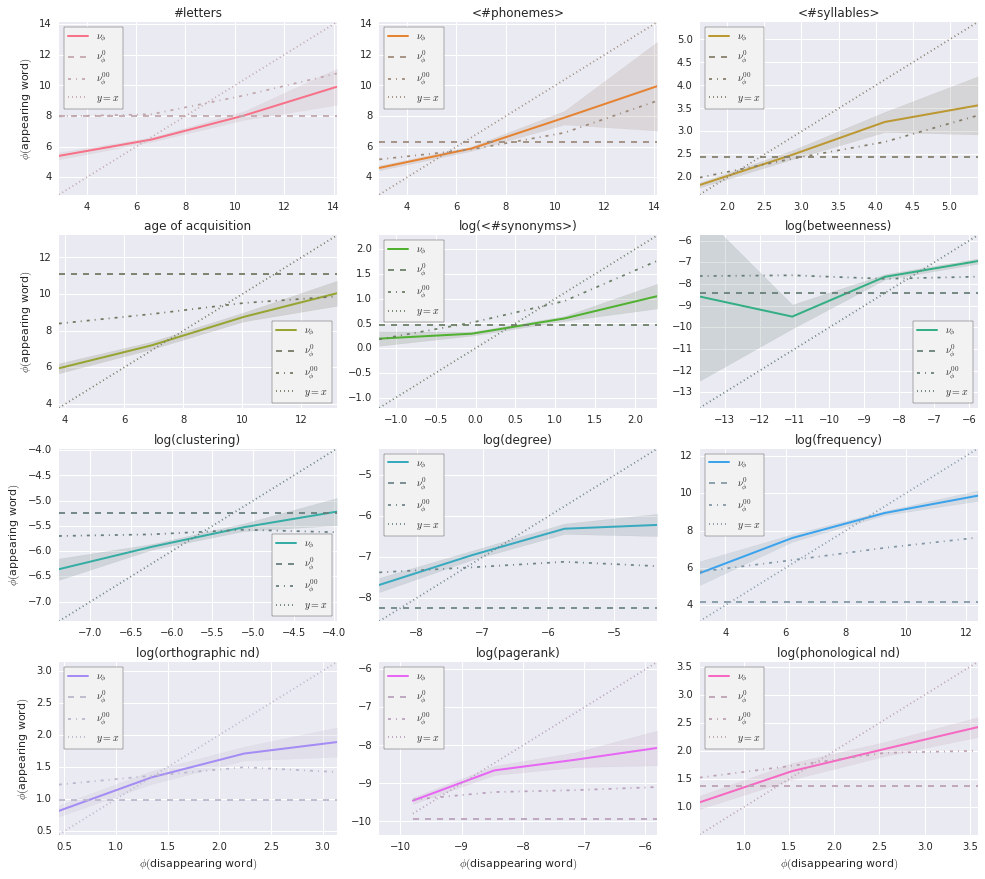

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

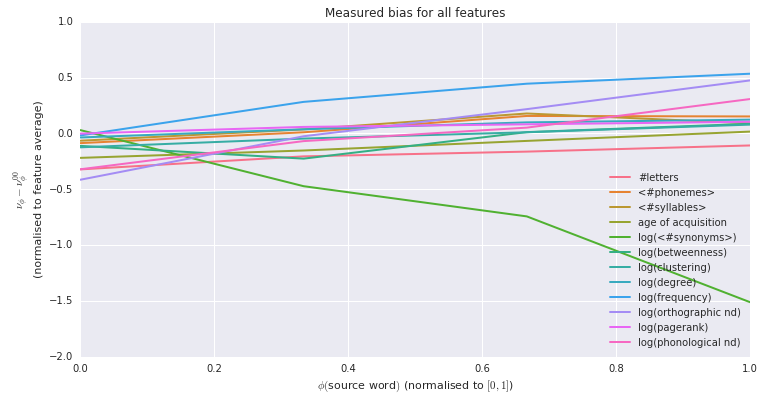

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | ns. | *** | *** |


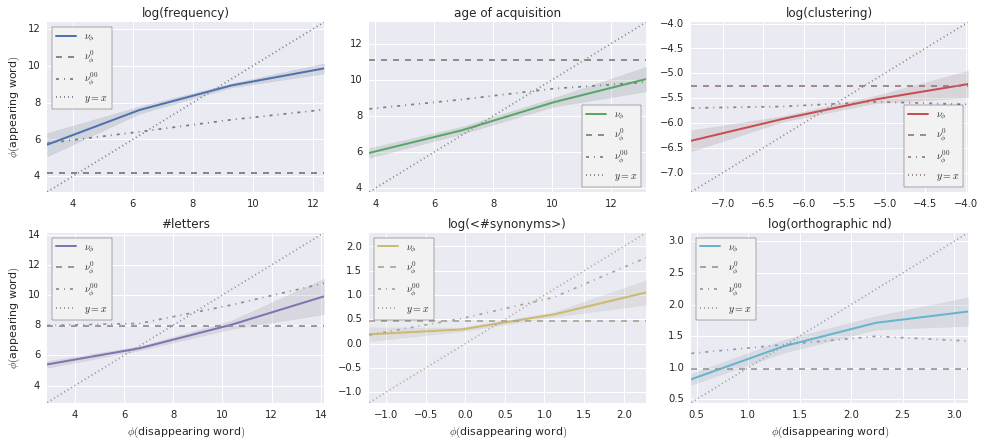

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

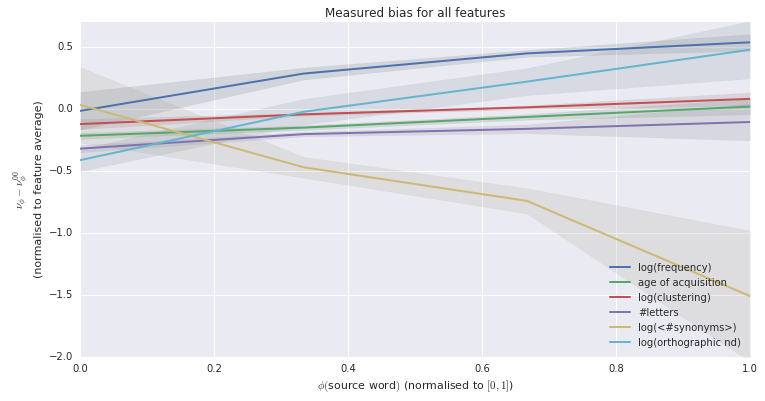

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *   | *   | *** |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | **  | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | **  | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | *** | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *   | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *   | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *** | *** |
H_00 | *** | ns. | ns. | *** |


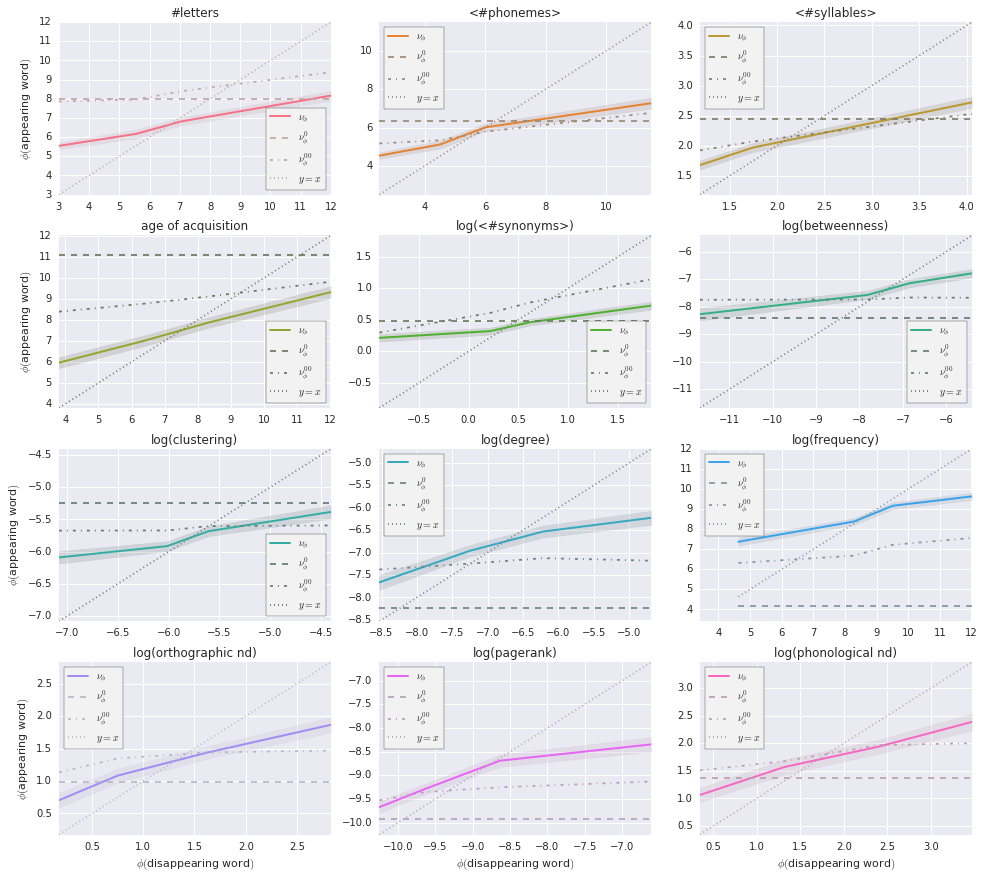

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

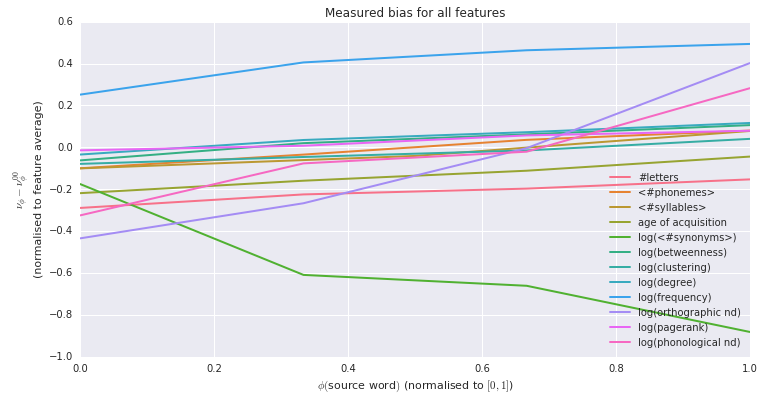

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *   | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |


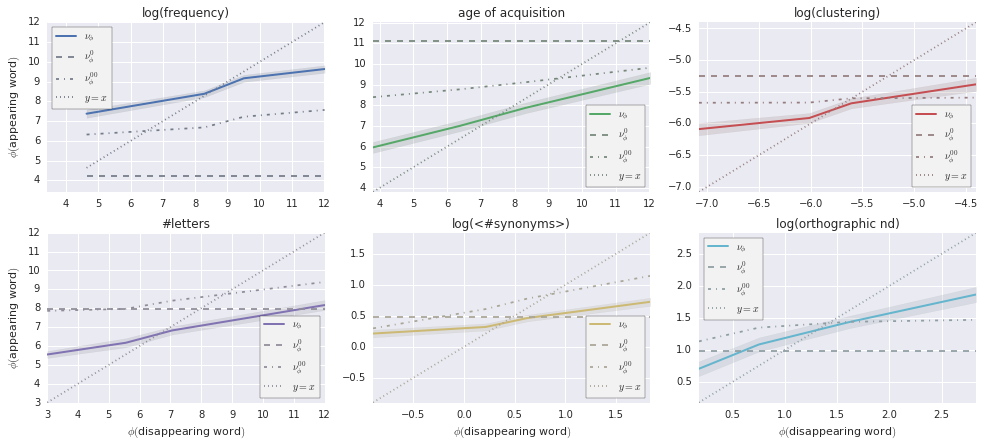

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

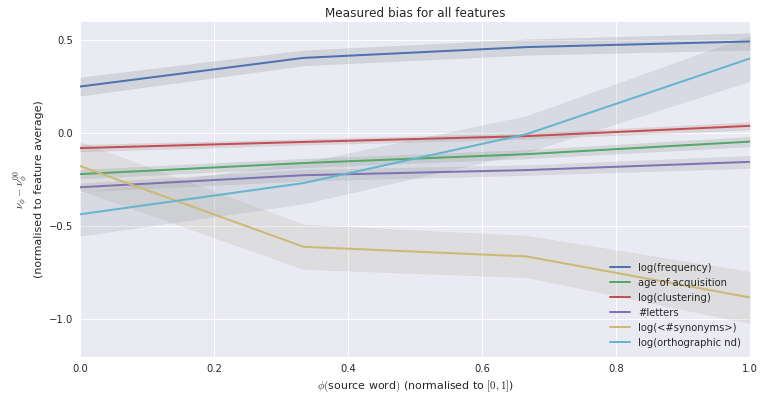

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | ns. | **  | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | ns. | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | **  | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | *** |
H_00 | *** | *** | **  | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | **  | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |
H_00 | *** | *** | ns. | ns. |


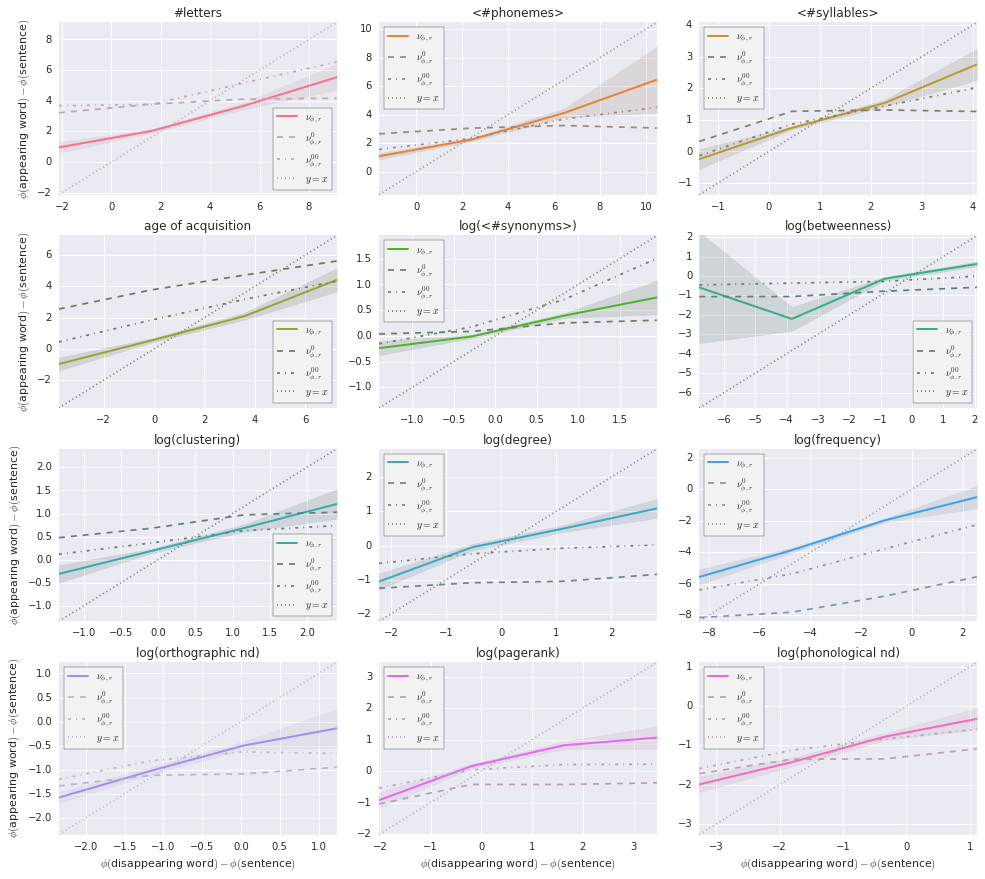

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

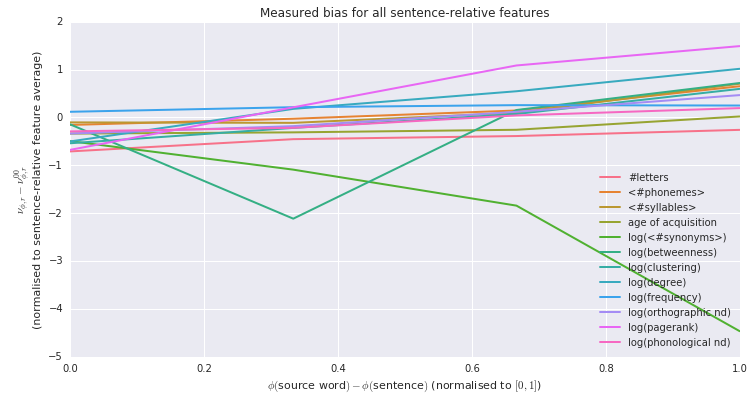

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | ns. | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | *** |
H_00 | *** | *** | **  | *   |


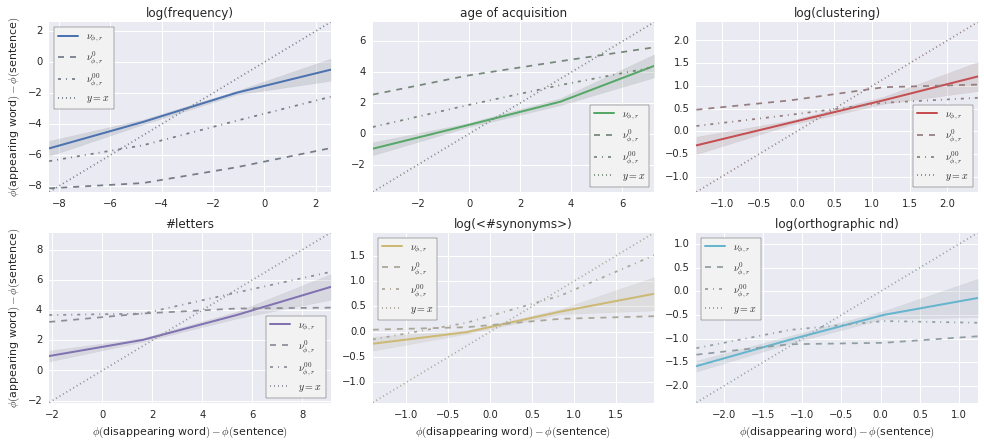

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

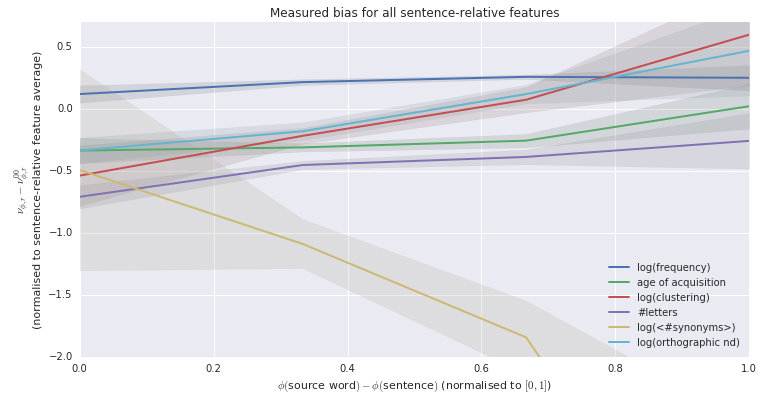

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | *   | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *** |
H_00 | *** | *   | *** | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | **  | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | ns. | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | **  |


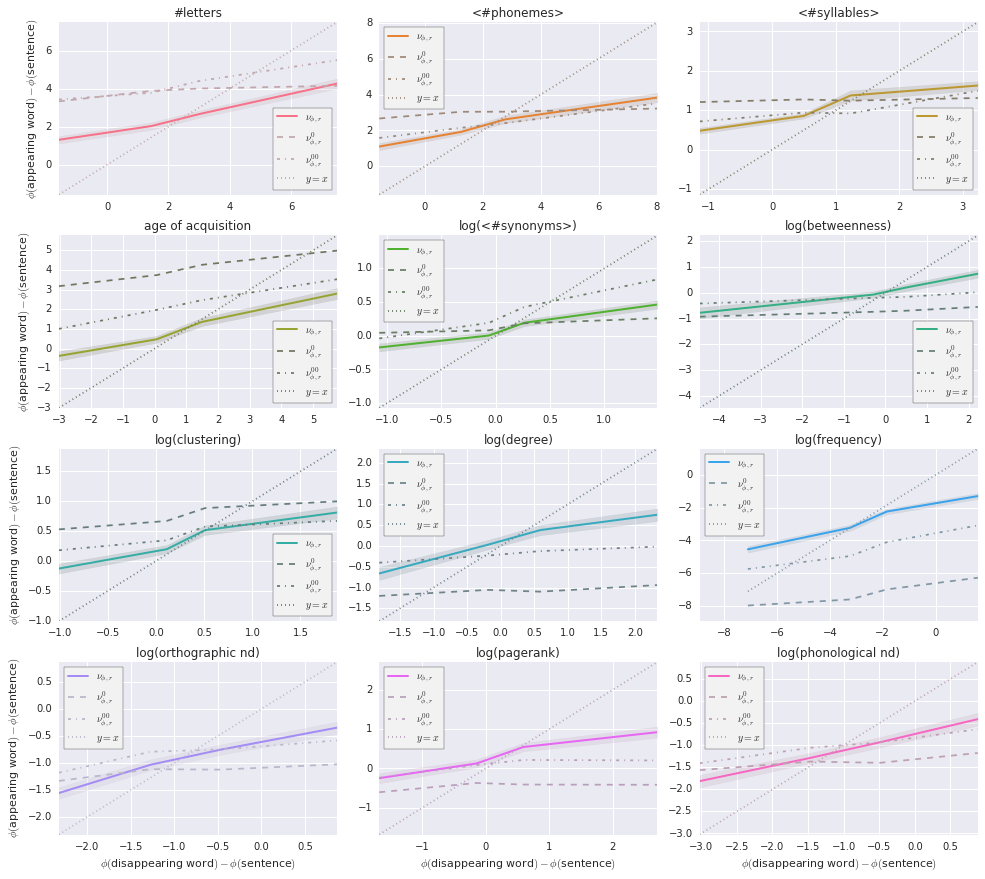

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

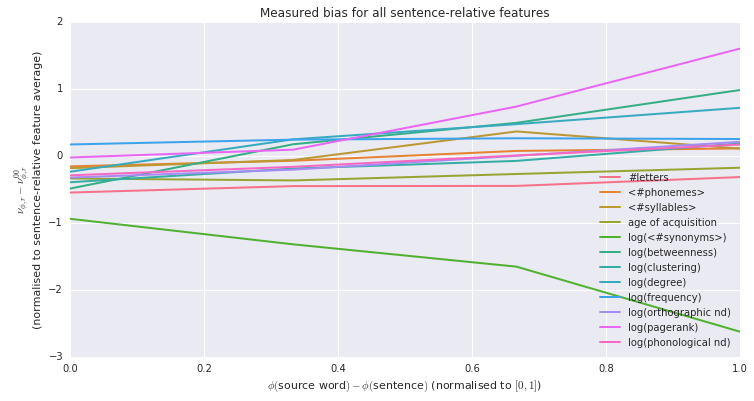

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | ns. | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |


H_00 | *** | *** | ns. | *** |


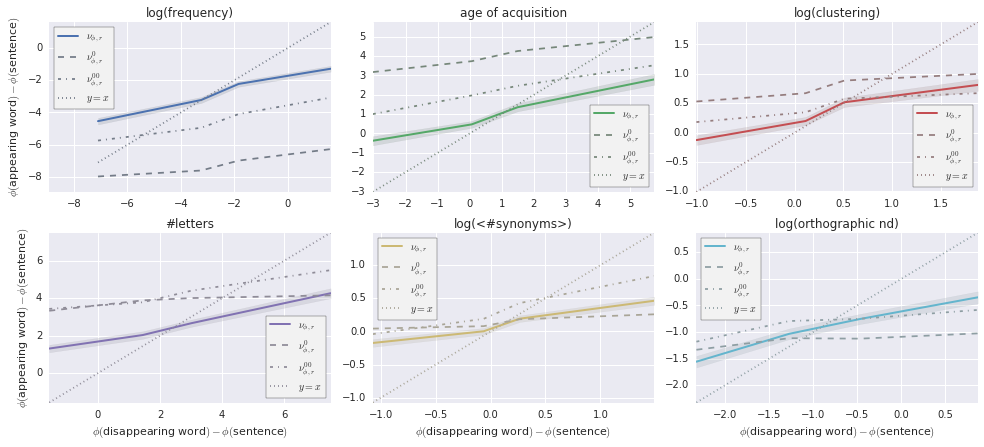

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

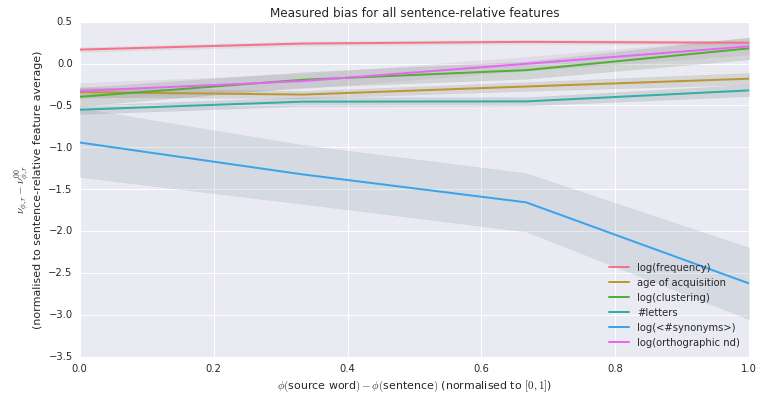

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


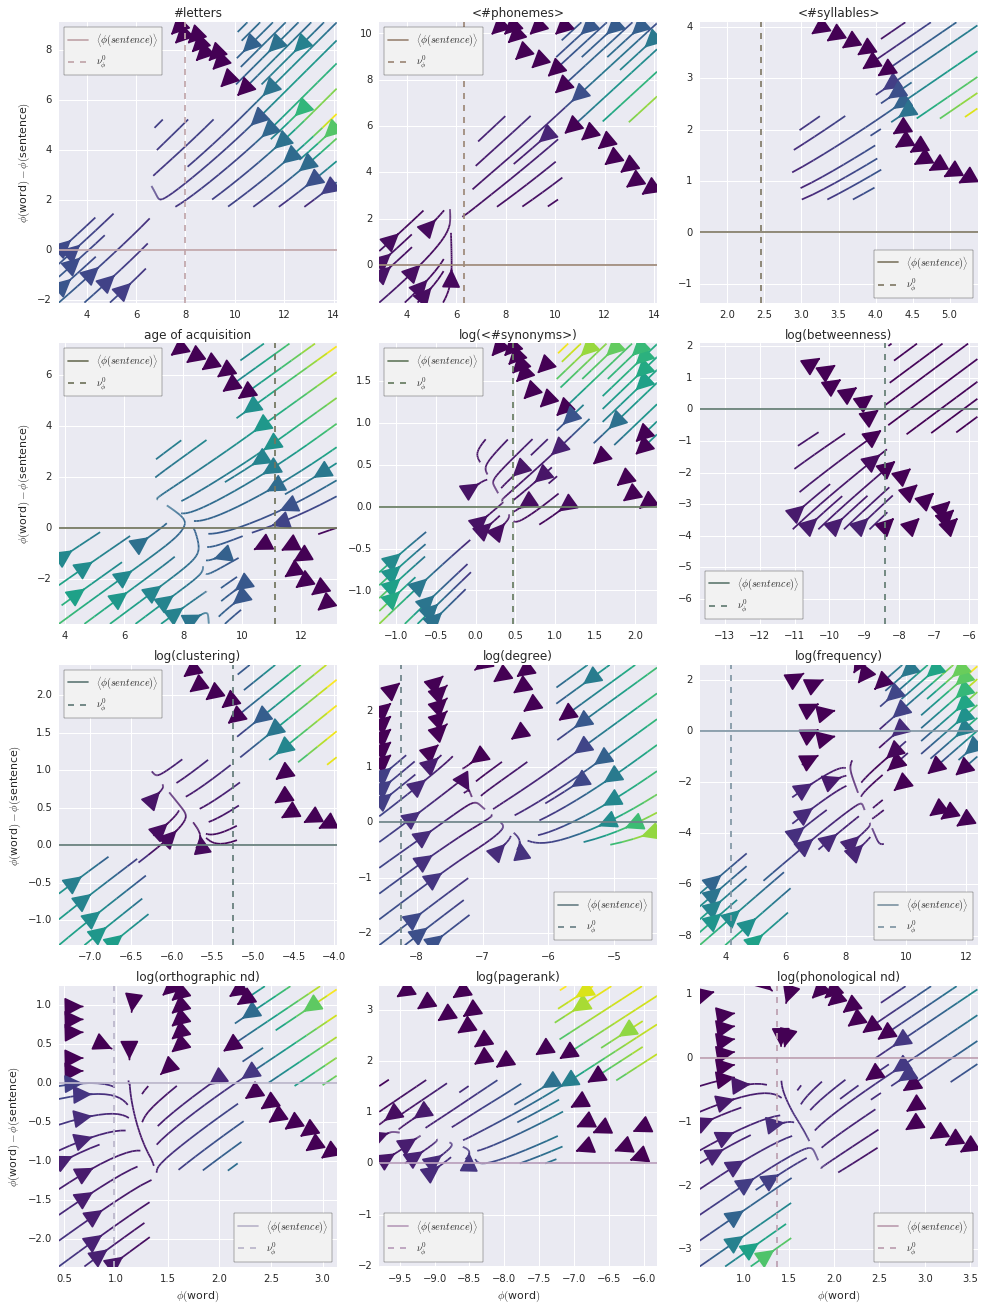

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


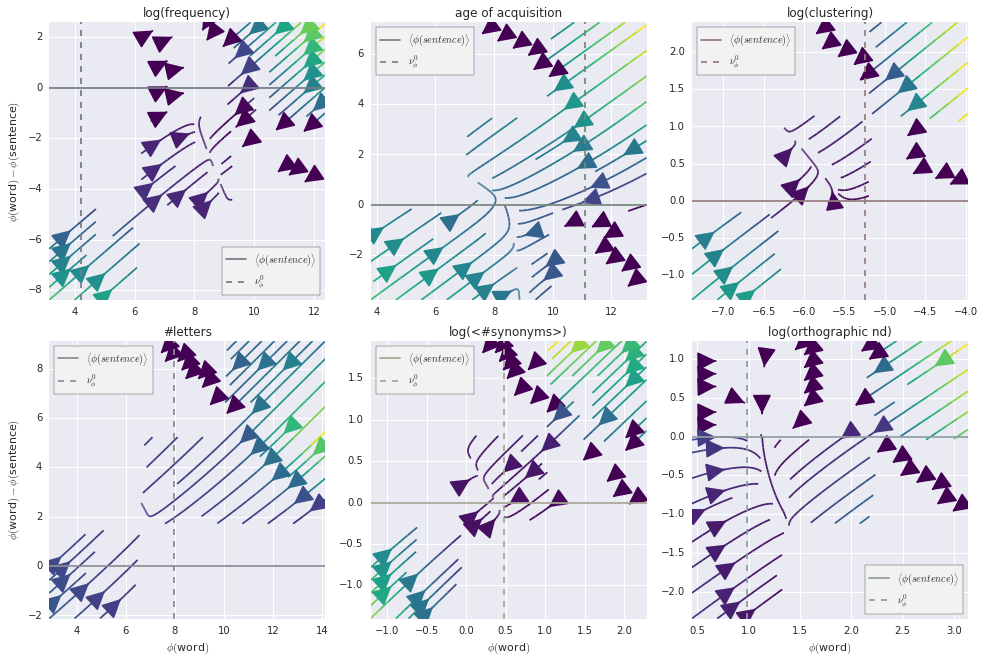

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55350149  0.17200334  0.07245371  0.06814367  0.03309174  0.02750725
  0.01962785  0.01735418  0.01535347  0.00877718]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.488934     0.219915   -0.072000  0.218350   0.213765   
Component-1 -0.411681     0.362680   -0.142208  0.299072   0.274565   
Component-2 -0.451116    -0.606989    0.084272 -0.258508   0.519005   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.460230              0.200169  0.244932       -0.439781   
Component-1       0.414412             -0.123237  0.284905        0.430552   
Component-2       0.083741             -0.026388 -0.271265        0.017287   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.276553        -0.179251        0.011554  
Component-1             -0.186380         0.159364       -0.017999  
Component-2             -0.041511         0.035314        0.014197

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 67981) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    7 of 67981) |            | Elapsed Time: 0:00:43 ETA: 4 days, 20:36:37

  0% (   29 of 67981) |              | Elapsed Time: 0:00:43 ETA: 1 day, 4:17:57

  0% (   55 of 67981) |                    | Elapsed Time: 0:00:43 ETA: 14:59:12

  0% (   82 of 67981) |                    | Elapsed Time: 0:00:43 ETA: 10:05:43

  0% (  110 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:10:04

  0% (  136 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:08:53

  0% (  160 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:08:58

  0% (  184 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:09:12

  0% (  210 of 67981) |                     | Elapsed Time: 0:00:44 ETA: 0:09:19

  0% (  236 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:09:28

  0% (  262 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:09:19

  0% (  287 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:09:14

  0% (  313 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:09:10

  0% (  339 of 67981) |                     | Elapsed Time: 0:00:45 ETA: 0:09:04

  0% (  364 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:09:10

  0% (  391 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:09:06

  0% (  417 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:09:00

  0% (  444 of 67981) |                     | Elapsed Time: 0:00:46 ETA: 0:08:58

  0% (  470 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:08:59

  0% (  496 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:08:56

  0% (  523 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:08:59

  0% (  548 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:09:04

  0% (  574 of 67981) |                     | Elapsed Time: 0:00:47 ETA: 0:09:08

  0% (  599 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:09:13

  0% (  623 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:09:23

  0% (  650 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:09:19

  0% (  677 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:09:10

  1% (  705 of 67981) |                     | Elapsed Time: 0:00:48 ETA: 0:09:00

  1% (  731 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:08:53

  1% (  759 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:08:37

  1% (  786 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:08:34

  1% (  814 of 67981) |                     | Elapsed Time: 0:00:49 ETA: 0:08:33

  1% (  850 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:08:35

  1% (  877 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:08:33

  1% (  904 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:08:36

  1% (  929 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:08:45

  1% (  955 of 67981) |                     | Elapsed Time: 0:00:50 ETA: 0:08:53

  1% (  982 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:08:54

  1% ( 1008 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:08:58

  1% ( 1035 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:08:56

  1% ( 1062 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:08:47

  1% ( 1087 of 67981) |                     | Elapsed Time: 0:00:51 ETA: 0:08:44

  1% ( 1113 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:08:50

  1% ( 1138 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:08:51

  1% ( 1165 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:08:51

  1% ( 1192 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:08:51

  1% ( 1219 of 67981) |                     | Elapsed Time: 0:00:52 ETA: 0:08:44

  1% ( 1245 of 67981) |                     | Elapsed Time: 0:00:53 ETA: 0:08:39

  1% ( 1271 of 67981) |                     | Elapsed Time: 0:00:53 ETA: 0:08:41

  1% ( 1298 of 67981) |                     | Elapsed Time: 0:00:53 ETA: 0:08:45

  1% ( 1324 of 67981) |                     | Elapsed Time: 0:00:53 ETA: 0:08:48

  1% ( 1352 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:08:46

  2% ( 1381 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:08:30

  2% ( 1409 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:08:25

  2% ( 1436 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:08:19

  2% ( 1463 of 67981) |                     | Elapsed Time: 0:00:54 ETA: 0:08:17

  2% ( 1490 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:08:26

  2% ( 1518 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:08:20

  2% ( 1547 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:08:16

  2% ( 1573 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:08:20

  2% ( 1599 of 67981) |                     | Elapsed Time: 0:00:55 ETA: 0:08:24

  2% ( 1627 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:08:21

  2% ( 1655 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:08:20

  2% ( 1683 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:08:18

  2% ( 1714 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:08:12

  2% ( 1742 of 67981) |                     | Elapsed Time: 0:00:56 ETA: 0:08:08

  2% ( 1772 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:08:02

  2% ( 1801 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:08:02

  2% ( 1831 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:07:55

  2% ( 1859 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:07:48

  2% ( 1888 of 67981) |                     | Elapsed Time: 0:00:57 ETA: 0:07:49

  2% ( 1914 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:07:57

  2% ( 1941 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:08:07

  2% ( 1970 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:08:10

  2% ( 1998 of 67981) |                     | Elapsed Time: 0:00:58 ETA: 0:08:15

  2% ( 2026 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:08:15

  3% ( 2054 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:08:08

  3% ( 2083 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:08:04

  3% ( 2110 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:08:10

  3% ( 2138 of 67981) |                     | Elapsed Time: 0:00:59 ETA: 0:08:08

  3% ( 2166 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:08:07

  3% ( 2194 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:08:06

  3% ( 2222 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:08:12

  3% ( 2251 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:08:01

  3% ( 2280 of 67981) |                     | Elapsed Time: 0:01:00 ETA: 0:07:54

  3% ( 2307 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:08:03

  3% ( 2335 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:08:05

  3% ( 2365 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:08:02

  3% ( 2392 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:08:12

  3% ( 2417 of 67981) |                     | Elapsed Time: 0:01:01 ETA: 0:08:23

  3% ( 2444 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:08:22

  3% ( 2470 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:08:25

  3% ( 2497 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:08:40

  3% ( 2523 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:08:35

  3% ( 2550 of 67981) |                     | Elapsed Time: 0:01:02 ETA: 0:08:32

  3% ( 2577 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:08:32

  3% ( 2605 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:08:27

  3% ( 2631 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:08:23

  3% ( 2658 of 67981) |                     | Elapsed Time: 0:01:03 ETA: 0:08:26

  3% ( 2687 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:08:15

  3% ( 2714 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:08:15

  4% ( 2742 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:08:07

  4% ( 2769 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:08:07

  4% ( 2796 of 67981) |                     | Elapsed Time: 0:01:04 ETA: 0:08:13

  4% ( 2823 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:08:18

  4% ( 2851 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:08:18

  4% ( 2877 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:08:20

  4% ( 2908 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:08:06

  4% ( 2939 of 67981) |                     | Elapsed Time: 0:01:05 ETA: 0:07:49

  4% ( 2971 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:07:32

  4% ( 3001 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:07:26

  4% ( 3031 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:07:19

  4% ( 3061 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:07:21

  4% ( 3092 of 67981) |                     | Elapsed Time: 0:01:06 ETA: 0:07:22

  4% ( 3125 of 67981) |                     | Elapsed Time: 0:01:07 ETA: 0:07:17

  4% ( 3157 of 67981) |                     | Elapsed Time: 0:01:07 ETA: 0:07:10

  4% ( 3184 of 67981) |                     | Elapsed Time: 0:01:07 ETA: 0:07:18

  4% ( 3215 of 67981) |                     | Elapsed Time: 0:01:07 ETA: 0:07:16

  4% ( 3245 of 67981) |#                    | Elapsed Time: 0:01:07 ETA: 0:07:20

  4% ( 3275 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:07:27

  4% ( 3305 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:07:30

  4% ( 3335 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:07:18

  4% ( 3366 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:07:16

  5% ( 3400 of 67981) |#                    | Elapsed Time: 0:01:08 ETA: 0:07:12

  5% ( 3429 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:07:22

  5% ( 3458 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:07:24

  5% ( 3487 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:07:28

  5% ( 3517 of 67981) |#                    | Elapsed Time: 0:01:09 ETA: 0:07:35

  5% ( 3547 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:07:43

  5% ( 3577 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:07:32

  5% ( 3607 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:07:27

  5% ( 3637 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:07:26

  5% ( 3666 of 67981) |#                    | Elapsed Time: 0:01:10 ETA: 0:07:27

  5% ( 3696 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:07:29

  5% ( 3724 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:07:34

  5% ( 3753 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:07:38

  5% ( 3781 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:07:42

  5% ( 3810 of 67981) |#                    | Elapsed Time: 0:01:11 ETA: 0:07:46

  5% ( 3840 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:44

  5% ( 3869 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:41

  5% ( 3897 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:42

  5% ( 3925 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:38

  5% ( 3955 of 67981) |#                    | Elapsed Time: 0:01:12 ETA: 0:07:35

  5% ( 3984 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:36

  5% ( 4012 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:37

  5% ( 4039 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:42

  5% ( 4068 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:44

  6% ( 4097 of 67981) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:48

  6% ( 4126 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:45

  6% ( 4156 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:37

  6% ( 4185 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:33

  6% ( 4208 of 67981) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:58

  6% ( 4223 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:08:55

  6% ( 4237 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:10:20

  6% ( 4256 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:12:30

  6% ( 4270 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:14:41

  6% ( 4284 of 67981) |#                    | Elapsed Time: 0:01:15 ETA: 0:15:40

  6% ( 4298 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:15:48

  6% ( 4312 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:15:53

  6% ( 4326 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:16:03

  6% ( 4340 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:16:15

  6% ( 4354 of 67981) |#                    | Elapsed Time: 0:01:16 ETA: 0:16:24

  6% ( 4368 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:16:25

  6% ( 4382 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:16:28

  6% ( 4396 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:16:29

  6% ( 4410 of 67981) |#                    | Elapsed Time: 0:01:17 ETA: 0:16:29

  6% ( 4424 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:16:25

  6% ( 4438 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:16:23

  6% ( 4452 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:16:21

  6% ( 4466 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:16:15

  6% ( 4480 of 67981) |#                    | Elapsed Time: 0:01:18 ETA: 0:16:16

  6% ( 4494 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:16:17

  6% ( 4508 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:16:19

  6% ( 4522 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:16:15

  6% ( 4536 of 67981) |#                    | Elapsed Time: 0:01:19 ETA: 0:16:14

  6% ( 4550 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:16:12

  6% ( 4564 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:16:03

  6% ( 4579 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:15:42

  6% ( 4598 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:36

  6% ( 4612 of 67981) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:35

  6% ( 4626 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:14:36

  6% ( 4641 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:14:28

  6% ( 4655 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:15:46

  6% ( 4685 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:12:31

  6% ( 4714 of 67981) |#                    | Elapsed Time: 0:01:21 ETA: 0:10:29

  6% ( 4742 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:09:02

  7% ( 4770 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:00

  7% ( 4798 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:07:41

  7% ( 4826 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:07:44

  7% ( 4854 of 67981) |#                    | Elapsed Time: 0:01:22 ETA: 0:07:48

  7% ( 4883 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:07:43

  7% ( 4911 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:07:42

  7% ( 4939 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:07:41

  7% ( 4968 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:07:39

  7% ( 4996 of 67981) |#                    | Elapsed Time: 0:01:23 ETA: 0:07:45

  7% ( 5024 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:07:47

  7% ( 5052 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:07:50

  7% ( 5080 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:07:57

  7% ( 5113 of 67981) |#                    | Elapsed Time: 0:01:24 ETA: 0:07:53

  7% ( 5139 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:07:58

  7% ( 5164 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:06

  7% ( 5191 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:10

  7% ( 5220 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:02

  7% ( 5248 of 67981) |#                    | Elapsed Time: 0:01:25 ETA: 0:07:59

  7% ( 5276 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:07:48

  7% ( 5304 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:07:40

  7% ( 5332 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:07:35

  7% ( 5360 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:07:36

  7% ( 5388 of 67981) |#                    | Elapsed Time: 0:01:26 ETA: 0:07:40

  7% ( 5416 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:07:43

  8% ( 5442 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:07:49

  8% ( 5469 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:07:53

  8% ( 5494 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:08:01

  8% ( 5522 of 67981) |#                    | Elapsed Time: 0:01:27 ETA: 0:08:02

  8% ( 5548 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:01

  8% ( 5574 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:06

  8% ( 5601 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:04

  8% ( 5628 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:07:59

  8% ( 5654 of 67981) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:01

  8% ( 5682 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:07:53

  8% ( 5710 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:07:50

  8% ( 5738 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:07:51

  8% ( 5763 of 67981) |#                    | Elapsed Time: 0:01:29 ETA: 0:07:57

  8% ( 5790 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:07:57

  8% ( 5818 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:07:59

  8% ( 5846 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:07:57

  8% ( 5874 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:07:48

  8% ( 5901 of 67981) |#                    | Elapsed Time: 0:01:30 ETA: 0:07:43

  8% ( 5929 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:07:44

  8% ( 5962 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:07:50

  8% ( 5990 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:07:50

  8% ( 6019 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:07:44

  8% ( 6048 of 67981) |#                    | Elapsed Time: 0:01:31 ETA: 0:07:39

  8% ( 6077 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:07:31

  8% ( 6105 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:07:24

  9% ( 6134 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:07:22

  9% ( 6161 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:07:29

  9% ( 6189 of 67981) |#                    | Elapsed Time: 0:01:32 ETA: 0:07:35

  9% ( 6217 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:07:40

  9% ( 6246 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:07:39

  9% ( 6274 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:07:40

  9% ( 6303 of 67981) |#                    | Elapsed Time: 0:01:33 ETA: 0:07:35

  9% ( 6331 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:07:32

  9% ( 6359 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:07:33

  9% ( 6387 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:07:32

  9% ( 6415 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:07:31

  9% ( 6444 of 67981) |#                    | Elapsed Time: 0:01:34 ETA: 0:07:29

  9% ( 6473 of 67981) |#                    | Elapsed Time: 0:01:35 ETA: 0:07:26

  9% ( 6502 of 67981) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:23

  9% ( 6531 of 67981) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:22

  9% ( 6559 of 67981) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:21

  9% ( 6587 of 67981) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:25

  9% ( 6615 of 67981) |##                   | Elapsed Time: 0:01:36 ETA: 0:07:26

  9% ( 6643 of 67981) |##                   | Elapsed Time: 0:01:36 ETA: 0:07:28

  9% ( 6672 of 67981) |##                   | Elapsed Time: 0:01:36 ETA: 0:07:28

  9% ( 6701 of 67981) |##                   | Elapsed Time: 0:01:36 ETA: 0:07:24

  9% ( 6730 of 67981) |##                   | Elapsed Time: 0:01:36 ETA: 0:07:23

  9% ( 6755 of 67981) |##                   | Elapsed Time: 0:01:37 ETA: 0:07:37

  9% ( 6777 of 67981) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:07

 10% ( 6799 of 67981) |##                   | Elapsed Time: 0:01:37 ETA: 0:08:45

 10% ( 6819 of 67981) |##                   | Elapsed Time: 0:01:37 ETA: 0:09:25

 10% ( 6839 of 67981) |##                   | Elapsed Time: 0:01:37 ETA: 0:10:12

 10% ( 6869 of 67981) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:16

 10% ( 6889 of 67981) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:17

 10% ( 6909 of 67981) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:16

 10% ( 6929 of 67981) |##                   | Elapsed Time: 0:01:38 ETA: 0:10:17

 10% ( 6950 of 67981) |##                   | Elapsed Time: 0:01:39 ETA: 0:10:16

 10% ( 6969 of 67981) |##                   | Elapsed Time: 0:01:39 ETA: 0:10:29

 10% ( 6987 of 67981) |##                   | Elapsed Time: 0:01:39 ETA: 0:10:57

 10% ( 6999 of 67981) |##                   | Elapsed Time: 0:01:39 ETA: 0:12:24

 10% ( 7011 of 67981) |##                   | Elapsed Time: 0:01:39 ETA: 0:14:13

 10% ( 7023 of 67981) |##                   | Elapsed Time: 0:01:40 ETA: 0:16:38

 10% ( 7035 of 67981) |##                   | Elapsed Time: 0:01:40 ETA: 0:19:28

 10% ( 7047 of 67981) |##                   | Elapsed Time: 0:01:40 ETA: 0:19:29

 10% ( 7061 of 67981) |##                   | Elapsed Time: 0:01:40 ETA: 0:18:33

 10% ( 7089 of 67981) |##                   | Elapsed Time: 0:01:41 ETA: 0:14:04

 10% ( 7119 of 67981) |##                   | Elapsed Time: 0:01:41 ETA: 0:10:58

 10% ( 7149 of 67981) |##                   | Elapsed Time: 0:01:41 ETA: 0:08:55

 10% ( 7184 of 67981) |##                   | Elapsed Time: 0:01:41 ETA: 0:07:09

 10% ( 7219 of 67981) |##                   | Elapsed Time: 0:01:41 ETA: 0:06:26

 10% ( 7247 of 67981) |##                   | Elapsed Time: 0:01:42 ETA: 0:06:31

 10% ( 7275 of 67981) |##                   | Elapsed Time: 0:01:42 ETA: 0:06:40

 10% ( 7301 of 67981) |##                   | Elapsed Time: 0:01:42 ETA: 0:06:54

 10% ( 7329 of 67981) |##                   | Elapsed Time: 0:01:42 ETA: 0:07:28

 10% ( 7357 of 67981) |##                   | Elapsed Time: 0:01:42 ETA: 0:07:40

 10% ( 7385 of 67981) |##                   | Elapsed Time: 0:01:43 ETA: 0:07:43

 10% ( 7412 of 67981) |##                   | Elapsed Time: 0:01:43 ETA: 0:07:42

 10% ( 7440 of 67981) |##                   | Elapsed Time: 0:01:43 ETA: 0:07:40

 10% ( 7468 of 67981) |##                   | Elapsed Time: 0:01:43 ETA: 0:07:41

 11% ( 7495 of 67981) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:42

 11% ( 7522 of 67981) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:42

 11% ( 7549 of 67981) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:42

 11% ( 7577 of 67981) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:41

 11% ( 7604 of 67981) |##                   | Elapsed Time: 0:01:44 ETA: 0:07:42

 11% ( 7632 of 67981) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:41

 11% ( 7662 of 67981) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:39

 11% ( 7689 of 67981) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:37

 11% ( 7717 of 67981) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:35

 11% ( 7744 of 67981) |##                   | Elapsed Time: 0:01:45 ETA: 0:07:36

 11% ( 7772 of 67981) |##                   | Elapsed Time: 0:01:46 ETA: 0:07:36

 11% ( 7806 of 67981) |##                   | Elapsed Time: 0:01:46 ETA: 0:07:12

 11% ( 7843 of 67981) |##                   | Elapsed Time: 0:01:46 ETA: 0:06:44

 11% ( 7870 of 67981) |##                   | Elapsed Time: 0:01:46 ETA: 0:06:49

 11% ( 7882 of 67981) |##                   | Elapsed Time: 0:01:47 ETA: 0:07:51

 11% ( 7894 of 67981) |##                   | Elapsed Time: 0:01:47 ETA: 0:09:30

 11% ( 7909 of 67981) |##                   | Elapsed Time: 0:01:47 ETA: 0:11:51

 11% ( 7923 of 67981) |##                   | Elapsed Time: 0:01:47 ETA: 0:16:28

 11% ( 7936 of 67981) |##                   | Elapsed Time: 0:01:47 ETA: 0:16:58

 11% ( 7950 of 67981) |##                   | Elapsed Time: 0:01:48 ETA: 0:16:13

 11% ( 7966 of 67981) |##                   | Elapsed Time: 0:01:48 ETA: 0:15:25

 11% ( 7978 of 67981) |##                   | Elapsed Time: 0:01:48 ETA: 0:16:31

 11% ( 7990 of 67981) |##                   | Elapsed Time: 0:01:48 ETA: 0:16:30

 11% ( 8004 of 67981) |##                   | Elapsed Time: 0:01:49 ETA: 0:15:52

 11% ( 8026 of 67981) |##                   | Elapsed Time: 0:01:49 ETA: 0:14:16

 11% ( 8047 of 67981) |##                   | Elapsed Time: 0:01:49 ETA: 0:12:50

 11% ( 8069 of 67981) |##                   | Elapsed Time: 0:01:49 ETA: 0:11:03

 11% ( 8088 of 67981) |##                   | Elapsed Time: 0:01:49 ETA: 0:10:16

 11% ( 8115 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:09:20

 11% ( 8144 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:08:38

 12% ( 8167 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:08:35

 12% ( 8187 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:08:41

 12% ( 8206 of 67981) |##                   | Elapsed Time: 0:01:50 ETA: 0:08:59

 12% ( 8227 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:09:52

 12% ( 8247 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:45

 12% ( 8267 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:46

 12% ( 8286 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:47

 12% ( 8305 of 67981) |##                   | Elapsed Time: 0:01:51 ETA: 0:10:45

 12% ( 8325 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:10:50

 12% ( 8345 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:10:46

 12% ( 8366 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:10:30

 12% ( 8397 of 67981) |##                   | Elapsed Time: 0:01:52 ETA: 0:09:19

 12% ( 8432 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:08:01

 12% ( 8466 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:07:07

 12% ( 8516 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:06:15

 12% ( 8550 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:05:53

 12% ( 8582 of 67981) |##                   | Elapsed Time: 0:01:53 ETA: 0:05:57

 12% ( 8610 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:06:12

 12% ( 8638 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:06:29

 12% ( 8667 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:06:50

 12% ( 8693 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:07:18

 12% ( 8715 of 67981) |##                   | Elapsed Time: 0:01:54 ETA: 0:07:49

 12% ( 8736 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:08:19

 12% ( 8757 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:08:56

 12% ( 8776 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:09:46

 12% ( 8795 of 67981) |##                   | Elapsed Time: 0:01:55 ETA: 0:10:17

 12% ( 8814 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:10:33

 12% ( 8833 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:10:40

 13% ( 8852 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:10:46

 13% ( 8871 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:10:52

 13% ( 8889 of 67981) |##                   | Elapsed Time: 0:01:56 ETA: 0:10:53

 13% ( 8907 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:10:57

 13% ( 8928 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:10:52

 13% ( 8949 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:10:34

 13% ( 8969 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:10:27

 13% ( 8990 of 67981) |##                   | Elapsed Time: 0:01:57 ETA: 0:10:07

 13% ( 9011 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:57

 13% ( 9034 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:42

 13% ( 9054 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:43

 13% ( 9076 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:34

 13% ( 9096 of 67981) |##                   | Elapsed Time: 0:01:58 ETA: 0:09:44

 13% ( 9116 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:46

 13% ( 9137 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:56

 13% ( 9160 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:50

 13% ( 9181 of 67981) |##                   | Elapsed Time: 0:01:59 ETA: 0:09:47

 13% ( 9201 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:45

 13% ( 9223 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:43

 13% ( 9243 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:48

 13% ( 9264 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:59

 13% ( 9285 of 67981) |##                   | Elapsed Time: 0:02:00 ETA: 0:09:54

 13% ( 9310 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:09:31

 13% ( 9332 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:09:29

 13% ( 9359 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:09:24

 13% ( 9380 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:09:24

 13% ( 9401 of 67981) |##                   | Elapsed Time: 0:02:01 ETA: 0:09:36

 13% ( 9422 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:44

 13% ( 9442 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:55

 13% ( 9463 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:52

 13% ( 9484 of 67981) |##                   | Elapsed Time: 0:02:02 ETA: 0:09:55

 13% ( 9505 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:52

 14% ( 9527 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:48

 14% ( 9548 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:47

 14% ( 9570 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:45

 14% ( 9591 of 67981) |##                   | Elapsed Time: 0:02:03 ETA: 0:09:45

 14% ( 9612 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:09:48

 14% ( 9633 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:09:47

 14% ( 9653 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:09:48

 14% ( 9674 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:09:42

 14% ( 9695 of 67981) |##                   | Elapsed Time: 0:02:04 ETA: 0:09:42

 14% ( 9716 of 67981) |###                  | Elapsed Time: 0:02:05 ETA: 0:09:45

 14% ( 9737 of 67981) |###                  | Elapsed Time: 0:02:05 ETA: 0:09:45

 14% ( 9759 of 67981) |###                  | Elapsed Time: 0:02:05 ETA: 0:09:44

 14% ( 9780 of 67981) |###                  | Elapsed Time: 0:02:05 ETA: 0:09:42

 14% ( 9801 of 67981) |###                  | Elapsed Time: 0:02:06 ETA: 0:09:45

 14% ( 9822 of 67981) |###                  | Elapsed Time: 0:02:06 ETA: 0:09:45

 14% ( 9843 of 67981) |###                  | Elapsed Time: 0:02:06 ETA: 0:09:47

 14% ( 9864 of 67981) |###                  | Elapsed Time: 0:02:06 ETA: 0:09:48

 14% ( 9885 of 67981) |###                  | Elapsed Time: 0:02:06 ETA: 0:09:44

 14% ( 9907 of 67981) |###                  | Elapsed Time: 0:02:07 ETA: 0:09:39

 14% ( 9927 of 67981) |###                  | Elapsed Time: 0:02:07 ETA: 0:09:38

 14% ( 9947 of 67981) |###                  | Elapsed Time: 0:02:07 ETA: 0:09:39

 14% ( 9969 of 67981) |###                  | Elapsed Time: 0:02:07 ETA: 0:09:32

 14% ( 9990 of 67981) |###                  | Elapsed Time: 0:02:07 ETA: 0:09:34

 14% (10012 of 67981) |###                  | Elapsed Time: 0:02:08 ETA: 0:09:33

 14% (10033 of 67981) |###                  | Elapsed Time: 0:02:08 ETA: 0:09:28

 14% (10053 of 67981) |###                  | Elapsed Time: 0:02:08 ETA: 0:09:31

 14% (10075 of 67981) |###                  | Elapsed Time: 0:02:08 ETA: 0:09:31

 14% (10097 of 67981) |###                  | Elapsed Time: 0:02:08 ETA: 0:09:29

 14% (10117 of 67981) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:27

 14% (10138 of 67981) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:26

 14% (10160 of 67981) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:26

 14% (10181 of 67981) |###                  | Elapsed Time: 0:02:09 ETA: 0:09:29

 15% (10208 of 67981) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:31

 15% (10231 of 67981) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:20

 15% (10253 of 67981) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:20

 15% (10274 of 67981) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:25

 15% (10295 of 67981) |###                  | Elapsed Time: 0:02:10 ETA: 0:09:27

 15% (10317 of 67981) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:25

 15% (10339 of 67981) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:32

 15% (10359 of 67981) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:41

 15% (10381 of 67981) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:38

 15% (10401 of 67981) |###                  | Elapsed Time: 0:02:11 ETA: 0:09:47

 15% (10423 of 67981) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:47

 15% (10445 of 67981) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:43

 15% (10467 of 67981) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:39

 15% (10489 of 67981) |###                  | Elapsed Time: 0:02:12 ETA: 0:09:31

 15% (10511 of 67981) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:29

 15% (10533 of 67981) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:30

 15% (10554 of 67981) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:33

 15% (10576 of 67981) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:33

 15% (10598 of 67981) |###                  | Elapsed Time: 0:02:13 ETA: 0:09:30

 15% (10620 of 67981) |###                  | Elapsed Time: 0:02:14 ETA: 0:09:25

 15% (10643 of 67981) |###                  | Elapsed Time: 0:02:14 ETA: 0:09:17

 15% (10666 of 67981) |###                  | Elapsed Time: 0:02:14 ETA: 0:09:12

 15% (10688 of 67981) |###                  | Elapsed Time: 0:02:14 ETA: 0:09:13

 15% (10710 of 67981) |###                  | Elapsed Time: 0:02:15 ETA: 0:09:10

 15% (10732 of 67981) |###                  | Elapsed Time: 0:02:15 ETA: 0:09:15

 15% (10754 of 67981) |###                  | Elapsed Time: 0:02:15 ETA: 0:09:16

 15% (10775 of 67981) |###                  | Elapsed Time: 0:02:15 ETA: 0:09:18

 15% (10797 of 67981) |###                  | Elapsed Time: 0:02:15 ETA: 0:09:17

 15% (10819 of 67981) |###                  | Elapsed Time: 0:02:16 ETA: 0:09:17

 15% (10842 of 67981) |###                  | Elapsed Time: 0:02:16 ETA: 0:09:12

 15% (10864 of 67981) |###                  | Elapsed Time: 0:02:16 ETA: 0:09:15

 16% (10886 of 67981) |###                  | Elapsed Time: 0:02:16 ETA: 0:09:17

 16% (10907 of 67981) |###                  | Elapsed Time: 0:02:16 ETA: 0:09:20

 16% (10929 of 67981) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:28

 16% (10951 of 67981) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:20

 16% (10971 of 67981) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:19

 16% (10992 of 67981) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:18

 16% (11015 of 67981) |###                  | Elapsed Time: 0:02:17 ETA: 0:09:06

 16% (11036 of 67981) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:14

 16% (11057 of 67981) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:21

 16% (11079 of 67981) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:23

 16% (11101 of 67981) |###                  | Elapsed Time: 0:02:18 ETA: 0:09:22

 16% (11122 of 67981) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:32

 16% (11144 of 67981) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:28

 16% (11166 of 67981) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:28

 16% (11186 of 67981) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:33

 16% (11207 of 67981) |###                  | Elapsed Time: 0:02:19 ETA: 0:09:34

 16% (11229 of 67981) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:32

 16% (11251 of 67981) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:32

 16% (11273 of 67981) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:29

 16% (11295 of 67981) |###                  | Elapsed Time: 0:02:20 ETA: 0:09:30

 16% (11317 of 67981) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:28

 16% (11338 of 67981) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:31

 16% (11359 of 67981) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:30

 16% (11379 of 67981) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:32

 16% (11401 of 67981) |###                  | Elapsed Time: 0:02:21 ETA: 0:09:29

 16% (11421 of 67981) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:31

 16% (11443 of 67981) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:30

 16% (11465 of 67981) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:30

 16% (11487 of 67981) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:32

 16% (11509 of 67981) |###                  | Elapsed Time: 0:02:22 ETA: 0:09:31

 16% (11531 of 67981) |###                  | Elapsed Time: 0:02:23 ETA: 0:09:26

 16% (11553 of 67981) |###                  | Elapsed Time: 0:02:23 ETA: 0:09:25

 17% (11575 of 67981) |###                  | Elapsed Time: 0:02:23 ETA: 0:09:24

 17% (11598 of 67981) |###                  | Elapsed Time: 0:02:23 ETA: 0:09:16

 17% (11620 of 67981) |###                  | Elapsed Time: 0:02:24 ETA: 0:09:09

 17% (11641 of 67981) |###                  | Elapsed Time: 0:02:24 ETA: 0:09:13

 17% (11663 of 67981) |###                  | Elapsed Time: 0:02:24 ETA: 0:09:13

 17% (11685 of 67981) |###                  | Elapsed Time: 0:02:24 ETA: 0:09:14

 17% (11707 of 67981) |###                  | Elapsed Time: 0:02:24 ETA: 0:09:23

 17% (11728 of 67981) |###                  | Elapsed Time: 0:02:25 ETA: 0:09:24

 17% (11751 of 67981) |###                  | Elapsed Time: 0:02:25 ETA: 0:09:17

 17% (11772 of 67981) |###                  | Elapsed Time: 0:02:25 ETA: 0:09:15

 17% (11793 of 67981) |###                  | Elapsed Time: 0:02:25 ETA: 0:09:11

 17% (11814 of 67981) |###                  | Elapsed Time: 0:02:25 ETA: 0:09:07

 17% (11836 of 67981) |###                  | Elapsed Time: 0:02:26 ETA: 0:09:09

 17% (11858 of 67981) |###                  | Elapsed Time: 0:02:26 ETA: 0:09:07

 17% (11880 of 67981) |###                  | Elapsed Time: 0:02:26 ETA: 0:09:04

 17% (11908 of 67981) |###                  | Elapsed Time: 0:02:26 ETA: 0:09:02

 17% (11930 of 67981) |###                  | Elapsed Time: 0:02:27 ETA: 0:09:01

 17% (11952 of 67981) |###                  | Elapsed Time: 0:02:27 ETA: 0:09:00

 17% (11976 of 67981) |###                  | Elapsed Time: 0:02:27 ETA: 0:08:48

 17% (12001 of 67981) |###                  | Elapsed Time: 0:02:27 ETA: 0:08:33

 17% (12027 of 67981) |###                  | Elapsed Time: 0:02:27 ETA: 0:08:06

 17% (12054 of 67981) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:39

 17% (12082 of 67981) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:16

 17% (12108 of 67981) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:13

 17% (12133 of 67981) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:16

 17% (12159 of 67981) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:22

 17% (12183 of 67981) |###                  | Elapsed Time: 0:02:29 ETA: 0:07:38

 17% (12205 of 67981) |###                  | Elapsed Time: 0:02:29 ETA: 0:07:53

 17% (12228 of 67981) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:01

 18% (12252 of 67981) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:17

 18% (12277 of 67981) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:15

 18% (12301 of 67981) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:03

 18% (12319 of 67981) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:22

 18% (12338 of 67981) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:53

 18% (12359 of 67981) |###                  | Elapsed Time: 0:02:30 ETA: 0:09:14

 18% (12382 of 67981) |###                  | Elapsed Time: 0:02:31 ETA: 0:09:21

 18% (12408 of 67981) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:57

 18% (12432 of 67981) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:33

 18% (12456 of 67981) |###                  | Elapsed Time: 0:02:31 ETA: 0:07:50

 18% (12482 of 67981) |###                  | Elapsed Time: 0:02:31 ETA: 0:07:44

 18% (12507 of 67981) |###                  | Elapsed Time: 0:02:32 ETA: 0:07:39

 18% (12529 of 67981) |###                  | Elapsed Time: 0:02:32 ETA: 0:07:50

 18% (12556 of 67981) |###                  | Elapsed Time: 0:02:32 ETA: 0:07:40

 18% (12580 of 67981) |###                  | Elapsed Time: 0:02:32 ETA: 0:07:49

 18% (12604 of 67981) |###                  | Elapsed Time: 0:02:32 ETA: 0:07:54

 18% (12628 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:07:49

 18% (12656 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:07:38

 18% (12680 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:07:41

 18% (12707 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:07:31

 18% (12733 of 67981) |###                  | Elapsed Time: 0:02:33 ETA: 0:07:24

 18% (12760 of 67981) |###                  | Elapsed Time: 0:02:34 ETA: 0:07:22

 18% (12785 of 67981) |###                  | Elapsed Time: 0:02:34 ETA: 0:07:23

 18% (12813 of 67981) |###                  | Elapsed Time: 0:02:34 ETA: 0:07:23

 18% (12841 of 67981) |###                  | Elapsed Time: 0:02:34 ETA: 0:07:21

 18% (12866 of 67981) |###                  | Elapsed Time: 0:02:35 ETA: 0:07:16

 18% (12889 of 67981) |###                  | Elapsed Time: 0:02:35 ETA: 0:07:25

 18% (12914 of 67981) |###                  | Elapsed Time: 0:02:35 ETA: 0:07:28

 19% (12939 of 67981) |###                  | Elapsed Time: 0:02:35 ETA: 0:07:35

 19% (12966 of 67981) |####                 | Elapsed Time: 0:02:35 ETA: 0:07:39

 19% (12992 of 67981) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:26

 19% (13018 of 67981) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:22

 19% (13042 of 67981) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:23

 19% (13066 of 67981) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:32

 19% (13094 of 67981) |####                 | Elapsed Time: 0:02:36 ETA: 0:07:26

 19% (13119 of 67981) |####                 | Elapsed Time: 0:02:37 ETA: 0:07:26

 19% (13144 of 67981) |####                 | Elapsed Time: 0:02:37 ETA: 0:07:29

 19% (13168 of 67981) |####                 | Elapsed Time: 0:02:37 ETA: 0:07:26

 19% (13191 of 67981) |####                 | Elapsed Time: 0:02:37 ETA: 0:07:46

 19% (13215 of 67981) |####                 | Elapsed Time: 0:02:37 ETA: 0:07:52

 19% (13238 of 67981) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:03

 19% (13260 of 67981) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:19

 19% (13283 of 67981) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:09

 19% (13308 of 67981) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:09

 19% (13330 of 67981) |####                 | Elapsed Time: 0:02:38 ETA: 0:08:24

 19% (13357 of 67981) |####                 | Elapsed Time: 0:02:39 ETA: 0:08:01

 19% (13381 of 67981) |####                 | Elapsed Time: 0:02:39 ETA: 0:07:58

 19% (13406 of 67981) |####                 | Elapsed Time: 0:02:39 ETA: 0:08:01

 19% (13431 of 67981) |####                 | Elapsed Time: 0:02:39 ETA: 0:07:39

 19% (13456 of 67981) |####                 | Elapsed Time: 0:02:40 ETA: 0:07:41

 19% (13479 of 67981) |####                 | Elapsed Time: 0:02:40 ETA: 0:07:38

 19% (13503 of 67981) |####                 | Elapsed Time: 0:02:40 ETA: 0:07:43

 19% (13524 of 67981) |####                 | Elapsed Time: 0:02:40 ETA: 0:08:07

 19% (13547 of 67981) |####                 | Elapsed Time: 0:02:40 ETA: 0:08:10

 19% (13573 of 67981) |####                 | Elapsed Time: 0:02:41 ETA: 0:08:10

 20% (13597 of 67981) |####                 | Elapsed Time: 0:02:41 ETA: 0:08:08

 20% (13621 of 67981) |####                 | Elapsed Time: 0:02:41 ETA: 0:08:02

 20% (13646 of 67981) |####                 | Elapsed Time: 0:02:41 ETA: 0:07:47

 20% (13670 of 67981) |####                 | Elapsed Time: 0:02:41 ETA: 0:07:46

 20% (13692 of 67981) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:00

 20% (13714 of 67981) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:05

 20% (13739 of 67981) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:20

 20% (13764 of 67981) |####                 | Elapsed Time: 0:02:42 ETA: 0:08:06

 20% (13790 of 67981) |####                 | Elapsed Time: 0:02:42 ETA: 0:07:42

 20% (13813 of 67981) |####                 | Elapsed Time: 0:02:43 ETA: 0:07:32

 20% (13838 of 67981) |####                 | Elapsed Time: 0:02:43 ETA: 0:07:31

 20% (13865 of 67981) |####                 | Elapsed Time: 0:02:43 ETA: 0:07:28

 20% (13899 of 67981) |####                 | Elapsed Time: 0:02:43 ETA: 0:07:45

 20% (13919 of 67981) |####                 | Elapsed Time: 0:02:44 ETA: 0:07:56

 20% (13942 of 67981) |####                 | Elapsed Time: 0:02:44 ETA: 0:08:10

 20% (13967 of 67981) |####                 | Elapsed Time: 0:02:44 ETA: 0:08:18

 20% (13991 of 67981) |####                 | Elapsed Time: 0:02:44 ETA: 0:08:15

 20% (14012 of 67981) |####                 | Elapsed Time: 0:02:44 ETA: 0:08:32

 20% (14036 of 67981) |####                 | Elapsed Time: 0:02:45 ETA: 0:08:06

 20% (14056 of 67981) |####                 | Elapsed Time: 0:02:45 ETA: 0:08:25

 20% (14082 of 67981) |####                 | Elapsed Time: 0:02:45 ETA: 0:08:15

 20% (14106 of 67981) |####                 | Elapsed Time: 0:02:45 ETA: 0:08:16

 20% (14129 of 67981) |####                 | Elapsed Time: 0:02:46 ETA: 0:08:18

 20% (14154 of 67981) |####                 | Elapsed Time: 0:02:46 ETA: 0:07:56

 20% (14180 of 67981) |####                 | Elapsed Time: 0:02:46 ETA: 0:07:37

 20% (14204 of 67981) |####                 | Elapsed Time: 0:02:46 ETA: 0:07:37

 20% (14228 of 67981) |####                 | Elapsed Time: 0:02:46 ETA: 0:07:31

 20% (14250 of 67981) |####                 | Elapsed Time: 0:02:47 ETA: 0:07:47

 21% (14277 of 67981) |####                 | Elapsed Time: 0:02:47 ETA: 0:07:38

 21% (14301 of 67981) |####                 | Elapsed Time: 0:02:47 ETA: 0:07:49

 21% (14329 of 67981) |####                 | Elapsed Time: 0:02:47 ETA: 0:07:28

 21% (14357 of 67981) |####                 | Elapsed Time: 0:02:47 ETA: 0:07:11

 21% (14379 of 67981) |####                 | Elapsed Time: 0:02:48 ETA: 0:07:17

 21% (14406 of 67981) |####                 | Elapsed Time: 0:02:48 ETA: 0:07:08

 21% (14429 of 67981) |####                 | Elapsed Time: 0:02:48 ETA: 0:07:21

 21% (14460 of 67981) |####                 | Elapsed Time: 0:02:48 ETA: 0:07:28

 21% (14483 of 67981) |####                 | Elapsed Time: 0:02:49 ETA: 0:07:49

 21% (14506 of 67981) |####                 | Elapsed Time: 0:02:49 ETA: 0:07:54

 21% (14527 of 67981) |####                 | Elapsed Time: 0:02:49 ETA: 0:08:16

 21% (14548 of 67981) |####                 | Elapsed Time: 0:02:49 ETA: 0:08:26

 21% (14571 of 67981) |####                 | Elapsed Time: 0:02:49 ETA: 0:08:37

 21% (14594 of 67981) |####                 | Elapsed Time: 0:02:50 ETA: 0:08:16

 21% (14620 of 67981) |####                 | Elapsed Time: 0:02:50 ETA: 0:08:00

 21% (14645 of 67981) |####                 | Elapsed Time: 0:02:50 ETA: 0:07:35

 21% (14672 of 67981) |####                 | Elapsed Time: 0:02:50 ETA: 0:07:20

 21% (14699 of 67981) |####                 | Elapsed Time: 0:02:50 ETA: 0:07:12

 21% (14725 of 67981) |####                 | Elapsed Time: 0:02:51 ETA: 0:07:10

 21% (14751 of 67981) |####                 | Elapsed Time: 0:02:51 ETA: 0:07:08

 21% (14777 of 67981) |####                 | Elapsed Time: 0:02:51 ETA: 0:07:10

 21% (14804 of 67981) |####                 | Elapsed Time: 0:02:51 ETA: 0:07:03

 21% (14830 of 67981) |####                 | Elapsed Time: 0:02:51 ETA: 0:07:08

 21% (14858 of 67981) |####                 | Elapsed Time: 0:02:52 ETA: 0:07:05

 21% (14886 of 67981) |####                 | Elapsed Time: 0:02:52 ETA: 0:06:56

 21% (14910 of 67981) |####                 | Elapsed Time: 0:02:52 ETA: 0:07:05

 21% (14935 of 67981) |####                 | Elapsed Time: 0:02:52 ETA: 0:07:12

 22% (14960 of 67981) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:09

 22% (14983 of 67981) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:30

 22% (15009 of 67981) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:23

 22% (15034 of 67981) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:26

 22% (15061 of 67981) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:17

 22% (15088 of 67981) |####                 | Elapsed Time: 0:02:54 ETA: 0:07:11

 22% (15115 of 67981) |####                 | Elapsed Time: 0:02:54 ETA: 0:06:55

 22% (15139 of 67981) |####                 | Elapsed Time: 0:02:54 ETA: 0:07:01

 22% (15167 of 67981) |####                 | Elapsed Time: 0:02:54 ETA: 0:06:57

 22% (15191 of 67981) |####                 | Elapsed Time: 0:02:54 ETA: 0:07:10

 22% (15217 of 67981) |####                 | Elapsed Time: 0:02:55 ETA: 0:07:14

 22% (15245 of 67981) |####                 | Elapsed Time: 0:02:55 ETA: 0:07:05

 22% (15272 of 67981) |####                 | Elapsed Time: 0:02:55 ETA: 0:07:00

 22% (15310 of 67981) |####                 | Elapsed Time: 0:02:55 ETA: 0:06:57

 22% (15337 of 67981) |####                 | Elapsed Time: 0:02:56 ETA: 0:06:50

 22% (15365 of 67981) |####                 | Elapsed Time: 0:02:56 ETA: 0:06:44

 22% (15388 of 67981) |####                 | Elapsed Time: 0:02:56 ETA: 0:07:00

 22% (15416 of 67981) |####                 | Elapsed Time: 0:02:56 ETA: 0:06:54

 22% (15438 of 67981) |####                 | Elapsed Time: 0:02:56 ETA: 0:07:16

 22% (15461 of 67981) |####                 | Elapsed Time: 0:02:57 ETA: 0:07:32

 22% (15487 of 67981) |####                 | Elapsed Time: 0:02:57 ETA: 0:07:35

 22% (15513 of 67981) |####                 | Elapsed Time: 0:02:57 ETA: 0:07:20

 22% (15536 of 67981) |####                 | Elapsed Time: 0:02:57 ETA: 0:07:26

 22% (15564 of 67981) |####                 | Elapsed Time: 0:02:57 ETA: 0:07:07

 22% (15591 of 67981) |####                 | Elapsed Time: 0:02:58 ETA: 0:06:57

 22% (15619 of 67981) |####                 | Elapsed Time: 0:02:58 ETA: 0:06:51

 23% (15646 of 67981) |####                 | Elapsed Time: 0:02:58 ETA: 0:06:39

 23% (15672 of 67981) |####                 | Elapsed Time: 0:02:58 ETA: 0:06:40

 23% (15701 of 67981) |####                 | Elapsed Time: 0:02:58 ETA: 0:06:36

 23% (15729 of 67981) |####                 | Elapsed Time: 0:02:59 ETA: 0:06:36

 23% (15757 of 67981) |####                 | Elapsed Time: 0:02:59 ETA: 0:06:39

 23% (15785 of 67981) |####                 | Elapsed Time: 0:02:59 ETA: 0:06:38

 23% (15809 of 67981) |####                 | Elapsed Time: 0:02:59 ETA: 0:06:50

 23% (15836 of 67981) |####                 | Elapsed Time: 0:03:00 ETA: 0:06:57

 23% (15863 of 67981) |####                 | Elapsed Time: 0:03:00 ETA: 0:06:59

 23% (15888 of 67981) |####                 | Elapsed Time: 0:03:00 ETA: 0:07:02

 23% (15916 of 67981) |####                 | Elapsed Time: 0:03:00 ETA: 0:06:47

 23% (15944 of 67981) |####                 | Elapsed Time: 0:03:00 ETA: 0:06:46

 23% (15970 of 67981) |####                 | Elapsed Time: 0:03:01 ETA: 0:06:51

 23% (15999 of 67981) |####                 | Elapsed Time: 0:03:01 ETA: 0:06:46

 23% (16024 of 67981) |####                 | Elapsed Time: 0:03:01 ETA: 0:06:46

 23% (16049 of 67981) |####                 | Elapsed Time: 0:03:01 ETA: 0:06:56

 23% (16076 of 67981) |####                 | Elapsed Time: 0:03:01 ETA: 0:06:59

 23% (16102 of 67981) |####                 | Elapsed Time: 0:03:02 ETA: 0:06:59

 23% (16121 of 67981) |####                 | Elapsed Time: 0:03:02 ETA: 0:07:32

 23% (16146 of 67981) |####                 | Elapsed Time: 0:03:02 ETA: 0:08:03

 23% (16170 of 67981) |####                 | Elapsed Time: 0:03:02 ETA: 0:07:57

 23% (16195 of 67981) |#####                | Elapsed Time: 0:03:03 ETA: 0:07:56

 23% (16220 of 67981) |#####                | Elapsed Time: 0:03:03 ETA: 0:07:55

 23% (16240 of 67981) |#####                | Elapsed Time: 0:03:03 ETA: 0:07:54

 23% (16268 of 67981) |#####                | Elapsed Time: 0:03:03 ETA: 0:07:33

 23% (16295 of 67981) |#####                | Elapsed Time: 0:03:03 ETA: 0:07:12

 24% (16321 of 67981) |#####                | Elapsed Time: 0:03:04 ETA: 0:07:17

 24% (16349 of 67981) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:38

 24% (16377 of 67981) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:40

 24% (16405 of 67981) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:42

 24% (16430 of 67981) |#####                | Elapsed Time: 0:03:04 ETA: 0:06:43

 24% (16453 of 67981) |#####                | Elapsed Time: 0:03:05 ETA: 0:06:57

 24% (16476 of 67981) |#####                | Elapsed Time: 0:03:05 ETA: 0:07:12

 24% (16503 of 67981) |#####                | Elapsed Time: 0:03:05 ETA: 0:07:13

 24% (16539 of 67981) |#####                | Elapsed Time: 0:03:05 ETA: 0:06:37

 24% (16571 of 67981) |#####                | Elapsed Time: 0:03:06 ETA: 0:06:09

 24% (16601 of 67981) |#####                | Elapsed Time: 0:03:06 ETA: 0:05:54

 24% (16629 of 67981) |#####                | Elapsed Time: 0:03:06 ETA: 0:05:38

 24% (16661 of 67981) |#####                | Elapsed Time: 0:03:06 ETA: 0:05:40

 24% (16691 of 67981) |#####                | Elapsed Time: 0:03:06 ETA: 0:05:52

 24% (16721 of 67981) |#####                | Elapsed Time: 0:03:07 ETA: 0:05:52

 24% (16753 of 67981) |#####                | Elapsed Time: 0:03:07 ETA: 0:05:43

 24% (16784 of 67981) |#####                | Elapsed Time: 0:03:07 ETA: 0:05:41

 24% (16814 of 67981) |#####                | Elapsed Time: 0:03:07 ETA: 0:05:47

 24% (16845 of 67981) |#####                | Elapsed Time: 0:03:07 ETA: 0:05:45

 24% (16875 of 67981) |#####                | Elapsed Time: 0:03:08 ETA: 0:05:46

 24% (16909 of 67981) |#####                | Elapsed Time: 0:03:08 ETA: 0:05:40

 24% (16941 of 67981) |#####                | Elapsed Time: 0:03:08 ETA: 0:05:34

 24% (16972 of 67981) |#####                | Elapsed Time: 0:03:08 ETA: 0:05:37

 25% (17011 of 67981) |#####                | Elapsed Time: 0:03:08 ETA: 0:05:33

 25% (17042 of 67981) |#####                | Elapsed Time: 0:03:09 ETA: 0:05:34

 25% (17073 of 67981) |#####                | Elapsed Time: 0:03:09 ETA: 0:05:40

 25% (17103 of 67981) |#####                | Elapsed Time: 0:03:09 ETA: 0:05:43

 25% (17133 of 67981) |#####                | Elapsed Time: 0:03:09 ETA: 0:05:46

 25% (17165 of 67981) |#####                | Elapsed Time: 0:03:10 ETA: 0:05:43

 25% (17199 of 67981) |#####                | Elapsed Time: 0:03:10 ETA: 0:05:32

 25% (17233 of 67981) |#####                | Elapsed Time: 0:03:10 ETA: 0:05:22

 25% (17267 of 67981) |#####                | Elapsed Time: 0:03:10 ETA: 0:05:12

 25% (17301 of 67981) |#####                | Elapsed Time: 0:03:10 ETA: 0:05:04

 25% (17335 of 67981) |#####                | Elapsed Time: 0:03:11 ETA: 0:05:04

 25% (17369 of 67981) |#####                | Elapsed Time: 0:03:11 ETA: 0:05:04

 25% (17403 of 67981) |#####                | Elapsed Time: 0:03:11 ETA: 0:05:05

 25% (17437 of 67981) |#####                | Elapsed Time: 0:03:11 ETA: 0:05:05

 25% (17471 of 67981) |#####                | Elapsed Time: 0:03:11 ETA: 0:05:05

 25% (17503 of 67981) |#####                | Elapsed Time: 0:03:12 ETA: 0:05:09

 25% (17534 of 67981) |#####                | Elapsed Time: 0:03:12 ETA: 0:05:15

 25% (17554 of 67981) |#####                | Elapsed Time: 0:03:12 ETA: 0:05:51

 25% (17574 of 67981) |#####                | Elapsed Time: 0:03:12 ETA: 0:06:35

 25% (17594 of 67981) |#####                | Elapsed Time: 0:03:12 ETA: 0:07:26

 25% (17614 of 67981) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:28

 25% (17634 of 67981) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:56

 25% (17654 of 67981) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:58

 25% (17674 of 67981) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:57

 26% (17694 of 67981) |#####                | Elapsed Time: 0:03:13 ETA: 0:08:58

 26% (17714 of 67981) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:58

 26% (17734 of 67981) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:55

 26% (17754 of 67981) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:55

 26% (17774 of 67981) |#####                | Elapsed Time: 0:03:14 ETA: 0:08:53

 26% (17794 of 67981) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:54

 26% (17814 of 67981) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:53

 26% (17834 of 67981) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:54

 26% (17856 of 67981) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:52

 26% (17883 of 67981) |#####                | Elapsed Time: 0:03:15 ETA: 0:08:11

 26% (17908 of 67981) |#####                | Elapsed Time: 0:03:16 ETA: 0:07:45

 26% (17933 of 67981) |#####                | Elapsed Time: 0:03:16 ETA: 0:07:19

 26% (17962 of 67981) |#####                | Elapsed Time: 0:03:16 ETA: 0:06:46

 26% (17990 of 67981) |#####                | Elapsed Time: 0:03:16 ETA: 0:06:30

 26% (18018 of 67981) |#####                | Elapsed Time: 0:03:16 ETA: 0:06:27

 26% (18046 of 67981) |#####                | Elapsed Time: 0:03:17 ETA: 0:06:15

 26% (18075 of 67981) |#####                | Elapsed Time: 0:03:17 ETA: 0:06:09

 26% (18104 of 67981) |#####                | Elapsed Time: 0:03:17 ETA: 0:06:08

 26% (18134 of 67981) |#####                | Elapsed Time: 0:03:17 ETA: 0:06:00

 26% (18164 of 67981) |#####                | Elapsed Time: 0:03:17 ETA: 0:05:53

 26% (18192 of 67981) |#####                | Elapsed Time: 0:03:18 ETA: 0:05:53

 26% (18218 of 67981) |#####                | Elapsed Time: 0:03:18 ETA: 0:06:00

 26% (18243 of 67981) |#####                | Elapsed Time: 0:03:18 ETA: 0:06:16

 26% (18272 of 67981) |#####                | Elapsed Time: 0:03:18 ETA: 0:06:12

 26% (18299 of 67981) |#####                | Elapsed Time: 0:03:19 ETA: 0:06:19

 26% (18325 of 67981) |#####                | Elapsed Time: 0:03:19 ETA: 0:06:24

 26% (18354 of 67981) |#####                | Elapsed Time: 0:03:19 ETA: 0:06:13

 27% (18379 of 67981) |#####                | Elapsed Time: 0:03:19 ETA: 0:06:17

 27% (18406 of 67981) |#####                | Elapsed Time: 0:03:19 ETA: 0:06:20

 27% (18432 of 67981) |#####                | Elapsed Time: 0:03:20 ETA: 0:06:29

 27% (18457 of 67981) |#####                | Elapsed Time: 0:03:20 ETA: 0:06:35

 27% (18481 of 67981) |#####                | Elapsed Time: 0:03:20 ETA: 0:06:47

 27% (18507 of 67981) |#####                | Elapsed Time: 0:03:20 ETA: 0:06:51

 27% (18534 of 67981) |#####                | Elapsed Time: 0:03:20 ETA: 0:06:43

 27% (18560 of 67981) |#####                | Elapsed Time: 0:03:21 ETA: 0:06:38

 27% (18585 of 67981) |#####                | Elapsed Time: 0:03:21 ETA: 0:06:39

 27% (18608 of 67981) |#####                | Elapsed Time: 0:03:21 ETA: 0:06:47

 27% (18631 of 67981) |#####                | Elapsed Time: 0:03:21 ETA: 0:06:56

 27% (18657 of 67981) |#####                | Elapsed Time: 0:03:21 ETA: 0:06:58

 27% (18681 of 67981) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:05

 27% (18707 of 67981) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:13

 27% (18731 of 67981) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:15

 27% (18755 of 67981) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:16

 27% (18777 of 67981) |#####                | Elapsed Time: 0:03:23 ETA: 0:07:33

 27% (18799 of 67981) |#####                | Elapsed Time: 0:03:23 ETA: 0:07:39

 27% (18821 of 67981) |#####                | Elapsed Time: 0:03:23 ETA: 0:07:48

 27% (18843 of 67981) |#####                | Elapsed Time: 0:03:23 ETA: 0:07:57

 27% (18865 of 67981) |#####                | Elapsed Time: 0:03:23 ETA: 0:07:56

 27% (18887 of 67981) |#####                | Elapsed Time: 0:03:24 ETA: 0:07:56

 27% (18909 of 67981) |#####                | Elapsed Time: 0:03:24 ETA: 0:07:57

 27% (18930 of 67981) |#####                | Elapsed Time: 0:03:24 ETA: 0:07:57

 27% (18952 of 67981) |#####                | Elapsed Time: 0:03:24 ETA: 0:07:59

 27% (18974 of 67981) |#####                | Elapsed Time: 0:03:24 ETA: 0:07:57

 27% (18996 of 67981) |#####                | Elapsed Time: 0:03:25 ETA: 0:07:58

 27% (19017 of 67981) |#####                | Elapsed Time: 0:03:25 ETA: 0:07:58

 28% (19039 of 67981) |#####                | Elapsed Time: 0:03:25 ETA: 0:07:59

 28% (19061 of 67981) |#####                | Elapsed Time: 0:03:25 ETA: 0:08:03

 28% (19087 of 67981) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:40

 28% (19117 of 67981) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:00

 28% (19147 of 67981) |#####                | Elapsed Time: 0:03:26 ETA: 0:06:26

 28% (19179 of 67981) |#####                | Elapsed Time: 0:03:26 ETA: 0:05:51

 28% (19210 of 67981) |#####                | Elapsed Time: 0:03:26 ETA: 0:05:27

 28% (19240 of 67981) |#####                | Elapsed Time: 0:03:27 ETA: 0:05:26

 28% (19270 of 67981) |#####                | Elapsed Time: 0:03:27 ETA: 0:05:25

 28% (19302 of 67981) |#####                | Elapsed Time: 0:03:27 ETA: 0:05:22

 28% (19333 of 67981) |#####                | Elapsed Time: 0:03:27 ETA: 0:05:25

 28% (19361 of 67981) |#####                | Elapsed Time: 0:03:27 ETA: 0:05:32

 28% (19390 of 67981) |#####                | Elapsed Time: 0:03:28 ETA: 0:05:39

 28% (19419 of 67981) |#####                | Elapsed Time: 0:03:28 ETA: 0:05:47

 28% (19440 of 67981) |######               | Elapsed Time: 0:03:28 ETA: 0:06:18

 28% (19465 of 67981) |######               | Elapsed Time: 0:03:28 ETA: 0:06:28

 28% (19497 of 67981) |######               | Elapsed Time: 0:03:28 ETA: 0:06:13

 28% (19524 of 67981) |######               | Elapsed Time: 0:03:29 ETA: 0:06:15

 28% (19558 of 67981) |######               | Elapsed Time: 0:03:29 ETA: 0:06:11

 28% (19582 of 67981) |######               | Elapsed Time: 0:03:29 ETA: 0:06:06

 28% (19606 of 67981) |######               | Elapsed Time: 0:03:29 ETA: 0:06:25

 28% (19630 of 67981) |######               | Elapsed Time: 0:03:30 ETA: 0:06:39

 28% (19657 of 67981) |######               | Elapsed Time: 0:03:30 ETA: 0:06:35

 28% (19682 of 67981) |######               | Elapsed Time: 0:03:30 ETA: 0:06:42

 28% (19708 of 67981) |######               | Elapsed Time: 0:03:30 ETA: 0:06:37

 29% (19724 of 67981) |######               | Elapsed Time: 0:03:30 ETA: 0:07:09

 29% (19757 of 67981) |######               | Elapsed Time: 0:03:31 ETA: 0:06:41

 29% (19780 of 67981) |######               | Elapsed Time: 0:03:31 ETA: 0:06:55

 29% (19806 of 67981) |######               | Elapsed Time: 0:03:31 ETA: 0:06:48

 29% (19830 of 67981) |######               | Elapsed Time: 0:03:31 ETA: 0:06:44

 29% (19855 of 67981) |######               | Elapsed Time: 0:03:31 ETA: 0:06:31

 29% (19879 of 67981) |######               | Elapsed Time: 0:03:32 ETA: 0:06:50

 29% (19904 of 67981) |######               | Elapsed Time: 0:03:32 ETA: 0:06:46

 29% (19930 of 67981) |######               | Elapsed Time: 0:03:32 ETA: 0:06:39

 29% (19956 of 67981) |######               | Elapsed Time: 0:03:32 ETA: 0:06:34

 29% (19982 of 67981) |######               | Elapsed Time: 0:03:32 ETA: 0:06:34

 29% (20008 of 67981) |######               | Elapsed Time: 0:03:33 ETA: 0:06:25

 29% (20034 of 67981) |######               | Elapsed Time: 0:03:33 ETA: 0:06:23

 29% (20060 of 67981) |######               | Elapsed Time: 0:03:33 ETA: 0:06:21

 29% (20086 of 67981) |######               | Elapsed Time: 0:03:33 ETA: 0:06:21

 29% (20112 of 67981) |######               | Elapsed Time: 0:03:33 ETA: 0:06:24

 29% (20138 of 67981) |######               | Elapsed Time: 0:03:34 ETA: 0:06:27

 29% (20164 of 67981) |######               | Elapsed Time: 0:03:34 ETA: 0:06:29

 29% (20190 of 67981) |######               | Elapsed Time: 0:03:34 ETA: 0:06:29

 29% (20216 of 67981) |######               | Elapsed Time: 0:03:34 ETA: 0:06:29

 29% (20242 of 67981) |######               | Elapsed Time: 0:03:35 ETA: 0:06:29

 29% (20268 of 67981) |######               | Elapsed Time: 0:03:35 ETA: 0:06:29

 29% (20295 of 67981) |######               | Elapsed Time: 0:03:35 ETA: 0:06:26

 29% (20318 of 67981) |######               | Elapsed Time: 0:03:35 ETA: 0:06:34

 29% (20344 of 67981) |######               | Elapsed Time: 0:03:35 ETA: 0:06:35

 29% (20369 of 67981) |######               | Elapsed Time: 0:03:36 ETA: 0:06:34

 30% (20409 of 67981) |######               | Elapsed Time: 0:03:36 ETA: 0:06:21

 30% (20437 of 67981) |######               | Elapsed Time: 0:03:36 ETA: 0:06:08

 30% (20462 of 67981) |######               | Elapsed Time: 0:03:36 ETA: 0:06:07

 30% (20490 of 67981) |######               | Elapsed Time: 0:03:36 ETA: 0:05:55

 30% (20517 of 67981) |######               | Elapsed Time: 0:03:37 ETA: 0:06:01

 30% (20543 of 67981) |######               | Elapsed Time: 0:03:37 ETA: 0:06:10

 30% (20568 of 67981) |######               | Elapsed Time: 0:03:37 ETA: 0:06:12

 30% (20594 of 67981) |######               | Elapsed Time: 0:03:37 ETA: 0:06:14

 30% (20620 of 67981) |######               | Elapsed Time: 0:03:38 ETA: 0:06:20

 30% (20647 of 67981) |######               | Elapsed Time: 0:03:38 ETA: 0:06:19

 30% (20673 of 67981) |######               | Elapsed Time: 0:03:38 ETA: 0:06:17

 30% (20699 of 67981) |######               | Elapsed Time: 0:03:38 ETA: 0:06:17

 30% (20724 of 67981) |######               | Elapsed Time: 0:03:38 ETA: 0:06:21

 30% (20750 of 67981) |######               | Elapsed Time: 0:03:39 ETA: 0:06:20

 30% (20775 of 67981) |######               | Elapsed Time: 0:03:39 ETA: 0:06:25

 30% (20799 of 67981) |######               | Elapsed Time: 0:03:39 ETA: 0:06:30

 30% (20825 of 67981) |######               | Elapsed Time: 0:03:39 ETA: 0:06:27

 30% (20849 of 67981) |######               | Elapsed Time: 0:03:39 ETA: 0:06:34

 30% (20873 of 67981) |######               | Elapsed Time: 0:03:40 ETA: 0:06:37

 30% (20897 of 67981) |######               | Elapsed Time: 0:03:40 ETA: 0:06:37

 30% (20921 of 67981) |######               | Elapsed Time: 0:03:40 ETA: 0:06:38

 30% (20946 of 67981) |######               | Elapsed Time: 0:03:40 ETA: 0:06:39

 30% (20971 of 67981) |######               | Elapsed Time: 0:03:40 ETA: 0:06:34

 30% (20995 of 67981) |######               | Elapsed Time: 0:03:41 ETA: 0:06:36

 30% (21020 of 67981) |######               | Elapsed Time: 0:03:41 ETA: 0:06:32

 30% (21049 of 67981) |######               | Elapsed Time: 0:03:41 ETA: 0:06:16

 31% (21081 of 67981) |######               | Elapsed Time: 0:03:41 ETA: 0:05:55

 31% (21113 of 67981) |######               | Elapsed Time: 0:03:41 ETA: 0:05:38

 31% (21145 of 67981) |######               | Elapsed Time: 0:03:42 ETA: 0:05:11

 31% (21177 of 67981) |######               | Elapsed Time: 0:03:42 ETA: 0:05:01

 31% (21208 of 67981) |######               | Elapsed Time: 0:03:42 ETA: 0:05:03

 31% (21245 of 67981) |######               | Elapsed Time: 0:03:42 ETA: 0:05:02

 31% (21276 of 67981) |######               | Elapsed Time: 0:03:43 ETA: 0:05:02

 31% (21308 of 67981) |######               | Elapsed Time: 0:03:43 ETA: 0:05:02

 31% (21340 of 67981) |######               | Elapsed Time: 0:03:43 ETA: 0:05:00

 31% (21374 of 67981) |######               | Elapsed Time: 0:03:43 ETA: 0:04:56

 31% (21408 of 67981) |######               | Elapsed Time: 0:03:43 ETA: 0:04:52

 31% (21438 of 67981) |######               | Elapsed Time: 0:03:44 ETA: 0:04:56

 31% (21470 of 67981) |######               | Elapsed Time: 0:03:44 ETA: 0:04:57

 31% (21500 of 67981) |######               | Elapsed Time: 0:03:44 ETA: 0:05:04

 31% (21530 of 67981) |######               | Elapsed Time: 0:03:44 ETA: 0:05:13

 31% (21556 of 67981) |######               | Elapsed Time: 0:03:44 ETA: 0:05:33

 31% (21580 of 67981) |######               | Elapsed Time: 0:03:45 ETA: 0:05:48

 31% (21605 of 67981) |######               | Elapsed Time: 0:03:45 ETA: 0:06:06

 31% (21629 of 67981) |######               | Elapsed Time: 0:03:45 ETA: 0:06:29

 31% (21663 of 67981) |######               | Elapsed Time: 0:03:45 ETA: 0:06:47

 31% (21687 of 67981) |######               | Elapsed Time: 0:03:46 ETA: 0:06:49

 31% (21711 of 67981) |######               | Elapsed Time: 0:03:46 ETA: 0:06:51

 31% (21739 of 67981) |######               | Elapsed Time: 0:03:46 ETA: 0:06:35

 32% (21768 of 67981) |######               | Elapsed Time: 0:03:46 ETA: 0:06:13

 32% (21797 of 67981) |######               | Elapsed Time: 0:03:46 ETA: 0:05:56

 32% (21827 of 67981) |######               | Elapsed Time: 0:03:47 ETA: 0:05:38

 32% (21858 of 67981) |######               | Elapsed Time: 0:03:47 ETA: 0:05:25

 32% (21888 of 67981) |######               | Elapsed Time: 0:03:47 ETA: 0:05:17

 32% (21912 of 67981) |######               | Elapsed Time: 0:03:47 ETA: 0:05:32

 32% (21926 of 67981) |######               | Elapsed Time: 0:03:47 ETA: 0:06:14

 32% (21952 of 67981) |######               | Elapsed Time: 0:03:48 ETA: 0:06:30

 32% (21984 of 67981) |######               | Elapsed Time: 0:03:48 ETA: 0:06:25

 32% (22015 of 67981) |######               | Elapsed Time: 0:03:48 ETA: 0:06:22

 32% (22047 of 67981) |######               | Elapsed Time: 0:03:48 ETA: 0:05:30

 32% (22094 of 67981) |######               | Elapsed Time: 0:03:49 ETA: 0:04:55

 32% (22123 of 67981) |######               | Elapsed Time: 0:03:49 ETA: 0:05:00

 32% (22154 of 67981) |######               | Elapsed Time: 0:03:49 ETA: 0:05:02

 32% (22184 of 67981) |######               | Elapsed Time: 0:03:49 ETA: 0:05:07

 32% (22207 of 67981) |######               | Elapsed Time: 0:03:49 ETA: 0:05:28

 32% (22230 of 67981) |######               | Elapsed Time: 0:03:50 ETA: 0:05:59

 32% (22264 of 67981) |######               | Elapsed Time: 0:03:50 ETA: 0:05:45

 32% (22299 of 67981) |######               | Elapsed Time: 0:03:50 ETA: 0:05:30

 32% (22335 of 67981) |######               | Elapsed Time: 0:03:50 ETA: 0:05:06

 32% (22371 of 67981) |######               | Elapsed Time: 0:03:50 ETA: 0:04:38

 32% (22407 of 67981) |######               | Elapsed Time: 0:03:51 ETA: 0:04:24

 33% (22443 of 67981) |######               | Elapsed Time: 0:03:51 ETA: 0:04:24

 33% (22478 of 67981) |######               | Elapsed Time: 0:03:51 ETA: 0:04:25

 33% (22512 of 67981) |######               | Elapsed Time: 0:03:51 ETA: 0:04:28

 33% (22545 of 67981) |######               | Elapsed Time: 0:03:51 ETA: 0:04:32

 33% (22579 of 67981) |######               | Elapsed Time: 0:03:52 ETA: 0:04:34

 33% (22614 of 67981) |######               | Elapsed Time: 0:03:52 ETA: 0:04:35

 33% (22649 of 67981) |######               | Elapsed Time: 0:03:52 ETA: 0:04:32

 33% (22684 of 67981) |#######              | Elapsed Time: 0:03:52 ETA: 0:04:30

 33% (22719 of 67981) |#######              | Elapsed Time: 0:03:52 ETA: 0:04:27

 33% (22753 of 67981) |#######              | Elapsed Time: 0:03:53 ETA: 0:04:28

 33% (22785 of 67981) |#######              | Elapsed Time: 0:03:53 ETA: 0:04:33

 33% (22820 of 67981) |#######              | Elapsed Time: 0:03:53 ETA: 0:04:34

 33% (22854 of 67981) |#######              | Elapsed Time: 0:03:53 ETA: 0:04:33

 33% (22906 of 67981) |#######              | Elapsed Time: 0:03:54 ETA: 0:04:31

 33% (22944 of 67981) |#######              | Elapsed Time: 0:03:54 ETA: 0:04:25

 33% (22977 of 67981) |#######              | Elapsed Time: 0:03:54 ETA: 0:04:28

 33% (23010 of 67981) |#######              | Elapsed Time: 0:03:54 ETA: 0:04:30

 33% (23044 of 67981) |#######              | Elapsed Time: 0:03:54 ETA: 0:04:33

 33% (23075 of 67981) |#######              | Elapsed Time: 0:03:55 ETA: 0:04:41

 33% (23103 of 67981) |#######              | Elapsed Time: 0:03:55 ETA: 0:04:55

 34% (23131 of 67981) |#######              | Elapsed Time: 0:03:55 ETA: 0:05:04

 34% (23159 of 67981) |#######              | Elapsed Time: 0:03:55 ETA: 0:05:19

 34% (23188 of 67981) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:29

 34% (23216 of 67981) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:30

 34% (23244 of 67981) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:28

 34% (23272 of 67981) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:26

 34% (23300 of 67981) |#######              | Elapsed Time: 0:03:56 ETA: 0:05:27

 34% (23328 of 67981) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:29

 34% (23361 of 67981) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:17

 34% (23393 of 67981) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:09

 34% (23422 of 67981) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:08

 34% (23452 of 67981) |#######              | Elapsed Time: 0:03:57 ETA: 0:05:04

 34% (23482 of 67981) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:02

 34% (23512 of 67981) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:13

 34% (23542 of 67981) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:11

 34% (23572 of 67981) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:10

 34% (23602 of 67981) |#######              | Elapsed Time: 0:03:58 ETA: 0:05:10

 34% (23632 of 67981) |#######              | Elapsed Time: 0:03:59 ETA: 0:05:10

 34% (23662 of 67981) |#######              | Elapsed Time: 0:03:59 ETA: 0:05:09

 34% (23688 of 67981) |#######              | Elapsed Time: 0:03:59 ETA: 0:05:20

 34% (23708 of 67981) |#######              | Elapsed Time: 0:03:59 ETA: 0:05:44

 34% (23728 of 67981) |#######              | Elapsed Time: 0:03:59 ETA: 0:06:15

 34% (23749 of 67981) |#######              | Elapsed Time: 0:04:00 ETA: 0:06:51

 34% (23771 of 67981) |#######              | Elapsed Time: 0:04:00 ETA: 0:07:13

 35% (23794 of 67981) |#######              | Elapsed Time: 0:04:00 ETA: 0:07:53

 35% (23811 of 67981) |#######              | Elapsed Time: 0:04:00 ETA: 0:07:55

 35% (23827 of 67981) |#######              | Elapsed Time: 0:04:01 ETA: 0:08:27

 35% (23843 of 67981) |#######              | Elapsed Time: 0:04:01 ETA: 0:08:59

 35% (23859 of 67981) |#######              | Elapsed Time: 0:04:01 ETA: 0:09:27

 35% (23888 of 67981) |#######              | Elapsed Time: 0:04:01 ETA: 0:08:18

 35% (23918 of 67981) |#######              | Elapsed Time: 0:04:01 ETA: 0:07:02

 35% (23938 of 67981) |#######              | Elapsed Time: 0:04:02 ETA: 0:06:43

 35% (23959 of 67981) |#######              | Elapsed Time: 0:04:02 ETA: 0:06:20

 35% (23979 of 67981) |#######              | Elapsed Time: 0:04:02 ETA: 0:06:29

 35% (23999 of 67981) |#######              | Elapsed Time: 0:04:02 ETA: 0:07:06

 35% (24019 of 67981) |#######              | Elapsed Time: 0:04:02 ETA: 0:07:37

 35% (24039 of 67981) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:28

 35% (24059 of 67981) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:28

 35% (24079 of 67981) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:25

 35% (24099 of 67981) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:25

 35% (24119 of 67981) |#######              | Elapsed Time: 0:04:03 ETA: 0:07:25

 35% (24139 of 67981) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:24

 35% (24169 of 67981) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:23

 35% (24189 of 67981) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:22

 35% (24209 of 67981) |#######              | Elapsed Time: 0:04:04 ETA: 0:07:23

 35% (24229 of 67981) |#######              | Elapsed Time: 0:04:05 ETA: 0:07:26

 35% (24250 of 67981) |#######              | Elapsed Time: 0:04:05 ETA: 0:07:26

 35% (24280 of 67981) |#######              | Elapsed Time: 0:04:05 ETA: 0:06:43

 35% (24310 of 67981) |#######              | Elapsed Time: 0:04:05 ETA: 0:06:08

 35% (24339 of 67981) |#######              | Elapsed Time: 0:04:05 ETA: 0:05:39

 35% (24369 of 67981) |#######              | Elapsed Time: 0:04:06 ETA: 0:05:14

 35% (24399 of 67981) |#######              | Elapsed Time: 0:04:06 ETA: 0:05:03

 35% (24428 of 67981) |#######              | Elapsed Time: 0:04:06 ETA: 0:05:05

 35% (24458 of 67981) |#######              | Elapsed Time: 0:04:06 ETA: 0:05:05

 36% (24488 of 67981) |#######              | Elapsed Time: 0:04:06 ETA: 0:05:04

 36% (24518 of 67981) |#######              | Elapsed Time: 0:04:07 ETA: 0:05:04

 36% (24545 of 67981) |#######              | Elapsed Time: 0:04:07 ETA: 0:05:11

 36% (24569 of 67981) |#######              | Elapsed Time: 0:04:07 ETA: 0:05:23

 36% (24594 of 67981) |#######              | Elapsed Time: 0:04:07 ETA: 0:05:37

 36% (24620 of 67981) |#######              | Elapsed Time: 0:04:08 ETA: 0:05:50

 36% (24644 of 67981) |#######              | Elapsed Time: 0:04:08 ETA: 0:06:02

 36% (24663 of 67981) |#######              | Elapsed Time: 0:04:08 ETA: 0:06:25

 36% (24676 of 67981) |#######              | Elapsed Time: 0:04:08 ETA: 0:07:17

 36% (24697 of 67981) |#######              | Elapsed Time: 0:04:08 ETA: 0:07:35

 36% (24725 of 67981) |#######              | Elapsed Time: 0:04:09 ETA: 0:07:23

 36% (24748 of 67981) |#######              | Elapsed Time: 0:04:09 ETA: 0:07:19

 36% (24773 of 67981) |#######              | Elapsed Time: 0:04:09 ETA: 0:06:41

 36% (24803 of 67981) |#######              | Elapsed Time: 0:04:09 ETA: 0:05:45

 36% (24828 of 67981) |#######              | Elapsed Time: 0:04:09 ETA: 0:05:44

 36% (24852 of 67981) |#######              | Elapsed Time: 0:04:10 ETA: 0:05:51

 36% (24874 of 67981) |#######              | Elapsed Time: 0:04:10 ETA: 0:05:53

 36% (24906 of 67981) |#######              | Elapsed Time: 0:04:10 ETA: 0:05:41

 36% (24938 of 67981) |#######              | Elapsed Time: 0:04:10 ETA: 0:05:23

 36% (24968 of 67981) |#######              | Elapsed Time: 0:04:10 ETA: 0:05:19

 36% (24998 of 67981) |#######              | Elapsed Time: 0:04:11 ETA: 0:05:02

 36% (25028 of 67981) |#######              | Elapsed Time: 0:04:11 ETA: 0:04:51

 36% (25058 of 67981) |#######              | Elapsed Time: 0:04:11 ETA: 0:04:55

 36% (25089 of 67981) |#######              | Elapsed Time: 0:04:11 ETA: 0:04:55

 36% (25119 of 67981) |#######              | Elapsed Time: 0:04:11 ETA: 0:04:53

 36% (25150 of 67981) |#######              | Elapsed Time: 0:04:12 ETA: 0:04:49

 37% (25180 of 67981) |#######              | Elapsed Time: 0:04:12 ETA: 0:04:50

 37% (25204 of 67981) |#######              | Elapsed Time: 0:04:12 ETA: 0:05:04

 37% (25229 of 67981) |#######              | Elapsed Time: 0:04:12 ETA: 0:05:20

 37% (25257 of 67981) |#######              | Elapsed Time: 0:04:13 ETA: 0:05:28

 37% (25282 of 67981) |#######              | Elapsed Time: 0:04:13 ETA: 0:05:48

 37% (25301 of 67981) |#######              | Elapsed Time: 0:04:13 ETA: 0:06:12

 37% (25323 of 67981) |#######              | Elapsed Time: 0:04:13 ETA: 0:06:16

 37% (25345 of 67981) |#######              | Elapsed Time: 0:04:13 ETA: 0:06:29

 37% (25365 of 67981) |#######              | Elapsed Time: 0:04:14 ETA: 0:07:04

 37% (25383 of 67981) |#######              | Elapsed Time: 0:04:14 ETA: 0:07:20

 37% (25407 of 67981) |#######              | Elapsed Time: 0:04:14 ETA: 0:07:00

 37% (25430 of 67981) |#######              | Elapsed Time: 0:04:14 ETA: 0:06:58

 37% (25462 of 67981) |#######              | Elapsed Time: 0:04:14 ETA: 0:06:24

 37% (25510 of 67981) |#######              | Elapsed Time: 0:04:15 ETA: 0:05:21

 37% (25544 of 67981) |#######              | Elapsed Time: 0:04:15 ETA: 0:04:51

 37% (25577 of 67981) |#######              | Elapsed Time: 0:04:15 ETA: 0:04:27

 37% (25609 of 67981) |#######              | Elapsed Time: 0:04:15 ETA: 0:04:25

 37% (25639 of 67981) |#######              | Elapsed Time: 0:04:16 ETA: 0:04:29

 37% (25668 of 67981) |#######              | Elapsed Time: 0:04:16 ETA: 0:04:40

 37% (25694 of 67981) |#######              | Elapsed Time: 0:04:16 ETA: 0:04:56

 37% (25721 of 67981) |#######              | Elapsed Time: 0:04:16 ETA: 0:05:08

 37% (25740 of 67981) |#######              | Elapsed Time: 0:04:16 ETA: 0:05:47

 37% (25753 of 67981) |#######              | Elapsed Time: 0:04:17 ETA: 0:06:45

 37% (25764 of 67981) |#######              | Elapsed Time: 0:04:17 ETA: 0:08:10

 37% (25778 of 67981) |#######              | Elapsed Time: 0:04:17 ETA: 0:09:16

 37% (25790 of 67981) |#######              | Elapsed Time: 0:04:17 ETA: 0:11:59

 37% (25803 of 67981) |#######              | Elapsed Time: 0:04:17 ETA: 0:12:16

 37% (25817 of 67981) |#######              | Elapsed Time: 0:04:18 ETA: 0:11:42

 38% (25836 of 67981) |#######              | Elapsed Time: 0:04:18 ETA: 0:10:38

 38% (25867 of 67981) |#######              | Elapsed Time: 0:04:18 ETA: 0:08:20

 38% (25900 of 67981) |########             | Elapsed Time: 0:04:18 ETA: 0:06:30

 38% (25931 of 67981) |########             | Elapsed Time: 0:04:19 ETA: 0:05:31

 38% (25963 of 67981) |########             | Elapsed Time: 0:04:19 ETA: 0:04:44

 38% (25995 of 67981) |########             | Elapsed Time: 0:04:19 ETA: 0:04:35

 38% (26027 of 67981) |########             | Elapsed Time: 0:04:19 ETA: 0:04:37

 38% (26059 of 67981) |########             | Elapsed Time: 0:04:19 ETA: 0:04:37

 38% (26091 of 67981) |########             | Elapsed Time: 0:04:20 ETA: 0:04:37

 38% (26115 of 67981) |########             | Elapsed Time: 0:04:20 ETA: 0:04:55

 38% (26134 of 67981) |########             | Elapsed Time: 0:04:20 ETA: 0:05:29

 38% (26155 of 67981) |########             | Elapsed Time: 0:04:20 ETA: 0:06:03

 38% (26178 of 67981) |########             | Elapsed Time: 0:04:20 ETA: 0:06:33

 38% (26196 of 67981) |########             | Elapsed Time: 0:04:21 ETA: 0:07:16

 38% (26216 of 67981) |########             | Elapsed Time: 0:04:21 ETA: 0:07:08

 38% (26238 of 67981) |########             | Elapsed Time: 0:04:21 ETA: 0:07:03

 38% (26258 of 67981) |########             | Elapsed Time: 0:04:21 ETA: 0:07:11

 38% (26280 of 67981) |########             | Elapsed Time: 0:04:22 ETA: 0:07:04

 38% (26302 of 67981) |########             | Elapsed Time: 0:04:22 ETA: 0:06:50

 38% (26325 of 67981) |########             | Elapsed Time: 0:04:22 ETA: 0:06:40

 38% (26353 of 67981) |########             | Elapsed Time: 0:04:22 ETA: 0:06:37

 38% (26377 of 67981) |########             | Elapsed Time: 0:04:22 ETA: 0:06:29

 38% (26406 of 67981) |########             | Elapsed Time: 0:04:23 ETA: 0:06:05

 38% (26435 of 67981) |########             | Elapsed Time: 0:04:23 ETA: 0:05:44

 38% (26467 of 67981) |########             | Elapsed Time: 0:04:23 ETA: 0:05:18

 38% (26499 of 67981) |########             | Elapsed Time: 0:04:23 ETA: 0:04:46

 39% (26524 of 67981) |########             | Elapsed Time: 0:04:23 ETA: 0:04:50

 39% (26549 of 67981) |########             | Elapsed Time: 0:04:24 ETA: 0:04:59

 39% (26575 of 67981) |########             | Elapsed Time: 0:04:24 ETA: 0:05:09

 39% (26601 of 67981) |########             | Elapsed Time: 0:04:24 ETA: 0:05:28

 39% (26627 of 67981) |########             | Elapsed Time: 0:04:24 ETA: 0:05:35

 39% (26653 of 67981) |########             | Elapsed Time: 0:04:24 ETA: 0:05:32

 39% (26679 of 67981) |########             | Elapsed Time: 0:04:25 ETA: 0:05:31

 39% (26705 of 67981) |########             | Elapsed Time: 0:04:25 ETA: 0:05:31

 39% (26732 of 67981) |########             | Elapsed Time: 0:04:25 ETA: 0:05:28

 39% (26760 of 67981) |########             | Elapsed Time: 0:04:25 ETA: 0:05:21

 39% (26789 of 67981) |########             | Elapsed Time: 0:04:26 ETA: 0:05:14

 39% (26816 of 67981) |########             | Elapsed Time: 0:04:26 ETA: 0:05:13

 39% (26846 of 67981) |########             | Elapsed Time: 0:04:26 ETA: 0:05:01

 39% (26877 of 67981) |########             | Elapsed Time: 0:04:26 ETA: 0:04:53

 39% (26908 of 67981) |########             | Elapsed Time: 0:04:26 ETA: 0:04:48

 39% (26940 of 67981) |########             | Elapsed Time: 0:04:27 ETA: 0:04:41

 39% (26972 of 67981) |########             | Elapsed Time: 0:04:27 ETA: 0:04:30

 39% (27005 of 67981) |########             | Elapsed Time: 0:04:27 ETA: 0:04:26

 39% (27037 of 67981) |########             | Elapsed Time: 0:04:27 ETA: 0:04:25

 39% (27070 of 67981) |########             | Elapsed Time: 0:04:27 ETA: 0:04:21

 39% (27104 of 67981) |########             | Elapsed Time: 0:04:28 ETA: 0:04:18

 39% (27137 of 67981) |########             | Elapsed Time: 0:04:28 ETA: 0:04:16

 39% (27168 of 67981) |########             | Elapsed Time: 0:04:28 ETA: 0:04:17

 40% (27208 of 67981) |########             | Elapsed Time: 0:04:28 ETA: 0:04:24

 40% (27239 of 67981) |########             | Elapsed Time: 0:04:29 ETA: 0:04:28

 40% (27272 of 67981) |########             | Elapsed Time: 0:04:29 ETA: 0:04:28

 40% (27305 of 67981) |########             | Elapsed Time: 0:04:29 ETA: 0:04:28

 40% (27338 of 67981) |########             | Elapsed Time: 0:04:29 ETA: 0:04:22

 40% (27368 of 67981) |########             | Elapsed Time: 0:04:29 ETA: 0:04:19

 40% (27397 of 67981) |########             | Elapsed Time: 0:04:30 ETA: 0:04:26

 40% (27427 of 67981) |########             | Elapsed Time: 0:04:30 ETA: 0:04:32

 40% (27456 of 67981) |########             | Elapsed Time: 0:04:30 ETA: 0:04:40

 40% (27484 of 67981) |########             | Elapsed Time: 0:04:30 ETA: 0:04:46

 40% (27512 of 67981) |########             | Elapsed Time: 0:04:30 ETA: 0:04:49

 40% (27539 of 67981) |########             | Elapsed Time: 0:04:31 ETA: 0:04:56

 40% (27567 of 67981) |########             | Elapsed Time: 0:04:31 ETA: 0:04:59

 40% (27594 of 67981) |########             | Elapsed Time: 0:04:31 ETA: 0:05:03

 40% (27621 of 67981) |########             | Elapsed Time: 0:04:31 ETA: 0:05:06

 40% (27648 of 67981) |########             | Elapsed Time: 0:04:31 ETA: 0:05:06

 40% (27675 of 67981) |########             | Elapsed Time: 0:04:32 ETA: 0:05:06

 40% (27703 of 67981) |########             | Elapsed Time: 0:04:32 ETA: 0:05:06

 40% (27731 of 67981) |########             | Elapsed Time: 0:04:32 ETA: 0:05:04

 40% (27759 of 67981) |########             | Elapsed Time: 0:04:32 ETA: 0:05:02

 40% (27787 of 67981) |########             | Elapsed Time: 0:04:32 ETA: 0:05:00

 40% (27814 of 67981) |########             | Elapsed Time: 0:04:33 ETA: 0:05:02

 40% (27841 of 67981) |########             | Elapsed Time: 0:04:33 ETA: 0:05:04

 40% (27869 of 67981) |########             | Elapsed Time: 0:04:33 ETA: 0:05:04

 41% (27895 of 67981) |########             | Elapsed Time: 0:04:33 ETA: 0:05:06

 41% (27923 of 67981) |########             | Elapsed Time: 0:04:33 ETA: 0:05:09

 41% (27951 of 67981) |########             | Elapsed Time: 0:04:34 ETA: 0:05:02

 41% (27979 of 67981) |########             | Elapsed Time: 0:04:34 ETA: 0:05:02

 41% (28006 of 67981) |########             | Elapsed Time: 0:04:34 ETA: 0:05:03

 41% (28043 of 67981) |########             | Elapsed Time: 0:04:34 ETA: 0:05:04

 41% (28068 of 67981) |########             | Elapsed Time: 0:04:35 ETA: 0:05:11

 41% (28089 of 67981) |########             | Elapsed Time: 0:04:35 ETA: 0:05:28

 41% (28110 of 67981) |########             | Elapsed Time: 0:04:35 ETA: 0:05:46

 41% (28131 of 67981) |########             | Elapsed Time: 0:04:35 ETA: 0:06:05

 41% (28151 of 67981) |########             | Elapsed Time: 0:04:35 ETA: 0:06:33

 41% (28182 of 67981) |########             | Elapsed Time: 0:04:36 ETA: 0:06:42

 41% (28202 of 67981) |########             | Elapsed Time: 0:04:36 ETA: 0:06:41

 41% (28235 of 67981) |########             | Elapsed Time: 0:04:36 ETA: 0:05:56

 41% (28262 of 67981) |########             | Elapsed Time: 0:04:36 ETA: 0:05:34

 41% (28290 of 67981) |########             | Elapsed Time: 0:04:37 ETA: 0:05:11

 41% (28318 of 67981) |########             | Elapsed Time: 0:04:37 ETA: 0:04:52

 41% (28346 of 67981) |########             | Elapsed Time: 0:04:37 ETA: 0:04:50

 41% (28374 of 67981) |########             | Elapsed Time: 0:04:37 ETA: 0:04:49

 41% (28404 of 67981) |########             | Elapsed Time: 0:04:37 ETA: 0:04:43

 41% (28439 of 67981) |########             | Elapsed Time: 0:04:38 ETA: 0:04:30

 41% (28473 of 67981) |########             | Elapsed Time: 0:04:38 ETA: 0:04:19

 41% (28507 of 67981) |########             | Elapsed Time: 0:04:38 ETA: 0:04:09

 41% (28541 of 67981) |########             | Elapsed Time: 0:04:38 ETA: 0:04:00

 42% (28570 of 67981) |########             | Elapsed Time: 0:04:38 ETA: 0:04:07

 42% (28590 of 67981) |########             | Elapsed Time: 0:04:39 ETA: 0:04:33

 42% (28613 of 67981) |########             | Elapsed Time: 0:04:39 ETA: 0:04:57

 42% (28641 of 67981) |########             | Elapsed Time: 0:04:39 ETA: 0:05:13

 42% (28667 of 67981) |########             | Elapsed Time: 0:04:39 ETA: 0:05:32

 42% (28695 of 67981) |########             | Elapsed Time: 0:04:39 ETA: 0:05:18

 42% (28723 of 67981) |########             | Elapsed Time: 0:04:40 ETA: 0:04:57

 42% (28751 of 67981) |########             | Elapsed Time: 0:04:40 ETA: 0:04:52

 42% (28779 of 67981) |########             | Elapsed Time: 0:04:40 ETA: 0:04:51

 42% (28807 of 67981) |########             | Elapsed Time: 0:04:40 ETA: 0:04:49

 42% (28836 of 67981) |########             | Elapsed Time: 0:04:41 ETA: 0:04:47

 42% (28864 of 67981) |########             | Elapsed Time: 0:04:41 ETA: 0:04:46

 42% (28892 of 67981) |########             | Elapsed Time: 0:04:41 ETA: 0:04:45

 42% (28922 of 67981) |########             | Elapsed Time: 0:04:41 ETA: 0:04:40

 42% (28951 of 67981) |########             | Elapsed Time: 0:04:41 ETA: 0:04:38

 42% (28980 of 67981) |########             | Elapsed Time: 0:04:42 ETA: 0:04:39

 42% (29008 of 67981) |########             | Elapsed Time: 0:04:42 ETA: 0:04:41

 42% (29033 of 67981) |########             | Elapsed Time: 0:04:42 ETA: 0:04:52

 42% (29053 of 67981) |########             | Elapsed Time: 0:04:42 ETA: 0:05:15

 42% (29075 of 67981) |########             | Elapsed Time: 0:04:42 ETA: 0:05:36

 42% (29097 of 67981) |########             | Elapsed Time: 0:04:43 ETA: 0:05:55

 42% (29119 of 67981) |########             | Elapsed Time: 0:04:43 ETA: 0:06:16

 42% (29145 of 67981) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:58

 42% (29172 of 67981) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:41

 42% (29205 of 67981) |#########            | Elapsed Time: 0:04:43 ETA: 0:05:07

 43% (29239 of 67981) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:35

 43% (29272 of 67981) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:21

 43% (29306 of 67981) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:03

 43% (29333 of 67981) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:08

 43% (29354 of 67981) |#########            | Elapsed Time: 0:04:44 ETA: 0:04:32

 43% (29378 of 67981) |#########            | Elapsed Time: 0:04:45 ETA: 0:04:54

 43% (29406 of 67981) |#########            | Elapsed Time: 0:04:45 ETA: 0:05:09

 43% (29435 of 67981) |#########            | Elapsed Time: 0:04:45 ETA: 0:05:22

 43% (29464 of 67981) |#########            | Elapsed Time: 0:04:45 ETA: 0:04:59

 43% (29494 of 67981) |#########            | Elapsed Time: 0:04:46 ETA: 0:04:40

 43% (29524 of 67981) |#########            | Elapsed Time: 0:04:46 ETA: 0:04:33

 43% (29553 of 67981) |#########            | Elapsed Time: 0:04:46 ETA: 0:04:29

 43% (29579 of 67981) |#########            | Elapsed Time: 0:04:46 ETA: 0:04:39

 43% (29595 of 67981) |#########            | Elapsed Time: 0:04:46 ETA: 0:05:09

 43% (29610 of 67981) |#########            | Elapsed Time: 0:04:47 ETA: 0:05:56

 43% (29624 of 67981) |#########            | Elapsed Time: 0:04:47 ETA: 0:07:02

 43% (29639 of 67981) |#########            | Elapsed Time: 0:04:47 ETA: 0:08:19

 43% (29653 of 67981) |#########            | Elapsed Time: 0:04:47 ETA: 0:09:17

 43% (29668 of 67981) |#########            | Elapsed Time: 0:04:47 ETA: 0:09:08

 43% (29682 of 67981) |#########            | Elapsed Time: 0:04:48 ETA: 0:09:14

 43% (29698 of 67981) |#########            | Elapsed Time: 0:04:48 ETA: 0:08:55

 43% (29720 of 67981) |#########            | Elapsed Time: 0:04:48 ETA: 0:08:02

 43% (29742 of 67981) |#########            | Elapsed Time: 0:04:48 ETA: 0:07:15

 43% (29762 of 67981) |#########            | Elapsed Time: 0:04:48 ETA: 0:06:52

 43% (29782 of 67981) |#########            | Elapsed Time: 0:04:49 ETA: 0:06:26

 43% (29802 of 67981) |#########            | Elapsed Time: 0:04:49 ETA: 0:06:21

 43% (29822 of 67981) |#########            | Elapsed Time: 0:04:49 ETA: 0:06:33

 43% (29842 of 67981) |#########            | Elapsed Time: 0:04:49 ETA: 0:06:32

 43% (29865 of 67981) |#########            | Elapsed Time: 0:04:49 ETA: 0:06:24

 43% (29892 of 67981) |#########            | Elapsed Time: 0:04:50 ETA: 0:05:59

 44% (29915 of 67981) |#########            | Elapsed Time: 0:04:50 ETA: 0:05:49

 44% (29935 of 67981) |#########            | Elapsed Time: 0:04:50 ETA: 0:05:53

 44% (29960 of 67981) |#########            | Elapsed Time: 0:04:50 ETA: 0:05:37

 44% (29988 of 67981) |#########            | Elapsed Time: 0:04:51 ETA: 0:05:30

 44% (30016 of 67981) |#########            | Elapsed Time: 0:04:51 ETA: 0:05:18

 44% (30044 of 67981) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:57

 44% (30072 of 67981) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:40

 44% (30099 of 67981) |#########            | Elapsed Time: 0:04:51 ETA: 0:04:41

 44% (30127 of 67981) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:42

 44% (30155 of 67981) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:43

 44% (30183 of 67981) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:44

 44% (30211 of 67981) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:44

 44% (30239 of 67981) |#########            | Elapsed Time: 0:04:52 ETA: 0:04:42

 44% (30267 of 67981) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:41

 44% (30295 of 67981) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:40

 44% (30323 of 67981) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:40

 44% (30351 of 67981) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:40

 44% (30379 of 67981) |#########            | Elapsed Time: 0:04:53 ETA: 0:04:40

 44% (30407 of 67981) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:39

 44% (30435 of 67981) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:38

 44% (30464 of 67981) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:37

 44% (30494 of 67981) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:34

 44% (30522 of 67981) |#########            | Elapsed Time: 0:04:54 ETA: 0:04:32

 44% (30552 of 67981) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:29

 45% (30592 of 67981) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:26

 45% (30622 of 67981) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:22

 45% (30652 of 67981) |#########            | Elapsed Time: 0:04:55 ETA: 0:04:19

 45% (30682 of 67981) |#########            | Elapsed Time: 0:04:56 ETA: 0:04:17

 45% (30711 of 67981) |#########            | Elapsed Time: 0:04:56 ETA: 0:04:17

 45% (30737 of 67981) |#########            | Elapsed Time: 0:04:56 ETA: 0:04:26

 45% (30763 of 67981) |#########            | Elapsed Time: 0:04:56 ETA: 0:04:34

 45% (30789 of 67981) |#########            | Elapsed Time: 0:04:56 ETA: 0:04:44

 45% (30815 of 67981) |#########            | Elapsed Time: 0:04:57 ETA: 0:04:55

 45% (30841 of 67981) |#########            | Elapsed Time: 0:04:57 ETA: 0:05:00

 45% (30867 of 67981) |#########            | Elapsed Time: 0:04:57 ETA: 0:04:58

 45% (30893 of 67981) |#########            | Elapsed Time: 0:04:57 ETA: 0:04:59

 45% (30920 of 67981) |#########            | Elapsed Time: 0:04:57 ETA: 0:04:57

 45% (30952 of 67981) |#########            | Elapsed Time: 0:04:58 ETA: 0:04:39

 45% (30986 of 67981) |#########            | Elapsed Time: 0:04:58 ETA: 0:04:21

 45% (31016 of 67981) |#########            | Elapsed Time: 0:04:58 ETA: 0:04:14

 45% (31035 of 67981) |#########            | Elapsed Time: 0:04:58 ETA: 0:04:33

 45% (31054 of 67981) |#########            | Elapsed Time: 0:04:59 ETA: 0:04:53

 45% (31072 of 67981) |#########            | Elapsed Time: 0:04:59 ETA: 0:05:41

 45% (31090 of 67981) |#########            | Elapsed Time: 0:04:59 ETA: 0:06:46

 45% (31109 of 67981) |#########            | Elapsed Time: 0:04:59 ETA: 0:06:53

 45% (31135 of 67981) |#########            | Elapsed Time: 0:04:59 ETA: 0:06:23

 45% (31166 of 67981) |#########            | Elapsed Time: 0:05:00 ETA: 0:05:34

 45% (31195 of 67981) |#########            | Elapsed Time: 0:05:00 ETA: 0:04:59

 45% (31220 of 67981) |#########            | Elapsed Time: 0:05:00 ETA: 0:04:43

 45% (31245 of 67981) |#########            | Elapsed Time: 0:05:00 ETA: 0:04:39

 45% (31271 of 67981) |#########            | Elapsed Time: 0:05:00 ETA: 0:04:42

 46% (31297 of 67981) |#########            | Elapsed Time: 0:05:01 ETA: 0:04:58

 46% (31330 of 67981) |#########            | Elapsed Time: 0:05:01 ETA: 0:04:43

 46% (31359 of 67981) |#########            | Elapsed Time: 0:05:01 ETA: 0:04:28

 46% (31388 of 67981) |#########            | Elapsed Time: 0:05:01 ETA: 0:04:23

 46% (31416 of 67981) |#########            | Elapsed Time: 0:05:01 ETA: 0:04:18

 46% (31456 of 67981) |#########            | Elapsed Time: 0:05:02 ETA: 0:04:23

 46% (31484 of 67981) |#########            | Elapsed Time: 0:05:02 ETA: 0:04:25

 46% (31514 of 67981) |#########            | Elapsed Time: 0:05:02 ETA: 0:04:28

 46% (31543 of 67981) |#########            | Elapsed Time: 0:05:02 ETA: 0:04:24

 46% (31573 of 67981) |#########            | Elapsed Time: 0:05:03 ETA: 0:04:21

 46% (31603 of 67981) |#########            | Elapsed Time: 0:05:03 ETA: 0:04:18

 46% (31632 of 67981) |#########            | Elapsed Time: 0:05:03 ETA: 0:04:18

 46% (31662 of 67981) |#########            | Elapsed Time: 0:05:03 ETA: 0:04:17

 46% (31691 of 67981) |#########            | Elapsed Time: 0:05:03 ETA: 0:04:17

 46% (31720 of 67981) |#########            | Elapsed Time: 0:05:04 ETA: 0:04:18

 46% (31750 of 67981) |#########            | Elapsed Time: 0:05:04 ETA: 0:04:18

 46% (31778 of 67981) |#########            | Elapsed Time: 0:05:04 ETA: 0:04:18

 46% (31806 of 67981) |#########            | Elapsed Time: 0:05:04 ETA: 0:04:19

 46% (31832 of 67981) |#########            | Elapsed Time: 0:05:04 ETA: 0:04:24

 46% (31857 of 67981) |#########            | Elapsed Time: 0:05:05 ETA: 0:04:33

 46% (31883 of 67981) |#########            | Elapsed Time: 0:05:05 ETA: 0:04:41

 46% (31908 of 67981) |#########            | Elapsed Time: 0:05:05 ETA: 0:04:51

 46% (31933 of 67981) |#########            | Elapsed Time: 0:05:05 ETA: 0:05:00

 47% (31959 of 67981) |#########            | Elapsed Time: 0:05:05 ETA: 0:04:59

 47% (31985 of 67981) |#########            | Elapsed Time: 0:05:06 ETA: 0:04:59

 47% (32011 of 67981) |#########            | Elapsed Time: 0:05:06 ETA: 0:04:58

 47% (32036 of 67981) |#########            | Elapsed Time: 0:05:06 ETA: 0:04:58

 47% (32061 of 67981) |#########            | Elapsed Time: 0:05:06 ETA: 0:04:58

 47% (32085 of 67981) |#########            | Elapsed Time: 0:05:07 ETA: 0:04:59

 47% (32113 of 67981) |#########            | Elapsed Time: 0:05:07 ETA: 0:04:51

 47% (32143 of 67981) |#########            | Elapsed Time: 0:05:07 ETA: 0:04:38

 47% (32176 of 67981) |#########            | Elapsed Time: 0:05:07 ETA: 0:04:20

 47% (32211 of 67981) |#########            | Elapsed Time: 0:05:07 ETA: 0:04:00

 47% (32245 of 67981) |#########            | Elapsed Time: 0:05:08 ETA: 0:03:46

 47% (32270 of 67981) |#########            | Elapsed Time: 0:05:08 ETA: 0:03:55

 47% (32306 of 67981) |#########            | Elapsed Time: 0:05:08 ETA: 0:04:00

 47% (32338 of 67981) |#########            | Elapsed Time: 0:05:08 ETA: 0:04:02

 47% (32372 of 67981) |##########           | Elapsed Time: 0:05:08 ETA: 0:04:04

 47% (32406 of 67981) |##########           | Elapsed Time: 0:05:09 ETA: 0:03:55

 47% (32438 of 67981) |##########           | Elapsed Time: 0:05:09 ETA: 0:03:47

 47% (32460 of 67981) |##########           | Elapsed Time: 0:05:09 ETA: 0:04:02

 47% (32481 of 67981) |##########           | Elapsed Time: 0:05:09 ETA: 0:04:26

 47% (32502 of 67981) |##########           | Elapsed Time: 0:05:10 ETA: 0:04:57

 47% (32524 of 67981) |##########           | Elapsed Time: 0:05:10 ETA: 0:05:37

 47% (32545 of 67981) |##########           | Elapsed Time: 0:05:10 ETA: 0:05:52

 47% (32567 of 67981) |##########           | Elapsed Time: 0:05:10 ETA: 0:05:52

 47% (32589 of 67981) |##########           | Elapsed Time: 0:05:10 ETA: 0:05:52

 47% (32610 of 67981) |##########           | Elapsed Time: 0:05:11 ETA: 0:05:51

 48% (32632 of 67981) |##########           | Elapsed Time: 0:05:11 ETA: 0:05:51

 48% (32653 of 67981) |##########           | Elapsed Time: 0:05:11 ETA: 0:05:51

 48% (32675 of 67981) |##########           | Elapsed Time: 0:05:11 ETA: 0:05:50

 48% (32696 of 67981) |##########           | Elapsed Time: 0:05:11 ETA: 0:05:51

 48% (32720 of 67981) |##########           | Elapsed Time: 0:05:12 ETA: 0:05:40

 48% (32748 of 67981) |##########           | Elapsed Time: 0:05:12 ETA: 0:05:17

 48% (32776 of 67981) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:56

 48% (32804 of 67981) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:38

 48% (32832 of 67981) |##########           | Elapsed Time: 0:05:12 ETA: 0:04:21

 48% (32860 of 67981) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:20

 48% (32887 of 67981) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:22

 48% (32914 of 67981) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:25

 48% (32945 of 67981) |##########           | Elapsed Time: 0:05:13 ETA: 0:04:17

 48% (32973 of 67981) |##########           | Elapsed Time: 0:05:14 ETA: 0:04:17

 48% (32989 of 67981) |##########           | Elapsed Time: 0:05:14 ETA: 0:04:49

 48% (33004 of 67981) |##########           | Elapsed Time: 0:05:14 ETA: 0:05:24

 48% (33019 of 67981) |##########           | Elapsed Time: 0:05:14 ETA: 0:06:11

 48% (33035 of 67981) |##########           | Elapsed Time: 0:05:14 ETA: 0:07:43

 48% (33051 of 67981) |##########           | Elapsed Time: 0:05:15 ETA: 0:08:14

 48% (33076 of 67981) |##########           | Elapsed Time: 0:05:15 ETA: 0:07:10

 48% (33107 of 67981) |##########           | Elapsed Time: 0:05:15 ETA: 0:05:54

 48% (33141 of 67981) |##########           | Elapsed Time: 0:05:15 ETA: 0:05:02

 48% (33171 of 67981) |##########           | Elapsed Time: 0:05:15 ETA: 0:04:20

 48% (33199 of 67981) |##########           | Elapsed Time: 0:05:16 ETA: 0:03:56

 48% (33225 of 67981) |##########           | Elapsed Time: 0:05:16 ETA: 0:04:07

 48% (33251 of 67981) |##########           | Elapsed Time: 0:05:16 ETA: 0:04:16

 48% (33278 of 67981) |##########           | Elapsed Time: 0:05:16 ETA: 0:04:25

 48% (33302 of 67981) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:41

 49% (33327 of 67981) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:44

 49% (33350 of 67981) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:53

 49% (33375 of 67981) |##########           | Elapsed Time: 0:05:17 ETA: 0:05:01

 49% (33400 of 67981) |##########           | Elapsed Time: 0:05:17 ETA: 0:04:58

 49% (33425 of 67981) |##########           | Elapsed Time: 0:05:18 ETA: 0:04:54

 49% (33447 of 67981) |##########           | Elapsed Time: 0:05:18 ETA: 0:05:02

 49% (33480 of 67981) |##########           | Elapsed Time: 0:05:18 ETA: 0:05:11

 49% (33503 of 67981) |##########           | Elapsed Time: 0:05:18 ETA: 0:05:14

 49% (33527 of 67981) |##########           | Elapsed Time: 0:05:19 ETA: 0:05:17

 49% (33549 of 67981) |##########           | Elapsed Time: 0:05:19 ETA: 0:05:12

 49% (33574 of 67981) |##########           | Elapsed Time: 0:05:19 ETA: 0:05:06

 49% (33601 of 67981) |##########           | Elapsed Time: 0:05:19 ETA: 0:04:54

 49% (33625 of 67981) |##########           | Elapsed Time: 0:05:19 ETA: 0:04:54

 49% (33650 of 67981) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:51

 49% (33674 of 67981) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:50

 49% (33698 of 67981) |##########           | Elapsed Time: 0:05:20 ETA: 0:05:00

 49% (33721 of 67981) |##########           | Elapsed Time: 0:05:20 ETA: 0:04:57

 49% (33745 of 67981) |##########           | Elapsed Time: 0:05:20 ETA: 0:05:08

 49% (33769 of 67981) |##########           | Elapsed Time: 0:05:21 ETA: 0:05:08

 49% (33792 of 67981) |##########           | Elapsed Time: 0:05:21 ETA: 0:05:09

 49% (33816 of 67981) |##########           | Elapsed Time: 0:05:21 ETA: 0:05:08

 49% (33840 of 67981) |##########           | Elapsed Time: 0:05:21 ETA: 0:05:08

 49% (33862 of 67981) |##########           | Elapsed Time: 0:05:22 ETA: 0:05:11

 49% (33889 of 67981) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:59

 49% (33917 of 67981) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:46

 49% (33939 of 67981) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:49

 49% (33968 of 67981) |##########           | Elapsed Time: 0:05:22 ETA: 0:04:34

 50% (34007 of 67981) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:22

 50% (34031 of 67981) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:37

 50% (34057 of 67981) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:34

 50% (34085 of 67981) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:24

 50% (34114 of 67981) |##########           | Elapsed Time: 0:05:23 ETA: 0:04:26

 50% (34144 of 67981) |##########           | Elapsed Time: 0:05:24 ETA: 0:04:06

 50% (34161 of 67981) |##########           | Elapsed Time: 0:05:24 ETA: 0:04:41

 50% (34177 of 67981) |##########           | Elapsed Time: 0:05:24 ETA: 0:05:02

 50% (34194 of 67981) |##########           | Elapsed Time: 0:05:24 ETA: 0:05:41

 50% (34210 of 67981) |##########           | Elapsed Time: 0:05:25 ETA: 0:06:40

 50% (34227 of 67981) |##########           | Elapsed Time: 0:05:25 ETA: 0:07:20

 50% (34248 of 67981) |##########           | Elapsed Time: 0:05:25 ETA: 0:06:48

 50% (34273 of 67981) |##########           | Elapsed Time: 0:05:25 ETA: 0:06:05

 50% (34291 of 67981) |##########           | Elapsed Time: 0:05:25 ETA: 0:05:59

 50% (34312 of 67981) |##########           | Elapsed Time: 0:05:26 ETA: 0:05:42

 50% (34327 of 67981) |##########           | Elapsed Time: 0:05:26 ETA: 0:05:50

 50% (34355 of 67981) |##########           | Elapsed Time: 0:05:26 ETA: 0:05:43

 50% (34383 of 67981) |##########           | Elapsed Time: 0:05:26 ETA: 0:05:15

 50% (34411 of 67981) |##########           | Elapsed Time: 0:05:26 ETA: 0:05:00

 50% (34441 of 67981) |##########           | Elapsed Time: 0:05:27 ETA: 0:04:13

 50% (34467 of 67981) |##########           | Elapsed Time: 0:05:27 ETA: 0:04:08

 50% (34488 of 67981) |##########           | Elapsed Time: 0:05:27 ETA: 0:04:25

 50% (34509 of 67981) |##########           | Elapsed Time: 0:05:27 ETA: 0:04:43

 50% (34533 of 67981) |##########           | Elapsed Time: 0:05:28 ETA: 0:04:56

 50% (34556 of 67981) |##########           | Elapsed Time: 0:05:28 ETA: 0:05:16

 50% (34579 of 67981) |##########           | Elapsed Time: 0:05:28 ETA: 0:05:16

 50% (34602 of 67981) |##########           | Elapsed Time: 0:05:28 ETA: 0:05:04

 50% (34629 of 67981) |##########           | Elapsed Time: 0:05:28 ETA: 0:04:53

 50% (34657 of 67981) |##########           | Elapsed Time: 0:05:29 ETA: 0:04:37

 51% (34683 of 67981) |##########           | Elapsed Time: 0:05:29 ETA: 0:04:32

 51% (34709 of 67981) |##########           | Elapsed Time: 0:05:29 ETA: 0:04:23

 51% (34735 of 67981) |##########           | Elapsed Time: 0:05:29 ETA: 0:04:17

 51% (34761 of 67981) |##########           | Elapsed Time: 0:05:29 ETA: 0:04:24

 51% (34787 of 67981) |##########           | Elapsed Time: 0:05:30 ETA: 0:04:26

 51% (34813 of 67981) |##########           | Elapsed Time: 0:05:30 ETA: 0:04:25

 51% (34857 of 67981) |##########           | Elapsed Time: 0:05:30 ETA: 0:04:07

 51% (34889 of 67981) |##########           | Elapsed Time: 0:05:30 ETA: 0:03:56

 51% (34921 of 67981) |##########           | Elapsed Time: 0:05:30 ETA: 0:03:46

 51% (34948 of 67981) |##########           | Elapsed Time: 0:05:31 ETA: 0:03:44

 51% (34971 of 67981) |##########           | Elapsed Time: 0:05:31 ETA: 0:03:51

 51% (34994 of 67981) |##########           | Elapsed Time: 0:05:31 ETA: 0:04:19

 51% (35010 of 67981) |##########           | Elapsed Time: 0:05:31 ETA: 0:04:59

 51% (35031 of 67981) |##########           | Elapsed Time: 0:05:32 ETA: 0:05:31

 51% (35049 of 67981) |##########           | Elapsed Time: 0:05:32 ETA: 0:05:57

 51% (35069 of 67981) |##########           | Elapsed Time: 0:05:32 ETA: 0:06:09

 51% (35095 of 67981) |##########           | Elapsed Time: 0:05:32 ETA: 0:05:33

 51% (35114 of 67981) |##########           | Elapsed Time: 0:05:32 ETA: 0:05:53

 51% (35133 of 67981) |##########           | Elapsed Time: 0:05:33 ETA: 0:05:35

 51% (35151 of 67981) |##########           | Elapsed Time: 0:05:33 ETA: 0:05:33

 51% (35170 of 67981) |##########           | Elapsed Time: 0:05:33 ETA: 0:05:52

 51% (35188 of 67981) |##########           | Elapsed Time: 0:05:33 ETA: 0:06:05

 51% (35208 of 67981) |##########           | Elapsed Time: 0:05:33 ETA: 0:06:01

 51% (35233 of 67981) |##########           | Elapsed Time: 0:05:34 ETA: 0:05:36

 51% (35262 of 67981) |##########           | Elapsed Time: 0:05:34 ETA: 0:05:00

 51% (35286 of 67981) |##########           | Elapsed Time: 0:05:34 ETA: 0:04:46

 51% (35306 of 67981) |##########           | Elapsed Time: 0:05:34 ETA: 0:04:42

 51% (35329 of 67981) |##########           | Elapsed Time: 0:05:34 ETA: 0:04:35

 52% (35354 of 67981) |##########           | Elapsed Time: 0:05:35 ETA: 0:04:49

 52% (35377 of 67981) |##########           | Elapsed Time: 0:05:35 ETA: 0:04:53

 52% (35403 of 67981) |##########           | Elapsed Time: 0:05:35 ETA: 0:04:45

 52% (35422 of 67981) |##########           | Elapsed Time: 0:05:35 ETA: 0:04:46

 52% (35449 of 67981) |##########           | Elapsed Time: 0:05:36 ETA: 0:04:45

 52% (35477 of 67981) |##########           | Elapsed Time: 0:05:36 ETA: 0:04:31

 52% (35501 of 67981) |##########           | Elapsed Time: 0:05:36 ETA: 0:04:35

 52% (35525 of 67981) |##########           | Elapsed Time: 0:05:36 ETA: 0:04:33

 52% (35545 of 67981) |##########           | Elapsed Time: 0:05:36 ETA: 0:04:40

 52% (35565 of 67981) |##########           | Elapsed Time: 0:05:37 ETA: 0:05:03

 52% (35589 of 67981) |##########           | Elapsed Time: 0:05:37 ETA: 0:05:08

 52% (35621 of 67981) |###########          | Elapsed Time: 0:05:37 ETA: 0:04:43

 52% (35651 of 67981) |###########          | Elapsed Time: 0:05:37 ETA: 0:04:23

 52% (35677 of 67981) |###########          | Elapsed Time: 0:05:37 ETA: 0:04:08

 52% (35705 of 67981) |###########          | Elapsed Time: 0:05:38 ETA: 0:03:57

 52% (35732 of 67981) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:00

 52% (35758 of 67981) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:08

 52% (35784 of 67981) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:10

 52% (35810 of 67981) |###########          | Elapsed Time: 0:05:38 ETA: 0:04:10

 52% (35839 of 67981) |###########          | Elapsed Time: 0:05:39 ETA: 0:04:06

 52% (35868 of 67981) |###########          | Elapsed Time: 0:05:39 ETA: 0:04:00

 52% (35898 of 67981) |###########          | Elapsed Time: 0:05:39 ETA: 0:03:55

 52% (35925 of 67981) |###########          | Elapsed Time: 0:05:39 ETA: 0:03:55

 52% (35956 of 67981) |###########          | Elapsed Time: 0:05:39 ETA: 0:03:46

 52% (35989 of 67981) |###########          | Elapsed Time: 0:05:40 ETA: 0:03:43

 52% (36013 of 67981) |###########          | Elapsed Time: 0:05:40 ETA: 0:03:52

 53% (36037 of 67981) |###########          | Elapsed Time: 0:05:40 ETA: 0:03:59

 53% (36070 of 67981) |###########          | Elapsed Time: 0:05:40 ETA: 0:04:24

 53% (36092 of 67981) |###########          | Elapsed Time: 0:05:41 ETA: 0:04:51

 53% (36114 of 67981) |###########          | Elapsed Time: 0:05:41 ETA: 0:04:58

 53% (36136 of 67981) |###########          | Elapsed Time: 0:05:41 ETA: 0:05:04

 53% (36157 of 67981) |###########          | Elapsed Time: 0:05:41 ETA: 0:05:09

 53% (36179 of 67981) |###########          | Elapsed Time: 0:05:42 ETA: 0:05:14

 53% (36200 of 67981) |###########          | Elapsed Time: 0:05:42 ETA: 0:05:16

 53% (36222 of 67981) |###########          | Elapsed Time: 0:05:42 ETA: 0:05:14

 53% (36245 of 67981) |###########          | Elapsed Time: 0:05:42 ETA: 0:05:05

 53% (36271 of 67981) |###########          | Elapsed Time: 0:05:42 ETA: 0:04:50

 53% (36297 of 67981) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:35

 53% (36323 of 67981) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:24

 53% (36349 of 67981) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:14

 53% (36371 of 67981) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:22

 53% (36391 of 67981) |###########          | Elapsed Time: 0:05:43 ETA: 0:04:37

 53% (36413 of 67981) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:47

 53% (36438 of 67981) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:52

 53% (36466 of 67981) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:41

 53% (36488 of 67981) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:35

 53% (36513 of 67981) |###########          | Elapsed Time: 0:05:44 ETA: 0:04:23

 53% (36540 of 67981) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:27

 53% (36564 of 67981) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:32

 53% (36583 of 67981) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:48

 53% (36604 of 67981) |###########          | Elapsed Time: 0:05:45 ETA: 0:04:55

 53% (36621 of 67981) |###########          | Elapsed Time: 0:05:46 ETA: 0:05:20

 53% (36643 of 67981) |###########          | Elapsed Time: 0:05:46 ETA: 0:05:22

 53% (36666 of 67981) |###########          | Elapsed Time: 0:05:46 ETA: 0:05:22

 53% (36693 of 67981) |###########          | Elapsed Time: 0:05:46 ETA: 0:04:59

 54% (36727 of 67981) |###########          | Elapsed Time: 0:05:46 ETA: 0:04:16

 54% (36761 of 67981) |###########          | Elapsed Time: 0:05:47 ETA: 0:03:45

 54% (36795 of 67981) |###########          | Elapsed Time: 0:05:47 ETA: 0:03:29

 54% (36829 of 67981) |###########          | Elapsed Time: 0:05:47 ETA: 0:03:14

 54% (36854 of 67981) |###########          | Elapsed Time: 0:05:47 ETA: 0:03:22

 54% (36880 of 67981) |###########          | Elapsed Time: 0:05:47 ETA: 0:03:35

 54% (36906 of 67981) |###########          | Elapsed Time: 0:05:48 ETA: 0:03:50

 54% (36931 of 67981) |###########          | Elapsed Time: 0:05:48 ETA: 0:04:06

 54% (36955 of 67981) |###########          | Elapsed Time: 0:05:48 ETA: 0:04:18

 54% (36979 of 67981) |###########          | Elapsed Time: 0:05:48 ETA: 0:04:18

 54% (37003 of 67981) |###########          | Elapsed Time: 0:05:48 ETA: 0:04:20

 54% (37027 of 67981) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:22

 54% (37051 of 67981) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:24

 54% (37074 of 67981) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:28

 54% (37098 of 67981) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:28

 54% (37122 of 67981) |###########          | Elapsed Time: 0:05:49 ETA: 0:04:28

 54% (37146 of 67981) |###########          | Elapsed Time: 0:05:50 ETA: 0:04:28

 54% (37170 of 67981) |###########          | Elapsed Time: 0:05:50 ETA: 0:04:27

 54% (37194 of 67981) |###########          | Elapsed Time: 0:05:50 ETA: 0:04:23

 54% (37218 of 67981) |###########          | Elapsed Time: 0:05:50 ETA: 0:04:24

 54% (37242 of 67981) |###########          | Elapsed Time: 0:05:50 ETA: 0:04:23

 54% (37266 of 67981) |###########          | Elapsed Time: 0:05:51 ETA: 0:04:23

 54% (37290 of 67981) |###########          | Elapsed Time: 0:05:51 ETA: 0:04:23

 54% (37314 of 67981) |###########          | Elapsed Time: 0:05:51 ETA: 0:04:21

 54% (37338 of 67981) |###########          | Elapsed Time: 0:05:51 ETA: 0:04:21

 54% (37362 of 67981) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:21

 55% (37390 of 67981) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:19

 55% (37422 of 67981) |###########          | Elapsed Time: 0:05:52 ETA: 0:04:00

 55% (37452 of 67981) |###########          | Elapsed Time: 0:05:52 ETA: 0:03:50

 55% (37481 of 67981) |###########          | Elapsed Time: 0:05:52 ETA: 0:03:41

 55% (37507 of 67981) |###########          | Elapsed Time: 0:05:53 ETA: 0:03:36

 55% (37533 of 67981) |###########          | Elapsed Time: 0:05:53 ETA: 0:03:44

 55% (37559 of 67981) |###########          | Elapsed Time: 0:05:53 ETA: 0:03:52

 55% (37585 of 67981) |###########          | Elapsed Time: 0:05:53 ETA: 0:04:02

 55% (37611 of 67981) |###########          | Elapsed Time: 0:05:53 ETA: 0:04:02

 55% (37637 of 67981) |###########          | Elapsed Time: 0:05:54 ETA: 0:04:03

 55% (37667 of 67981) |###########          | Elapsed Time: 0:05:54 ETA: 0:03:53

 55% (37699 of 67981) |###########          | Elapsed Time: 0:05:54 ETA: 0:03:42

 55% (37728 of 67981) |###########          | Elapsed Time: 0:05:54 ETA: 0:03:37

 55% (37756 of 67981) |###########          | Elapsed Time: 0:05:54 ETA: 0:03:33

 55% (37786 of 67981) |###########          | Elapsed Time: 0:05:55 ETA: 0:03:30

 55% (37814 of 67981) |###########          | Elapsed Time: 0:05:55 ETA: 0:03:36

 55% (37844 of 67981) |###########          | Elapsed Time: 0:05:55 ETA: 0:03:41

 55% (37873 of 67981) |###########          | Elapsed Time: 0:05:55 ETA: 0:03:36

 55% (37902 of 67981) |###########          | Elapsed Time: 0:05:55 ETA: 0:03:35

 55% (37932 of 67981) |###########          | Elapsed Time: 0:05:56 ETA: 0:03:32

 55% (37964 of 67981) |###########          | Elapsed Time: 0:05:56 ETA: 0:03:26

 55% (37991 of 67981) |###########          | Elapsed Time: 0:05:56 ETA: 0:03:29

 55% (38025 of 67981) |###########          | Elapsed Time: 0:05:56 ETA: 0:03:44

 55% (38049 of 67981) |###########          | Elapsed Time: 0:05:57 ETA: 0:03:58

 56% (38076 of 67981) |###########          | Elapsed Time: 0:05:57 ETA: 0:04:09

 56% (38102 of 67981) |###########          | Elapsed Time: 0:05:57 ETA: 0:04:10

 56% (38129 of 67981) |###########          | Elapsed Time: 0:05:57 ETA: 0:04:01

 56% (38155 of 67981) |###########          | Elapsed Time: 0:05:57 ETA: 0:03:57

 56% (38181 of 67981) |###########          | Elapsed Time: 0:05:58 ETA: 0:03:54

 56% (38206 of 67981) |###########          | Elapsed Time: 0:05:58 ETA: 0:03:57

 56% (38228 of 67981) |###########          | Elapsed Time: 0:05:58 ETA: 0:04:07

 56% (38251 of 67981) |###########          | Elapsed Time: 0:05:58 ETA: 0:04:15

 56% (38272 of 67981) |###########          | Elapsed Time: 0:05:58 ETA: 0:04:26

 56% (38291 of 67981) |###########          | Elapsed Time: 0:05:59 ETA: 0:04:47

 56% (38309 of 67981) |###########          | Elapsed Time: 0:05:59 ETA: 0:05:05

 56% (38325 of 67981) |###########          | Elapsed Time: 0:05:59 ETA: 0:05:29

 56% (38341 of 67981) |###########          | Elapsed Time: 0:05:59 ETA: 0:05:48

 56% (38357 of 67981) |###########          | Elapsed Time: 0:06:00 ETA: 0:06:09

 56% (38379 of 67981) |###########          | Elapsed Time: 0:06:00 ETA: 0:05:48

 56% (38403 of 67981) |###########          | Elapsed Time: 0:06:00 ETA: 0:05:21

 56% (38427 of 67981) |###########          | Elapsed Time: 0:06:00 ETA: 0:04:55

 56% (38453 of 67981) |###########          | Elapsed Time: 0:06:00 ETA: 0:04:28

 56% (38473 of 67981) |###########          | Elapsed Time: 0:06:01 ETA: 0:04:26

 56% (38494 of 67981) |###########          | Elapsed Time: 0:06:01 ETA: 0:04:33

 56% (38521 of 67981) |###########          | Elapsed Time: 0:06:01 ETA: 0:04:24

 56% (38553 of 67981) |###########          | Elapsed Time: 0:06:01 ETA: 0:04:05

 56% (38585 of 67981) |###########          | Elapsed Time: 0:06:01 ETA: 0:03:48

 56% (38615 of 67981) |###########          | Elapsed Time: 0:06:02 ETA: 0:03:29

 56% (38643 of 67981) |###########          | Elapsed Time: 0:06:02 ETA: 0:03:21

 56% (38671 of 67981) |###########          | Elapsed Time: 0:06:02 ETA: 0:03:26

 56% (38698 of 67981) |###########          | Elapsed Time: 0:06:02 ETA: 0:03:33

 56% (38727 of 67981) |###########          | Elapsed Time: 0:06:02 ETA: 0:03:39

 57% (38754 of 67981) |###########          | Elapsed Time: 0:06:03 ETA: 0:03:39

 57% (38782 of 67981) |###########          | Elapsed Time: 0:06:03 ETA: 0:03:38

 57% (38810 of 67981) |###########          | Elapsed Time: 0:06:03 ETA: 0:03:39

 57% (38842 of 67981) |###########          | Elapsed Time: 0:06:03 ETA: 0:03:30

 57% (38874 of 67981) |############         | Elapsed Time: 0:06:04 ETA: 0:03:22

 57% (38906 of 67981) |############         | Elapsed Time: 0:06:04 ETA: 0:03:16

 57% (38938 of 67981) |############         | Elapsed Time: 0:06:04 ETA: 0:03:10

 57% (38970 of 67981) |############         | Elapsed Time: 0:06:04 ETA: 0:03:06

 57% (39002 of 67981) |############         | Elapsed Time: 0:06:04 ETA: 0:03:06

 57% (39034 of 67981) |############         | Elapsed Time: 0:06:05 ETA: 0:03:06

 57% (39066 of 67981) |############         | Elapsed Time: 0:06:05 ETA: 0:03:05

 57% (39106 of 67981) |############         | Elapsed Time: 0:06:05 ETA: 0:03:05

 57% (39138 of 67981) |############         | Elapsed Time: 0:06:05 ETA: 0:03:04

 57% (39169 of 67981) |############         | Elapsed Time: 0:06:05 ETA: 0:03:05

 57% (39201 of 67981) |############         | Elapsed Time: 0:06:06 ETA: 0:03:05

 57% (39233 of 67981) |############         | Elapsed Time: 0:06:06 ETA: 0:03:05

 57% (39258 of 67981) |############         | Elapsed Time: 0:06:06 ETA: 0:03:13

 57% (39284 of 67981) |############         | Elapsed Time: 0:06:06 ETA: 0:03:21

 57% (39308 of 67981) |############         | Elapsed Time: 0:06:06 ETA: 0:03:34

 57% (39332 of 67981) |############         | Elapsed Time: 0:06:07 ETA: 0:03:49

 57% (39357 of 67981) |############         | Elapsed Time: 0:06:07 ETA: 0:03:58

 57% (39382 of 67981) |############         | Elapsed Time: 0:06:07 ETA: 0:04:01

 57% (39405 of 67981) |############         | Elapsed Time: 0:06:07 ETA: 0:04:09

 57% (39428 of 67981) |############         | Elapsed Time: 0:06:07 ETA: 0:04:05

 58% (39451 of 67981) |############         | Elapsed Time: 0:06:08 ETA: 0:04:13

 58% (39474 of 67981) |############         | Elapsed Time: 0:06:08 ETA: 0:04:17

 58% (39497 of 67981) |############         | Elapsed Time: 0:06:08 ETA: 0:04:17

 58% (39519 of 67981) |############         | Elapsed Time: 0:06:08 ETA: 0:04:18

 58% (39542 of 67981) |############         | Elapsed Time: 0:06:09 ETA: 0:04:19

 58% (39565 of 67981) |############         | Elapsed Time: 0:06:09 ETA: 0:04:17

 58% (39588 of 67981) |############         | Elapsed Time: 0:06:09 ETA: 0:04:18

 58% (39612 of 67981) |############         | Elapsed Time: 0:06:09 ETA: 0:04:14

 58% (39636 of 67981) |############         | Elapsed Time: 0:06:09 ETA: 0:04:11

 58% (39661 of 67981) |############         | Elapsed Time: 0:06:10 ETA: 0:04:05

 58% (39686 of 67981) |############         | Elapsed Time: 0:06:10 ETA: 0:04:01

 58% (39711 of 67981) |############         | Elapsed Time: 0:06:10 ETA: 0:03:56

 58% (39737 of 67981) |############         | Elapsed Time: 0:06:10 ETA: 0:03:52

 58% (39762 of 67981) |############         | Elapsed Time: 0:06:10 ETA: 0:03:52

 58% (39790 of 67981) |############         | Elapsed Time: 0:06:11 ETA: 0:03:45

 58% (39817 of 67981) |############         | Elapsed Time: 0:06:11 ETA: 0:03:39

 58% (39842 of 67981) |############         | Elapsed Time: 0:06:11 ETA: 0:03:43

 58% (39867 of 67981) |############         | Elapsed Time: 0:06:11 ETA: 0:03:42

 58% (39891 of 67981) |############         | Elapsed Time: 0:06:11 ETA: 0:03:52

 58% (39914 of 67981) |############         | Elapsed Time: 0:06:12 ETA: 0:04:01

 58% (39954 of 67981) |############         | Elapsed Time: 0:06:12 ETA: 0:03:57

 58% (39983 of 67981) |############         | Elapsed Time: 0:06:12 ETA: 0:03:45

 58% (40012 of 67981) |############         | Elapsed Time: 0:06:12 ETA: 0:03:36

 58% (40036 of 67981) |############         | Elapsed Time: 0:06:13 ETA: 0:03:35

 58% (40064 of 67981) |############         | Elapsed Time: 0:06:13 ETA: 0:03:31

 58% (40092 of 67981) |############         | Elapsed Time: 0:06:13 ETA: 0:03:31

 59% (40124 of 67981) |############         | Elapsed Time: 0:06:13 ETA: 0:03:30

 59% (40158 of 67981) |############         | Elapsed Time: 0:06:13 ETA: 0:03:15

 59% (40192 of 67981) |############         | Elapsed Time: 0:06:14 ETA: 0:03:03

 59% (40226 of 67981) |############         | Elapsed Time: 0:06:14 ETA: 0:02:54

 59% (40260 of 67981) |############         | Elapsed Time: 0:06:14 ETA: 0:02:48

 59% (40295 of 67981) |############         | Elapsed Time: 0:06:14 ETA: 0:02:47

 59% (40328 of 67981) |############         | Elapsed Time: 0:06:14 ETA: 0:02:47

 59% (40362 of 67981) |############         | Elapsed Time: 0:06:15 ETA: 0:02:47

 59% (40393 of 67981) |############         | Elapsed Time: 0:06:15 ETA: 0:02:50

 59% (40423 of 67981) |############         | Elapsed Time: 0:06:15 ETA: 0:02:57

 59% (40453 of 67981) |############         | Elapsed Time: 0:06:15 ETA: 0:03:02

 59% (40482 of 67981) |############         | Elapsed Time: 0:06:15 ETA: 0:03:08

 59% (40512 of 67981) |############         | Elapsed Time: 0:06:16 ETA: 0:03:14

 59% (40545 of 67981) |############         | Elapsed Time: 0:06:16 ETA: 0:03:07

 59% (40573 of 67981) |############         | Elapsed Time: 0:06:16 ETA: 0:03:08

 59% (40595 of 67981) |############         | Elapsed Time: 0:06:16 ETA: 0:03:18

 59% (40618 of 67981) |############         | Elapsed Time: 0:06:17 ETA: 0:03:30

 59% (40644 of 67981) |############         | Elapsed Time: 0:06:17 ETA: 0:03:38

 59% (40673 of 67981) |############         | Elapsed Time: 0:06:17 ETA: 0:03:47

 59% (40702 of 67981) |############         | Elapsed Time: 0:06:17 ETA: 0:03:35

 59% (40730 of 67981) |############         | Elapsed Time: 0:06:17 ETA: 0:03:25

 59% (40759 of 67981) |############         | Elapsed Time: 0:06:18 ETA: 0:03:16

 60% (40789 of 67981) |############         | Elapsed Time: 0:06:18 ETA: 0:03:15

 60% (40817 of 67981) |############         | Elapsed Time: 0:06:18 ETA: 0:03:16

 60% (40845 of 67981) |############         | Elapsed Time: 0:06:18 ETA: 0:03:17

 60% (40873 of 67981) |############         | Elapsed Time: 0:06:18 ETA: 0:03:17

 60% (40901 of 67981) |############         | Elapsed Time: 0:06:19 ETA: 0:03:18

 60% (40932 of 67981) |############         | Elapsed Time: 0:06:19 ETA: 0:03:15

 60% (40960 of 67981) |############         | Elapsed Time: 0:06:19 ETA: 0:03:14

 60% (40984 of 67981) |############         | Elapsed Time: 0:06:19 ETA: 0:03:21

 60% (41008 of 67981) |############         | Elapsed Time: 0:06:19 ETA: 0:03:27

 60% (41040 of 67981) |############         | Elapsed Time: 0:06:20 ETA: 0:03:23

 60% (41073 of 67981) |############         | Elapsed Time: 0:06:20 ETA: 0:03:21

 60% (41117 of 67981) |############         | Elapsed Time: 0:06:20 ETA: 0:03:08

 60% (41146 of 67981) |############         | Elapsed Time: 0:06:20 ETA: 0:03:01

 60% (41177 of 67981) |############         | Elapsed Time: 0:06:21 ETA: 0:03:02

 60% (41210 of 67981) |############         | Elapsed Time: 0:06:21 ETA: 0:03:01

 60% (41244 of 67981) |############         | Elapsed Time: 0:06:21 ETA: 0:02:55

 60% (41269 of 67981) |############         | Elapsed Time: 0:06:21 ETA: 0:03:01

 60% (41295 of 67981) |############         | Elapsed Time: 0:06:21 ETA: 0:03:09

 60% (41320 of 67981) |############         | Elapsed Time: 0:06:22 ETA: 0:03:19

 60% (41343 of 67981) |############         | Elapsed Time: 0:06:22 ETA: 0:03:36

 60% (41363 of 67981) |############         | Elapsed Time: 0:06:22 ETA: 0:03:55

 60% (41392 of 67981) |############         | Elapsed Time: 0:06:22 ETA: 0:03:45

 60% (41426 of 67981) |############         | Elapsed Time: 0:06:22 ETA: 0:03:30

 60% (41460 of 67981) |############         | Elapsed Time: 0:06:23 ETA: 0:03:14

 61% (41493 of 67981) |############         | Elapsed Time: 0:06:23 ETA: 0:02:58

 61% (41524 of 67981) |############         | Elapsed Time: 0:06:23 ETA: 0:02:48

 61% (41555 of 67981) |############         | Elapsed Time: 0:06:23 ETA: 0:02:50

 61% (41585 of 67981) |############         | Elapsed Time: 0:06:23 ETA: 0:02:53

 61% (41614 of 67981) |############         | Elapsed Time: 0:06:24 ETA: 0:02:59

 61% (41639 of 67981) |############         | Elapsed Time: 0:06:24 ETA: 0:03:13

 61% (41658 of 67981) |############         | Elapsed Time: 0:06:24 ETA: 0:03:36

 61% (41678 of 67981) |############         | Elapsed Time: 0:06:24 ETA: 0:03:56

 61% (41706 of 67981) |############         | Elapsed Time: 0:06:25 ETA: 0:04:02

 61% (41740 of 67981) |############         | Elapsed Time: 0:06:25 ETA: 0:03:40

 61% (41770 of 67981) |############         | Elapsed Time: 0:06:25 ETA: 0:03:19

 61% (41797 of 67981) |############         | Elapsed Time: 0:06:25 ETA: 0:03:06

 61% (41822 of 67981) |############         | Elapsed Time: 0:06:25 ETA: 0:03:04

 61% (41848 of 67981) |############         | Elapsed Time: 0:06:26 ETA: 0:03:14

 61% (41875 of 67981) |############         | Elapsed Time: 0:06:26 ETA: 0:03:22

 61% (41901 of 67981) |############         | Elapsed Time: 0:06:26 ETA: 0:03:26

 61% (41929 of 67981) |############         | Elapsed Time: 0:06:26 ETA: 0:03:23

 61% (41958 of 67981) |############         | Elapsed Time: 0:06:26 ETA: 0:03:17

 61% (41988 of 67981) |############         | Elapsed Time: 0:06:27 ETA: 0:03:13

 61% (42017 of 67981) |############         | Elapsed Time: 0:06:27 ETA: 0:03:07

 61% (42047 of 67981) |############         | Elapsed Time: 0:06:27 ETA: 0:03:03

 61% (42073 of 67981) |############         | Elapsed Time: 0:06:27 ETA: 0:03:09

 61% (42093 of 67981) |#############        | Elapsed Time: 0:06:27 ETA: 0:03:24

 61% (42111 of 67981) |#############        | Elapsed Time: 0:06:28 ETA: 0:03:44

 61% (42131 of 67981) |#############        | Elapsed Time: 0:06:28 ETA: 0:04:06

 62% (42165 of 67981) |#############        | Elapsed Time: 0:06:28 ETA: 0:03:52

 62% (42199 of 67981) |#############        | Elapsed Time: 0:06:28 ETA: 0:03:26

 62% (42233 of 67981) |#############        | Elapsed Time: 0:06:29 ETA: 0:03:02

 62% (42268 of 67981) |#############        | Elapsed Time: 0:06:29 ETA: 0:02:39

 62% (42302 of 67981) |#############        | Elapsed Time: 0:06:29 ETA: 0:02:33

 62% (42323 of 67981) |#############        | Elapsed Time: 0:06:29 ETA: 0:02:48

 62% (42349 of 67981) |#############        | Elapsed Time: 0:06:29 ETA: 0:02:59

 62% (42375 of 67981) |#############        | Elapsed Time: 0:06:30 ETA: 0:03:11

 62% (42403 of 67981) |#############        | Elapsed Time: 0:06:30 ETA: 0:03:24

 62% (42434 of 67981) |#############        | Elapsed Time: 0:06:30 ETA: 0:03:16

 62% (42468 of 67981) |#############        | Elapsed Time: 0:06:30 ETA: 0:02:59

 62% (42503 of 67981) |#############        | Elapsed Time: 0:06:30 ETA: 0:02:57

 62% (42531 of 67981) |#############        | Elapsed Time: 0:06:31 ETA: 0:02:57

 62% (42558 of 67981) |#############        | Elapsed Time: 0:06:31 ETA: 0:02:58

 62% (42584 of 67981) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:08

 62% (42609 of 67981) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:18

 62% (42636 of 67981) |#############        | Elapsed Time: 0:06:31 ETA: 0:03:20

 62% (42659 of 67981) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:27

 62% (42685 of 67981) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:29

 62% (42709 of 67981) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:31

 62% (42735 of 67981) |#############        | Elapsed Time: 0:06:32 ETA: 0:03:30

 62% (42763 of 67981) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:25

 62% (42795 of 67981) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:12

 62% (42826 of 67981) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:03

 63% (42854 of 67981) |#############        | Elapsed Time: 0:06:33 ETA: 0:02:57

 63% (42878 of 67981) |#############        | Elapsed Time: 0:06:33 ETA: 0:03:01

 63% (42902 of 67981) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:13

 63% (42926 of 67981) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:26

 63% (42949 of 67981) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:40

 63% (42981 of 67981) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:26

 63% (43013 of 67981) |#############        | Elapsed Time: 0:06:34 ETA: 0:03:10

 63% (43038 of 67981) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:06

 63% (43064 of 67981) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:01

 63% (43090 of 67981) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:06

 63% (43116 of 67981) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:17

 63% (43140 of 67981) |#############        | Elapsed Time: 0:06:35 ETA: 0:03:23

 63% (43164 of 67981) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:25

 63% (43188 of 67981) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:27

 63% (43216 of 67981) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:21

 63% (43243 of 67981) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:16

 63% (43271 of 67981) |#############        | Elapsed Time: 0:06:36 ETA: 0:03:10

 63% (43300 of 67981) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:04

 63% (43338 of 67981) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:01

 63% (43371 of 67981) |#############        | Elapsed Time: 0:06:37 ETA: 0:02:54

 63% (43388 of 67981) |#############        | Elapsed Time: 0:06:37 ETA: 0:03:11

 63% (43404 of 67981) |#############        | Elapsed Time: 0:06:38 ETA: 0:03:29

 63% (43422 of 67981) |#############        | Elapsed Time: 0:06:38 ETA: 0:03:51

 63% (43438 of 67981) |#############        | Elapsed Time: 0:06:38 ETA: 0:04:45

 63% (43456 of 67981) |#############        | Elapsed Time: 0:06:38 ETA: 0:05:03

 63% (43475 of 67981) |#############        | Elapsed Time: 0:06:38 ETA: 0:04:55

 63% (43491 of 67981) |#############        | Elapsed Time: 0:06:39 ETA: 0:05:00

 63% (43507 of 67981) |#############        | Elapsed Time: 0:06:39 ETA: 0:05:05

 64% (43523 of 67981) |#############        | Elapsed Time: 0:06:39 ETA: 0:05:05

 64% (43540 of 67981) |#############        | Elapsed Time: 0:06:39 ETA: 0:05:19

 64% (43569 of 67981) |#############        | Elapsed Time: 0:06:40 ETA: 0:04:32

 64% (43595 of 67981) |#############        | Elapsed Time: 0:06:40 ETA: 0:04:05

 64% (43620 of 67981) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:41

 64% (43645 of 67981) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:20

 64% (43671 of 67981) |#############        | Elapsed Time: 0:06:40 ETA: 0:03:13

 64% (43696 of 67981) |#############        | Elapsed Time: 0:06:41 ETA: 0:03:20

 64% (43722 of 67981) |#############        | Elapsed Time: 0:06:41 ETA: 0:03:20

 64% (43748 of 67981) |#############        | Elapsed Time: 0:06:41 ETA: 0:03:20

 64% (43772 of 67981) |#############        | Elapsed Time: 0:06:41 ETA: 0:03:21

 64% (43796 of 67981) |#############        | Elapsed Time: 0:06:41 ETA: 0:03:22

 64% (43818 of 67981) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:27

 64% (43838 of 67981) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:37

 64% (43858 of 67981) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:47

 64% (43884 of 67981) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:45

 64% (43909 of 67981) |#############        | Elapsed Time: 0:06:42 ETA: 0:03:42

 64% (43942 of 67981) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:17

 64% (43970 of 67981) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:05

 64% (43996 of 67981) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:00

 64% (44014 of 67981) |#############        | Elapsed Time: 0:06:43 ETA: 0:03:13

 64% (44026 of 67981) |#############        | Elapsed Time: 0:06:44 ETA: 0:03:53

 64% (44038 of 67981) |#############        | Elapsed Time: 0:06:44 ETA: 0:04:48

 64% (44050 of 67981) |#############        | Elapsed Time: 0:06:44 ETA: 0:06:02

 64% (44062 of 67981) |#############        | Elapsed Time: 0:06:44 ETA: 0:07:41

 64% (44074 of 67981) |#############        | Elapsed Time: 0:06:44 ETA: 0:07:42

 64% (44089 of 67981) |#############        | Elapsed Time: 0:06:45 ETA: 0:07:17

 64% (44101 of 67981) |#############        | Elapsed Time: 0:06:45 ETA: 0:07:19

 64% (44113 of 67981) |#############        | Elapsed Time: 0:06:45 ETA: 0:07:21

 64% (44125 of 67981) |#############        | Elapsed Time: 0:06:45 ETA: 0:07:21

 64% (44137 of 67981) |#############        | Elapsed Time: 0:06:46 ETA: 0:07:38

 64% (44149 of 67981) |#############        | Elapsed Time: 0:06:46 ETA: 0:07:43

 64% (44162 of 67981) |#############        | Elapsed Time: 0:06:46 ETA: 0:07:24

 65% (44203 of 67981) |#############        | Elapsed Time: 0:06:46 ETA: 0:05:02

 65% (44225 of 67981) |#############        | Elapsed Time: 0:06:47 ETA: 0:04:26

 65% (44245 of 67981) |#############        | Elapsed Time: 0:06:47 ETA: 0:04:01

 65% (44271 of 67981) |#############        | Elapsed Time: 0:06:47 ETA: 0:03:31

 65% (44297 of 67981) |#############        | Elapsed Time: 0:06:47 ETA: 0:03:24

 65% (44323 of 67981) |#############        | Elapsed Time: 0:06:47 ETA: 0:03:29

 65% (44349 of 67981) |#############        | Elapsed Time: 0:06:48 ETA: 0:03:16

 65% (44377 of 67981) |#############        | Elapsed Time: 0:06:48 ETA: 0:03:05

 65% (44407 of 67981) |#############        | Elapsed Time: 0:06:48 ETA: 0:02:59

 65% (44437 of 67981) |#############        | Elapsed Time: 0:06:48 ETA: 0:02:53

 65% (44480 of 67981) |#############        | Elapsed Time: 0:06:49 ETA: 0:02:47

 65% (44508 of 67981) |#############        | Elapsed Time: 0:06:49 ETA: 0:02:46

 65% (44539 of 67981) |#############        | Elapsed Time: 0:06:49 ETA: 0:02:44

 65% (44571 of 67981) |#############        | Elapsed Time: 0:06:49 ETA: 0:02:41

 65% (44603 of 67981) |#############        | Elapsed Time: 0:06:49 ETA: 0:02:37

 65% (44633 of 67981) |#############        | Elapsed Time: 0:06:50 ETA: 0:02:35

 65% (44655 of 67981) |#############        | Elapsed Time: 0:06:50 ETA: 0:02:44

 65% (44678 of 67981) |#############        | Elapsed Time: 0:06:50 ETA: 0:02:55

 65% (44701 of 67981) |#############        | Elapsed Time: 0:06:50 ETA: 0:03:10

 65% (44725 of 67981) |#############        | Elapsed Time: 0:06:50 ETA: 0:03:25

 65% (44754 of 67981) |#############        | Elapsed Time: 0:06:51 ETA: 0:03:18

 65% (44779 of 67981) |#############        | Elapsed Time: 0:06:51 ETA: 0:03:15

 65% (44809 of 67981) |#############        | Elapsed Time: 0:06:51 ETA: 0:03:01

 65% (44838 of 67981) |#############        | Elapsed Time: 0:06:51 ETA: 0:02:52

 66% (44868 of 67981) |#############        | Elapsed Time: 0:06:51 ETA: 0:02:49

 66% (44899 of 67981) |#############        | Elapsed Time: 0:06:52 ETA: 0:02:39

 66% (44932 of 67981) |#############        | Elapsed Time: 0:06:52 ETA: 0:02:34

 66% (44961 of 67981) |#############        | Elapsed Time: 0:06:52 ETA: 0:02:33

 66% (44991 of 67981) |#############        | Elapsed Time: 0:06:52 ETA: 0:02:33

 66% (45019 of 67981) |#############        | Elapsed Time: 0:06:52 ETA: 0:02:37

 66% (45053 of 67981) |#############        | Elapsed Time: 0:06:53 ETA: 0:02:39

 66% (45083 of 67981) |#############        | Elapsed Time: 0:06:53 ETA: 0:02:43

 66% (45114 of 67981) |#############        | Elapsed Time: 0:06:53 ETA: 0:02:41

 66% (45140 of 67981) |#############        | Elapsed Time: 0:06:53 ETA: 0:02:46

 66% (45161 of 67981) |#############        | Elapsed Time: 0:06:54 ETA: 0:02:55

 66% (45187 of 67981) |#############        | Elapsed Time: 0:06:54 ETA: 0:03:01

 66% (45216 of 67981) |#############        | Elapsed Time: 0:06:54 ETA: 0:03:01

 66% (45242 of 67981) |#############        | Elapsed Time: 0:06:54 ETA: 0:03:08

 66% (45274 of 67981) |#############        | Elapsed Time: 0:06:54 ETA: 0:02:53

 66% (45307 of 67981) |#############        | Elapsed Time: 0:06:55 ETA: 0:02:37

 66% (45340 of 67981) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:35

 66% (45368 of 67981) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:32

 66% (45397 of 67981) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:31

 66% (45432 of 67981) |##############       | Elapsed Time: 0:06:55 ETA: 0:02:27

 66% (45451 of 67981) |##############       | Elapsed Time: 0:06:56 ETA: 0:02:43

 66% (45472 of 67981) |##############       | Elapsed Time: 0:06:56 ETA: 0:02:56

 66% (45499 of 67981) |##############       | Elapsed Time: 0:06:56 ETA: 0:03:02

 66% (45529 of 67981) |##############       | Elapsed Time: 0:06:56 ETA: 0:03:03

 67% (45559 of 67981) |##############       | Elapsed Time: 0:06:56 ETA: 0:03:03

 67% (45591 of 67981) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:40

 67% (45618 of 67981) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:40

 67% (45649 of 67981) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:31

 67% (45682 of 67981) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:29

 67% (45709 of 67981) |##############       | Elapsed Time: 0:06:57 ETA: 0:02:33

 67% (45737 of 67981) |##############       | Elapsed Time: 0:06:58 ETA: 0:02:34

 67% (45771 of 67981) |##############       | Elapsed Time: 0:06:58 ETA: 0:02:31

 67% (45798 of 67981) |##############       | Elapsed Time: 0:06:58 ETA: 0:02:38

 67% (45824 of 67981) |##############       | Elapsed Time: 0:06:58 ETA: 0:02:43

 67% (45849 of 67981) |##############       | Elapsed Time: 0:06:59 ETA: 0:02:43

 67% (45873 of 67981) |##############       | Elapsed Time: 0:06:59 ETA: 0:02:55

 67% (45900 of 67981) |##############       | Elapsed Time: 0:06:59 ETA: 0:03:04

 67% (45920 of 67981) |##############       | Elapsed Time: 0:06:59 ETA: 0:03:16

 67% (45941 of 67981) |##############       | Elapsed Time: 0:06:59 ETA: 0:03:21

 67% (45961 of 67981) |##############       | Elapsed Time: 0:07:00 ETA: 0:03:34

 67% (45987 of 67981) |##############       | Elapsed Time: 0:07:00 ETA: 0:03:35

 67% (46010 of 67981) |##############       | Elapsed Time: 0:07:00 ETA: 0:03:33

 67% (46034 of 67981) |##############       | Elapsed Time: 0:07:00 ETA: 0:03:28

 67% (46052 of 67981) |##############       | Elapsed Time: 0:07:00 ETA: 0:03:33

 67% (46067 of 67981) |##############       | Elapsed Time: 0:07:01 ETA: 0:03:46

 67% (46089 of 67981) |##############       | Elapsed Time: 0:07:01 ETA: 0:03:47

 67% (46111 of 67981) |##############       | Elapsed Time: 0:07:01 ETA: 0:03:48

 67% (46135 of 67981) |##############       | Elapsed Time: 0:07:01 ETA: 0:03:44

 67% (46158 of 67981) |##############       | Elapsed Time: 0:07:02 ETA: 0:03:24

 67% (46180 of 67981) |##############       | Elapsed Time: 0:07:02 ETA: 0:03:21

 67% (46203 of 67981) |##############       | Elapsed Time: 0:07:02 ETA: 0:03:18

 68% (46233 of 67981) |##############       | Elapsed Time: 0:07:02 ETA: 0:03:04

 68% (46262 of 67981) |##############       | Elapsed Time: 0:07:02 ETA: 0:02:55

 68% (46290 of 67981) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:46

 68% (46318 of 67981) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:37

 68% (46346 of 67981) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:37

 68% (46371 of 67981) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:44

 68% (46399 of 67981) |##############       | Elapsed Time: 0:07:03 ETA: 0:02:45

 68% (46422 of 67981) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:52

 68% (46451 of 67981) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:50

 68% (46483 of 67981) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:42

 68% (46515 of 67981) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:39

 68% (46536 of 67981) |##############       | Elapsed Time: 0:07:04 ETA: 0:02:35

 68% (46557 of 67981) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:44

 68% (46578 of 67981) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:59

 68% (46610 of 67981) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:58

 68% (46656 of 67981) |##############       | Elapsed Time: 0:07:05 ETA: 0:02:44

 68% (46687 of 67981) |##############       | Elapsed Time: 0:07:06 ETA: 0:02:31

 68% (46715 of 67981) |##############       | Elapsed Time: 0:07:06 ETA: 0:02:22

 68% (46755 of 67981) |##############       | Elapsed Time: 0:07:06 ETA: 0:02:17

 68% (46791 of 67981) |##############       | Elapsed Time: 0:07:06 ETA: 0:02:13

 68% (46827 of 67981) |##############       | Elapsed Time: 0:07:06 ETA: 0:02:07

 68% (46863 of 67981) |##############       | Elapsed Time: 0:07:07 ETA: 0:02:01

 68% (46891 of 67981) |##############       | Elapsed Time: 0:07:07 ETA: 0:02:05

 69% (46909 of 67981) |##############       | Elapsed Time: 0:07:07 ETA: 0:02:22

 69% (46927 of 67981) |##############       | Elapsed Time: 0:07:07 ETA: 0:02:47

 69% (46943 of 67981) |##############       | Elapsed Time: 0:07:07 ETA: 0:03:22

 69% (46957 of 67981) |##############       | Elapsed Time: 0:07:08 ETA: 0:04:26

 69% (46971 of 67981) |##############       | Elapsed Time: 0:07:08 ETA: 0:04:46

 69% (46985 of 67981) |##############       | Elapsed Time: 0:07:08 ETA: 0:05:09

 69% (46999 of 67981) |##############       | Elapsed Time: 0:07:08 ETA: 0:05:22

 69% (47013 of 67981) |##############       | Elapsed Time: 0:07:09 ETA: 0:05:35

 69% (47041 of 67981) |##############       | Elapsed Time: 0:07:09 ETA: 0:04:30

 69% (47070 of 67981) |##############       | Elapsed Time: 0:07:09 ETA: 0:03:41

 69% (47100 of 67981) |##############       | Elapsed Time: 0:07:09 ETA: 0:03:04

 69% (47132 of 67981) |##############       | Elapsed Time: 0:07:09 ETA: 0:02:34

 69% (47156 of 67981) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:30

 69% (47181 of 67981) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:34

 69% (47212 of 67981) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:32

 69% (47240 of 67981) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:35

 69% (47265 of 67981) |##############       | Elapsed Time: 0:07:10 ETA: 0:02:40

 69% (47297 of 67981) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:26

 69% (47327 of 67981) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:25

 69% (47357 of 67981) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:28

 69% (47387 of 67981) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:21

 69% (47417 of 67981) |##############       | Elapsed Time: 0:07:11 ETA: 0:02:21

 69% (47449 of 67981) |##############       | Elapsed Time: 0:07:12 ETA: 0:02:19

 69% (47473 of 67981) |##############       | Elapsed Time: 0:07:12 ETA: 0:02:26

 69% (47494 of 67981) |##############       | Elapsed Time: 0:07:12 ETA: 0:02:38

 69% (47515 of 67981) |##############       | Elapsed Time: 0:07:12 ETA: 0:02:51

 69% (47538 of 67981) |##############       | Elapsed Time: 0:07:13 ETA: 0:03:05

 69% (47567 of 67981) |##############       | Elapsed Time: 0:07:13 ETA: 0:03:04

 70% (47602 of 67981) |##############       | Elapsed Time: 0:07:13 ETA: 0:02:45

 70% (47629 of 67981) |##############       | Elapsed Time: 0:07:13 ETA: 0:02:36

 70% (47655 of 67981) |##############       | Elapsed Time: 0:07:13 ETA: 0:02:30

 70% (47672 of 67981) |##############       | Elapsed Time: 0:07:14 ETA: 0:02:42

 70% (47686 of 67981) |##############       | Elapsed Time: 0:07:14 ETA: 0:03:12

 70% (47703 of 67981) |##############       | Elapsed Time: 0:07:14 ETA: 0:03:45

 70% (47730 of 67981) |##############       | Elapsed Time: 0:07:14 ETA: 0:03:40

 70% (47748 of 67981) |##############       | Elapsed Time: 0:07:14 ETA: 0:03:51

 70% (47769 of 67981) |##############       | Elapsed Time: 0:07:15 ETA: 0:03:32

 70% (47794 of 67981) |##############       | Elapsed Time: 0:07:15 ETA: 0:03:08

 70% (47821 of 67981) |##############       | Elapsed Time: 0:07:15 ETA: 0:03:08

 70% (47850 of 67981) |##############       | Elapsed Time: 0:07:15 ETA: 0:02:51

 70% (47878 of 67981) |##############       | Elapsed Time: 0:07:15 ETA: 0:02:35

 70% (47900 of 67981) |##############       | Elapsed Time: 0:07:16 ETA: 0:02:37

 70% (47916 of 67981) |##############       | Elapsed Time: 0:07:16 ETA: 0:02:52

 70% (47931 of 67981) |##############       | Elapsed Time: 0:07:16 ETA: 0:03:14

 70% (47944 of 67981) |##############       | Elapsed Time: 0:07:16 ETA: 0:03:54

 70% (47958 of 67981) |##############       | Elapsed Time: 0:07:17 ETA: 0:04:50

 70% (47972 of 67981) |##############       | Elapsed Time: 0:07:17 ETA: 0:05:07

 70% (47986 of 67981) |##############       | Elapsed Time: 0:07:17 ETA: 0:05:21

 70% (48000 of 67981) |##############       | Elapsed Time: 0:07:17 ETA: 0:05:23

 70% (48014 of 67981) |##############       | Elapsed Time: 0:07:17 ETA: 0:05:22

 70% (48028 of 67981) |##############       | Elapsed Time: 0:07:18 ETA: 0:05:18

 70% (48059 of 67981) |##############       | Elapsed Time: 0:07:18 ETA: 0:04:05

 70% (48082 of 67981) |##############       | Elapsed Time: 0:07:18 ETA: 0:03:36

 70% (48105 of 67981) |##############       | Elapsed Time: 0:07:18 ETA: 0:03:12

 70% (48139 of 67981) |##############       | Elapsed Time: 0:07:19 ETA: 0:02:45

 70% (48163 of 67981) |##############       | Elapsed Time: 0:07:19 ETA: 0:02:58

 70% (48191 of 67981) |##############       | Elapsed Time: 0:07:19 ETA: 0:02:50

 70% (48220 of 67981) |##############       | Elapsed Time: 0:07:19 ETA: 0:02:42

 70% (48248 of 67981) |##############       | Elapsed Time: 0:07:19 ETA: 0:02:36

 71% (48276 of 67981) |##############       | Elapsed Time: 0:07:20 ETA: 0:02:30

 71% (48302 of 67981) |##############       | Elapsed Time: 0:07:20 ETA: 0:02:26

 71% (48329 of 67981) |##############       | Elapsed Time: 0:07:20 ETA: 0:02:29

 71% (48355 of 67981) |##############       | Elapsed Time: 0:07:20 ETA: 0:02:33

 71% (48381 of 67981) |##############       | Elapsed Time: 0:07:20 ETA: 0:02:33

 71% (48407 of 67981) |##############       | Elapsed Time: 0:07:21 ETA: 0:02:35

 71% (48437 of 67981) |##############       | Elapsed Time: 0:07:21 ETA: 0:02:36

 71% (48465 of 67981) |##############       | Elapsed Time: 0:07:21 ETA: 0:02:34

 71% (48498 of 67981) |##############       | Elapsed Time: 0:07:21 ETA: 0:02:25

 71% (48528 of 67981) |##############       | Elapsed Time: 0:07:22 ETA: 0:02:31

 71% (48550 of 67981) |##############       | Elapsed Time: 0:07:22 ETA: 0:02:34

 71% (48576 of 67981) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:35

 71% (48599 of 67981) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:45

 71% (48626 of 67981) |###############      | Elapsed Time: 0:07:22 ETA: 0:02:56

 71% (48647 of 67981) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:48

 71% (48666 of 67981) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:57

 71% (48692 of 67981) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:58

 71% (48717 of 67981) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:53

 71% (48741 of 67981) |###############      | Elapsed Time: 0:07:23 ETA: 0:02:53

 71% (48766 of 67981) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:44

 71% (48791 of 67981) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:37

 71% (48827 of 67981) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:28

 71% (48857 of 67981) |###############      | Elapsed Time: 0:07:24 ETA: 0:02:21

 71% (48885 of 67981) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:18

 71% (48911 of 67981) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:14

 71% (48937 of 67981) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:18

 72% (48963 of 67981) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:26

 72% (48989 of 67981) |###############      | Elapsed Time: 0:07:25 ETA: 0:02:29

 72% (49015 of 67981) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:29

 72% (49041 of 67981) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:28

 72% (49067 of 67981) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:29

 72% (49093 of 67981) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:28

 72% (49119 of 67981) |###############      | Elapsed Time: 0:07:26 ETA: 0:02:28

 72% (49145 of 67981) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:28

 72% (49171 of 67981) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:28

 72% (49197 of 67981) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:28

 72% (49223 of 67981) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:27

 72% (49249 of 67981) |###############      | Elapsed Time: 0:07:27 ETA: 0:02:28

 72% (49275 of 67981) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:28

 72% (49298 of 67981) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:37

 72% (49322 of 67981) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:40

 72% (49349 of 67981) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:38

 72% (49373 of 67981) |###############      | Elapsed Time: 0:07:28 ETA: 0:02:42

 72% (49391 of 67981) |###############      | Elapsed Time: 0:07:29 ETA: 0:02:49

 72% (49411 of 67981) |###############      | Elapsed Time: 0:07:29 ETA: 0:02:53

 72% (49431 of 67981) |###############      | Elapsed Time: 0:07:29 ETA: 0:03:01

 72% (49458 of 67981) |###############      | Elapsed Time: 0:07:29 ETA: 0:03:03

 72% (49487 of 67981) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:46

 72% (49510 of 67981) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:38

 72% (49542 of 67981) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:21

 72% (49572 of 67981) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:12

 72% (49600 of 67981) |###############      | Elapsed Time: 0:07:30 ETA: 0:02:12

 72% (49624 of 67981) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:11

 73% (49648 of 67981) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:18

 73% (49672 of 67981) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:29

 73% (49696 of 67981) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:38

 73% (49716 of 67981) |###############      | Elapsed Time: 0:07:31 ETA: 0:02:44

 73% (49736 of 67981) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:52

 73% (49762 of 67981) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:49

 73% (49799 of 67981) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:30

 73% (49827 of 67981) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:22

 73% (49851 of 67981) |###############      | Elapsed Time: 0:07:32 ETA: 0:02:15

 73% (49875 of 67981) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:09

 73% (49897 of 67981) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:25

 73% (49917 of 67981) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:47

 73% (49936 of 67981) |###############      | Elapsed Time: 0:07:33 ETA: 0:02:57

 73% (49956 of 67981) |###############      | Elapsed Time: 0:07:34 ETA: 0:03:07

 73% (49978 of 67981) |###############      | Elapsed Time: 0:07:34 ETA: 0:03:11

 73% (50005 of 67981) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:57

 73% (50037 of 67981) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:34

 73% (50084 of 67981) |###############      | Elapsed Time: 0:07:34 ETA: 0:02:10

 73% (50110 of 67981) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:05

 73% (50136 of 67981) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:02

 73% (50167 of 67981) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:04

 73% (50199 of 67981) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:04

 73% (50229 of 67981) |###############      | Elapsed Time: 0:07:35 ETA: 0:02:06

 73% (50246 of 67981) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:15

 73% (50264 of 67981) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:30

 73% (50279 of 67981) |###############      | Elapsed Time: 0:07:36 ETA: 0:02:57

 73% (50299 of 67981) |###############      | Elapsed Time: 0:07:36 ETA: 0:03:20

 74% (50337 of 67981) |###############      | Elapsed Time: 0:07:37 ETA: 0:03:02

 74% (50362 of 67981) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:48

 74% (50381 of 67981) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:43

 74% (50404 of 67981) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:38

 74% (50426 of 67981) |###############      | Elapsed Time: 0:07:37 ETA: 0:02:46

 74% (50438 of 67981) |###############      | Elapsed Time: 0:07:38 ETA: 0:03:15

 74% (50454 of 67981) |###############      | Elapsed Time: 0:07:38 ETA: 0:03:21

 74% (50492 of 67981) |###############      | Elapsed Time: 0:07:38 ETA: 0:02:49

 74% (50529 of 67981) |###############      | Elapsed Time: 0:07:38 ETA: 0:02:20

 74% (50566 of 67981) |###############      | Elapsed Time: 0:07:39 ETA: 0:02:01

 74% (50598 of 67981) |###############      | Elapsed Time: 0:07:39 ETA: 0:01:45

 74% (50632 of 67981) |###############      | Elapsed Time: 0:07:39 ETA: 0:01:41

 74% (50659 of 67981) |###############      | Elapsed Time: 0:07:39 ETA: 0:01:48

 74% (50679 of 67981) |###############      | Elapsed Time: 0:07:39 ETA: 0:02:03

 74% (50699 of 67981) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:19

 74% (50719 of 67981) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:37

 74% (50753 of 67981) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:35

 74% (50785 of 67981) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:19

 74% (50817 of 67981) |###############      | Elapsed Time: 0:07:40 ETA: 0:02:06

 74% (50847 of 67981) |###############      | Elapsed Time: 0:07:41 ETA: 0:01:55

 74% (50877 of 67981) |###############      | Elapsed Time: 0:07:41 ETA: 0:01:53

 74% (50909 of 67981) |###############      | Elapsed Time: 0:07:41 ETA: 0:01:52

 74% (50939 of 67981) |###############      | Elapsed Time: 0:07:41 ETA: 0:01:54

 74% (50965 of 67981) |###############      | Elapsed Time: 0:07:41 ETA: 0:01:59

 75% (50986 of 67981) |###############      | Elapsed Time: 0:07:42 ETA: 0:02:02

 75% (51006 of 67981) |###############      | Elapsed Time: 0:07:42 ETA: 0:02:17

 75% (51031 of 67981) |###############      | Elapsed Time: 0:07:42 ETA: 0:02:24

 75% (51060 of 67981) |###############      | Elapsed Time: 0:07:42 ETA: 0:02:25

 75% (51093 of 67981) |###############      | Elapsed Time: 0:07:42 ETA: 0:02:16

 75% (51117 of 67981) |###############      | Elapsed Time: 0:07:43 ETA: 0:02:10

 75% (51141 of 67981) |###############      | Elapsed Time: 0:07:43 ETA: 0:02:08

 75% (51167 of 67981) |###############      | Elapsed Time: 0:07:43 ETA: 0:02:08

 75% (51192 of 67981) |###############      | Elapsed Time: 0:07:43 ETA: 0:02:17

 75% (51220 of 67981) |###############      | Elapsed Time: 0:07:44 ETA: 0:02:17

 75% (51251 of 67981) |###############      | Elapsed Time: 0:07:44 ETA: 0:02:07

 75% (51279 of 67981) |###############      | Elapsed Time: 0:07:44 ETA: 0:02:05

 75% (51301 of 67981) |###############      | Elapsed Time: 0:07:44 ETA: 0:02:09

 75% (51323 of 67981) |###############      | Elapsed Time: 0:07:44 ETA: 0:02:13

 75% (51341 of 67981) |###############      | Elapsed Time: 0:07:45 ETA: 0:02:29

 75% (51369 of 67981) |###############      | Elapsed Time: 0:07:45 ETA: 0:02:34

 75% (51400 of 67981) |###############      | Elapsed Time: 0:07:45 ETA: 0:02:22

 75% (51429 of 67981) |###############      | Elapsed Time: 0:07:45 ETA: 0:02:12

 75% (51459 of 67981) |###############      | Elapsed Time: 0:07:45 ETA: 0:02:00

 75% (51485 of 67981) |###############      | Elapsed Time: 0:07:46 ETA: 0:01:56

 75% (51512 of 67981) |###############      | Elapsed Time: 0:07:46 ETA: 0:02:03

 75% (51538 of 67981) |###############      | Elapsed Time: 0:07:46 ETA: 0:02:03

 75% (51561 of 67981) |###############      | Elapsed Time: 0:07:46 ETA: 0:02:14

 75% (51588 of 67981) |###############      | Elapsed Time: 0:07:46 ETA: 0:02:14

 75% (51618 of 67981) |###############      | Elapsed Time: 0:07:47 ETA: 0:02:10

 75% (51647 of 67981) |###############      | Elapsed Time: 0:07:47 ETA: 0:02:06

 76% (51673 of 67981) |###############      | Elapsed Time: 0:07:47 ETA: 0:02:06

 76% (51696 of 67981) |###############      | Elapsed Time: 0:07:47 ETA: 0:02:06

 76% (51719 of 67981) |###############      | Elapsed Time: 0:07:48 ETA: 0:02:13

 76% (51748 of 67981) |###############      | Elapsed Time: 0:07:48 ETA: 0:02:13

 76% (51772 of 67981) |###############      | Elapsed Time: 0:07:48 ETA: 0:02:18

 76% (51800 of 67981) |################     | Elapsed Time: 0:07:48 ETA: 0:02:12

 76% (51836 of 67981) |################     | Elapsed Time: 0:07:48 ETA: 0:02:07

 76% (51856 of 67981) |################     | Elapsed Time: 0:07:49 ETA: 0:02:14

 76% (51882 of 67981) |################     | Elapsed Time: 0:07:49 ETA: 0:02:17

 76% (51910 of 67981) |################     | Elapsed Time: 0:07:49 ETA: 0:02:15

 76% (51943 of 67981) |################     | Elapsed Time: 0:07:49 ETA: 0:02:06

 76% (51976 of 67981) |################     | Elapsed Time: 0:07:50 ETA: 0:01:53

 76% (52006 of 67981) |################     | Elapsed Time: 0:07:50 ETA: 0:01:47

 76% (52034 of 67981) |################     | Elapsed Time: 0:07:50 ETA: 0:01:46

 76% (52062 of 67981) |################     | Elapsed Time: 0:07:50 ETA: 0:01:48

 76% (52090 of 67981) |################     | Elapsed Time: 0:07:50 ETA: 0:01:53

 76% (52118 of 67981) |################     | Elapsed Time: 0:07:51 ETA: 0:01:56

 76% (52146 of 67981) |################     | Elapsed Time: 0:07:51 ETA: 0:01:56

 76% (52174 of 67981) |################     | Elapsed Time: 0:07:51 ETA: 0:01:56

 76% (52204 of 67981) |################     | Elapsed Time: 0:07:51 ETA: 0:01:55

 76% (52222 of 67981) |################     | Elapsed Time: 0:07:51 ETA: 0:02:07

 76% (52234 of 67981) |################     | Elapsed Time: 0:07:52 ETA: 0:02:34

 76% (52245 of 67981) |################     | Elapsed Time: 0:07:52 ETA: 0:03:07

 76% (52262 of 67981) |################     | Elapsed Time: 0:07:52 ETA: 0:03:37

 76% (52295 of 67981) |################     | Elapsed Time: 0:07:52 ETA: 0:03:19

 76% (52326 of 67981) |################     | Elapsed Time: 0:07:52 ETA: 0:02:35

 77% (52348 of 67981) |################     | Elapsed Time: 0:07:53 ETA: 0:02:17

 77% (52368 of 67981) |################     | Elapsed Time: 0:07:53 ETA: 0:02:03

 77% (52390 of 67981) |################     | Elapsed Time: 0:07:53 ETA: 0:02:09

 77% (52411 of 67981) |################     | Elapsed Time: 0:07:53 ETA: 0:02:25

 77% (52431 of 67981) |################     | Elapsed Time: 0:07:54 ETA: 0:02:35

 77% (52451 of 67981) |################     | Elapsed Time: 0:07:54 ETA: 0:02:35

 77% (52473 of 67981) |################     | Elapsed Time: 0:07:54 ETA: 0:02:35

 77% (52498 of 67981) |################     | Elapsed Time: 0:07:54 ETA: 0:02:29

 77% (52530 of 67981) |################     | Elapsed Time: 0:07:54 ETA: 0:02:13

 77% (52562 of 67981) |################     | Elapsed Time: 0:07:55 ETA: 0:01:59

 77% (52580 of 67981) |################     | Elapsed Time: 0:07:55 ETA: 0:02:02

 77% (52597 of 67981) |################     | Elapsed Time: 0:07:55 ETA: 0:02:07

 77% (52614 of 67981) |################     | Elapsed Time: 0:07:55 ETA: 0:02:23

 77% (52630 of 67981) |################     | Elapsed Time: 0:07:55 ETA: 0:02:51

 77% (52647 of 67981) |################     | Elapsed Time: 0:07:56 ETA: 0:03:13

 77% (52686 of 67981) |################     | Elapsed Time: 0:07:56 ETA: 0:02:49

 77% (52720 of 67981) |################     | Elapsed Time: 0:07:56 ETA: 0:02:14

 77% (52740 of 67981) |################     | Elapsed Time: 0:07:56 ETA: 0:02:11

 77% (52754 of 67981) |################     | Elapsed Time: 0:07:57 ETA: 0:02:13

 77% (52779 of 67981) |################     | Elapsed Time: 0:07:57 ETA: 0:02:04

 77% (52814 of 67981) |################     | Elapsed Time: 0:07:57 ETA: 0:02:07

 77% (52850 of 67981) |################     | Elapsed Time: 0:07:57 ETA: 0:02:00

 77% (52886 of 67981) |################     | Elapsed Time: 0:07:57 ETA: 0:01:40

 77% (52922 of 67981) |################     | Elapsed Time: 0:07:58 ETA: 0:01:26

 77% (52938 of 67981) |################     | Elapsed Time: 0:07:58 ETA: 0:01:40

 77% (52952 of 67981) |################     | Elapsed Time: 0:07:58 ETA: 0:02:00

 77% (52967 of 67981) |################     | Elapsed Time: 0:07:58 ETA: 0:02:28

 77% (52990 of 67981) |################     | Elapsed Time: 0:07:58 ETA: 0:02:49

 77% (53012 of 67981) |################     | Elapsed Time: 0:07:59 ETA: 0:02:58

 78% (53034 of 67981) |################     | Elapsed Time: 0:07:59 ETA: 0:02:40

 78% (53056 of 67981) |################     | Elapsed Time: 0:07:59 ETA: 0:02:25

 78% (53078 of 67981) |################     | Elapsed Time: 0:07:59 ETA: 0:02:24

 78% (53100 of 67981) |################     | Elapsed Time: 0:07:59 ETA: 0:02:24

 78% (53131 of 67981) |################     | Elapsed Time: 0:08:00 ETA: 0:02:11

 78% (53159 of 67981) |################     | Elapsed Time: 0:08:00 ETA: 0:02:03

 78% (53191 of 67981) |################     | Elapsed Time: 0:08:00 ETA: 0:01:52

 78% (53221 of 67981) |################     | Elapsed Time: 0:08:00 ETA: 0:01:44

 78% (53245 of 67981) |################     | Elapsed Time: 0:08:01 ETA: 0:01:45

 78% (53270 of 67981) |################     | Elapsed Time: 0:08:01 ETA: 0:01:48

 78% (53298 of 67981) |################     | Elapsed Time: 0:08:01 ETA: 0:01:51

 78% (53327 of 67981) |################     | Elapsed Time: 0:08:01 ETA: 0:01:54

 78% (53356 of 67981) |################     | Elapsed Time: 0:08:01 ETA: 0:01:51

 78% (53388 of 67981) |################     | Elapsed Time: 0:08:02 ETA: 0:01:44

 78% (53416 of 67981) |################     | Elapsed Time: 0:08:02 ETA: 0:01:43

 78% (53446 of 67981) |################     | Elapsed Time: 0:08:02 ETA: 0:01:40

 78% (53479 of 67981) |################     | Elapsed Time: 0:08:02 ETA: 0:01:37

 78% (53513 of 67981) |################     | Elapsed Time: 0:08:02 ETA: 0:01:36

 78% (53550 of 67981) |################     | Elapsed Time: 0:08:03 ETA: 0:01:36

 78% (53580 of 67981) |################     | Elapsed Time: 0:08:03 ETA: 0:01:36

 78% (53601 of 67981) |################     | Elapsed Time: 0:08:03 ETA: 0:01:43

 78% (53624 of 67981) |################     | Elapsed Time: 0:08:03 ETA: 0:01:52

 78% (53652 of 67981) |################     | Elapsed Time: 0:08:03 ETA: 0:01:55

 78% (53680 of 67981) |################     | Elapsed Time: 0:08:04 ETA: 0:01:57

 79% (53708 of 67981) |################     | Elapsed Time: 0:08:04 ETA: 0:01:56

 79% (53738 of 67981) |################     | Elapsed Time: 0:08:04 ETA: 0:01:45

 79% (53760 of 67981) |################     | Elapsed Time: 0:08:04 ETA: 0:01:47

 79% (53784 of 67981) |################     | Elapsed Time: 0:08:05 ETA: 0:01:51

 79% (53811 of 67981) |################     | Elapsed Time: 0:08:05 ETA: 0:01:51

 79% (53841 of 67981) |################     | Elapsed Time: 0:08:05 ETA: 0:01:51

 79% (53873 of 67981) |################     | Elapsed Time: 0:08:05 ETA: 0:01:45

 79% (53907 of 67981) |################     | Elapsed Time: 0:08:05 ETA: 0:01:34

 79% (53931 of 67981) |################     | Elapsed Time: 0:08:06 ETA: 0:01:39

 79% (53947 of 67981) |################     | Elapsed Time: 0:08:06 ETA: 0:01:47

 79% (53969 of 67981) |################     | Elapsed Time: 0:08:06 ETA: 0:01:57

 79% (54003 of 67981) |################     | Elapsed Time: 0:08:06 ETA: 0:01:57

 79% (54037 of 67981) |################     | Elapsed Time: 0:08:06 ETA: 0:01:53

 79% (54071 of 67981) |################     | Elapsed Time: 0:08:07 ETA: 0:01:39

 79% (54102 of 67981) |################     | Elapsed Time: 0:08:07 ETA: 0:01:26

 79% (54133 of 67981) |################     | Elapsed Time: 0:08:07 ETA: 0:01:27

 79% (54166 of 67981) |################     | Elapsed Time: 0:08:07 ETA: 0:01:27

 79% (54199 of 67981) |################     | Elapsed Time: 0:08:07 ETA: 0:01:28

 79% (54230 of 67981) |################     | Elapsed Time: 0:08:08 ETA: 0:01:28

 79% (54244 of 67981) |################     | Elapsed Time: 0:08:08 ETA: 0:01:41

 79% (54256 of 67981) |################     | Elapsed Time: 0:08:08 ETA: 0:02:00

 79% (54270 of 67981) |################     | Elapsed Time: 0:08:08 ETA: 0:02:27

 79% (54285 of 67981) |################     | Elapsed Time: 0:08:08 ETA: 0:03:07

 79% (54313 of 67981) |################     | Elapsed Time: 0:08:09 ETA: 0:02:51

 79% (54344 of 67981) |################     | Elapsed Time: 0:08:09 ETA: 0:02:17

 79% (54372 of 67981) |################     | Elapsed Time: 0:08:09 ETA: 0:01:56

 80% (54393 of 67981) |################     | Elapsed Time: 0:08:09 ETA: 0:01:57

 80% (54409 of 67981) |################     | Elapsed Time: 0:08:10 ETA: 0:02:02

 80% (54425 of 67981) |################     | Elapsed Time: 0:08:10 ETA: 0:02:22

 80% (54448 of 67981) |################     | Elapsed Time: 0:08:10 ETA: 0:02:34

 80% (54482 of 67981) |################     | Elapsed Time: 0:08:10 ETA: 0:02:14

 80% (54511 of 67981) |################     | Elapsed Time: 0:08:10 ETA: 0:01:55

 80% (54548 of 67981) |################     | Elapsed Time: 0:08:11 ETA: 0:01:35

 80% (54580 of 67981) |################     | Elapsed Time: 0:08:11 ETA: 0:01:24

 80% (54616 of 67981) |################     | Elapsed Time: 0:08:11 ETA: 0:01:22

 80% (54654 of 67981) |################     | Elapsed Time: 0:08:11 ETA: 0:01:19

 80% (54682 of 67981) |################     | Elapsed Time: 0:08:11 ETA: 0:01:21

 80% (54713 of 67981) |################     | Elapsed Time: 0:08:12 ETA: 0:01:24

 80% (54744 of 67981) |################     | Elapsed Time: 0:08:12 ETA: 0:01:24

 80% (54775 of 67981) |################     | Elapsed Time: 0:08:12 ETA: 0:01:28

 80% (54806 of 67981) |################     | Elapsed Time: 0:08:12 ETA: 0:01:30

 80% (54828 of 67981) |################     | Elapsed Time: 0:08:13 ETA: 0:01:35

 80% (54854 of 67981) |################     | Elapsed Time: 0:08:13 ETA: 0:01:38

 80% (54869 of 67981) |################     | Elapsed Time: 0:08:13 ETA: 0:01:52

 80% (54882 of 67981) |################     | Elapsed Time: 0:08:13 ETA: 0:02:16

 80% (54895 of 67981) |################     | Elapsed Time: 0:08:13 ETA: 0:02:39

 80% (54908 of 67981) |################     | Elapsed Time: 0:08:14 ETA: 0:03:09

 80% (54923 of 67981) |################     | Elapsed Time: 0:08:14 ETA: 0:03:27

 80% (54947 of 67981) |################     | Elapsed Time: 0:08:14 ETA: 0:02:58

 80% (54959 of 67981) |################     | Elapsed Time: 0:08:14 ETA: 0:03:04

 80% (54971 of 67981) |################     | Elapsed Time: 0:08:14 ETA: 0:03:08

 80% (54989 of 67981) |################     | Elapsed Time: 0:08:15 ETA: 0:02:56

 80% (55008 of 67981) |################     | Elapsed Time: 0:08:15 ETA: 0:02:56

 80% (55025 of 67981) |################     | Elapsed Time: 0:08:15 ETA: 0:02:56

 80% (55045 of 67981) |#################    | Elapsed Time: 0:08:15 ETA: 0:02:36

 80% (55061 of 67981) |#################    | Elapsed Time: 0:08:16 ETA: 0:02:32

 81% (55082 of 67981) |#################    | Elapsed Time: 0:08:16 ETA: 0:02:26

 81% (55106 of 67981) |#################    | Elapsed Time: 0:08:16 ETA: 0:02:16

 81% (55130 of 67981) |#################    | Elapsed Time: 0:08:16 ETA: 0:02:09

 81% (55164 of 67981) |#################    | Elapsed Time: 0:08:16 ETA: 0:01:47

 81% (55192 of 67981) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:37

 81% (55213 of 67981) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:40

 81% (55224 of 67981) |#################    | Elapsed Time: 0:08:17 ETA: 0:01:55

 81% (55235 of 67981) |#################    | Elapsed Time: 0:08:17 ETA: 0:02:03

 81% (55247 of 67981) |#################    | Elapsed Time: 0:08:17 ETA: 0:02:47

 81% (55259 of 67981) |#################    | Elapsed Time: 0:08:18 ETA: 0:03:31

 81% (55287 of 67981) |#################    | Elapsed Time: 0:08:18 ETA: 0:03:09

 81% (55314 of 67981) |#################    | Elapsed Time: 0:08:18 ETA: 0:02:33

 81% (55343 of 67981) |#################    | Elapsed Time: 0:08:18 ETA: 0:02:00

 81% (55364 of 67981) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:48

 81% (55386 of 67981) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:45

 81% (55409 of 67981) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:49

 81% (55435 of 67981) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:51

 81% (55470 of 67981) |#################    | Elapsed Time: 0:08:19 ETA: 0:01:39

 81% (55502 of 67981) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:31

 81% (55529 of 67981) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:29

 81% (55555 of 67981) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:26

 81% (55582 of 67981) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:29

 81% (55609 of 67981) |#################    | Elapsed Time: 0:08:20 ETA: 0:01:34

 81% (55639 of 67981) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:32

 81% (55683 of 67981) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:28

 81% (55717 of 67981) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:23

 82% (55748 of 67981) |#################    | Elapsed Time: 0:08:21 ETA: 0:01:21

 82% (55783 of 67981) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:18

 82% (55804 of 67981) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:23

 82% (55823 of 67981) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:33

 82% (55852 of 67981) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:36

 82% (55883 of 67981) |#################    | Elapsed Time: 0:08:22 ETA: 0:01:35

 82% (55906 of 67981) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:44

 82% (55930 of 67981) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:36

 82% (55952 of 67981) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:35

 82% (55976 of 67981) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:46

 82% (56000 of 67981) |#################    | Elapsed Time: 0:08:23 ETA: 0:01:49

 82% (56024 of 67981) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:47

 82% (56053 of 67981) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:41

 82% (56070 of 67981) |#################    | Elapsed Time: 0:08:24 ETA: 0:01:49

 82% (56085 of 67981) |#################    | Elapsed Time: 0:08:24 ETA: 0:02:05

 82% (56097 of 67981) |#################    | Elapsed Time: 0:08:25 ETA: 0:02:28

 82% (56116 of 67981) |#################    | Elapsed Time: 0:08:25 ETA: 0:02:41

 82% (56135 of 67981) |#################    | Elapsed Time: 0:08:25 ETA: 0:02:55

 82% (56162 of 67981) |#################    | Elapsed Time: 0:08:25 ETA: 0:02:20

 82% (56194 of 67981) |#################    | Elapsed Time: 0:08:25 ETA: 0:01:46

 82% (56221 of 67981) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:32

 82% (56242 of 67981) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:33

 82% (56262 of 67981) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:35

 82% (56282 of 67981) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:43

 82% (56304 of 67981) |#################    | Elapsed Time: 0:08:26 ETA: 0:01:54

 82% (56330 of 67981) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:50

 82% (56348 of 67981) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:54

 82% (56381 of 67981) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:42

 82% (56414 of 67981) |#################    | Elapsed Time: 0:08:27 ETA: 0:01:31

 83% (56445 of 67981) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:28

 83% (56478 of 67981) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:16

 83% (56504 of 67981) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:17

 83% (56533 of 67981) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:17

 83% (56558 of 67981) |#################    | Elapsed Time: 0:08:28 ETA: 0:01:23

 83% (56589 of 67981) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:22

 83% (56613 of 67981) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:26

 83% (56637 of 67981) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:29

 83% (56668 of 67981) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:27

 83% (56701 of 67981) |#################    | Elapsed Time: 0:08:29 ETA: 0:01:23

 83% (56721 of 67981) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:27

 83% (56747 of 67981) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:25

 83% (56774 of 67981) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:25

 83% (56801 of 67981) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:31

 83% (56828 of 67981) |#################    | Elapsed Time: 0:08:30 ETA: 0:01:29

 83% (56860 of 67981) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:23

 83% (56884 of 67981) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:24

 83% (56897 of 67981) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:35

 83% (56913 of 67981) |#################    | Elapsed Time: 0:08:31 ETA: 0:01:47

 83% (56953 of 67981) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:40

 83% (56984 of 67981) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:37

 83% (57013 of 67981) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:29

 83% (57041 of 67981) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:19

 83% (57067 of 67981) |#################    | Elapsed Time: 0:08:32 ETA: 0:01:16

 83% (57093 of 67981) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:23

 84% (57118 of 67981) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:25

 84% (57140 of 67981) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:30

 84% (57164 of 67981) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:33

 84% (57185 of 67981) |#################    | Elapsed Time: 0:08:33 ETA: 0:01:37

 84% (57204 of 67981) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:44

 84% (57233 of 67981) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:37

 84% (57267 of 67981) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:25

 84% (57295 of 67981) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:23

 84% (57323 of 67981) |#################    | Elapsed Time: 0:08:34 ETA: 0:01:17

 84% (57352 of 67981) |#################    | Elapsed Time: 0:08:35 ETA: 0:01:13

 84% (57379 of 67981) |#################    | Elapsed Time: 0:08:35 ETA: 0:01:16

 84% (57391 of 67981) |#################    | Elapsed Time: 0:08:35 ETA: 0:01:30

 84% (57423 of 67981) |#################    | Elapsed Time: 0:08:35 ETA: 0:01:26

 84% (57452 of 67981) |#################    | Elapsed Time: 0:08:35 ETA: 0:01:25

 84% (57476 of 67981) |#################    | Elapsed Time: 0:08:36 ETA: 0:01:32

 84% (57491 of 67981) |#################    | Elapsed Time: 0:08:36 ETA: 0:01:33

 84% (57509 of 67981) |#################    | Elapsed Time: 0:08:36 ETA: 0:01:37

 84% (57536 of 67981) |#################    | Elapsed Time: 0:08:36 ETA: 0:01:40

 84% (57558 of 67981) |#################    | Elapsed Time: 0:08:37 ETA: 0:01:51

 84% (57570 of 67981) |#################    | Elapsed Time: 0:08:37 ETA: 0:01:58

 84% (57588 of 67981) |#################    | Elapsed Time: 0:08:37 ETA: 0:01:51

 84% (57615 of 67981) |#################    | Elapsed Time: 0:08:37 ETA: 0:01:49

 84% (57642 of 67981) |#################    | Elapsed Time: 0:08:37 ETA: 0:01:48

 84% (57662 of 67981) |#################    | Elapsed Time: 0:08:38 ETA: 0:01:38

 84% (57683 of 67981) |#################    | Elapsed Time: 0:08:38 ETA: 0:01:31

 84% (57705 of 67981) |#################    | Elapsed Time: 0:08:38 ETA: 0:01:33

 84% (57728 of 67981) |#################    | Elapsed Time: 0:08:38 ETA: 0:01:38

 84% (57753 of 67981) |#################    | Elapsed Time: 0:08:38 ETA: 0:01:36

 85% (57784 of 67981) |#################    | Elapsed Time: 0:08:39 ETA: 0:01:28

 85% (57813 of 67981) |#################    | Elapsed Time: 0:08:39 ETA: 0:01:19

 85% (57837 of 67981) |#################    | Elapsed Time: 0:08:39 ETA: 0:01:19

 85% (57869 of 67981) |#################    | Elapsed Time: 0:08:39 ETA: 0:01:11

 85% (57903 of 67981) |#################    | Elapsed Time: 0:08:39 ETA: 0:01:10

 85% (57935 of 67981) |#################    | Elapsed Time: 0:08:40 ETA: 0:01:08

 85% (57958 of 67981) |#################    | Elapsed Time: 0:08:40 ETA: 0:01:10

 85% (57985 of 67981) |#################    | Elapsed Time: 0:08:40 ETA: 0:01:10

 85% (58013 of 67981) |#################    | Elapsed Time: 0:08:40 ETA: 0:01:13

 85% (58040 of 67981) |#################    | Elapsed Time: 0:08:41 ETA: 0:01:17

 85% (58064 of 67981) |#################    | Elapsed Time: 0:08:41 ETA: 0:01:19

 85% (58090 of 67981) |#################    | Elapsed Time: 0:08:41 ETA: 0:01:19

 85% (58120 of 67981) |#################    | Elapsed Time: 0:08:41 ETA: 0:01:17

 85% (58149 of 67981) |#################    | Elapsed Time: 0:08:41 ETA: 0:01:14

 85% (58182 of 67981) |#################    | Elapsed Time: 0:08:42 ETA: 0:01:10

 85% (58214 of 67981) |#################    | Elapsed Time: 0:08:42 ETA: 0:01:06

 85% (58243 of 67981) |#################    | Elapsed Time: 0:08:42 ETA: 0:01:05

 85% (58269 of 67981) |#################    | Elapsed Time: 0:08:42 ETA: 0:01:07

 85% (58298 of 67981) |##################   | Elapsed Time: 0:08:42 ETA: 0:01:08

 85% (58325 of 67981) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:12

 85% (58349 of 67981) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:16

 85% (58371 of 67981) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:17

 85% (58393 of 67981) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:22

 85% (58421 of 67981) |##################   | Elapsed Time: 0:08:43 ETA: 0:01:22

 85% (58447 of 67981) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:21

 86% (58475 of 67981) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:17

 86% (58507 of 67981) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:11

 86% (58530 of 67981) |##################   | Elapsed Time: 0:08:44 ETA: 0:01:10

 86% (58555 of 67981) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:14

 86% (58579 of 67981) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:12

 86% (58609 of 67981) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:15

 86% (58645 of 67981) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:15

 86% (58667 of 67981) |##################   | Elapsed Time: 0:08:45 ETA: 0:01:15

 86% (58687 of 67981) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:17

 86% (58707 of 67981) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:24

 86% (58730 of 67981) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:28

 86% (58757 of 67981) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:25

 86% (58785 of 67981) |##################   | Elapsed Time: 0:08:46 ETA: 0:01:19

 86% (58810 of 67981) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:15

 86% (58842 of 67981) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:08

 86% (58872 of 67981) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:05

 86% (58898 of 67981) |##################   | Elapsed Time: 0:08:47 ETA: 0:01:06

 86% (58924 of 67981) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:07

 86% (58951 of 67981) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:07

 86% (58977 of 67981) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:10

 86% (59010 of 67981) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:06

 86% (59044 of 67981) |##################   | Elapsed Time: 0:08:48 ETA: 0:01:02

 86% (59071 of 67981) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:02

 86% (59099 of 67981) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:01

 86% (59129 of 67981) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:00

 87% (59157 of 67981) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:02

 87% (59186 of 67981) |##################   | Elapsed Time: 0:08:49 ETA: 0:01:03

 87% (59214 of 67981) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:02

 87% (59243 of 67981) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:03

 87% (59273 of 67981) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:01

 87% (59299 of 67981) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:02

 87% (59323 of 67981) |##################   | Elapsed Time: 0:08:50 ETA: 0:01:05

 87% (59358 of 67981) |##################   | Elapsed Time: 0:08:51 ETA: 0:01:01

 87% (59386 of 67981) |##################   | Elapsed Time: 0:08:51 ETA: 0:01:01

 87% (59415 of 67981) |##################   | Elapsed Time: 0:08:51 ETA: 0:01:01

 87% (59443 of 67981) |##################   | Elapsed Time: 0:08:51 ETA: 0:00:59

 87% (59484 of 67981) |##################   | Elapsed Time: 0:08:51 ETA: 0:00:59

 87% (59514 of 67981) |##################   | Elapsed Time: 0:08:52 ETA: 0:01:00

 87% (59544 of 67981) |##################   | Elapsed Time: 0:08:52 ETA: 0:00:59

 87% (59578 of 67981) |##################   | Elapsed Time: 0:08:52 ETA: 0:00:57

 87% (59613 of 67981) |##################   | Elapsed Time: 0:08:52 ETA: 0:00:55

 87% (59641 of 67981) |##################   | Elapsed Time: 0:08:53 ETA: 0:00:54

 87% (59668 of 67981) |##################   | Elapsed Time: 0:08:53 ETA: 0:00:55

 87% (59696 of 67981) |##################   | Elapsed Time: 0:08:53 ETA: 0:00:57

 87% (59724 of 67981) |##################   | Elapsed Time: 0:08:53 ETA: 0:01:00

 87% (59755 of 67981) |##################   | Elapsed Time: 0:08:53 ETA: 0:01:01

 87% (59786 of 67981) |##################   | Elapsed Time: 0:08:54 ETA: 0:00:57

 87% (59817 of 67981) |##################   | Elapsed Time: 0:08:54 ETA: 0:00:55

 88% (59842 of 67981) |##################   | Elapsed Time: 0:08:54 ETA: 0:00:56

 88% (59872 of 67981) |##################   | Elapsed Time: 0:08:54 ETA: 0:00:55

 88% (59900 of 67981) |##################   | Elapsed Time: 0:08:54 ETA: 0:00:58

 88% (59927 of 67981) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:59

 88% (59970 of 67981) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:58

 88% (60000 of 67981) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:58

 88% (60032 of 67981) |##################   | Elapsed Time: 0:08:55 ETA: 0:00:55

 88% (60066 of 67981) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:52

 88% (60099 of 67981) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:51

 88% (60127 of 67981) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:51

 88% (60155 of 67981) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:52

 88% (60187 of 67981) |##################   | Elapsed Time: 0:08:56 ETA: 0:00:52

 88% (60212 of 67981) |##################   | Elapsed Time: 0:08:57 ETA: 0:00:57

 88% (60242 of 67981) |##################   | Elapsed Time: 0:08:57 ETA: 0:00:55

 88% (60270 of 67981) |##################   | Elapsed Time: 0:08:57 ETA: 0:00:55

 88% (60302 of 67981) |##################   | Elapsed Time: 0:08:57 ETA: 0:00:54

 88% (60334 of 67981) |##################   | Elapsed Time: 0:08:57 ETA: 0:00:54

 88% (60361 of 67981) |##################   | Elapsed Time: 0:08:58 ETA: 0:00:53

 88% (60387 of 67981) |##################   | Elapsed Time: 0:08:58 ETA: 0:00:54

 88% (60399 of 67981) |##################   | Elapsed Time: 0:08:58 ETA: 0:01:05

 88% (60411 of 67981) |##################   | Elapsed Time: 0:08:58 ETA: 0:01:18

 88% (60423 of 67981) |##################   | Elapsed Time: 0:08:59 ETA: 0:01:45

 88% (60445 of 67981) |##################   | Elapsed Time: 0:08:59 ETA: 0:01:46

 88% (60479 of 67981) |##################   | Elapsed Time: 0:08:59 ETA: 0:01:25

 89% (60504 of 67981) |##################   | Elapsed Time: 0:08:59 ETA: 0:01:12

 89% (60533 of 67981) |##################   | Elapsed Time: 0:08:59 ETA: 0:01:01

 89% (60561 of 67981) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:54

 89% (60587 of 67981) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:54

 89% (60617 of 67981) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:55

 89% (60649 of 67981) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:51

 89% (60678 of 67981) |##################   | Elapsed Time: 0:09:00 ETA: 0:00:52

 89% (60710 of 67981) |##################   | Elapsed Time: 0:09:01 ETA: 0:00:49

 89% (60739 of 67981) |##################   | Elapsed Time: 0:09:01 ETA: 0:00:48

 89% (60761 of 67981) |##################   | Elapsed Time: 0:09:01 ETA: 0:00:52

 89% (60776 of 67981) |##################   | Elapsed Time: 0:09:01 ETA: 0:01:01

 89% (60789 of 67981) |##################   | Elapsed Time: 0:09:01 ETA: 0:01:14

 89% (60813 of 67981) |##################   | Elapsed Time: 0:09:02 ETA: 0:01:18

 89% (60836 of 67981) |##################   | Elapsed Time: 0:09:02 ETA: 0:01:19

 89% (60864 of 67981) |##################   | Elapsed Time: 0:09:02 ETA: 0:01:11

 89% (60896 of 67981) |##################   | Elapsed Time: 0:09:02 ETA: 0:00:58

 89% (60927 of 67981) |##################   | Elapsed Time: 0:09:02 ETA: 0:00:51

 89% (60958 of 67981) |##################   | Elapsed Time: 0:09:03 ETA: 0:00:48

 89% (60989 of 67981) |##################   | Elapsed Time: 0:09:03 ETA: 0:00:46

 89% (61017 of 67981) |##################   | Elapsed Time: 0:09:03 ETA: 0:00:46

 89% (61046 of 67981) |##################   | Elapsed Time: 0:09:03 ETA: 0:00:47

 89% (61073 of 67981) |##################   | Elapsed Time: 0:09:04 ETA: 0:00:49

 89% (61099 of 67981) |##################   | Elapsed Time: 0:09:04 ETA: 0:00:51

 89% (61146 of 67981) |##################   | Elapsed Time: 0:09:04 ETA: 0:00:48

 90% (61183 of 67981) |##################   | Elapsed Time: 0:09:04 ETA: 0:00:47

 90% (61207 of 67981) |##################   | Elapsed Time: 0:09:04 ETA: 0:00:48

 90% (61223 of 67981) |##################   | Elapsed Time: 0:09:05 ETA: 0:00:53

 90% (61245 of 67981) |##################   | Elapsed Time: 0:09:05 ETA: 0:00:58

 90% (61274 of 67981) |##################   | Elapsed Time: 0:09:05 ETA: 0:01:01

 90% (61307 of 67981) |##################   | Elapsed Time: 0:09:05 ETA: 0:00:57

 90% (61337 of 67981) |##################   | Elapsed Time: 0:09:06 ETA: 0:00:52

 90% (61364 of 67981) |##################   | Elapsed Time: 0:09:06 ETA: 0:00:49

 90% (61393 of 67981) |##################   | Elapsed Time: 0:09:06 ETA: 0:00:46

 90% (61413 of 67981) |##################   | Elapsed Time: 0:09:06 ETA: 0:00:50

 90% (61437 of 67981) |##################   | Elapsed Time: 0:09:06 ETA: 0:00:53

 90% (61465 of 67981) |##################   | Elapsed Time: 0:09:07 ETA: 0:00:53

 90% (61482 of 67981) |##################   | Elapsed Time: 0:09:07 ETA: 0:00:59

 90% (61508 of 67981) |###################  | Elapsed Time: 0:09:07 ETA: 0:00:57

 90% (61530 of 67981) |###################  | Elapsed Time: 0:09:07 ETA: 0:00:56

 90% (61552 of 67981) |###################  | Elapsed Time: 0:09:07 ETA: 0:00:58

 90% (61581 of 67981) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:56

 90% (61612 of 67981) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:50

 90% (61646 of 67981) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:46

 90% (61674 of 67981) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:44

 90% (61701 of 67981) |###################  | Elapsed Time: 0:09:08 ETA: 0:00:42

 90% (61729 of 67981) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:44

 90% (61756 of 67981) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:45

 90% (61790 of 67981) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:45

 90% (61820 of 67981) |###################  | Elapsed Time: 0:09:09 ETA: 0:00:44

 90% (61847 of 67981) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:43

 91% (61877 of 67981) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:42

 91% (61911 of 67981) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:41

 91% (61943 of 67981) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:40

 91% (61967 of 67981) |###################  | Elapsed Time: 0:09:10 ETA: 0:00:42

 91% (61994 of 67981) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:42

 91% (62033 of 67981) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:42

 91% (62063 of 67981) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:44

 91% (62087 of 67981) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:44

 91% (62109 of 67981) |###################  | Elapsed Time: 0:09:11 ETA: 0:00:45

 91% (62131 of 67981) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:48

 91% (62153 of 67981) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:51

 91% (62178 of 67981) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:52

 91% (62205 of 67981) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:50

 91% (62233 of 67981) |###################  | Elapsed Time: 0:09:12 ETA: 0:00:48

 91% (62260 of 67981) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:45

 91% (62291 of 67981) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:44

 91% (62305 of 67981) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:47

 91% (62317 of 67981) |###################  | Elapsed Time: 0:09:13 ETA: 0:00:55

 91% (62332 of 67981) |###################  | Elapsed Time: 0:09:14 ETA: 0:01:04

 91% (62352 of 67981) |###################  | Elapsed Time: 0:09:14 ETA: 0:01:10

 91% (62380 of 67981) |###################  | Elapsed Time: 0:09:14 ETA: 0:01:06

 91% (62403 of 67981) |###################  | Elapsed Time: 0:09:14 ETA: 0:00:58

 91% (62435 of 67981) |###################  | Elapsed Time: 0:09:14 ETA: 0:00:46

 91% (62463 of 67981) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:42

 91% (62494 of 67981) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:40

 91% (62524 of 67981) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:38

 92% (62556 of 67981) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:37

 92% (62585 of 67981) |###################  | Elapsed Time: 0:09:15 ETA: 0:00:37

 92% (62617 of 67981) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:36

 92% (62647 of 67981) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:36

 92% (62677 of 67981) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:36

 92% (62709 of 67981) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:35

 92% (62738 of 67981) |###################  | Elapsed Time: 0:09:16 ETA: 0:00:35

 92% (62753 of 67981) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:40

 92% (62763 of 67981) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:49

 92% (62778 of 67981) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:58

 92% (62808 of 67981) |###################  | Elapsed Time: 0:09:17 ETA: 0:00:59

 92% (62831 of 67981) |###################  | Elapsed Time: 0:09:18 ETA: 0:01:00

 92% (62861 of 67981) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:47

 92% (62897 of 67981) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:40

 92% (62927 of 67981) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:38

 92% (62959 of 67981) |###################  | Elapsed Time: 0:09:18 ETA: 0:00:35

 92% (62993 of 67981) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:35

 92% (63030 of 67981) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:31

 92% (63063 of 67981) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:30

 92% (63091 of 67981) |###################  | Elapsed Time: 0:09:19 ETA: 0:00:31

 92% (63119 of 67981) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:31

 92% (63145 of 67981) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:34

 92% (63180 of 67981) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:34

 92% (63202 of 67981) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:37

 93% (63225 of 67981) |###################  | Elapsed Time: 0:09:20 ETA: 0:00:38

 93% (63250 of 67981) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:38

 93% (63274 of 67981) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:40

 93% (63296 of 67981) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:42

 93% (63317 of 67981) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:42

 93% (63340 of 67981) |###################  | Elapsed Time: 0:09:21 ETA: 0:00:42

 93% (63372 of 67981) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:39

 93% (63405 of 67981) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:36

 93% (63437 of 67981) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:32

 93% (63453 of 67981) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:34

 93% (63469 of 67981) |###################  | Elapsed Time: 0:09:22 ETA: 0:00:37

 93% (63490 of 67981) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:41

 93% (63512 of 67981) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:46

 93% (63526 of 67981) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:53

 93% (63558 of 67981) |###################  | Elapsed Time: 0:09:23 ETA: 0:00:43

 93% (63586 of 67981) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:38

 93% (63617 of 67981) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:36

 93% (63652 of 67981) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:30

 93% (63680 of 67981) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:28

 93% (63710 of 67981) |###################  | Elapsed Time: 0:09:24 ETA: 0:00:29

 93% (63733 of 67981) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:29

 93% (63757 of 67981) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:32

 93% (63779 of 67981) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:34

 93% (63808 of 67981) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:35

 93% (63836 of 67981) |###################  | Elapsed Time: 0:09:25 ETA: 0:00:33

 93% (63862 of 67981) |###################  | Elapsed Time: 0:09:26 ETA: 0:00:33

 93% (63892 of 67981) |###################  | Elapsed Time: 0:09:26 ETA: 0:00:30

 94% (63916 of 67981) |###################  | Elapsed Time: 0:09:26 ETA: 0:00:31

 94% (63935 of 67981) |###################  | Elapsed Time: 0:09:26 ETA: 0:00:33

 94% (63968 of 67981) |###################  | Elapsed Time: 0:09:26 ETA: 0:00:31

 94% (63995 of 67981) |###################  | Elapsed Time: 0:09:27 ETA: 0:00:31

 94% (64021 of 67981) |###################  | Elapsed Time: 0:09:27 ETA: 0:00:32

 94% (64048 of 67981) |###################  | Elapsed Time: 0:09:27 ETA: 0:00:29

 94% (64079 of 67981) |###################  | Elapsed Time: 0:09:27 ETA: 0:00:28

 94% (64108 of 67981) |###################  | Elapsed Time: 0:09:27 ETA: 0:00:29

 94% (64139 of 67981) |###################  | Elapsed Time: 0:09:28 ETA: 0:00:27

 94% (64175 of 67981) |###################  | Elapsed Time: 0:09:28 ETA: 0:00:25

 94% (64202 of 67981) |###################  | Elapsed Time: 0:09:28 ETA: 0:00:25

 94% (64233 of 67981) |###################  | Elapsed Time: 0:09:28 ETA: 0:00:24

 94% (64258 of 67981) |###################  | Elapsed Time: 0:09:29 ETA: 0:00:25

 94% (64276 of 67981) |###################  | Elapsed Time: 0:09:29 ETA: 0:00:29

 94% (64300 of 67981) |###################  | Elapsed Time: 0:09:29 ETA: 0:00:30

 94% (64330 of 67981) |###################  | Elapsed Time: 0:09:29 ETA: 0:00:30

 94% (64351 of 67981) |###################  | Elapsed Time: 0:09:29 ETA: 0:00:31

 94% (64377 of 67981) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:31

 94% (64405 of 67981) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:28

 94% (64435 of 67981) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:27

 94% (64462 of 67981) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:27

 94% (64491 of 67981) |###################  | Elapsed Time: 0:09:30 ETA: 0:00:25

 94% (64516 of 67981) |###################  | Elapsed Time: 0:09:31 ETA: 0:00:25

 94% (64539 of 67981) |###################  | Elapsed Time: 0:09:31 ETA: 0:00:27

 95% (64582 of 67981) |###################  | Elapsed Time: 0:09:31 ETA: 0:00:25

 95% (64609 of 67981) |###################  | Elapsed Time: 0:09:31 ETA: 0:00:25

 95% (64637 of 67981) |###################  | Elapsed Time: 0:09:32 ETA: 0:00:25

 95% (64669 of 67981) |###################  | Elapsed Time: 0:09:32 ETA: 0:00:23

 95% (64690 of 67981) |###################  | Elapsed Time: 0:09:32 ETA: 0:00:24

 95% (64712 of 67981) |###################  | Elapsed Time: 0:09:32 ETA: 0:00:26

 95% (64739 of 67981) |###################  | Elapsed Time: 0:09:32 ETA: 0:00:26

 95% (64752 of 67981) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:31

 95% (64781 of 67981) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:30

 95% (64810 of 67981) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:27

 95% (64843 of 67981) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:25

 95% (64876 of 67981) |#################### | Elapsed Time: 0:09:33 ETA: 0:00:22

 95% (64910 of 67981) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:20

 95% (64940 of 67981) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:19

 95% (64969 of 67981) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:19

 95% (64997 of 67981) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:20

 95% (65026 of 67981) |#################### | Elapsed Time: 0:09:34 ETA: 0:00:20

 95% (65054 of 67981) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:21

 95% (65085 of 67981) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:20

 95% (65113 of 67981) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:20

 95% (65142 of 67981) |#################### | Elapsed Time: 0:09:35 ETA: 0:00:20

 95% (65163 of 67981) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:21

 95% (65187 of 67981) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:22

 95% (65217 of 67981) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:22

 95% (65246 of 67981) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:21

 96% (65278 of 67981) |#################### | Elapsed Time: 0:09:36 ETA: 0:00:20

 96% (65306 of 67981) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:19

 96% (65339 of 67981) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:18

 96% (65367 of 67981) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:18

 96% (65396 of 67981) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:18

 96% (65418 of 67981) |#################### | Elapsed Time: 0:09:37 ETA: 0:00:19

 96% (65445 of 67981) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:19

 96% (65475 of 67981) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:19

 96% (65500 of 67981) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:19

 96% (65534 of 67981) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:18

 96% (65566 of 67981) |#################### | Elapsed Time: 0:09:38 ETA: 0:00:16

 96% (65599 of 67981) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:16

 96% (65632 of 67981) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:15

 96% (65654 of 67981) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:16

 96% (65686 of 67981) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:16

 96% (65705 of 67981) |#################### | Elapsed Time: 0:09:39 ETA: 0:00:17

 96% (65729 of 67981) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:18

 96% (65761 of 67981) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:17

 96% (65788 of 67981) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:17

 96% (65823 of 67981) |#################### | Elapsed Time: 0:09:40 ETA: 0:00:16

 96% (65848 of 67981) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:15

 96% (65873 of 67981) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:15

 96% (65899 of 67981) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 96% (65926 of 67981) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 97% (65948 of 67981) |#################### | Elapsed Time: 0:09:41 ETA: 0:00:16

 97% (65971 of 67981) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:16

 97% (65992 of 67981) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:17

 97% (66013 of 67981) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:17

 97% (66046 of 67981) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:16

 97% (66070 of 67981) |#################### | Elapsed Time: 0:09:42 ETA: 0:00:16

 97% (66095 of 67981) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:15

 97% (66119 of 67981) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:14

 97% (66137 of 67981) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:16

 97% (66166 of 67981) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:16

 97% (66194 of 67981) |#################### | Elapsed Time: 0:09:43 ETA: 0:00:14

 97% (66225 of 67981) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:14

 97% (66251 of 67981) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:13

 97% (66282 of 67981) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:12

 97% (66309 of 67981) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:12

 97% (66334 of 67981) |#################### | Elapsed Time: 0:09:44 ETA: 0:00:12

 97% (66365 of 67981) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:12

 97% (66386 of 67981) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:12

 97% (66410 of 67981) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:12

 97% (66436 of 67981) |#################### | Elapsed Time: 0:09:45 ETA: 0:00:12

 97% (66461 of 67981) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:12

 97% (66488 of 67981) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:12

 97% (66513 of 67981) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:12

 97% (66542 of 67981) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:11

 97% (66575 of 67981) |#################### | Elapsed Time: 0:09:46 ETA: 0:00:10

 97% (66606 of 67981) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:09

 98% (66636 of 67981) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:09

 98% (66662 of 67981) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:09

 98% (66694 of 67981) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:08

 98% (66725 of 67981) |#################### | Elapsed Time: 0:09:47 ETA: 0:00:08

 98% (66760 of 67981) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:08

 98% (66790 of 67981) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:08

 98% (66815 of 67981) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:08

 98% (66842 of 67981) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:08

 98% (66871 of 67981) |#################### | Elapsed Time: 0:09:48 ETA: 0:00:08

 98% (66899 of 67981) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:08

 98% (66928 of 67981) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:08

 98% (66954 of 67981) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:07

 98% (66980 of 67981) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:07

 98% (67005 of 67981) |#################### | Elapsed Time: 0:09:49 ETA: 0:00:07

 98% (67034 of 67981) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:07

 98% (67062 of 67981) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:07

 98% (67090 of 67981) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:06

 98% (67109 of 67981) |#################### | Elapsed Time: 0:09:50 ETA: 0:00:06

 98% (67132 of 67981) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:07

 98% (67163 of 67981) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (67189 of 67981) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (67207 of 67981) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:06

 98% (67238 of 67981) |#################### | Elapsed Time: 0:09:51 ETA: 0:00:05

 98% (67268 of 67981) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:05

 98% (67291 of 67981) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:05

 99% (67321 of 67981) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:04

 99% (67356 of 67981) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:04

 99% (67383 of 67981) |#################### | Elapsed Time: 0:09:52 ETA: 0:00:04

 99% (67412 of 67981) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:04

 99% (67435 of 67981) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:03

 99% (67461 of 67981) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:04

 99% (67489 of 67981) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:03

 99% (67518 of 67981) |#################### | Elapsed Time: 0:09:53 ETA: 0:00:03

 99% (67538 of 67981) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:03

 99% (67566 of 67981) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:03

 99% (67592 of 67981) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:03

 99% (67621 of 67981) |#################### | Elapsed Time: 0:09:54 ETA: 0:00:02

 99% (67649 of 67981) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (67675 of 67981) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (67699 of 67981) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (67723 of 67981) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:02

 99% (67748 of 67981) |#################### | Elapsed Time: 0:09:55 ETA: 0:00:01

 99% (67773 of 67981) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:01

 99% (67801 of 67981) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:01

 99% (67830 of 67981) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:01

 99% (67860 of 67981) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:00

 99% (67890 of 67981) |#################### | Elapsed Time: 0:09:56 ETA: 0:00:00

 99% (67921 of 67981) |#################### | Elapsed Time: 0:09:57 ETA: 0:00:00

 99% (67950 of 67981) |#################### | Elapsed Time: 0:09:57 ETA: 0:00:00

100% (67981 of 67981) |####################| Elapsed Time: 0:09:57 Time: 0:09:57


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *** | *** |
H_00 | **  | **  | **  | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | *** | ns. |


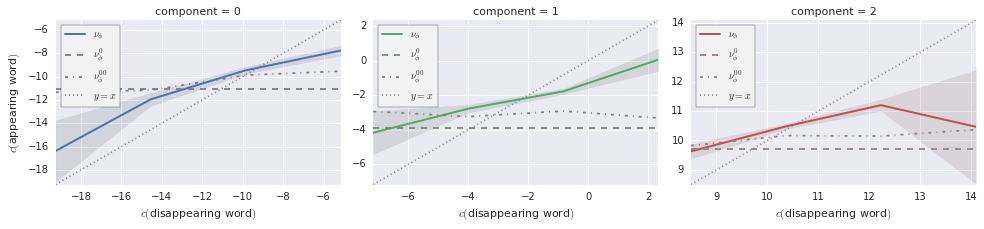

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.6739516   0.20364409]



aoa  frequency  letters_count
Component-0 -0.749562   0.394192      -0.531761
Component-1  0.392528  -0.382152      -0.836589

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 67981) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   14 of 67981) |                     | Elapsed Time: 0:00:02 ETA: 3:58:53

  0% (   43 of 67981) |                     | Elapsed Time: 0:00:03 ETA: 1:23:11

  0% (   76 of 67981) |                     | Elapsed Time: 0:00:03 ETA: 0:50:06

  0% (  110 of 67981) |                     | Elapsed Time: 0:00:03 ETA: 0:36:43

  0% (  143 of 67981) |                     | Elapsed Time: 0:00:03 ETA: 0:07:23

  0% (  173 of 67981) |                     | Elapsed Time: 0:00:03 ETA: 0:07:18

  0% (  217 of 67981) |                     | Elapsed Time: 0:00:04 ETA: 0:07:24

  0% (  248 of 67981) |                     | Elapsed Time: 0:00:04 ETA: 0:07:34

  0% (  280 of 67981) |                     | Elapsed Time: 0:00:04 ETA: 0:07:38

  0% (  310 of 67981) |                     | Elapsed Time: 0:00:04 ETA: 0:07:38

  0% (  340 of 67981) |                     | Elapsed Time: 0:00:05 ETA: 0:07:42

  0% (  369 of 67981) |                     | Elapsed Time: 0:00:05 ETA: 0:07:42

  0% (  401 of 67981) |                     | Elapsed Time: 0:00:05 ETA: 0:07:39

  0% (  433 of 67981) |                     | Elapsed Time: 0:00:05 ETA: 0:07:37

  0% (  462 of 67981) |                     | Elapsed Time: 0:00:05 ETA: 0:07:39

  0% (  491 of 67981) |                     | Elapsed Time: 0:00:06 ETA: 0:07:36

  0% (  521 of 67981) |                     | Elapsed Time: 0:00:06 ETA: 0:07:40

  0% (  550 of 67981) |                     | Elapsed Time: 0:00:06 ETA: 0:07:50

  0% (  580 of 67981) |                     | Elapsed Time: 0:00:06 ETA: 0:07:53

  0% (  609 of 67981) |                     | Elapsed Time: 0:00:06 ETA: 0:07:53

  0% (  639 of 67981) |                     | Elapsed Time: 0:00:07 ETA: 0:07:52

  0% (  668 of 67981) |                     | Elapsed Time: 0:00:07 ETA: 0:07:51

  1% (  698 of 67981) |                     | Elapsed Time: 0:00:07 ETA: 0:07:49

  1% (  728 of 67981) |                     | Elapsed Time: 0:00:07 ETA: 0:07:49

  1% (  760 of 67981) |                     | Elapsed Time: 0:00:08 ETA: 0:07:39

  1% (  792 of 67981) |                     | Elapsed Time: 0:00:08 ETA: 0:07:29

  1% (  822 of 67981) |                     | Elapsed Time: 0:00:08 ETA: 0:07:29

  1% (  866 of 67981) |                     | Elapsed Time: 0:00:08 ETA: 0:07:23

  1% (  898 of 67981) |                     | Elapsed Time: 0:00:08 ETA: 0:07:16

  1% (  929 of 67981) |                     | Elapsed Time: 0:00:09 ETA: 0:07:22

  1% (  957 of 67981) |                     | Elapsed Time: 0:00:09 ETA: 0:07:30

  1% (  987 of 67981) |                     | Elapsed Time: 0:00:09 ETA: 0:07:31

  1% ( 1017 of 67981) |                     | Elapsed Time: 0:00:09 ETA: 0:07:41

  1% ( 1048 of 67981) |                     | Elapsed Time: 0:00:09 ETA: 0:07:41

  1% ( 1081 of 67981) |                     | Elapsed Time: 0:00:10 ETA: 0:07:29

  1% ( 1113 of 67981) |                     | Elapsed Time: 0:00:10 ETA: 0:07:18

  1% ( 1143 of 67981) |                     | Elapsed Time: 0:00:10 ETA: 0:07:18

  1% ( 1174 of 67981) |                     | Elapsed Time: 0:00:10 ETA: 0:07:16

  1% ( 1206 of 67981) |                     | Elapsed Time: 0:00:10 ETA: 0:07:18

  1% ( 1239 of 67981) |                     | Elapsed Time: 0:00:11 ETA: 0:07:15

  1% ( 1270 of 67981) |                     | Elapsed Time: 0:00:11 ETA: 0:07:18

  1% ( 1302 of 67981) |                     | Elapsed Time: 0:00:11 ETA: 0:07:13

  1% ( 1334 of 67981) |                     | Elapsed Time: 0:00:11 ETA: 0:07:14

  2% ( 1368 of 67981) |                     | Elapsed Time: 0:00:12 ETA: 0:07:10

  2% ( 1401 of 67981) |                     | Elapsed Time: 0:00:12 ETA: 0:07:03

  2% ( 1432 of 67981) |                     | Elapsed Time: 0:00:12 ETA: 0:07:02

  2% ( 1464 of 67981) |                     | Elapsed Time: 0:00:12 ETA: 0:06:59

  2% ( 1497 of 67981) |                     | Elapsed Time: 0:00:12 ETA: 0:06:58

  2% ( 1530 of 67981) |                     | Elapsed Time: 0:00:13 ETA: 0:06:59

  2% ( 1562 of 67981) |                     | Elapsed Time: 0:00:13 ETA: 0:06:59

  2% ( 1592 of 67981) |                     | Elapsed Time: 0:00:13 ETA: 0:07:04

  2% ( 1625 of 67981) |                     | Elapsed Time: 0:00:13 ETA: 0:07:00

  2% ( 1658 of 67981) |                     | Elapsed Time: 0:00:13 ETA: 0:07:02

  2% ( 1700 of 67981) |                     | Elapsed Time: 0:00:14 ETA: 0:07:09

  2% ( 1730 of 67981) |                     | Elapsed Time: 0:00:14 ETA: 0:07:11

  2% ( 1763 of 67981) |                     | Elapsed Time: 0:00:14 ETA: 0:07:08

  2% ( 1796 of 67981) |                     | Elapsed Time: 0:00:14 ETA: 0:07:06

  2% ( 1830 of 67981) |                     | Elapsed Time: 0:00:14 ETA: 0:07:00

  2% ( 1864 of 67981) |                     | Elapsed Time: 0:00:15 ETA: 0:06:52

  2% ( 1896 of 67981) |                     | Elapsed Time: 0:00:15 ETA: 0:06:51

  2% ( 1928 of 67981) |                     | Elapsed Time: 0:00:15 ETA: 0:06:57

  2% ( 1962 of 67981) |                     | Elapsed Time: 0:00:15 ETA: 0:06:56

  2% ( 1995 of 67981) |                     | Elapsed Time: 0:00:16 ETA: 0:06:59

  2% ( 2028 of 67981) |                     | Elapsed Time: 0:00:16 ETA: 0:06:56

  3% ( 2060 of 67981) |                     | Elapsed Time: 0:00:16 ETA: 0:06:56

  3% ( 2095 of 67981) |                     | Elapsed Time: 0:00:16 ETA: 0:06:50

  3% ( 2127 of 67981) |                     | Elapsed Time: 0:00:16 ETA: 0:06:52

  3% ( 2159 of 67981) |                     | Elapsed Time: 0:00:17 ETA: 0:06:54

  3% ( 2192 of 67981) |                     | Elapsed Time: 0:00:17 ETA: 0:06:47

  3% ( 2225 of 67981) |                     | Elapsed Time: 0:00:17 ETA: 0:06:49

  3% ( 2260 of 67981) |                     | Elapsed Time: 0:00:17 ETA: 0:06:45

  3% ( 2292 of 67981) |                     | Elapsed Time: 0:00:17 ETA: 0:06:50

  3% ( 2337 of 67981) |                     | Elapsed Time: 0:00:18 ETA: 0:07:00

  3% ( 2370 of 67981) |                     | Elapsed Time: 0:00:18 ETA: 0:06:58

  3% ( 2400 of 67981) |                     | Elapsed Time: 0:00:18 ETA: 0:07:12

  3% ( 2429 of 67981) |                     | Elapsed Time: 0:00:18 ETA: 0:07:19

  3% ( 2459 of 67981) |                     | Elapsed Time: 0:00:18 ETA: 0:07:20

  3% ( 2489 of 67981) |                     | Elapsed Time: 0:00:19 ETA: 0:07:25

  3% ( 2518 of 67981) |                     | Elapsed Time: 0:00:19 ETA: 0:07:34

  3% ( 2550 of 67981) |                     | Elapsed Time: 0:00:19 ETA: 0:07:39

  3% ( 2581 of 67981) |                     | Elapsed Time: 0:00:19 ETA: 0:07:37

  3% ( 2612 of 67981) |                     | Elapsed Time: 0:00:20 ETA: 0:07:34

  3% ( 2643 of 67981) |                     | Elapsed Time: 0:00:20 ETA: 0:07:30

  3% ( 2675 of 67981) |                     | Elapsed Time: 0:00:20 ETA: 0:07:15

  3% ( 2709 of 67981) |                     | Elapsed Time: 0:00:20 ETA: 0:07:04

  4% ( 2741 of 67981) |                     | Elapsed Time: 0:00:20 ETA: 0:07:01

  4% ( 2773 of 67981) |                     | Elapsed Time: 0:00:21 ETA: 0:06:55

  4% ( 2803 of 67981) |                     | Elapsed Time: 0:00:21 ETA: 0:06:53

  4% ( 2835 of 67981) |                     | Elapsed Time: 0:00:21 ETA: 0:07:00

  4% ( 2866 of 67981) |                     | Elapsed Time: 0:00:21 ETA: 0:07:08

  4% ( 2900 of 67981) |                     | Elapsed Time: 0:00:21 ETA: 0:07:02

  4% ( 2935 of 67981) |                     | Elapsed Time: 0:00:22 ETA: 0:06:54

  4% ( 2968 of 67981) |                     | Elapsed Time: 0:00:22 ETA: 0:06:47

  4% ( 3000 of 67981) |                     | Elapsed Time: 0:00:22 ETA: 0:06:44

  4% ( 3032 of 67981) |                     | Elapsed Time: 0:00:22 ETA: 0:06:40

  4% ( 3065 of 67981) |                     | Elapsed Time: 0:00:22 ETA: 0:06:47

  4% ( 3099 of 67981) |                     | Elapsed Time: 0:00:23 ETA: 0:06:45

  4% ( 3135 of 67981) |                     | Elapsed Time: 0:00:23 ETA: 0:06:37

  4% ( 3169 of 67981) |                     | Elapsed Time: 0:00:23 ETA: 0:06:34

  4% ( 3204 of 67981) |                     | Elapsed Time: 0:00:23 ETA: 0:06:28

  4% ( 3241 of 67981) |#                    | Elapsed Time: 0:00:23 ETA: 0:06:18

  4% ( 3278 of 67981) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:15

  4% ( 3314 of 67981) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:12

  4% ( 3350 of 67981) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:06

  5% ( 3400 of 67981) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:09

  5% ( 3433 of 67981) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:18

  5% ( 3463 of 67981) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:33

  5% ( 3492 of 67981) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:48

  5% ( 3522 of 67981) |#                    | Elapsed Time: 0:00:25 ETA: 0:07:02

  5% ( 3552 of 67981) |#                    | Elapsed Time: 0:00:25 ETA: 0:07:22

  5% ( 3584 of 67981) |#                    | Elapsed Time: 0:00:26 ETA: 0:07:20

  5% ( 3614 of 67981) |#                    | Elapsed Time: 0:00:26 ETA: 0:07:15

  5% ( 3645 of 67981) |#                    | Elapsed Time: 0:00:26 ETA: 0:07:12

  5% ( 3675 of 67981) |#                    | Elapsed Time: 0:00:26 ETA: 0:07:10

  5% ( 3707 of 67981) |#                    | Elapsed Time: 0:00:26 ETA: 0:07:07

  5% ( 3737 of 67981) |#                    | Elapsed Time: 0:00:27 ETA: 0:07:12

  5% ( 3768 of 67981) |#                    | Elapsed Time: 0:00:27 ETA: 0:07:12

  5% ( 3798 of 67981) |#                    | Elapsed Time: 0:00:27 ETA: 0:07:12

  5% ( 3828 of 67981) |#                    | Elapsed Time: 0:00:27 ETA: 0:07:16

  5% ( 3858 of 67981) |#                    | Elapsed Time: 0:00:27 ETA: 0:07:15

  5% ( 3889 of 67981) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:14

  5% ( 3919 of 67981) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:14

  5% ( 3951 of 67981) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:09

  5% ( 3982 of 67981) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:05

  5% ( 4012 of 67981) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:06

  5% ( 4042 of 67981) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:08

  5% ( 4072 of 67981) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:09

  6% ( 4101 of 67981) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:20

  6% ( 4131 of 67981) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:19

  6% ( 4160 of 67981) |#                    | Elapsed Time: 0:00:30 ETA: 0:07:22

  6% ( 4194 of 67981) |#                    | Elapsed Time: 0:00:30 ETA: 0:07:12

  6% ( 4220 of 67981) |#                    | Elapsed Time: 0:00:30 ETA: 0:07:23

  6% ( 4249 of 67981) |#                    | Elapsed Time: 0:00:30 ETA: 0:07:54

  6% ( 4271 of 67981) |#                    | Elapsed Time: 0:00:30 ETA: 0:08:31

  6% ( 4292 of 67981) |#                    | Elapsed Time: 0:00:31 ETA: 0:09:16

  6% ( 4312 of 67981) |#                    | Elapsed Time: 0:00:31 ETA: 0:10:21

  6% ( 4332 of 67981) |#                    | Elapsed Time: 0:00:31 ETA: 0:10:35

  6% ( 4352 of 67981) |#                    | Elapsed Time: 0:00:31 ETA: 0:10:44

  6% ( 4372 of 67981) |#                    | Elapsed Time: 0:00:31 ETA: 0:10:56

  6% ( 4392 of 67981) |#                    | Elapsed Time: 0:00:32 ETA: 0:10:55

  6% ( 4412 of 67981) |#                    | Elapsed Time: 0:00:32 ETA: 0:10:54

  6% ( 4432 of 67981) |#                    | Elapsed Time: 0:00:32 ETA: 0:10:52

  6% ( 4453 of 67981) |#                    | Elapsed Time: 0:00:32 ETA: 0:10:51

  6% ( 4473 of 67981) |#                    | Elapsed Time: 0:00:33 ETA: 0:10:51

  6% ( 4493 of 67981) |#                    | Elapsed Time: 0:00:33 ETA: 0:10:51

  6% ( 4514 of 67981) |#                    | Elapsed Time: 0:00:33 ETA: 0:10:50

  6% ( 4535 of 67981) |#                    | Elapsed Time: 0:00:33 ETA: 0:10:47

  6% ( 4555 of 67981) |#                    | Elapsed Time: 0:00:33 ETA: 0:10:46

  6% ( 4577 of 67981) |#                    | Elapsed Time: 0:00:34 ETA: 0:10:38

  6% ( 4602 of 67981) |#                    | Elapsed Time: 0:00:34 ETA: 0:10:03

  6% ( 4623 of 67981) |#                    | Elapsed Time: 0:00:34 ETA: 0:10:05

  6% ( 4645 of 67981) |#                    | Elapsed Time: 0:00:34 ETA: 0:09:59

  6% ( 4674 of 67981) |#                    | Elapsed Time: 0:00:34 ETA: 0:09:12

  6% ( 4710 of 67981) |#                    | Elapsed Time: 0:00:35 ETA: 0:08:23

  6% ( 4746 of 67981) |#                    | Elapsed Time: 0:00:35 ETA: 0:07:25

  7% ( 4782 of 67981) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:37

  7% ( 4818 of 67981) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:03

  7% ( 4854 of 67981) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:04

  7% ( 4890 of 67981) |#                    | Elapsed Time: 0:00:36 ETA: 0:06:02

  7% ( 4926 of 67981) |#                    | Elapsed Time: 0:00:36 ETA: 0:06:02

  7% ( 4962 of 67981) |#                    | Elapsed Time: 0:00:36 ETA: 0:06:04

  7% ( 4994 of 67981) |#                    | Elapsed Time: 0:00:36 ETA: 0:06:11

  7% ( 5026 of 67981) |#                    | Elapsed Time: 0:00:36 ETA: 0:06:19

  7% ( 5058 of 67981) |#                    | Elapsed Time: 0:00:37 ETA: 0:06:28

  7% ( 5099 of 67981) |#                    | Elapsed Time: 0:00:37 ETA: 0:06:38

  7% ( 5130 of 67981) |#                    | Elapsed Time: 0:00:37 ETA: 0:06:44

  7% ( 5162 of 67981) |#                    | Elapsed Time: 0:00:37 ETA: 0:06:46

  7% ( 5194 of 67981) |#                    | Elapsed Time: 0:00:38 ETA: 0:06:47

  7% ( 5229 of 67981) |#                    | Elapsed Time: 0:00:38 ETA: 0:06:40

  7% ( 5264 of 67981) |#                    | Elapsed Time: 0:00:38 ETA: 0:06:30

  7% ( 5300 of 67981) |#                    | Elapsed Time: 0:00:38 ETA: 0:06:18

  7% ( 5335 of 67981) |#                    | Elapsed Time: 0:00:38 ETA: 0:06:09

  7% ( 5371 of 67981) |#                    | Elapsed Time: 0:00:39 ETA: 0:06:03

  7% ( 5407 of 67981) |#                    | Elapsed Time: 0:00:39 ETA: 0:06:02

  8% ( 5439 of 67981) |#                    | Elapsed Time: 0:00:39 ETA: 0:06:12

  8% ( 5472 of 67981) |#                    | Elapsed Time: 0:00:39 ETA: 0:06:18

  8% ( 5506 of 67981) |#                    | Elapsed Time: 0:00:39 ETA: 0:06:24

  8% ( 5539 of 67981) |#                    | Elapsed Time: 0:00:40 ETA: 0:06:30

  8% ( 5571 of 67981) |#                    | Elapsed Time: 0:00:40 ETA: 0:06:35

  8% ( 5604 of 67981) |#                    | Elapsed Time: 0:00:40 ETA: 0:06:28

  8% ( 5637 of 67981) |#                    | Elapsed Time: 0:00:40 ETA: 0:06:28

  8% ( 5671 of 67981) |#                    | Elapsed Time: 0:00:40 ETA: 0:06:28

  8% ( 5705 of 67981) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:24

  8% ( 5739 of 67981) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:20

  8% ( 5772 of 67981) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:20

  8% ( 5806 of 67981) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:17

  8% ( 5840 of 67981) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:19

  8% ( 5875 of 67981) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:15

  8% ( 5909 of 67981) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:15

  8% ( 5949 of 67981) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:15

  8% ( 5983 of 67981) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:18

  8% ( 6018 of 67981) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:19

  8% ( 6053 of 67981) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:15

  8% ( 6088 of 67981) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:13

  9% ( 6123 of 67981) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:08

  9% ( 6157 of 67981) |#                    | Elapsed Time: 0:00:43 ETA: 0:06:08

  9% ( 6190 of 67981) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:11

  9% ( 6224 of 67981) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:15

  9% ( 6258 of 67981) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:17

  9% ( 6291 of 67981) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:20

  9% ( 6325 of 67981) |#                    | Elapsed Time: 0:00:44 ETA: 0:06:20

  9% ( 6359 of 67981) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:18

  9% ( 6393 of 67981) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:17

  9% ( 6427 of 67981) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:16

  9% ( 6462 of 67981) |#                    | Elapsed Time: 0:00:45 ETA: 0:06:12

  9% ( 6497 of 67981) |##                   | Elapsed Time: 0:00:45 ETA: 0:06:07

  9% ( 6532 of 67981) |##                   | Elapsed Time: 0:00:46 ETA: 0:06:05

  9% ( 6565 of 67981) |##                   | Elapsed Time: 0:00:46 ETA: 0:06:05

  9% ( 6600 of 67981) |##                   | Elapsed Time: 0:00:46 ETA: 0:06:07

  9% ( 6636 of 67981) |##                   | Elapsed Time: 0:00:46 ETA: 0:06:04

  9% ( 6672 of 67981) |##                   | Elapsed Time: 0:00:46 ETA: 0:05:59

  9% ( 6708 of 67981) |##                   | Elapsed Time: 0:00:47 ETA: 0:05:57

  9% ( 6744 of 67981) |##                   | Elapsed Time: 0:00:47 ETA: 0:05:51

  9% ( 6776 of 67981) |##                   | Elapsed Time: 0:00:47 ETA: 0:06:00

 10% ( 6813 of 67981) |##                   | Elapsed Time: 0:00:47 ETA: 0:06:20

 10% ( 6840 of 67981) |##                   | Elapsed Time: 0:00:48 ETA: 0:06:45

 10% ( 6868 of 67981) |##                   | Elapsed Time: 0:00:48 ETA: 0:07:08

 10% ( 6896 of 67981) |##                   | Elapsed Time: 0:00:48 ETA: 0:07:27

 10% ( 6924 of 67981) |##                   | Elapsed Time: 0:00:48 ETA: 0:07:38

 10% ( 6952 of 67981) |##                   | Elapsed Time: 0:00:48 ETA: 0:07:38

 10% ( 6982 of 67981) |##                   | Elapsed Time: 0:00:49 ETA: 0:07:33

 10% ( 7002 of 67981) |##                   | Elapsed Time: 0:00:49 ETA: 0:08:09

 10% ( 7021 of 67981) |##                   | Elapsed Time: 0:00:49 ETA: 0:08:52

 10% ( 7041 of 67981) |##                   | Elapsed Time: 0:00:49 ETA: 0:09:38

 10% ( 7064 of 67981) |##                   | Elapsed Time: 0:00:50 ETA: 0:10:15

 10% ( 7100 of 67981) |##                   | Elapsed Time: 0:00:50 ETA: 0:09:04

 10% ( 7137 of 67981) |##                   | Elapsed Time: 0:00:50 ETA: 0:07:41

 10% ( 7177 of 67981) |##                   | Elapsed Time: 0:00:50 ETA: 0:06:30

 10% ( 7218 of 67981) |##                   | Elapsed Time: 0:00:50 ETA: 0:05:37

 10% ( 7253 of 67981) |##                   | Elapsed Time: 0:00:51 ETA: 0:05:25

 10% ( 7287 of 67981) |##                   | Elapsed Time: 0:00:51 ETA: 0:05:30

 10% ( 7320 of 67981) |##                   | Elapsed Time: 0:00:51 ETA: 0:05:40

 10% ( 7355 of 67981) |##                   | Elapsed Time: 0:00:51 ETA: 0:05:57

 10% ( 7390 of 67981) |##                   | Elapsed Time: 0:00:51 ETA: 0:06:04

 10% ( 7425 of 67981) |##                   | Elapsed Time: 0:00:52 ETA: 0:06:02

 10% ( 7460 of 67981) |##                   | Elapsed Time: 0:00:52 ETA: 0:05:57

 11% ( 7495 of 67981) |##                   | Elapsed Time: 0:00:52 ETA: 0:05:54

 11% ( 7529 of 67981) |##                   | Elapsed Time: 0:00:52 ETA: 0:05:56

 11% ( 7564 of 67981) |##                   | Elapsed Time: 0:00:52 ETA: 0:05:55

 11% ( 7600 of 67981) |##                   | Elapsed Time: 0:00:53 ETA: 0:05:55

 11% ( 7648 of 67981) |##                   | Elapsed Time: 0:00:53 ETA: 0:05:54

 11% ( 7684 of 67981) |##                   | Elapsed Time: 0:00:53 ETA: 0:05:52

 11% ( 7719 of 67981) |##                   | Elapsed Time: 0:00:53 ETA: 0:05:51

 11% ( 7753 of 67981) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:56

 11% ( 7788 of 67981) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:57

 11% ( 7825 of 67981) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:53

 11% ( 7863 of 67981) |##                   | Elapsed Time: 0:00:54 ETA: 0:05:50

 11% ( 7884 of 67981) |##                   | Elapsed Time: 0:00:54 ETA: 0:06:21

 11% ( 7907 of 67981) |##                   | Elapsed Time: 0:00:55 ETA: 0:06:55

 11% ( 7928 of 67981) |##                   | Elapsed Time: 0:00:55 ETA: 0:07:49

 11% ( 7951 of 67981) |##                   | Elapsed Time: 0:00:55 ETA: 0:08:55

 11% ( 7974 of 67981) |##                   | Elapsed Time: 0:00:55 ETA: 0:09:35

 11% ( 7994 of 67981) |##                   | Elapsed Time: 0:00:55 ETA: 0:09:33

 11% ( 8024 of 67981) |##                   | Elapsed Time: 0:00:56 ETA: 0:09:01

 11% ( 8056 of 67981) |##                   | Elapsed Time: 0:00:56 ETA: 0:08:04

 11% ( 8087 of 67981) |##                   | Elapsed Time: 0:00:56 ETA: 0:07:37

 11% ( 8123 of 67981) |##                   | Elapsed Time: 0:00:56 ETA: 0:06:44

 12% ( 8158 of 67981) |##                   | Elapsed Time: 0:00:56 ETA: 0:06:13

 12% ( 8183 of 67981) |##                   | Elapsed Time: 0:00:57 ETA: 0:06:30

 12% ( 8209 of 67981) |##                   | Elapsed Time: 0:00:57 ETA: 0:06:50

 12% ( 8235 of 67981) |##                   | Elapsed Time: 0:00:57 ETA: 0:07:05

 12% ( 8261 of 67981) |##                   | Elapsed Time: 0:00:57 ETA: 0:07:47

 12% ( 8287 of 67981) |##                   | Elapsed Time: 0:00:57 ETA: 0:08:00

 12% ( 8313 of 67981) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:59

 12% ( 8339 of 67981) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:58

 12% ( 8366 of 67981) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:55

 12% ( 8405 of 67981) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:05

 12% ( 8446 of 67981) |##                   | Elapsed Time: 0:00:59 ETA: 0:06:20

 12% ( 8498 of 67981) |##                   | Elapsed Time: 0:00:59 ETA: 0:05:47

 12% ( 8554 of 67981) |##                   | Elapsed Time: 0:00:59 ETA: 0:05:12

 12% ( 8593 of 67981) |##                   | Elapsed Time: 0:00:59 ETA: 0:05:13

 12% ( 8627 of 67981) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:23

 12% ( 8661 of 67981) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:33

 12% ( 8694 of 67981) |##                   | Elapsed Time: 0:01:00 ETA: 0:05:45

 12% ( 8725 of 67981) |##                   | Elapsed Time: 0:01:00 ETA: 0:06:05

 12% ( 8756 of 67981) |##                   | Elapsed Time: 0:01:00 ETA: 0:06:15

 12% ( 8787 of 67981) |##                   | Elapsed Time: 0:01:01 ETA: 0:06:24

 12% ( 8817 of 67981) |##                   | Elapsed Time: 0:01:01 ETA: 0:06:36

 13% ( 8847 of 67981) |##                   | Elapsed Time: 0:01:01 ETA: 0:06:42

 13% ( 8876 of 67981) |##                   | Elapsed Time: 0:01:01 ETA: 0:06:43

 13% ( 8905 of 67981) |##                   | Elapsed Time: 0:01:01 ETA: 0:06:51

 13% ( 8936 of 67981) |##                   | Elapsed Time: 0:01:02 ETA: 0:06:50

 13% ( 8966 of 67981) |##                   | Elapsed Time: 0:01:02 ETA: 0:06:52

 13% ( 8997 of 67981) |##                   | Elapsed Time: 0:01:02 ETA: 0:06:46

 13% ( 9028 of 67981) |##                   | Elapsed Time: 0:01:02 ETA: 0:06:41

 13% ( 9060 of 67981) |##                   | Elapsed Time: 0:01:02 ETA: 0:06:33

 13% ( 9089 of 67981) |##                   | Elapsed Time: 0:01:03 ETA: 0:06:37

 13% ( 9118 of 67981) |##                   | Elapsed Time: 0:01:03 ETA: 0:06:37

 13% ( 9150 of 67981) |##                   | Elapsed Time: 0:01:03 ETA: 0:06:36

 13% ( 9180 of 67981) |##                   | Elapsed Time: 0:01:03 ETA: 0:06:42

 13% ( 9210 of 67981) |##                   | Elapsed Time: 0:01:03 ETA: 0:06:44

 13% ( 9241 of 67981) |##                   | Elapsed Time: 0:01:04 ETA: 0:06:39

 13% ( 9271 of 67981) |##                   | Elapsed Time: 0:01:04 ETA: 0:06:40

 13% ( 9302 of 67981) |##                   | Elapsed Time: 0:01:04 ETA: 0:06:40

 13% ( 9331 of 67981) |##                   | Elapsed Time: 0:01:04 ETA: 0:06:43

 13% ( 9362 of 67981) |##                   | Elapsed Time: 0:01:05 ETA: 0:06:47

 13% ( 9390 of 67981) |##                   | Elapsed Time: 0:01:05 ETA: 0:06:54

 13% ( 9418 of 67981) |##                   | Elapsed Time: 0:01:05 ETA: 0:06:56

 13% ( 9446 of 67981) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:07

 13% ( 9474 of 67981) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:09

 13% ( 9502 of 67981) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:09

 14% ( 9530 of 67981) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:07

 14% ( 9559 of 67981) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:06

 14% ( 9587 of 67981) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:05

 14% ( 9615 of 67981) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:04

 14% ( 9644 of 67981) |##                   | Elapsed Time: 0:01:07 ETA: 0:07:01

 14% ( 9673 of 67981) |##                   | Elapsed Time: 0:01:07 ETA: 0:07:00

 14% ( 9701 of 67981) |##                   | Elapsed Time: 0:01:07 ETA: 0:07:00

 14% ( 9729 of 67981) |###                  | Elapsed Time: 0:01:07 ETA: 0:07:01

 14% ( 9759 of 67981) |###                  | Elapsed Time: 0:01:07 ETA: 0:06:59

 14% ( 9789 of 67981) |###                  | Elapsed Time: 0:01:08 ETA: 0:06:58

 14% ( 9819 of 67981) |###                  | Elapsed Time: 0:01:08 ETA: 0:06:54

 14% ( 9847 of 67981) |###                  | Elapsed Time: 0:01:08 ETA: 0:06:54

 14% ( 9875 of 67981) |###                  | Elapsed Time: 0:01:08 ETA: 0:06:55

 14% ( 9905 of 67981) |###                  | Elapsed Time: 0:01:08 ETA: 0:06:58

 14% ( 9933 of 67981) |###                  | Elapsed Time: 0:01:09 ETA: 0:06:59

 14% ( 9962 of 67981) |###                  | Elapsed Time: 0:01:09 ETA: 0:06:56

 14% ( 9991 of 67981) |###                  | Elapsed Time: 0:01:09 ETA: 0:06:53

 14% (10020 of 67981) |###                  | Elapsed Time: 0:01:09 ETA: 0:06:51

 14% (10050 of 67981) |###                  | Elapsed Time: 0:01:09 ETA: 0:06:47

 14% (10082 of 67981) |###                  | Elapsed Time: 0:01:10 ETA: 0:06:37

 14% (10112 of 67981) |###                  | Elapsed Time: 0:01:10 ETA: 0:06:36

 14% (10142 of 67981) |###                  | Elapsed Time: 0:01:10 ETA: 0:06:31

 14% (10173 of 67981) |###                  | Elapsed Time: 0:01:10 ETA: 0:06:28

 15% (10213 of 67981) |###                  | Elapsed Time: 0:01:11 ETA: 0:06:30

 15% (10244 of 67981) |###                  | Elapsed Time: 0:01:11 ETA: 0:06:30

 15% (10276 of 67981) |###                  | Elapsed Time: 0:01:11 ETA: 0:06:26

 15% (10306 of 67981) |###                  | Elapsed Time: 0:01:11 ETA: 0:06:26

 15% (10337 of 67981) |###                  | Elapsed Time: 0:01:11 ETA: 0:06:28

 15% (10367 of 67981) |###                  | Elapsed Time: 0:01:12 ETA: 0:06:27

 15% (10397 of 67981) |###                  | Elapsed Time: 0:01:12 ETA: 0:06:33

 15% (10426 of 67981) |###                  | Elapsed Time: 0:01:12 ETA: 0:06:36

 15% (10456 of 67981) |###                  | Elapsed Time: 0:01:12 ETA: 0:06:36

 15% (10486 of 67981) |###                  | Elapsed Time: 0:01:12 ETA: 0:06:37

 15% (10516 of 67981) |###                  | Elapsed Time: 0:01:13 ETA: 0:06:36

 15% (10546 of 67981) |###                  | Elapsed Time: 0:01:13 ETA: 0:06:35

 15% (10576 of 67981) |###                  | Elapsed Time: 0:01:13 ETA: 0:06:34

 15% (10605 of 67981) |###                  | Elapsed Time: 0:01:13 ETA: 0:06:36

 15% (10635 of 67981) |###                  | Elapsed Time: 0:01:13 ETA: 0:06:35

 15% (10666 of 67981) |###                  | Elapsed Time: 0:01:14 ETA: 0:06:32

 15% (10696 of 67981) |###                  | Elapsed Time: 0:01:14 ETA: 0:06:32

 15% (10727 of 67981) |###                  | Elapsed Time: 0:01:14 ETA: 0:06:26

 15% (10757 of 67981) |###                  | Elapsed Time: 0:01:14 ETA: 0:06:27

 15% (10787 of 67981) |###                  | Elapsed Time: 0:01:14 ETA: 0:06:28

 15% (10817 of 67981) |###                  | Elapsed Time: 0:01:15 ETA: 0:06:31

 15% (10848 of 67981) |###                  | Elapsed Time: 0:01:15 ETA: 0:06:31

 16% (10878 of 67981) |###                  | Elapsed Time: 0:01:15 ETA: 0:06:32

 16% (10908 of 67981) |###                  | Elapsed Time: 0:01:15 ETA: 0:06:32

 16% (10938 of 67981) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:30

 16% (10969 of 67981) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:26

 16% (10999 of 67981) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:27

 16% (11031 of 67981) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:21

 16% (11062 of 67981) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:22

 16% (11092 of 67981) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:26

 16% (11122 of 67981) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:26

 16% (11151 of 67981) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:33

 16% (11181 of 67981) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:33

 16% (11211 of 67981) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:33

 16% (11241 of 67981) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:32

 16% (11270 of 67981) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:32

 16% (11299 of 67981) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:34

 16% (11329 of 67981) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:35

 16% (11359 of 67981) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:34

 16% (11389 of 67981) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:31

 16% (11419 of 67981) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:29

 16% (11449 of 67981) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:29

 16% (11478 of 67981) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:34

 16% (11507 of 67981) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:36

 16% (11536 of 67981) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:37

 17% (11565 of 67981) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:39

 17% (11596 of 67981) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:32

 17% (11628 of 67981) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:26

 17% (11658 of 67981) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:22

 17% (11688 of 67981) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:21

 17% (11718 of 67981) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:21

 17% (11750 of 67981) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:19

 17% (11780 of 67981) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:22

 17% (11811 of 67981) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:21

 17% (11841 of 67981) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:16

 17% (11872 of 67981) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:20

 17% (11912 of 67981) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:21

 17% (11943 of 67981) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:21

 17% (11976 of 67981) |###                  | Elapsed Time: 0:01:23 ETA: 0:06:14

 17% (12011 of 67981) |###                  | Elapsed Time: 0:01:23 ETA: 0:06:01

 17% (12047 of 67981) |###                  | Elapsed Time: 0:01:23 ETA: 0:05:47

 17% (12083 of 67981) |###                  | Elapsed Time: 0:01:23 ETA: 0:05:32

 17% (12116 of 67981) |###                  | Elapsed Time: 0:01:23 ETA: 0:05:25

 17% (12152 of 67981) |###                  | Elapsed Time: 0:01:24 ETA: 0:05:23

 17% (12185 of 67981) |###                  | Elapsed Time: 0:01:24 ETA: 0:05:30

 17% (12216 of 67981) |###                  | Elapsed Time: 0:01:24 ETA: 0:05:42

 18% (12249 of 67981) |###                  | Elapsed Time: 0:01:24 ETA: 0:05:47

 18% (12283 of 67981) |###                  | Elapsed Time: 0:01:24 ETA: 0:05:50

 18% (12315 of 67981) |###                  | Elapsed Time: 0:01:25 ETA: 0:05:56

 18% (12343 of 67981) |###                  | Elapsed Time: 0:01:25 ETA: 0:06:04

 18% (12375 of 67981) |###                  | Elapsed Time: 0:01:25 ETA: 0:06:03

 18% (12407 of 67981) |###                  | Elapsed Time: 0:01:25 ETA: 0:06:06

 18% (12438 of 67981) |###                  | Elapsed Time: 0:01:26 ETA: 0:06:11

 18% (12472 of 67981) |###                  | Elapsed Time: 0:01:26 ETA: 0:06:03

 18% (12504 of 67981) |###                  | Elapsed Time: 0:01:26 ETA: 0:05:54

 18% (12535 of 67981) |###                  | Elapsed Time: 0:01:26 ETA: 0:05:56

 18% (12568 of 67981) |###                  | Elapsed Time: 0:01:26 ETA: 0:05:57

 18% (12600 of 67981) |###                  | Elapsed Time: 0:01:27 ETA: 0:05:56

 18% (12630 of 67981) |###                  | Elapsed Time: 0:01:27 ETA: 0:06:03

 18% (12663 of 67981) |###                  | Elapsed Time: 0:01:27 ETA: 0:05:57

 18% (12696 of 67981) |###                  | Elapsed Time: 0:01:27 ETA: 0:05:56

 18% (12729 of 67981) |###                  | Elapsed Time: 0:01:27 ETA: 0:05:52

 18% (12764 of 67981) |###                  | Elapsed Time: 0:01:28 ETA: 0:05:53

 18% (12797 of 67981) |###                  | Elapsed Time: 0:01:28 ETA: 0:05:50

 18% (12831 of 67981) |###                  | Elapsed Time: 0:01:28 ETA: 0:05:46

 18% (12864 of 67981) |###                  | Elapsed Time: 0:01:28 ETA: 0:05:50

 18% (12896 of 67981) |###                  | Elapsed Time: 0:01:28 ETA: 0:05:48

 19% (12928 of 67981) |###                  | Elapsed Time: 0:01:29 ETA: 0:05:49

 19% (12961 of 67981) |####                 | Elapsed Time: 0:01:29 ETA: 0:05:49

 19% (12993 of 67981) |####                 | Elapsed Time: 0:01:29 ETA: 0:05:53

 19% (13024 of 67981) |####                 | Elapsed Time: 0:01:29 ETA: 0:05:54

 19% (13055 of 67981) |####                 | Elapsed Time: 0:01:29 ETA: 0:05:58

 19% (13089 of 67981) |####                 | Elapsed Time: 0:01:30 ETA: 0:05:54

 19% (13120 of 67981) |####                 | Elapsed Time: 0:01:30 ETA: 0:05:56

 19% (13151 of 67981) |####                 | Elapsed Time: 0:01:30 ETA: 0:05:56

 19% (13181 of 67981) |####                 | Elapsed Time: 0:01:30 ETA: 0:06:01

 19% (13213 of 67981) |####                 | Elapsed Time: 0:01:31 ETA: 0:05:59

 19% (13243 of 67981) |####                 | Elapsed Time: 0:01:31 ETA: 0:06:04

 19% (13273 of 67981) |####                 | Elapsed Time: 0:01:31 ETA: 0:06:09

 19% (13306 of 67981) |####                 | Elapsed Time: 0:01:31 ETA: 0:06:03

 19% (13335 of 67981) |####                 | Elapsed Time: 0:01:31 ETA: 0:06:04

 19% (13367 of 67981) |####                 | Elapsed Time: 0:01:32 ETA: 0:06:06

 19% (13400 of 67981) |####                 | Elapsed Time: 0:01:32 ETA: 0:06:00

 19% (13431 of 67981) |####                 | Elapsed Time: 0:01:32 ETA: 0:06:03

 19% (13463 of 67981) |####                 | Elapsed Time: 0:01:32 ETA: 0:05:56

 19% (13493 of 67981) |####                 | Elapsed Time: 0:01:32 ETA: 0:06:01

 19% (13522 of 67981) |####                 | Elapsed Time: 0:01:33 ETA: 0:06:08

 19% (13552 of 67981) |####                 | Elapsed Time: 0:01:33 ETA: 0:06:12

 20% (13597 of 67981) |####                 | Elapsed Time: 0:01:33 ETA: 0:06:07

 20% (13628 of 67981) |####                 | Elapsed Time: 0:01:33 ETA: 0:06:07

 20% (13659 of 67981) |####                 | Elapsed Time: 0:01:34 ETA: 0:06:05

 20% (13689 of 67981) |####                 | Elapsed Time: 0:01:34 ETA: 0:06:08

 20% (13718 of 67981) |####                 | Elapsed Time: 0:01:34 ETA: 0:06:08

 20% (13750 of 67981) |####                 | Elapsed Time: 0:01:34 ETA: 0:06:04

 20% (13783 of 67981) |####                 | Elapsed Time: 0:01:34 ETA: 0:06:03

 20% (13815 of 67981) |####                 | Elapsed Time: 0:01:35 ETA: 0:05:55

 20% (13846 of 67981) |####                 | Elapsed Time: 0:01:35 ETA: 0:05:48

 20% (13878 of 67981) |####                 | Elapsed Time: 0:01:35 ETA: 0:05:49

 20% (13909 of 67981) |####                 | Elapsed Time: 0:01:35 ETA: 0:05:51

 20% (13939 of 67981) |####                 | Elapsed Time: 0:01:35 ETA: 0:06:00

 20% (13970 of 67981) |####                 | Elapsed Time: 0:01:36 ETA: 0:05:59

 20% (14000 of 67981) |####                 | Elapsed Time: 0:01:36 ETA: 0:06:04

 20% (14030 of 67981) |####                 | Elapsed Time: 0:01:36 ETA: 0:06:05

 20% (14058 of 67981) |####                 | Elapsed Time: 0:01:36 ETA: 0:06:09

 20% (14090 of 67981) |####                 | Elapsed Time: 0:01:36 ETA: 0:06:09

 20% (14120 of 67981) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:14

 20% (14152 of 67981) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:07

 20% (14184 of 67981) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:00

 20% (14215 of 67981) |####                 | Elapsed Time: 0:01:37 ETA: 0:05:58

 20% (14244 of 67981) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:02

 21% (14277 of 67981) |####                 | Elapsed Time: 0:01:38 ETA: 0:05:54

 21% (14309 of 67981) |####                 | Elapsed Time: 0:01:38 ETA: 0:05:51

 21% (14343 of 67981) |####                 | Elapsed Time: 0:01:38 ETA: 0:05:44

 21% (14374 of 67981) |####                 | Elapsed Time: 0:01:38 ETA: 0:05:43

 21% (14408 of 67981) |####                 | Elapsed Time: 0:01:38 ETA: 0:05:33

 21% (14446 of 67981) |####                 | Elapsed Time: 0:01:39 ETA: 0:05:36

 21% (14475 of 67981) |####                 | Elapsed Time: 0:01:39 ETA: 0:05:48

 21% (14505 of 67981) |####                 | Elapsed Time: 0:01:39 ETA: 0:06:00

 21% (14533 of 67981) |####                 | Elapsed Time: 0:01:39 ETA: 0:06:09

 21% (14564 of 67981) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:09

 21% (14595 of 67981) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:14

 21% (14627 of 67981) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:01

 21% (14661 of 67981) |####                 | Elapsed Time: 0:01:40 ETA: 0:05:50

 21% (14694 of 67981) |####                 | Elapsed Time: 0:01:40 ETA: 0:05:41

 21% (14727 of 67981) |####                 | Elapsed Time: 0:01:41 ETA: 0:05:34

 21% (14760 of 67981) |####                 | Elapsed Time: 0:01:41 ETA: 0:05:33

 21% (14793 of 67981) |####                 | Elapsed Time: 0:01:41 ETA: 0:05:32

 21% (14827 of 67981) |####                 | Elapsed Time: 0:01:41 ETA: 0:05:33

 21% (14860 of 67981) |####                 | Elapsed Time: 0:01:41 ETA: 0:05:32

 21% (14892 of 67981) |####                 | Elapsed Time: 0:01:42 ETA: 0:05:35

 21% (14925 of 67981) |####                 | Elapsed Time: 0:01:42 ETA: 0:05:34

 22% (14958 of 67981) |####                 | Elapsed Time: 0:01:42 ETA: 0:05:35

 22% (14989 of 67981) |####                 | Elapsed Time: 0:01:42 ETA: 0:05:37

 22% (15022 of 67981) |####                 | Elapsed Time: 0:01:42 ETA: 0:05:39

 22% (15056 of 67981) |####                 | Elapsed Time: 0:01:43 ETA: 0:05:35

 22% (15090 of 67981) |####                 | Elapsed Time: 0:01:43 ETA: 0:05:28

 22% (15123 of 67981) |####                 | Elapsed Time: 0:01:43 ETA: 0:05:29

 22% (15156 of 67981) |####                 | Elapsed Time: 0:01:43 ETA: 0:05:26

 22% (15189 of 67981) |####                 | Elapsed Time: 0:01:43 ETA: 0:05:26

 22% (15220 of 67981) |####                 | Elapsed Time: 0:01:44 ETA: 0:05:31

 22% (15254 of 67981) |####                 | Elapsed Time: 0:01:44 ETA: 0:05:32

 22% (15296 of 67981) |####                 | Elapsed Time: 0:01:44 ETA: 0:05:29

 22% (15330 of 67981) |####                 | Elapsed Time: 0:01:44 ETA: 0:05:26

 22% (15363 of 67981) |####                 | Elapsed Time: 0:01:45 ETA: 0:05:24

 22% (15393 of 67981) |####                 | Elapsed Time: 0:01:45 ETA: 0:05:29

 22% (15425 of 67981) |####                 | Elapsed Time: 0:01:45 ETA: 0:05:32

 22% (15457 of 67981) |####                 | Elapsed Time: 0:01:45 ETA: 0:05:35

 22% (15490 of 67981) |####                 | Elapsed Time: 0:01:45 ETA: 0:05:38

 22% (15521 of 67981) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:41

 22% (15554 of 67981) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:35

 22% (15587 of 67981) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:29

 22% (15617 of 67981) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:36

 23% (15649 of 67981) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:39

 23% (15683 of 67981) |####                 | Elapsed Time: 0:01:47 ETA: 0:05:32

 23% (15717 of 67981) |####                 | Elapsed Time: 0:01:47 ETA: 0:05:32

 23% (15749 of 67981) |####                 | Elapsed Time: 0:01:47 ETA: 0:05:36

 23% (15782 of 67981) |####                 | Elapsed Time: 0:01:47 ETA: 0:05:25

 23% (15813 of 67981) |####                 | Elapsed Time: 0:01:47 ETA: 0:05:30

 23% (15846 of 67981) |####                 | Elapsed Time: 0:01:48 ETA: 0:05:32

 23% (15880 of 67981) |####                 | Elapsed Time: 0:01:48 ETA: 0:05:30

 23% (15913 of 67981) |####                 | Elapsed Time: 0:01:48 ETA: 0:05:27

 23% (15947 of 67981) |####                 | Elapsed Time: 0:01:48 ETA: 0:05:22

 23% (15981 of 67981) |####                 | Elapsed Time: 0:01:48 ETA: 0:05:18

 23% (16014 of 67981) |####                 | Elapsed Time: 0:01:49 ETA: 0:05:19

 23% (16047 of 67981) |####                 | Elapsed Time: 0:01:49 ETA: 0:05:20

 23% (16079 of 67981) |####                 | Elapsed Time: 0:01:49 ETA: 0:05:24

 23% (16108 of 67981) |####                 | Elapsed Time: 0:01:49 ETA: 0:05:32

 23% (16146 of 67981) |####                 | Elapsed Time: 0:01:50 ETA: 0:05:46

 23% (16179 of 67981) |####                 | Elapsed Time: 0:01:50 ETA: 0:05:47

 23% (16213 of 67981) |#####                | Elapsed Time: 0:01:50 ETA: 0:05:41

 23% (16244 of 67981) |#####                | Elapsed Time: 0:01:50 ETA: 0:05:43

 23% (16278 of 67981) |#####                | Elapsed Time: 0:01:50 ETA: 0:05:31

 23% (16310 of 67981) |#####                | Elapsed Time: 0:01:51 ETA: 0:05:27

 24% (16342 of 67981) |#####                | Elapsed Time: 0:01:51 ETA: 0:05:27

 24% (16375 of 67981) |#####                | Elapsed Time: 0:01:51 ETA: 0:05:19

 24% (16408 of 67981) |#####                | Elapsed Time: 0:01:51 ETA: 0:05:24

 24% (16440 of 67981) |#####                | Elapsed Time: 0:01:51 ETA: 0:05:28

 24% (16472 of 67981) |#####                | Elapsed Time: 0:01:52 ETA: 0:05:28

 24% (16505 of 67981) |#####                | Elapsed Time: 0:01:52 ETA: 0:05:27

 24% (16541 of 67981) |#####                | Elapsed Time: 0:01:52 ETA: 0:05:19

 24% (16578 of 67981) |#####                | Elapsed Time: 0:01:52 ETA: 0:05:09

 24% (16614 of 67981) |#####                | Elapsed Time: 0:01:52 ETA: 0:05:01

 24% (16651 of 67981) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:51

 24% (16685 of 67981) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:53

 24% (16720 of 67981) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:57

 24% (16773 of 67981) |#####                | Elapsed Time: 0:01:53 ETA: 0:04:56

 24% (16807 of 67981) |#####                | Elapsed Time: 0:01:54 ETA: 0:05:01

 24% (16842 of 67981) |#####                | Elapsed Time: 0:01:54 ETA: 0:05:01

 24% (16873 of 67981) |#####                | Elapsed Time: 0:01:54 ETA: 0:05:06

 24% (16909 of 67981) |#####                | Elapsed Time: 0:01:54 ETA: 0:05:08

 24% (16943 of 67981) |#####                | Elapsed Time: 0:01:54 ETA: 0:05:07

 24% (16977 of 67981) |#####                | Elapsed Time: 0:01:55 ETA: 0:05:08

 25% (17011 of 67981) |#####                | Elapsed Time: 0:01:55 ETA: 0:05:07

 25% (17044 of 67981) |#####                | Elapsed Time: 0:01:55 ETA: 0:05:07

 25% (17078 of 67981) |#####                | Elapsed Time: 0:01:55 ETA: 0:05:12

 25% (17110 of 67981) |#####                | Elapsed Time: 0:01:55 ETA: 0:05:16

 25% (17143 of 67981) |#####                | Elapsed Time: 0:01:56 ETA: 0:05:21

 25% (17180 of 67981) |#####                | Elapsed Time: 0:01:56 ETA: 0:05:08

 25% (17219 of 67981) |#####                | Elapsed Time: 0:01:56 ETA: 0:04:56

 25% (17258 of 67981) |#####                | Elapsed Time: 0:01:56 ETA: 0:04:45

 25% (17296 of 67981) |#####                | Elapsed Time: 0:01:56 ETA: 0:04:35

 25% (17334 of 67981) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:29

 25% (17390 of 67981) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:30

 25% (17429 of 67981) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:30

 25% (17467 of 67981) |#####                | Elapsed Time: 0:01:57 ETA: 0:04:32

 25% (17504 of 67981) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:34

 25% (17539 of 67981) |#####                | Elapsed Time: 0:01:58 ETA: 0:04:38

 25% (17566 of 67981) |#####                | Elapsed Time: 0:01:58 ETA: 0:05:01

 25% (17593 of 67981) |#####                | Elapsed Time: 0:01:58 ETA: 0:05:26

 25% (17619 of 67981) |#####                | Elapsed Time: 0:01:58 ETA: 0:05:52

 25% (17646 of 67981) |#####                | Elapsed Time: 0:01:59 ETA: 0:06:25

 25% (17672 of 67981) |#####                | Elapsed Time: 0:01:59 ETA: 0:06:31

 26% (17698 of 67981) |#####                | Elapsed Time: 0:01:59 ETA: 0:06:32

 26% (17723 of 67981) |#####                | Elapsed Time: 0:01:59 ETA: 0:06:38

 26% (17749 of 67981) |#####                | Elapsed Time: 0:01:59 ETA: 0:06:40

 26% (17775 of 67981) |#####                | Elapsed Time: 0:02:00 ETA: 0:06:43

 26% (17801 of 67981) |#####                | Elapsed Time: 0:02:00 ETA: 0:06:45

 26% (17827 of 67981) |#####                | Elapsed Time: 0:02:00 ETA: 0:06:44

 26% (17858 of 67981) |#####                | Elapsed Time: 0:02:00 ETA: 0:06:47

 26% (17891 of 67981) |#####                | Elapsed Time: 0:02:01 ETA: 0:06:23

 26% (17924 of 67981) |#####                | Elapsed Time: 0:02:01 ETA: 0:06:02

 26% (17957 of 67981) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:42

 26% (17991 of 67981) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:23

 26% (18026 of 67981) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:06

 26% (18061 of 67981) |#####                | Elapsed Time: 0:02:02 ETA: 0:05:01

 26% (18096 of 67981) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:57

 26% (18132 of 67981) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:50

 26% (18167 of 67981) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:49

 26% (18203 of 67981) |#####                | Elapsed Time: 0:02:02 ETA: 0:04:47

 26% (18238 of 67981) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:48

 26% (18274 of 67981) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:48

 26% (18309 of 67981) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:49

 26% (18344 of 67981) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:50

 27% (18379 of 67981) |#####                | Elapsed Time: 0:02:03 ETA: 0:04:50

 27% (18414 of 67981) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:50

 27% (18448 of 67981) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:52

 27% (18481 of 67981) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:56

 27% (18515 of 67981) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:59

 27% (18550 of 67981) |#####                | Elapsed Time: 0:02:04 ETA: 0:04:59

 27% (18585 of 67981) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:58

 27% (18618 of 67981) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:58

 27% (18652 of 67981) |#####                | Elapsed Time: 0:02:05 ETA: 0:04:58

 27% (18695 of 67981) |#####                | Elapsed Time: 0:02:05 ETA: 0:05:00

 27% (18727 of 67981) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:05

 27% (18758 of 67981) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:11

 27% (18786 of 67981) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:21

 27% (18816 of 67981) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:34

 27% (18844 of 67981) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:43

 27% (18874 of 67981) |#####                | Elapsed Time: 0:02:07 ETA: 0:05:47

 27% (18903 of 67981) |#####                | Elapsed Time: 0:02:07 ETA: 0:05:48

 27% (18932 of 67981) |#####                | Elapsed Time: 0:02:07 ETA: 0:05:49

 27% (18962 of 67981) |#####                | Elapsed Time: 0:02:07 ETA: 0:05:48

 27% (18991 of 67981) |#####                | Elapsed Time: 0:02:07 ETA: 0:05:50

 27% (19019 of 67981) |#####                | Elapsed Time: 0:02:08 ETA: 0:05:50

 28% (19047 of 67981) |#####                | Elapsed Time: 0:02:08 ETA: 0:05:52

 28% (19077 of 67981) |#####                | Elapsed Time: 0:02:08 ETA: 0:05:48

 28% (19115 of 67981) |#####                | Elapsed Time: 0:02:08 ETA: 0:05:26

 28% (19153 of 67981) |#####                | Elapsed Time: 0:02:08 ETA: 0:05:03

 28% (19191 of 67981) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:45

 28% (19228 of 67981) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:29

 28% (19263 of 67981) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:29

 28% (19297 of 67981) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:36

 28% (19332 of 67981) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:41

 28% (19367 of 67981) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:45

 28% (19400 of 67981) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:50

 28% (19431 of 67981) |######               | Elapsed Time: 0:02:10 ETA: 0:04:56

 28% (19464 of 67981) |######               | Elapsed Time: 0:02:10 ETA: 0:05:01

 28% (19501 of 67981) |######               | Elapsed Time: 0:02:11 ETA: 0:04:55

 28% (19545 of 67981) |######               | Elapsed Time: 0:02:11 ETA: 0:04:57

 28% (19576 of 67981) |######               | Elapsed Time: 0:02:11 ETA: 0:05:00

 28% (19608 of 67981) |######               | Elapsed Time: 0:02:11 ETA: 0:04:57

 28% (19641 of 67981) |######               | Elapsed Time: 0:02:11 ETA: 0:05:06

 28% (19673 of 67981) |######               | Elapsed Time: 0:02:12 ETA: 0:05:10

 28% (19703 of 67981) |######               | Elapsed Time: 0:02:12 ETA: 0:05:13

 29% (19732 of 67981) |######               | Elapsed Time: 0:02:12 ETA: 0:05:22

 29% (19769 of 67981) |######               | Elapsed Time: 0:02:12 ETA: 0:05:09

 29% (19802 of 67981) |######               | Elapsed Time: 0:02:12 ETA: 0:05:09

 29% (19836 of 67981) |######               | Elapsed Time: 0:02:13 ETA: 0:05:01

 29% (19870 of 67981) |######               | Elapsed Time: 0:02:13 ETA: 0:04:53

 29% (19901 of 67981) |######               | Elapsed Time: 0:02:13 ETA: 0:04:55

 29% (19933 of 67981) |######               | Elapsed Time: 0:02:13 ETA: 0:04:58

 29% (19965 of 67981) |######               | Elapsed Time: 0:02:13 ETA: 0:05:01

 29% (19998 of 67981) |######               | Elapsed Time: 0:02:14 ETA: 0:05:04

 29% (20031 of 67981) |######               | Elapsed Time: 0:02:14 ETA: 0:05:04

 29% (20063 of 67981) |######               | Elapsed Time: 0:02:14 ETA: 0:05:03

 29% (20095 of 67981) |######               | Elapsed Time: 0:02:14 ETA: 0:05:03

 29% (20127 of 67981) |######               | Elapsed Time: 0:02:15 ETA: 0:05:03

 29% (20160 of 67981) |######               | Elapsed Time: 0:02:15 ETA: 0:05:03

 29% (20193 of 67981) |######               | Elapsed Time: 0:02:15 ETA: 0:05:00

 29% (20225 of 67981) |######               | Elapsed Time: 0:02:15 ETA: 0:05:01

 29% (20258 of 67981) |######               | Elapsed Time: 0:02:15 ETA: 0:05:00

 29% (20293 of 67981) |######               | Elapsed Time: 0:02:16 ETA: 0:04:54

 29% (20326 of 67981) |######               | Elapsed Time: 0:02:16 ETA: 0:04:55

 29% (20362 of 67981) |######               | Elapsed Time: 0:02:16 ETA: 0:04:50

 30% (20413 of 67981) |######               | Elapsed Time: 0:02:16 ETA: 0:04:44

 30% (20447 of 67981) |######               | Elapsed Time: 0:02:16 ETA: 0:04:44

 30% (20481 of 67981) |######               | Elapsed Time: 0:02:17 ETA: 0:04:41

 30% (20518 of 67981) |######               | Elapsed Time: 0:02:17 ETA: 0:04:39

 30% (20553 of 67981) |######               | Elapsed Time: 0:02:17 ETA: 0:04:40

 30% (20589 of 67981) |######               | Elapsed Time: 0:02:17 ETA: 0:04:38

 30% (20625 of 67981) |######               | Elapsed Time: 0:02:17 ETA: 0:04:32

 30% (20661 of 67981) |######               | Elapsed Time: 0:02:18 ETA: 0:04:32

 30% (20697 of 67981) |######               | Elapsed Time: 0:02:18 ETA: 0:04:30

 30% (20732 of 67981) |######               | Elapsed Time: 0:02:18 ETA: 0:04:32

 30% (20767 of 67981) |######               | Elapsed Time: 0:02:18 ETA: 0:04:33

 30% (20802 of 67981) |######               | Elapsed Time: 0:02:19 ETA: 0:04:35

 30% (20837 of 67981) |######               | Elapsed Time: 0:02:19 ETA: 0:04:36

 30% (20870 of 67981) |######               | Elapsed Time: 0:02:19 ETA: 0:04:37

 30% (20904 of 67981) |######               | Elapsed Time: 0:02:19 ETA: 0:04:41

 30% (20935 of 67981) |######               | Elapsed Time: 0:02:19 ETA: 0:04:47

 30% (20970 of 67981) |######               | Elapsed Time: 0:02:20 ETA: 0:04:47

 30% (21003 of 67981) |######               | Elapsed Time: 0:02:20 ETA: 0:04:52

 30% (21039 of 67981) |######               | Elapsed Time: 0:02:20 ETA: 0:04:45

 31% (21076 of 67981) |######               | Elapsed Time: 0:02:20 ETA: 0:04:37

 31% (21113 of 67981) |######               | Elapsed Time: 0:02:20 ETA: 0:04:31

 31% (21150 of 67981) |######               | Elapsed Time: 0:02:21 ETA: 0:04:27

 31% (21188 of 67981) |######               | Elapsed Time: 0:02:21 ETA: 0:04:21

 31% (21225 of 67981) |######               | Elapsed Time: 0:02:21 ETA: 0:04:19

 31% (21264 of 67981) |######               | Elapsed Time: 0:02:21 ETA: 0:04:19

 31% (21301 of 67981) |######               | Elapsed Time: 0:02:21 ETA: 0:04:19

 31% (21338 of 67981) |######               | Elapsed Time: 0:02:22 ETA: 0:04:19

 31% (21375 of 67981) |######               | Elapsed Time: 0:02:22 ETA: 0:04:18

 31% (21412 of 67981) |######               | Elapsed Time: 0:02:22 ETA: 0:04:18

 31% (21448 of 67981) |######               | Elapsed Time: 0:02:22 ETA: 0:04:19

 31% (21485 of 67981) |######               | Elapsed Time: 0:02:22 ETA: 0:04:19

 31% (21521 of 67981) |######               | Elapsed Time: 0:02:23 ETA: 0:04:21

 31% (21556 of 67981) |######               | Elapsed Time: 0:02:23 ETA: 0:04:23

 31% (21590 of 67981) |######               | Elapsed Time: 0:02:23 ETA: 0:04:27

 31% (21623 of 67981) |######               | Elapsed Time: 0:02:23 ETA: 0:04:32

 31% (21655 of 67981) |######               | Elapsed Time: 0:02:23 ETA: 0:04:38

 31% (21688 of 67981) |######               | Elapsed Time: 0:02:24 ETA: 0:04:44

 31% (21720 of 67981) |######               | Elapsed Time: 0:02:24 ETA: 0:04:48

 32% (21756 of 67981) |######               | Elapsed Time: 0:02:24 ETA: 0:04:44

 32% (21793 of 67981) |######               | Elapsed Time: 0:02:24 ETA: 0:04:37

 32% (21831 of 67981) |######               | Elapsed Time: 0:02:24 ETA: 0:04:28

 32% (21868 of 67981) |######               | Elapsed Time: 0:02:25 ETA: 0:04:20

 32% (21906 of 67981) |######               | Elapsed Time: 0:02:25 ETA: 0:04:14

 32% (21930 of 67981) |######               | Elapsed Time: 0:02:25 ETA: 0:04:34

 32% (21969 of 67981) |######               | Elapsed Time: 0:02:25 ETA: 0:04:32

 32% (22009 of 67981) |######               | Elapsed Time: 0:02:26 ETA: 0:04:28

 32% (22049 of 67981) |######               | Elapsed Time: 0:02:26 ETA: 0:04:24

 32% (22094 of 67981) |######               | Elapsed Time: 0:02:26 ETA: 0:04:08

 32% (22134 of 67981) |######               | Elapsed Time: 0:02:26 ETA: 0:03:55

 32% (22172 of 67981) |######               | Elapsed Time: 0:02:26 ETA: 0:03:58

 32% (22205 of 67981) |######               | Elapsed Time: 0:02:27 ETA: 0:04:07

 32% (22238 of 67981) |######               | Elapsed Time: 0:02:27 ETA: 0:04:17

 32% (22278 of 67981) |######               | Elapsed Time: 0:02:27 ETA: 0:04:18

 32% (22318 of 67981) |######               | Elapsed Time: 0:02:27 ETA: 0:04:16

 32% (22358 of 67981) |######               | Elapsed Time: 0:02:27 ETA: 0:04:09

 32% (22399 of 67981) |######               | Elapsed Time: 0:02:28 ETA: 0:03:55

 33% (22439 of 67981) |######               | Elapsed Time: 0:02:28 ETA: 0:03:50

 33% (22479 of 67981) |######               | Elapsed Time: 0:02:28 ETA: 0:03:51

 33% (22519 of 67981) |######               | Elapsed Time: 0:02:28 ETA: 0:03:51

 33% (22559 of 67981) |######               | Elapsed Time: 0:02:28 ETA: 0:03:50

 33% (22599 of 67981) |######               | Elapsed Time: 0:02:29 ETA: 0:03:51

 33% (22639 of 67981) |######               | Elapsed Time: 0:02:29 ETA: 0:03:50

 33% (22677 of 67981) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:53

 33% (22713 of 67981) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:59

 33% (22751 of 67981) |#######              | Elapsed Time: 0:02:29 ETA: 0:04:01

 33% (22788 of 67981) |#######              | Elapsed Time: 0:02:30 ETA: 0:04:05

 33% (22828 of 67981) |#######              | Elapsed Time: 0:02:30 ETA: 0:04:04

 33% (22868 of 67981) |#######              | Elapsed Time: 0:02:30 ETA: 0:04:02

 33% (22908 of 67981) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:57

 33% (22964 of 67981) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:52

 33% (23003 of 67981) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:52

 33% (23043 of 67981) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:51

 33% (23082 of 67981) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:53

 34% (23119 of 67981) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:56

 34% (23155 of 67981) |#######              | Elapsed Time: 0:02:32 ETA: 0:04:01

 34% (23192 of 67981) |#######              | Elapsed Time: 0:02:32 ETA: 0:04:05

 34% (23228 of 67981) |#######              | Elapsed Time: 0:02:32 ETA: 0:04:09

 34% (23264 of 67981) |#######              | Elapsed Time: 0:02:32 ETA: 0:04:09

 34% (23299 of 67981) |#######              | Elapsed Time: 0:02:32 ETA: 0:04:12

 34% (23335 of 67981) |#######              | Elapsed Time: 0:02:33 ETA: 0:04:13

 34% (23374 of 67981) |#######              | Elapsed Time: 0:02:33 ETA: 0:04:09

 34% (23410 of 67981) |#######              | Elapsed Time: 0:02:33 ETA: 0:04:10

 34% (23445 of 67981) |#######              | Elapsed Time: 0:02:33 ETA: 0:04:11

 34% (23481 of 67981) |#######              | Elapsed Time: 0:02:33 ETA: 0:04:10

 34% (23517 of 67981) |#######              | Elapsed Time: 0:02:34 ETA: 0:04:11

 34% (23553 of 67981) |#######              | Elapsed Time: 0:02:34 ETA: 0:04:14

 34% (23588 of 67981) |#######              | Elapsed Time: 0:02:34 ETA: 0:04:15

 34% (23622 of 67981) |#######              | Elapsed Time: 0:02:34 ETA: 0:04:18

 34% (23656 of 67981) |#######              | Elapsed Time: 0:02:34 ETA: 0:04:20

 34% (23688 of 67981) |#######              | Elapsed Time: 0:02:35 ETA: 0:04:27

 34% (23717 of 67981) |#######              | Elapsed Time: 0:02:35 ETA: 0:04:39

 34% (23746 of 67981) |#######              | Elapsed Time: 0:02:35 ETA: 0:04:50

 34% (23777 of 67981) |#######              | Elapsed Time: 0:02:35 ETA: 0:05:00

 35% (23808 of 67981) |#######              | Elapsed Time: 0:02:36 ETA: 0:05:13

 35% (23833 of 67981) |#######              | Elapsed Time: 0:02:36 ETA: 0:05:31

 35% (23858 of 67981) |#######              | Elapsed Time: 0:02:36 ETA: 0:05:41

 35% (23891 of 67981) |#######              | Elapsed Time: 0:02:36 ETA: 0:05:30

 35% (23924 of 67981) |#######              | Elapsed Time: 0:02:36 ETA: 0:05:17

 35% (23953 of 67981) |#######              | Elapsed Time: 0:02:37 ETA: 0:05:12

 35% (23982 of 67981) |#######              | Elapsed Time: 0:02:37 ETA: 0:04:59

 35% (24012 of 67981) |#######              | Elapsed Time: 0:02:37 ETA: 0:04:59

 35% (24042 of 67981) |#######              | Elapsed Time: 0:02:37 ETA: 0:05:05

 35% (24072 of 67981) |#######              | Elapsed Time: 0:02:37 ETA: 0:05:02

 35% (24101 of 67981) |#######              | Elapsed Time: 0:02:38 ETA: 0:05:03

 35% (24129 of 67981) |#######              | Elapsed Time: 0:02:38 ETA: 0:05:05

 35% (24159 of 67981) |#######              | Elapsed Time: 0:02:38 ETA: 0:05:06

 35% (24189 of 67981) |#######              | Elapsed Time: 0:02:38 ETA: 0:05:08

 35% (24219 of 67981) |#######              | Elapsed Time: 0:02:38 ETA: 0:05:10

 35% (24249 of 67981) |#######              | Elapsed Time: 0:02:39 ETA: 0:05:08

 35% (24283 of 67981) |#######              | Elapsed Time: 0:02:39 ETA: 0:04:55

 35% (24317 of 67981) |#######              | Elapsed Time: 0:02:39 ETA: 0:04:45

 35% (24350 of 67981) |#######              | Elapsed Time: 0:02:39 ETA: 0:04:37

 35% (24386 of 67981) |#######              | Elapsed Time: 0:02:39 ETA: 0:04:26

 35% (24420 of 67981) |#######              | Elapsed Time: 0:02:40 ETA: 0:04:21

 35% (24455 of 67981) |#######              | Elapsed Time: 0:02:40 ETA: 0:04:20

 36% (24490 of 67981) |#######              | Elapsed Time: 0:02:40 ETA: 0:04:18

 36% (24525 of 67981) |#######              | Elapsed Time: 0:02:40 ETA: 0:04:14

 36% (24556 of 67981) |#######              | Elapsed Time: 0:02:40 ETA: 0:04:20

 36% (24586 of 67981) |#######              | Elapsed Time: 0:02:41 ETA: 0:04:28

 36% (24616 of 67981) |#######              | Elapsed Time: 0:02:41 ETA: 0:04:36

 36% (24658 of 67981) |#######              | Elapsed Time: 0:02:41 ETA: 0:04:51

 36% (24682 of 67981) |#######              | Elapsed Time: 0:02:41 ETA: 0:05:11

 36% (24716 of 67981) |#######              | Elapsed Time: 0:02:42 ETA: 0:05:02

 36% (24748 of 67981) |#######              | Elapsed Time: 0:02:42 ETA: 0:04:58

 36% (24781 of 67981) |#######              | Elapsed Time: 0:02:42 ETA: 0:04:52

 36% (24814 of 67981) |#######              | Elapsed Time: 0:02:42 ETA: 0:04:37

 36% (24848 of 67981) |#######              | Elapsed Time: 0:02:42 ETA: 0:04:27

 36% (24880 of 67981) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:30

 36% (24916 of 67981) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:20

 36% (24952 of 67981) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:21

 36% (24988 of 67981) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:16

 36% (25024 of 67981) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:11

 36% (25059 of 67981) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:08

 36% (25095 of 67981) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:08

 36% (25132 of 67981) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:06

 37% (25168 of 67981) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:06

 37% (25201 of 67981) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:11

 37% (25234 of 67981) |#######              | Elapsed Time: 0:02:45 ETA: 0:04:13

 37% (25269 of 67981) |#######              | Elapsed Time: 0:02:45 ETA: 0:04:15

 37% (25299 of 67981) |#######              | Elapsed Time: 0:02:45 ETA: 0:04:28

 37% (25329 of 67981) |#######              | Elapsed Time: 0:02:45 ETA: 0:04:35

 37% (25359 of 67981) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:39

 37% (25387 of 67981) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:54

 37% (25415 of 67981) |#######              | Elapsed Time: 0:02:46 ETA: 0:05:03

 37% (25447 of 67981) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:52

 37% (25493 of 67981) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:48

 37% (25527 of 67981) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:33

 37% (25563 of 67981) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:23

 37% (25596 of 67981) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:17

 37% (25628 of 67981) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:17

 37% (25658 of 67981) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:25

 37% (25691 of 67981) |#######              | Elapsed Time: 0:02:48 ETA: 0:04:27

 37% (25726 of 67981) |#######              | Elapsed Time: 0:02:48 ETA: 0:04:27

 37% (25750 of 67981) |#######              | Elapsed Time: 0:02:48 ETA: 0:04:46

 37% (25771 of 67981) |#######              | Elapsed Time: 0:02:48 ETA: 0:05:05

 37% (25792 of 67981) |#######              | Elapsed Time: 0:02:48 ETA: 0:05:41

 37% (25813 of 67981) |#######              | Elapsed Time: 0:02:49 ETA: 0:06:14

 38% (25840 of 67981) |#######              | Elapsed Time: 0:02:49 ETA: 0:06:34

 38% (25877 of 67981) |#######              | Elapsed Time: 0:02:49 ETA: 0:05:40

 38% (25909 of 67981) |########             | Elapsed Time: 0:02:49 ETA: 0:05:11

 38% (25945 of 67981) |########             | Elapsed Time: 0:02:50 ETA: 0:04:35

 38% (25982 of 67981) |########             | Elapsed Time: 0:02:50 ETA: 0:04:09

 38% (26019 of 67981) |########             | Elapsed Time: 0:02:50 ETA: 0:04:03

 38% (26057 of 67981) |########             | Elapsed Time: 0:02:50 ETA: 0:03:56

 38% (26095 of 67981) |########             | Elapsed Time: 0:02:50 ETA: 0:03:53

 38% (26126 of 67981) |########             | Elapsed Time: 0:02:51 ETA: 0:04:00

 38% (26158 of 67981) |########             | Elapsed Time: 0:02:51 ETA: 0:04:09

 38% (26190 of 67981) |########             | Elapsed Time: 0:02:51 ETA: 0:04:19

 38% (26220 of 67981) |########             | Elapsed Time: 0:02:51 ETA: 0:04:32

 38% (26251 of 67981) |########             | Elapsed Time: 0:02:51 ETA: 0:04:40

 38% (26283 of 67981) |########             | Elapsed Time: 0:02:52 ETA: 0:04:34

 38% (26313 of 67981) |########             | Elapsed Time: 0:02:52 ETA: 0:04:37

 38% (26357 of 67981) |########             | Elapsed Time: 0:02:52 ETA: 0:04:39

 38% (26390 of 67981) |########             | Elapsed Time: 0:02:52 ETA: 0:04:35

 38% (26425 of 67981) |########             | Elapsed Time: 0:02:53 ETA: 0:04:29

 38% (26462 of 67981) |########             | Elapsed Time: 0:02:53 ETA: 0:04:20

 38% (26500 of 67981) |########             | Elapsed Time: 0:02:53 ETA: 0:04:09

 39% (26532 of 67981) |########             | Elapsed Time: 0:02:53 ETA: 0:04:02

 39% (26565 of 67981) |########             | Elapsed Time: 0:02:53 ETA: 0:04:04

 39% (26598 of 67981) |########             | Elapsed Time: 0:02:54 ETA: 0:04:08

 39% (26631 of 67981) |########             | Elapsed Time: 0:02:54 ETA: 0:04:19

 39% (26663 of 67981) |########             | Elapsed Time: 0:02:54 ETA: 0:04:22

 39% (26694 of 67981) |########             | Elapsed Time: 0:02:54 ETA: 0:04:26

 39% (26726 of 67981) |########             | Elapsed Time: 0:02:54 ETA: 0:04:27

 39% (26759 of 67981) |########             | Elapsed Time: 0:02:55 ETA: 0:04:26

 39% (26792 of 67981) |########             | Elapsed Time: 0:02:55 ETA: 0:04:22

 39% (26825 of 67981) |########             | Elapsed Time: 0:02:55 ETA: 0:04:20

 39% (26861 of 67981) |########             | Elapsed Time: 0:02:55 ETA: 0:04:11

 39% (26897 of 67981) |########             | Elapsed Time: 0:02:55 ETA: 0:04:06

 39% (26932 of 67981) |########             | Elapsed Time: 0:02:56 ETA: 0:04:04

 39% (26967 of 67981) |########             | Elapsed Time: 0:02:56 ETA: 0:04:02

 39% (27002 of 67981) |########             | Elapsed Time: 0:02:56 ETA: 0:04:00

 39% (27038 of 67981) |########             | Elapsed Time: 0:02:56 ETA: 0:03:59

 39% (27074 of 67981) |########             | Elapsed Time: 0:02:56 ETA: 0:03:59

 39% (27110 of 67981) |########             | Elapsed Time: 0:02:57 ETA: 0:03:56

 39% (27148 of 67981) |########             | Elapsed Time: 0:02:57 ETA: 0:03:52

 40% (27193 of 67981) |########             | Elapsed Time: 0:02:57 ETA: 0:03:53

 40% (27228 of 67981) |########             | Elapsed Time: 0:02:57 ETA: 0:03:55

 40% (27262 of 67981) |########             | Elapsed Time: 0:02:58 ETA: 0:03:57

 40% (27296 of 67981) |########             | Elapsed Time: 0:02:58 ETA: 0:04:01

 40% (27330 of 67981) |########             | Elapsed Time: 0:02:58 ETA: 0:04:05

 40% (27365 of 67981) |########             | Elapsed Time: 0:02:58 ETA: 0:04:03

 40% (27400 of 67981) |########             | Elapsed Time: 0:02:58 ETA: 0:04:02

 40% (27435 of 67981) |########             | Elapsed Time: 0:02:59 ETA: 0:04:01

 40% (27470 of 67981) |########             | Elapsed Time: 0:02:59 ETA: 0:04:00

 40% (27504 of 67981) |########             | Elapsed Time: 0:02:59 ETA: 0:04:00

 40% (27537 of 67981) |########             | Elapsed Time: 0:02:59 ETA: 0:04:03

 40% (27569 of 67981) |########             | Elapsed Time: 0:02:59 ETA: 0:04:08

 40% (27603 of 67981) |########             | Elapsed Time: 0:03:00 ETA: 0:04:08

 40% (27638 of 67981) |########             | Elapsed Time: 0:03:00 ETA: 0:04:08

 40% (27672 of 67981) |########             | Elapsed Time: 0:03:00 ETA: 0:04:07

 40% (27706 of 67981) |########             | Elapsed Time: 0:03:00 ETA: 0:04:04

 40% (27740 of 67981) |########             | Elapsed Time: 0:03:00 ETA: 0:04:03

 40% (27775 of 67981) |########             | Elapsed Time: 0:03:01 ETA: 0:04:03

 40% (27811 of 67981) |########             | Elapsed Time: 0:03:01 ETA: 0:04:01

 40% (27844 of 67981) |########             | Elapsed Time: 0:03:01 ETA: 0:04:03

 41% (27878 of 67981) |########             | Elapsed Time: 0:03:01 ETA: 0:04:01

 41% (27911 of 67981) |########             | Elapsed Time: 0:03:01 ETA: 0:04:02

 41% (27944 of 67981) |########             | Elapsed Time: 0:03:02 ETA: 0:04:06

 41% (27976 of 67981) |########             | Elapsed Time: 0:03:02 ETA: 0:04:07

 41% (28010 of 67981) |########             | Elapsed Time: 0:03:02 ETA: 0:04:08

 41% (28043 of 67981) |########             | Elapsed Time: 0:03:02 ETA: 0:04:08

 41% (28076 of 67981) |########             | Elapsed Time: 0:03:03 ETA: 0:04:08

 41% (28104 of 67981) |########             | Elapsed Time: 0:03:03 ETA: 0:04:16

 41% (28132 of 67981) |########             | Elapsed Time: 0:03:03 ETA: 0:04:23

 41% (28160 of 67981) |########             | Elapsed Time: 0:03:03 ETA: 0:04:33

 41% (28188 of 67981) |########             | Elapsed Time: 0:03:03 ETA: 0:04:49

 41% (28220 of 67981) |########             | Elapsed Time: 0:03:04 ETA: 0:04:43

 41% (28254 of 67981) |########             | Elapsed Time: 0:03:04 ETA: 0:04:30

 41% (28289 of 67981) |########             | Elapsed Time: 0:03:04 ETA: 0:04:17

 41% (28323 of 67981) |########             | Elapsed Time: 0:03:04 ETA: 0:04:04

 41% (28374 of 67981) |########             | Elapsed Time: 0:03:04 ETA: 0:03:55

 41% (28409 of 67981) |########             | Elapsed Time: 0:03:05 ETA: 0:03:55

 41% (28444 of 67981) |########             | Elapsed Time: 0:03:05 ETA: 0:03:55

 41% (28478 of 67981) |########             | Elapsed Time: 0:03:05 ETA: 0:03:55

 41% (28514 of 67981) |########             | Elapsed Time: 0:03:05 ETA: 0:03:54

 41% (28550 of 67981) |########             | Elapsed Time: 0:03:06 ETA: 0:03:50

 42% (28583 of 67981) |########             | Elapsed Time: 0:03:06 ETA: 0:03:53

 42% (28615 of 67981) |########             | Elapsed Time: 0:03:06 ETA: 0:03:55

 42% (28648 of 67981) |########             | Elapsed Time: 0:03:06 ETA: 0:04:00

 42% (28681 of 67981) |########             | Elapsed Time: 0:03:06 ETA: 0:04:05

 42% (28713 of 67981) |########             | Elapsed Time: 0:03:07 ETA: 0:04:11

 42% (28746 of 67981) |########             | Elapsed Time: 0:03:07 ETA: 0:04:06

 42% (28779 of 67981) |########             | Elapsed Time: 0:03:07 ETA: 0:04:06

 42% (28813 of 67981) |########             | Elapsed Time: 0:03:07 ETA: 0:04:05

 42% (28847 of 67981) |########             | Elapsed Time: 0:03:07 ETA: 0:04:04

 42% (28892 of 67981) |########             | Elapsed Time: 0:03:08 ETA: 0:04:03

 42% (28926 of 67981) |########             | Elapsed Time: 0:03:08 ETA: 0:04:00

 42% (28962 of 67981) |########             | Elapsed Time: 0:03:08 ETA: 0:03:57

 42% (28997 of 67981) |########             | Elapsed Time: 0:03:08 ETA: 0:03:55

 42% (29031 of 67981) |########             | Elapsed Time: 0:03:08 ETA: 0:03:53

 42% (29062 of 67981) |########             | Elapsed Time: 0:03:09 ETA: 0:03:54

 42% (29094 of 67981) |########             | Elapsed Time: 0:03:09 ETA: 0:03:59

 42% (29127 of 67981) |########             | Elapsed Time: 0:03:09 ETA: 0:04:03

 42% (29159 of 67981) |#########            | Elapsed Time: 0:03:09 ETA: 0:04:07

 42% (29197 of 67981) |#########            | Elapsed Time: 0:03:10 ETA: 0:03:56

 43% (29235 of 67981) |#########            | Elapsed Time: 0:03:10 ETA: 0:03:47

 43% (29271 of 67981) |#########            | Elapsed Time: 0:03:10 ETA: 0:03:39

 43% (29305 of 67981) |#########            | Elapsed Time: 0:03:10 ETA: 0:03:42

 43% (29338 of 67981) |#########            | Elapsed Time: 0:03:10 ETA: 0:03:42

 43% (29370 of 67981) |#########            | Elapsed Time: 0:03:11 ETA: 0:03:52

 43% (29404 of 67981) |#########            | Elapsed Time: 0:03:11 ETA: 0:03:57

 43% (29440 of 67981) |#########            | Elapsed Time: 0:03:11 ETA: 0:03:57

 43% (29478 of 67981) |#########            | Elapsed Time: 0:03:11 ETA: 0:03:51

 43% (29516 of 67981) |#########            | Elapsed Time: 0:03:11 ETA: 0:03:39

 43% (29554 of 67981) |#########            | Elapsed Time: 0:03:12 ETA: 0:03:34

 43% (29587 of 67981) |#########            | Elapsed Time: 0:03:12 ETA: 0:03:36

 43% (29612 of 67981) |#########            | Elapsed Time: 0:03:12 ETA: 0:03:54

 43% (29636 of 67981) |#########            | Elapsed Time: 0:03:12 ETA: 0:04:16

 43% (29660 of 67981) |#########            | Elapsed Time: 0:03:12 ETA: 0:04:47

 43% (29685 of 67981) |#########            | Elapsed Time: 0:03:13 ETA: 0:05:16

 43% (29713 of 67981) |#########            | Elapsed Time: 0:03:13 ETA: 0:05:17

 43% (29756 of 67981) |#########            | Elapsed Time: 0:03:13 ETA: 0:05:01

 43% (29784 of 67981) |#########            | Elapsed Time: 0:03:13 ETA: 0:04:50

 43% (29812 of 67981) |#########            | Elapsed Time: 0:03:14 ETA: 0:04:41

 43% (29841 of 67981) |#########            | Elapsed Time: 0:03:14 ETA: 0:04:33

 43% (29887 of 67981) |#########            | Elapsed Time: 0:03:14 ETA: 0:04:28

 44% (29921 of 67981) |#########            | Elapsed Time: 0:03:14 ETA: 0:04:18

 44% (29951 of 67981) |#########            | Elapsed Time: 0:03:14 ETA: 0:04:13

 44% (29987 of 67981) |#########            | Elapsed Time: 0:03:15 ETA: 0:04:01

 44% (30021 of 67981) |#########            | Elapsed Time: 0:03:15 ETA: 0:03:52

 44% (30055 of 67981) |#########            | Elapsed Time: 0:03:15 ETA: 0:03:53

 44% (30089 of 67981) |#########            | Elapsed Time: 0:03:15 ETA: 0:03:48

 44% (30123 of 67981) |#########            | Elapsed Time: 0:03:15 ETA: 0:03:48

 44% (30157 of 67981) |#########            | Elapsed Time: 0:03:16 ETA: 0:03:50

 44% (30191 of 67981) |#########            | Elapsed Time: 0:03:16 ETA: 0:03:51

 44% (30225 of 67981) |#########            | Elapsed Time: 0:03:16 ETA: 0:03:51

 44% (30259 of 67981) |#########            | Elapsed Time: 0:03:16 ETA: 0:03:50

 44% (30293 of 67981) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:50

 44% (30327 of 67981) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:49

 44% (30360 of 67981) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:50

 44% (30394 of 67981) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:49

 44% (30428 of 67981) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:49

 44% (30462 of 67981) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:49

 44% (30496 of 67981) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:46

 44% (30532 of 67981) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:44

 44% (30550 of 67981) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:43

 44% (30570 of 67981) |#########            | Elapsed Time: 0:03:26 ETA: 0:39:19

 45% (30611 of 67981) |#########            | Elapsed Time: 0:03:27 ETA: 0:37:32

 45% (30648 of 67981) |#########            | Elapsed Time: 0:03:27 ETA: 0:36:46

 45% (30684 of 67981) |#########            | Elapsed Time: 0:03:27 ETA: 0:36:42

 45% (30719 of 67981) |#########            | Elapsed Time: 0:03:27 ETA: 0:03:32

 45% (30751 of 67981) |#########            | Elapsed Time: 0:03:27 ETA: 0:03:36

 45% (30783 of 67981) |#########            | Elapsed Time: 0:03:28 ETA: 0:03:42

 45% (30816 of 67981) |#########            | Elapsed Time: 0:03:28 ETA: 0:03:47

 45% (30849 of 67981) |#########            | Elapsed Time: 0:03:28 ETA: 0:03:52

 45% (30881 of 67981) |#########            | Elapsed Time: 0:03:28 ETA: 0:03:54

 45% (30915 of 67981) |#########            | Elapsed Time: 0:03:28 ETA: 0:03:53

 45% (30953 of 67981) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:45

 45% (30993 of 67981) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:35

 45% (31025 of 67981) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:34

 45% (31053 of 67981) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:41

 45% (31080 of 67981) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:54

 45% (31107 of 67981) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:16

 45% (31140 of 67981) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:26

 45% (31176 of 67981) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:10

 45% (31210 of 67981) |#########            | Elapsed Time: 0:03:30 ETA: 0:03:58

 45% (31240 of 67981) |#########            | Elapsed Time: 0:03:30 ETA: 0:03:52

 45% (31270 of 67981) |#########            | Elapsed Time: 0:03:31 ETA: 0:03:52

 46% (31303 of 67981) |#########            | Elapsed Time: 0:03:31 ETA: 0:03:54

 46% (31337 of 67981) |#########            | Elapsed Time: 0:03:31 ETA: 0:03:53

 46% (31373 of 67981) |#########            | Elapsed Time: 0:03:31 ETA: 0:03:47

 46% (31405 of 67981) |#########            | Elapsed Time: 0:03:31 ETA: 0:03:46

 46% (31442 of 67981) |#########            | Elapsed Time: 0:03:32 ETA: 0:03:41

 46% (31472 of 67981) |#########            | Elapsed Time: 0:03:32 ETA: 0:03:48

 46% (31504 of 67981) |#########            | Elapsed Time: 0:03:32 ETA: 0:03:52

 46% (31537 of 67981) |#########            | Elapsed Time: 0:03:32 ETA: 0:03:53

 46% (31570 of 67981) |#########            | Elapsed Time: 0:03:33 ETA: 0:03:51

 46% (31602 of 67981) |#########            | Elapsed Time: 0:03:33 ETA: 0:03:52

 46% (31634 of 67981) |#########            | Elapsed Time: 0:03:33 ETA: 0:03:48

 46% (31667 of 67981) |#########            | Elapsed Time: 0:03:33 ETA: 0:03:48

 46% (31700 of 67981) |#########            | Elapsed Time: 0:03:33 ETA: 0:03:47

 46% (31732 of 67981) |#########            | Elapsed Time: 0:03:34 ETA: 0:03:49

 46% (31764 of 67981) |#########            | Elapsed Time: 0:03:34 ETA: 0:03:50

 46% (31796 of 67981) |#########            | Elapsed Time: 0:03:34 ETA: 0:03:51

 46% (31828 of 67981) |#########            | Elapsed Time: 0:03:34 ETA: 0:03:55

 46% (31858 of 67981) |#########            | Elapsed Time: 0:03:34 ETA: 0:03:56

 46% (31888 of 67981) |#########            | Elapsed Time: 0:03:35 ETA: 0:03:59

 46% (31918 of 67981) |#########            | Elapsed Time: 0:03:35 ETA: 0:04:00

 46% (31949 of 67981) |#########            | Elapsed Time: 0:03:35 ETA: 0:04:01

 47% (31981 of 67981) |#########            | Elapsed Time: 0:03:35 ETA: 0:03:59

 47% (32013 of 67981) |#########            | Elapsed Time: 0:03:35 ETA: 0:03:57

 47% (32045 of 67981) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:54

 47% (32077 of 67981) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:51

 47% (32110 of 67981) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:49

 47% (32146 of 67981) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:43

 47% (32183 of 67981) |#########            | Elapsed Time: 0:03:36 ETA: 0:03:35

 47% (32221 of 67981) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:28

 47% (32256 of 67981) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:23

 47% (32291 of 67981) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:27

 47% (32327 of 67981) |#########            | Elapsed Time: 0:03:37 ETA: 0:03:27

 47% (32365 of 67981) |#########            | Elapsed Time: 0:03:38 ETA: 0:03:26

 47% (32402 of 67981) |##########           | Elapsed Time: 0:03:38 ETA: 0:03:26

 47% (32438 of 67981) |##########           | Elapsed Time: 0:03:38 ETA: 0:03:20

 47% (32464 of 67981) |##########           | Elapsed Time: 0:03:38 ETA: 0:03:33

 47% (32491 of 67981) |##########           | Elapsed Time: 0:03:38 ETA: 0:03:49

 47% (32519 of 67981) |##########           | Elapsed Time: 0:03:39 ETA: 0:04:07

 47% (32546 of 67981) |##########           | Elapsed Time: 0:03:39 ETA: 0:04:26

 47% (32573 of 67981) |##########           | Elapsed Time: 0:03:39 ETA: 0:04:33

 47% (32599 of 67981) |##########           | Elapsed Time: 0:03:39 ETA: 0:04:33

 47% (32625 of 67981) |##########           | Elapsed Time: 0:03:39 ETA: 0:04:35

 48% (32651 of 67981) |##########           | Elapsed Time: 0:03:40 ETA: 0:04:38

 48% (32677 of 67981) |##########           | Elapsed Time: 0:03:40 ETA: 0:04:40

 48% (32705 of 67981) |##########           | Elapsed Time: 0:03:40 ETA: 0:04:35

 48% (32738 of 67981) |##########           | Elapsed Time: 0:03:40 ETA: 0:04:21

 48% (32772 of 67981) |##########           | Elapsed Time: 0:03:40 ETA: 0:04:03

 48% (32806 of 67981) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:51

 48% (32840 of 67981) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:40

 48% (32873 of 67981) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:35

 48% (32906 of 67981) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:36

 48% (32941 of 67981) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:34

 48% (32974 of 67981) |##########           | Elapsed Time: 0:03:42 ETA: 0:03:35

 48% (32996 of 67981) |##########           | Elapsed Time: 0:03:42 ETA: 0:03:53

 48% (33018 of 67981) |##########           | Elapsed Time: 0:03:42 ETA: 0:04:12

 48% (33040 of 67981) |##########           | Elapsed Time: 0:03:42 ETA: 0:04:37

 48% (33065 of 67981) |##########           | Elapsed Time: 0:03:42 ETA: 0:05:04

 48% (33103 of 67981) |##########           | Elapsed Time: 0:03:43 ETA: 0:04:34

 48% (33141 of 67981) |##########           | Elapsed Time: 0:03:43 ETA: 0:04:01

 48% (33178 of 67981) |##########           | Elapsed Time: 0:03:43 ETA: 0:03:35

 48% (33212 of 67981) |##########           | Elapsed Time: 0:03:43 ETA: 0:03:19

 48% (33246 of 67981) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:18

 48% (33280 of 67981) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:22

 49% (33313 of 67981) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:28

 49% (33345 of 67981) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:34

 49% (33379 of 67981) |##########           | Elapsed Time: 0:03:44 ETA: 0:03:33

 49% (33413 of 67981) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:35

 49% (33446 of 67981) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:37

 49% (33478 of 67981) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:37

 49% (33510 of 67981) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:38

 49% (33543 of 67981) |##########           | Elapsed Time: 0:03:45 ETA: 0:03:39

 49% (33575 of 67981) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:41

 49% (33607 of 67981) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:40

 49% (33638 of 67981) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:40

 49% (33665 of 67981) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:50

 49% (33694 of 67981) |##########           | Elapsed Time: 0:03:46 ETA: 0:03:53

 49% (33723 of 67981) |##########           | Elapsed Time: 0:03:47 ETA: 0:04:03

 49% (33753 of 67981) |##########           | Elapsed Time: 0:03:47 ETA: 0:04:02

 49% (33782 of 67981) |##########           | Elapsed Time: 0:03:47 ETA: 0:04:02

 49% (33812 of 67981) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:59

 49% (33842 of 67981) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:57

 49% (33872 of 67981) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:56

 49% (33910 of 67981) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:43

 49% (33941 of 67981) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:41

 50% (33991 of 67981) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:30

 50% (34024 of 67981) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:28

 50% (34059 of 67981) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:27

 50% (34092 of 67981) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:28

 50% (34126 of 67981) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:27

 50% (34156 of 67981) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:33

 50% (34180 of 67981) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:49

 50% (34205 of 67981) |##########           | Elapsed Time: 0:03:50 ETA: 0:04:02

 50% (34229 of 67981) |##########           | Elapsed Time: 0:03:50 ETA: 0:04:20

 50% (34259 of 67981) |##########           | Elapsed Time: 0:03:50 ETA: 0:04:28

 50% (34287 of 67981) |##########           | Elapsed Time: 0:03:50 ETA: 0:04:21

 50% (34314 of 67981) |##########           | Elapsed Time: 0:03:51 ETA: 0:04:16

 50% (34343 of 67981) |##########           | Elapsed Time: 0:03:51 ETA: 0:04:06

 50% (34377 of 67981) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:52

 50% (34411 of 67981) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:49

 50% (34445 of 67981) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:39

 50% (34477 of 67981) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:27

 50% (34506 of 67981) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:35

 50% (34536 of 67981) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:40

 50% (34567 of 67981) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:45

 50% (34597 of 67981) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:50

 50% (34628 of 67981) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:48

 50% (34658 of 67981) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:48

 51% (34688 of 67981) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:48

 51% (34719 of 67981) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:46

 51% (34751 of 67981) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:44

 51% (34783 of 67981) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:44

 51% (34814 of 67981) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:40

 51% (34860 of 67981) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:30

 51% (34898 of 67981) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:22

 51% (34934 of 67981) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:16

 51% (34965 of 67981) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:16

 51% (34995 of 67981) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:17

 51% (35024 of 67981) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:31

 51% (35048 of 67981) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:52

 51% (35078 of 67981) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:59

 51% (35110 of 67981) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:57

 51% (35138 of 67981) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:48

 51% (35167 of 67981) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:50

 51% (35196 of 67981) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:47

 51% (35227 of 67981) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:50

 51% (35263 of 67981) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:39

 51% (35295 of 67981) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:33

 51% (35326 of 67981) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:31

 52% (35358 of 67981) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:26

 52% (35390 of 67981) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:30

 52% (35420 of 67981) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:33

 52% (35454 of 67981) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:28

 52% (35488 of 67981) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:26

 52% (35520 of 67981) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:25

 52% (35549 of 67981) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:29

 52% (35579 of 67981) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:28

 52% (35614 of 67981) |###########          | Elapsed Time: 0:03:59 ETA: 0:03:28

 52% (35649 of 67981) |###########          | Elapsed Time: 0:03:59 ETA: 0:03:24

 52% (35691 of 67981) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:22

 52% (35724 of 67981) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:16

 52% (35755 of 67981) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:18

 52% (35787 of 67981) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:24

 52% (35819 of 67981) |###########          | Elapsed Time: 0:04:00 ETA: 0:03:25

 52% (35871 of 67981) |###########          | Elapsed Time: 0:04:01 ETA: 0:03:20

 52% (35907 of 67981) |###########          | Elapsed Time: 0:04:01 ETA: 0:03:14

 52% (35943 of 67981) |###########          | Elapsed Time: 0:04:01 ETA: 0:03:09

 52% (35981 of 67981) |###########          | Elapsed Time: 0:04:01 ETA: 0:03:02

 52% (36014 of 67981) |###########          | Elapsed Time: 0:04:02 ETA: 0:03:05

 53% (36045 of 67981) |###########          | Elapsed Time: 0:04:02 ETA: 0:03:11

 53% (36076 of 67981) |###########          | Elapsed Time: 0:04:02 ETA: 0:03:16

 53% (36106 of 67981) |###########          | Elapsed Time: 0:04:02 ETA: 0:03:26

 53% (36136 of 67981) |###########          | Elapsed Time: 0:04:02 ETA: 0:03:34

 53% (36166 of 67981) |###########          | Elapsed Time: 0:04:03 ETA: 0:03:34

 53% (36197 of 67981) |###########          | Elapsed Time: 0:04:03 ETA: 0:03:34

 53% (36228 of 67981) |###########          | Elapsed Time: 0:04:03 ETA: 0:03:34

 53% (36260 of 67981) |###########          | Elapsed Time: 0:04:03 ETA: 0:03:31

 53% (36294 of 67981) |###########          | Elapsed Time: 0:04:03 ETA: 0:03:26

 53% (36328 of 67981) |###########          | Elapsed Time: 0:04:04 ETA: 0:03:22

 53% (36361 of 67981) |###########          | Elapsed Time: 0:04:04 ETA: 0:03:19

 53% (36390 of 67981) |###########          | Elapsed Time: 0:04:04 ETA: 0:03:22

 53% (36422 of 67981) |###########          | Elapsed Time: 0:04:04 ETA: 0:03:25

 53% (36455 of 67981) |###########          | Elapsed Time: 0:04:05 ETA: 0:03:26

 53% (36486 of 67981) |###########          | Elapsed Time: 0:04:05 ETA: 0:03:29

 53% (36518 of 67981) |###########          | Elapsed Time: 0:04:05 ETA: 0:03:26

 53% (36555 of 67981) |###########          | Elapsed Time: 0:04:05 ETA: 0:03:24

 53% (36584 of 67981) |###########          | Elapsed Time: 0:04:05 ETA: 0:03:29

 53% (36611 of 67981) |###########          | Elapsed Time: 0:04:06 ETA: 0:03:37

 53% (36640 of 67981) |###########          | Elapsed Time: 0:04:06 ETA: 0:03:41

 53% (36672 of 67981) |###########          | Elapsed Time: 0:04:06 ETA: 0:03:41

 53% (36705 of 67981) |###########          | Elapsed Time: 0:04:06 ETA: 0:03:36

 54% (36741 of 67981) |###########          | Elapsed Time: 0:04:06 ETA: 0:03:25

 54% (36776 of 67981) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:12

 54% (36812 of 67981) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:05

 54% (36846 of 67981) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:01

 54% (36877 of 67981) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:06

 54% (36909 of 67981) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:11

 54% (36941 of 67981) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:17

 54% (36973 of 67981) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:24

 54% (37005 of 67981) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:24

 54% (37036 of 67981) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:25

 54% (37068 of 67981) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:25

 54% (37099 of 67981) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:25

 54% (37130 of 67981) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:25

 54% (37161 of 67981) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:24

 54% (37193 of 67981) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:23

 54% (37224 of 67981) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:23

 54% (37255 of 67981) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:23

 54% (37287 of 67981) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:22

 54% (37318 of 67981) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:24

 54% (37350 of 67981) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:22

 55% (37390 of 67981) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:18

 55% (37426 of 67981) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:11

 55% (37462 of 67981) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:05

 55% (37496 of 67981) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:01

 55% (37530 of 67981) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:00

 55% (37564 of 67981) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:01

 55% (37598 of 67981) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:03

 55% (37632 of 67981) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:04

 55% (37667 of 67981) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:03

 55% (37705 of 67981) |###########          | Elapsed Time: 0:04:12 ETA: 0:02:58

 55% (37739 of 67981) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:57

 55% (37773 of 67981) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:57

 55% (37807 of 67981) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:56

 55% (37843 of 67981) |###########          | Elapsed Time: 0:04:13 ETA: 0:02:58

 55% (37878 of 67981) |###########          | Elapsed Time: 0:04:14 ETA: 0:03:01

 55% (37912 of 67981) |###########          | Elapsed Time: 0:04:14 ETA: 0:03:00

 55% (37949 of 67981) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:56

 55% (37984 of 67981) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:56

 55% (38016 of 67981) |###########          | Elapsed Time: 0:04:14 ETA: 0:02:59

 55% (38048 of 67981) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:00

 56% (38082 of 67981) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:02

 56% (38116 of 67981) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:06

 56% (38147 of 67981) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:09

 56% (38180 of 67981) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:09

 56% (38213 of 67981) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:09

 56% (38255 of 67981) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:13

 56% (38284 of 67981) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:19

 56% (38311 of 67981) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:24

 56% (38337 of 67981) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:37

 56% (38363 of 67981) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:44

 56% (38395 of 67981) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:44

 56% (38426 of 67981) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:37

 56% (38459 of 67981) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:26

 56% (38488 of 67981) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:19

 56% (38522 of 67981) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:11

 56% (38560 of 67981) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:03

 56% (38596 of 67981) |###########          | Elapsed Time: 0:04:18 ETA: 0:02:57

 56% (38632 of 67981) |###########          | Elapsed Time: 0:04:18 ETA: 0:02:51

 56% (38666 of 67981) |###########          | Elapsed Time: 0:04:19 ETA: 0:02:46

 56% (38700 of 67981) |###########          | Elapsed Time: 0:04:19 ETA: 0:02:50

 56% (38734 of 67981) |###########          | Elapsed Time: 0:04:19 ETA: 0:02:52

 57% (38784 of 67981) |###########          | Elapsed Time: 0:04:19 ETA: 0:02:55

 57% (38819 of 67981) |###########          | Elapsed Time: 0:04:19 ETA: 0:02:54

 57% (38856 of 67981) |############         | Elapsed Time: 0:04:20 ETA: 0:02:50

 57% (38893 of 67981) |############         | Elapsed Time: 0:04:20 ETA: 0:02:47

 57% (38930 of 67981) |############         | Elapsed Time: 0:04:20 ETA: 0:02:44

 57% (38967 of 67981) |############         | Elapsed Time: 0:04:20 ETA: 0:02:42

 57% (39004 of 67981) |############         | Elapsed Time: 0:04:21 ETA: 0:02:41

 57% (39041 of 67981) |############         | Elapsed Time: 0:04:21 ETA: 0:02:41

 57% (39090 of 67981) |############         | Elapsed Time: 0:04:21 ETA: 0:02:41

 57% (39127 of 67981) |############         | Elapsed Time: 0:04:21 ETA: 0:02:40

 57% (39163 of 67981) |############         | Elapsed Time: 0:04:21 ETA: 0:02:40

 57% (39198 of 67981) |############         | Elapsed Time: 0:04:22 ETA: 0:02:42

 57% (39234 of 67981) |############         | Elapsed Time: 0:04:22 ETA: 0:02:43

 57% (39268 of 67981) |############         | Elapsed Time: 0:04:22 ETA: 0:02:46

 57% (39301 of 67981) |############         | Elapsed Time: 0:04:22 ETA: 0:02:50

 57% (39334 of 67981) |############         | Elapsed Time: 0:04:22 ETA: 0:02:52

 57% (39368 of 67981) |############         | Elapsed Time: 0:04:23 ETA: 0:02:53

 57% (39400 of 67981) |############         | Elapsed Time: 0:04:23 ETA: 0:02:57

 58% (39431 of 67981) |############         | Elapsed Time: 0:04:23 ETA: 0:03:00

 58% (39460 of 67981) |############         | Elapsed Time: 0:04:23 ETA: 0:03:04

 58% (39491 of 67981) |############         | Elapsed Time: 0:04:23 ETA: 0:03:09

 58% (39521 of 67981) |############         | Elapsed Time: 0:04:24 ETA: 0:03:12

 58% (39551 of 67981) |############         | Elapsed Time: 0:04:24 ETA: 0:03:14

 58% (39581 of 67981) |############         | Elapsed Time: 0:04:24 ETA: 0:03:14

 58% (39612 of 67981) |############         | Elapsed Time: 0:04:24 ETA: 0:03:14

 58% (39643 of 67981) |############         | Elapsed Time: 0:04:25 ETA: 0:03:12

 58% (39674 of 67981) |############         | Elapsed Time: 0:04:25 ETA: 0:03:11

 58% (39706 of 67981) |############         | Elapsed Time: 0:04:25 ETA: 0:03:07

 58% (39738 of 67981) |############         | Elapsed Time: 0:04:25 ETA: 0:03:04

 58% (39770 of 67981) |############         | Elapsed Time: 0:04:25 ETA: 0:03:03

 58% (39803 of 67981) |############         | Elapsed Time: 0:04:26 ETA: 0:03:02

 58% (39835 of 67981) |############         | Elapsed Time: 0:04:26 ETA: 0:03:01

 58% (39865 of 67981) |############         | Elapsed Time: 0:04:26 ETA: 0:03:03

 58% (39894 of 67981) |############         | Elapsed Time: 0:04:26 ETA: 0:03:06

 58% (39924 of 67981) |############         | Elapsed Time: 0:04:26 ETA: 0:03:10

 58% (39956 of 67981) |############         | Elapsed Time: 0:04:27 ETA: 0:03:10

 58% (39990 of 67981) |############         | Elapsed Time: 0:04:27 ETA: 0:03:05

 58% (40023 of 67981) |############         | Elapsed Time: 0:04:27 ETA: 0:03:00

 58% (40056 of 67981) |############         | Elapsed Time: 0:04:27 ETA: 0:02:57

 58% (40090 of 67981) |############         | Elapsed Time: 0:04:27 ETA: 0:02:52

 59% (40126 of 67981) |############         | Elapsed Time: 0:04:28 ETA: 0:02:48

 59% (40163 of 67981) |############         | Elapsed Time: 0:04:28 ETA: 0:02:46

 59% (40200 of 67981) |############         | Elapsed Time: 0:04:28 ETA: 0:02:40

 59% (40237 of 67981) |############         | Elapsed Time: 0:04:28 ETA: 0:02:37

 59% (40275 of 67981) |############         | Elapsed Time: 0:04:28 ETA: 0:02:34

 59% (40312 of 67981) |############         | Elapsed Time: 0:04:29 ETA: 0:02:33

 59% (40348 of 67981) |############         | Elapsed Time: 0:04:29 ETA: 0:02:33

 59% (40384 of 67981) |############         | Elapsed Time: 0:04:29 ETA: 0:02:34

 59% (40418 of 67981) |############         | Elapsed Time: 0:04:29 ETA: 0:02:37

 59% (40453 of 67981) |############         | Elapsed Time: 0:04:29 ETA: 0:02:39

 59% (40487 of 67981) |############         | Elapsed Time: 0:04:30 ETA: 0:02:41

 59% (40522 of 67981) |############         | Elapsed Time: 0:04:30 ETA: 0:02:42

 59% (40559 of 67981) |############         | Elapsed Time: 0:04:30 ETA: 0:02:39

 59% (40590 of 67981) |############         | Elapsed Time: 0:04:30 ETA: 0:02:44

 59% (40620 of 67981) |############         | Elapsed Time: 0:04:30 ETA: 0:02:49

 59% (40653 of 67981) |############         | Elapsed Time: 0:04:31 ETA: 0:02:51

 59% (40685 of 67981) |############         | Elapsed Time: 0:04:31 ETA: 0:02:56

 59% (40719 of 67981) |############         | Elapsed Time: 0:04:31 ETA: 0:02:56

 59% (40752 of 67981) |############         | Elapsed Time: 0:04:31 ETA: 0:02:52

 60% (40789 of 67981) |############         | Elapsed Time: 0:04:32 ETA: 0:02:49

 60% (40821 of 67981) |############         | Elapsed Time: 0:04:32 ETA: 0:02:48

 60% (40855 of 67981) |############         | Elapsed Time: 0:04:32 ETA: 0:02:47

 60% (40889 of 67981) |############         | Elapsed Time: 0:04:32 ETA: 0:02:47

 60% (40924 of 67981) |############         | Elapsed Time: 0:04:32 ETA: 0:02:45

 60% (40975 of 67981) |############         | Elapsed Time: 0:04:33 ETA: 0:02:42

 60% (41009 of 67981) |############         | Elapsed Time: 0:04:33 ETA: 0:02:41

 60% (41046 of 67981) |############         | Elapsed Time: 0:04:33 ETA: 0:02:38

 60% (41084 of 67981) |############         | Elapsed Time: 0:04:33 ETA: 0:02:35

 60% (41121 of 67981) |############         | Elapsed Time: 0:04:33 ETA: 0:02:34

 60% (41158 of 67981) |############         | Elapsed Time: 0:04:34 ETA: 0:02:30

 60% (41194 of 67981) |############         | Elapsed Time: 0:04:34 ETA: 0:02:29

 60% (41230 of 67981) |############         | Elapsed Time: 0:04:34 ETA: 0:02:31

 60% (41263 of 67981) |############         | Elapsed Time: 0:04:34 ETA: 0:02:34

 60% (41297 of 67981) |############         | Elapsed Time: 0:04:35 ETA: 0:02:38

 60% (41331 of 67981) |############         | Elapsed Time: 0:04:35 ETA: 0:02:40

 60% (41360 of 67981) |############         | Elapsed Time: 0:04:35 ETA: 0:02:48

 60% (41395 of 67981) |############         | Elapsed Time: 0:04:35 ETA: 0:02:49

 60% (41432 of 67981) |############         | Elapsed Time: 0:04:35 ETA: 0:02:42

 61% (41471 of 67981) |############         | Elapsed Time: 0:04:36 ETA: 0:02:36

 61% (41508 of 67981) |############         | Elapsed Time: 0:04:36 ETA: 0:02:31

 61% (41544 of 67981) |############         | Elapsed Time: 0:04:36 ETA: 0:02:26

 61% (41578 of 67981) |############         | Elapsed Time: 0:04:36 ETA: 0:02:28

 61% (41612 of 67981) |############         | Elapsed Time: 0:04:36 ETA: 0:02:33

 61% (41653 of 67981) |############         | Elapsed Time: 0:04:37 ETA: 0:02:45

 61% (41681 of 67981) |############         | Elapsed Time: 0:04:37 ETA: 0:02:53

 61% (41718 of 67981) |############         | Elapsed Time: 0:04:37 ETA: 0:02:52

 61% (41753 of 67981) |############         | Elapsed Time: 0:04:37 ETA: 0:02:50

 61% (41785 of 67981) |############         | Elapsed Time: 0:04:38 ETA: 0:02:49

 61% (41815 of 67981) |############         | Elapsed Time: 0:04:38 ETA: 0:02:43

 61% (41845 of 67981) |############         | Elapsed Time: 0:04:38 ETA: 0:02:43

 61% (41877 of 67981) |############         | Elapsed Time: 0:04:38 ETA: 0:02:51

 61% (41910 of 67981) |############         | Elapsed Time: 0:04:38 ETA: 0:02:51

 61% (41959 of 67981) |############         | Elapsed Time: 0:04:39 ETA: 0:02:47

 61% (41991 of 67981) |############         | Elapsed Time: 0:04:39 ETA: 0:02:44

 61% (42023 of 67981) |############         | Elapsed Time: 0:04:39 ETA: 0:02:43

 61% (42056 of 67981) |############         | Elapsed Time: 0:04:39 ETA: 0:02:42

 61% (42086 of 67981) |#############        | Elapsed Time: 0:04:39 ETA: 0:02:45

 61% (42113 of 67981) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:52

 61% (42144 of 67981) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:55

 62% (42180 of 67981) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:50

 62% (42216 of 67981) |#############        | Elapsed Time: 0:04:40 ETA: 0:02:46

 62% (42252 of 67981) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:37

 62% (42289 of 67981) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:26

 62% (42321 of 67981) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:29

 62% (42353 of 67981) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:32

 62% (42385 of 67981) |#############        | Elapsed Time: 0:04:41 ETA: 0:02:36

 62% (42420 of 67981) |#############        | Elapsed Time: 0:04:42 ETA: 0:02:38

 62% (42460 of 67981) |#############        | Elapsed Time: 0:04:42 ETA: 0:02:33

 62% (42506 of 67981) |#############        | Elapsed Time: 0:04:42 ETA: 0:02:29

 62% (42540 of 67981) |#############        | Elapsed Time: 0:04:42 ETA: 0:02:28

 62% (42572 of 67981) |#############        | Elapsed Time: 0:04:42 ETA: 0:02:29

 62% (42604 of 67981) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:34

 62% (42635 of 67981) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:41

 62% (42666 of 67981) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:45

 62% (42697 of 67981) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:45

 62% (42728 of 67981) |#############        | Elapsed Time: 0:04:43 ETA: 0:02:46

 62% (42761 of 67981) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:45

 62% (42795 of 67981) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:40

 63% (42829 of 67981) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:37

 63% (42862 of 67981) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:34

 63% (42892 of 67981) |#############        | Elapsed Time: 0:04:44 ETA: 0:02:35

 63% (42924 of 67981) |#############        | Elapsed Time: 0:04:45 ETA: 0:02:39

 63% (42956 of 67981) |#############        | Elapsed Time: 0:04:45 ETA: 0:02:41

 63% (42990 of 67981) |#############        | Elapsed Time: 0:04:45 ETA: 0:02:42

 63% (43024 of 67981) |#############        | Elapsed Time: 0:04:45 ETA: 0:02:37

 63% (43056 of 67981) |#############        | Elapsed Time: 0:04:46 ETA: 0:02:35

 63% (43088 of 67981) |#############        | Elapsed Time: 0:04:46 ETA: 0:02:34

 63% (43119 of 67981) |#############        | Elapsed Time: 0:04:46 ETA: 0:02:37

 63% (43150 of 67981) |#############        | Elapsed Time: 0:04:46 ETA: 0:02:41

 63% (43182 of 67981) |#############        | Elapsed Time: 0:04:46 ETA: 0:02:43

 63% (43216 of 67981) |#############        | Elapsed Time: 0:04:47 ETA: 0:02:41

 63% (43250 of 67981) |#############        | Elapsed Time: 0:04:47 ETA: 0:02:37

 63% (43284 of 67981) |#############        | Elapsed Time: 0:04:47 ETA: 0:02:34

 63% (43320 of 67981) |#############        | Elapsed Time: 0:04:47 ETA: 0:02:30

 63% (43356 of 67981) |#############        | Elapsed Time: 0:04:47 ETA: 0:02:26

 63% (43385 of 67981) |#############        | Elapsed Time: 0:04:48 ETA: 0:02:31

 63% (43409 of 67981) |#############        | Elapsed Time: 0:04:48 ETA: 0:02:41

 63% (43434 of 67981) |#############        | Elapsed Time: 0:04:48 ETA: 0:02:52

 63% (43460 of 67981) |#############        | Elapsed Time: 0:04:48 ETA: 0:03:08

 63% (43485 of 67981) |#############        | Elapsed Time: 0:04:48 ETA: 0:03:24

 64% (43509 of 67981) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:26

 64% (43532 of 67981) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:29

 64% (43563 of 67981) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:16

 64% (43594 of 67981) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:07

 64% (43625 of 67981) |#############        | Elapsed Time: 0:04:49 ETA: 0:02:56

 64% (43656 of 67981) |#############        | Elapsed Time: 0:04:50 ETA: 0:02:46

 64% (43686 of 67981) |#############        | Elapsed Time: 0:04:50 ETA: 0:02:38

 64% (43716 of 67981) |#############        | Elapsed Time: 0:04:50 ETA: 0:02:44

 64% (43746 of 67981) |#############        | Elapsed Time: 0:04:50 ETA: 0:02:45

 64% (43775 of 67981) |#############        | Elapsed Time: 0:04:51 ETA: 0:02:48

 64% (43805 of 67981) |#############        | Elapsed Time: 0:04:51 ETA: 0:02:49

 64% (43833 of 67981) |#############        | Elapsed Time: 0:04:51 ETA: 0:02:50

 64% (43862 of 67981) |#############        | Elapsed Time: 0:04:51 ETA: 0:02:51

 64% (43894 of 67981) |#############        | Elapsed Time: 0:04:51 ETA: 0:02:46

 64% (43928 of 67981) |#############        | Elapsed Time: 0:04:52 ETA: 0:02:39

 64% (43963 of 67981) |#############        | Elapsed Time: 0:04:52 ETA: 0:02:33

 64% (43995 of 67981) |#############        | Elapsed Time: 0:04:52 ETA: 0:02:28

 64% (44019 of 67981) |#############        | Elapsed Time: 0:04:52 ETA: 0:02:38

 64% (44037 of 67981) |#############        | Elapsed Time: 0:04:52 ETA: 0:02:57

 64% (44055 of 67981) |#############        | Elapsed Time: 0:04:53 ETA: 0:03:27

 64% (44073 of 67981) |#############        | Elapsed Time: 0:04:53 ETA: 0:04:02

 64% (44093 of 67981) |#############        | Elapsed Time: 0:04:53 ETA: 0:04:32

 64% (44111 of 67981) |#############        | Elapsed Time: 0:04:53 ETA: 0:04:33

 64% (44128 of 67981) |#############        | Elapsed Time: 0:04:53 ETA: 0:04:39

 64% (44146 of 67981) |#############        | Elapsed Time: 0:04:54 ETA: 0:04:38

 64% (44168 of 67981) |#############        | Elapsed Time: 0:04:54 ETA: 0:04:28

 65% (44205 of 67981) |#############        | Elapsed Time: 0:04:54 ETA: 0:03:40

 65% (44234 of 67981) |#############        | Elapsed Time: 0:04:54 ETA: 0:03:15

 65% (44265 of 67981) |#############        | Elapsed Time: 0:04:54 ETA: 0:02:53

 65% (44297 of 67981) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:35

 65% (44330 of 67981) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:33

 65% (44363 of 67981) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:31

 65% (44398 of 67981) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:25

 65% (44433 of 67981) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:23

 65% (44468 of 67981) |#############        | Elapsed Time: 0:04:56 ETA: 0:02:21

 65% (44502 of 67981) |#############        | Elapsed Time: 0:04:56 ETA: 0:02:19

 65% (44533 of 67981) |#############        | Elapsed Time: 0:04:56 ETA: 0:02:21

 65% (44569 of 67981) |#############        | Elapsed Time: 0:04:56 ETA: 0:02:21

 65% (44606 of 67981) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:20

 65% (44641 of 67981) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:19

 65% (44672 of 67981) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:19

 65% (44702 of 67981) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:23

 65% (44736 of 67981) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:23

 65% (44769 of 67981) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:28

 65% (44805 of 67981) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:23

 65% (44839 of 67981) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:19

 66% (44876 of 67981) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:14

 66% (44912 of 67981) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:14

 66% (44948 of 67981) |#############        | Elapsed Time: 0:04:59 ETA: 0:02:11

 66% (44984 of 67981) |#############        | Elapsed Time: 0:04:59 ETA: 0:02:11

 66% (45018 of 67981) |#############        | Elapsed Time: 0:04:59 ETA: 0:02:12

 66% (45055 of 67981) |#############        | Elapsed Time: 0:04:59 ETA: 0:02:14

 66% (45089 of 67981) |#############        | Elapsed Time: 0:04:59 ETA: 0:02:16

 66% (45124 of 67981) |#############        | Elapsed Time: 0:05:00 ETA: 0:02:16

 66% (45155 of 67981) |#############        | Elapsed Time: 0:05:00 ETA: 0:02:20

 66% (45188 of 67981) |#############        | Elapsed Time: 0:05:00 ETA: 0:02:21

 66% (45223 of 67981) |#############        | Elapsed Time: 0:05:00 ETA: 0:02:21

 66% (45258 of 67981) |#############        | Elapsed Time: 0:05:00 ETA: 0:02:20

 66% (45295 of 67981) |#############        | Elapsed Time: 0:05:01 ETA: 0:02:17

 66% (45332 of 67981) |##############       | Elapsed Time: 0:05:01 ETA: 0:02:11

 66% (45368 of 67981) |##############       | Elapsed Time: 0:05:01 ETA: 0:02:10

 66% (45405 of 67981) |##############       | Elapsed Time: 0:05:01 ETA: 0:02:07

 66% (45441 of 67981) |##############       | Elapsed Time: 0:05:02 ETA: 0:02:07

 66% (45468 of 67981) |##############       | Elapsed Time: 0:05:02 ETA: 0:02:15

 66% (45501 of 67981) |##############       | Elapsed Time: 0:05:02 ETA: 0:02:18

 66% (45538 of 67981) |##############       | Elapsed Time: 0:05:02 ETA: 0:02:18

 67% (45573 of 67981) |##############       | Elapsed Time: 0:05:02 ETA: 0:02:19

 67% (45609 of 67981) |##############       | Elapsed Time: 0:05:03 ETA: 0:02:13

 67% (45647 of 67981) |##############       | Elapsed Time: 0:05:03 ETA: 0:02:08

 67% (45685 of 67981) |##############       | Elapsed Time: 0:05:03 ETA: 0:02:04

 67% (45718 of 67981) |##############       | Elapsed Time: 0:05:03 ETA: 0:02:05

 67% (45754 of 67981) |##############       | Elapsed Time: 0:05:03 ETA: 0:02:05

 67% (45789 of 67981) |##############       | Elapsed Time: 0:05:04 ETA: 0:02:06

 67% (45821 of 67981) |##############       | Elapsed Time: 0:05:04 ETA: 0:02:12

 67% (45851 of 67981) |##############       | Elapsed Time: 0:05:04 ETA: 0:02:18

 67% (45888 of 67981) |##############       | Elapsed Time: 0:05:04 ETA: 0:02:20

 67% (45916 of 67981) |##############       | Elapsed Time: 0:05:04 ETA: 0:02:29

 67% (45944 of 67981) |##############       | Elapsed Time: 0:05:05 ETA: 0:02:34

 67% (45972 of 67981) |##############       | Elapsed Time: 0:05:05 ETA: 0:02:36

 67% (46002 of 67981) |##############       | Elapsed Time: 0:05:05 ETA: 0:02:37

 67% (46032 of 67981) |##############       | Elapsed Time: 0:05:05 ETA: 0:02:36

 67% (46056 of 67981) |##############       | Elapsed Time: 0:05:05 ETA: 0:02:42

 67% (46084 of 67981) |##############       | Elapsed Time: 0:05:06 ETA: 0:02:41

 67% (46113 of 67981) |##############       | Elapsed Time: 0:05:06 ETA: 0:02:41

 67% (46143 of 67981) |##############       | Elapsed Time: 0:05:06 ETA: 0:02:42

 67% (46173 of 67981) |##############       | Elapsed Time: 0:05:06 ETA: 0:02:40

 67% (46204 of 67981) |##############       | Elapsed Time: 0:05:07 ETA: 0:02:32

 68% (46241 of 67981) |##############       | Elapsed Time: 0:05:07 ETA: 0:02:24

 68% (46274 of 67981) |##############       | Elapsed Time: 0:05:07 ETA: 0:02:20

 68% (46307 of 67981) |##############       | Elapsed Time: 0:05:07 ETA: 0:02:16

 68% (46341 of 67981) |##############       | Elapsed Time: 0:05:07 ETA: 0:02:12

 68% (46375 of 67981) |##############       | Elapsed Time: 0:05:08 ETA: 0:02:12

 68% (46405 of 67981) |##############       | Elapsed Time: 0:05:08 ETA: 0:02:16

 68% (46439 of 67981) |##############       | Elapsed Time: 0:05:08 ETA: 0:02:14

 68% (46475 of 67981) |##############       | Elapsed Time: 0:05:08 ETA: 0:02:12

 68% (46511 of 67981) |##############       | Elapsed Time: 0:05:08 ETA: 0:02:10

 68% (46540 of 67981) |##############       | Elapsed Time: 0:05:09 ETA: 0:02:15

 68% (46570 of 67981) |##############       | Elapsed Time: 0:05:09 ETA: 0:02:14

 68% (46605 of 67981) |##############       | Elapsed Time: 0:05:09 ETA: 0:02:14

 68% (46643 of 67981) |##############       | Elapsed Time: 0:05:09 ETA: 0:02:11

 68% (46679 of 67981) |##############       | Elapsed Time: 0:05:09 ETA: 0:02:08

 68% (46715 of 67981) |##############       | Elapsed Time: 0:05:10 ETA: 0:02:02

 68% (46757 of 67981) |##############       | Elapsed Time: 0:05:10 ETA: 0:01:55

 68% (46795 of 67981) |##############       | Elapsed Time: 0:05:10 ETA: 0:01:55

 68% (46833 of 67981) |##############       | Elapsed Time: 0:05:10 ETA: 0:01:54

 68% (46873 of 67981) |##############       | Elapsed Time: 0:05:10 ETA: 0:01:51

 68% (46904 of 67981) |##############       | Elapsed Time: 0:05:11 ETA: 0:01:56

 69% (46931 of 67981) |##############       | Elapsed Time: 0:05:11 ETA: 0:02:05

 69% (46955 of 67981) |##############       | Elapsed Time: 0:05:11 ETA: 0:02:16

 69% (46976 of 67981) |##############       | Elapsed Time: 0:05:11 ETA: 0:02:38

 69% (46998 of 67981) |##############       | Elapsed Time: 0:05:11 ETA: 0:03:02

 69% (47025 of 67981) |##############       | Elapsed Time: 0:05:12 ETA: 0:03:04

 69% (47059 of 67981) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:50

 69% (47095 of 67981) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:31

 69% (47129 of 67981) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:17

 69% (47161 of 67981) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:07

 69% (47196 of 67981) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:05

 69% (47235 of 67981) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:01

 69% (47267 of 67981) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:02

 69% (47303 of 67981) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:02

 69% (47340 of 67981) |##############       | Elapsed Time: 0:05:14 ETA: 0:01:57

 69% (47378 of 67981) |##############       | Elapsed Time: 0:05:14 ETA: 0:01:58

 69% (47413 of 67981) |##############       | Elapsed Time: 0:05:14 ETA: 0:01:57

 69% (47450 of 67981) |##############       | Elapsed Time: 0:05:14 ETA: 0:01:55

 69% (47482 of 67981) |##############       | Elapsed Time: 0:05:14 ETA: 0:01:58

 69% (47512 of 67981) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:03

 69% (47544 of 67981) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:07

 70% (47587 of 67981) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:05

 70% (47621 of 67981) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:05

 70% (47653 of 67981) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:04

 70% (47679 of 67981) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:09

 70% (47705 of 67981) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:17

 70% (47737 of 67981) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:24

 70% (47764 of 67981) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:30

 70% (47795 of 67981) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:27

 70% (47831 of 67981) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:13

 70% (47867 of 67981) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:09

 70% (47901 of 67981) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:02

 70% (47925 of 67981) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:06

 70% (47947 of 67981) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:19

 70% (47969 of 67981) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:35

 70% (47991 of 67981) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:57

 70% (48013 of 67981) |##############       | Elapsed Time: 0:05:18 ETA: 0:03:06

 70% (48040 of 67981) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:58

 70% (48074 of 67981) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:38

 70% (48107 of 67981) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:25

 70% (48138 of 67981) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:14

 70% (48168 of 67981) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:05

 70% (48203 of 67981) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:05

 70% (48237 of 67981) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:04

 71% (48270 of 67981) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:04

 71% (48304 of 67981) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:00

 71% (48338 of 67981) |##############       | Elapsed Time: 0:05:20 ETA: 0:01:59

 71% (48372 of 67981) |##############       | Elapsed Time: 0:05:20 ETA: 0:01:59

 71% (48405 of 67981) |##############       | Elapsed Time: 0:05:21 ETA: 0:01:59

 71% (48454 of 67981) |##############       | Elapsed Time: 0:05:21 ETA: 0:01:58

 71% (48493 of 67981) |##############       | Elapsed Time: 0:05:21 ETA: 0:01:55

 71% (48529 of 67981) |##############       | Elapsed Time: 0:05:21 ETA: 0:01:53

 71% (48562 of 67981) |###############      | Elapsed Time: 0:05:21 ETA: 0:01:52

 71% (48596 of 67981) |###############      | Elapsed Time: 0:05:22 ETA: 0:01:53

 71% (48630 of 67981) |###############      | Elapsed Time: 0:05:22 ETA: 0:01:54

 71% (48658 of 67981) |###############      | Elapsed Time: 0:05:22 ETA: 0:02:04

 71% (48690 of 67981) |###############      | Elapsed Time: 0:05:22 ETA: 0:02:02

 71% (48724 of 67981) |###############      | Elapsed Time: 0:05:23 ETA: 0:02:03

 71% (48757 of 67981) |###############      | Elapsed Time: 0:05:23 ETA: 0:02:02

 71% (48790 of 67981) |###############      | Elapsed Time: 0:05:23 ETA: 0:02:02

 71% (48828 of 67981) |###############      | Elapsed Time: 0:05:23 ETA: 0:01:53

 71% (48865 of 67981) |###############      | Elapsed Time: 0:05:23 ETA: 0:01:52

 71% (48900 of 67981) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:50

 71% (48935 of 67981) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:49

 72% (48969 of 67981) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:50

 72% (49003 of 67981) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:52

 72% (49038 of 67981) |###############      | Elapsed Time: 0:05:24 ETA: 0:01:53

 72% (49072 of 67981) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:53

 72% (49106 of 67981) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:53

 72% (49140 of 67981) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:52

 72% (49174 of 67981) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:53

 72% (49209 of 67981) |###############      | Elapsed Time: 0:05:25 ETA: 0:01:52

 72% (49243 of 67981) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:52

 72% (49287 of 67981) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:52

 72% (49318 of 67981) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:55

 72% (49353 of 67981) |###############      | Elapsed Time: 0:05:26 ETA: 0:01:55

 72% (49383 of 67981) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:58

 72% (49412 of 67981) |###############      | Elapsed Time: 0:05:27 ETA: 0:02:02

 72% (49445 of 67981) |###############      | Elapsed Time: 0:05:27 ETA: 0:02:00

 72% (49482 of 67981) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:56

 72% (49513 of 67981) |###############      | Elapsed Time: 0:05:27 ETA: 0:01:59

 72% (49551 of 67981) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:51

 72% (49589 of 67981) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:45

 72% (49623 of 67981) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:45

 73% (49656 of 67981) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:45

 73% (49689 of 67981) |###############      | Elapsed Time: 0:05:28 ETA: 0:01:48

 73% (49720 of 67981) |###############      | Elapsed Time: 0:05:29 ETA: 0:01:53

 73% (49751 of 67981) |###############      | Elapsed Time: 0:05:29 ETA: 0:01:57

 73% (49790 of 67981) |###############      | Elapsed Time: 0:05:29 ETA: 0:01:52

 73% (49826 of 67981) |###############      | Elapsed Time: 0:05:29 ETA: 0:01:49

 73% (49874 of 67981) |###############      | Elapsed Time: 0:05:29 ETA: 0:01:48

 73% (49904 of 67981) |###############      | Elapsed Time: 0:05:30 ETA: 0:01:48

 73% (49934 of 67981) |###############      | Elapsed Time: 0:05:30 ETA: 0:01:55

 73% (49964 of 67981) |###############      | Elapsed Time: 0:05:30 ETA: 0:02:00

 73% (49995 of 67981) |###############      | Elapsed Time: 0:05:30 ETA: 0:02:01

 73% (50035 of 67981) |###############      | Elapsed Time: 0:05:31 ETA: 0:01:54

 73% (50075 of 67981) |###############      | Elapsed Time: 0:05:31 ETA: 0:01:46

 73% (50112 of 67981) |###############      | Elapsed Time: 0:05:31 ETA: 0:01:41

 73% (50154 of 67981) |###############      | Elapsed Time: 0:05:31 ETA: 0:01:38

 73% (50192 of 67981) |###############      | Elapsed Time: 0:05:31 ETA: 0:01:36

 73% (50229 of 67981) |###############      | Elapsed Time: 0:05:32 ETA: 0:01:37

 73% (50253 of 67981) |###############      | Elapsed Time: 0:05:32 ETA: 0:01:47

 73% (50282 of 67981) |###############      | Elapsed Time: 0:05:32 ETA: 0:01:52

 74% (50312 of 67981) |###############      | Elapsed Time: 0:05:32 ETA: 0:01:58

 74% (50349 of 67981) |###############      | Elapsed Time: 0:05:32 ETA: 0:01:58

 74% (50379 of 67981) |###############      | Elapsed Time: 0:05:33 ETA: 0:02:01

 74% (50409 of 67981) |###############      | Elapsed Time: 0:05:33 ETA: 0:01:56

 74% (50436 of 67981) |###############      | Elapsed Time: 0:05:33 ETA: 0:01:58

 74% (50465 of 67981) |###############      | Elapsed Time: 0:05:33 ETA: 0:02:03

 74% (50503 of 67981) |###############      | Elapsed Time: 0:05:33 ETA: 0:01:57

 74% (50541 of 67981) |###############      | Elapsed Time: 0:05:34 ETA: 0:01:52

 74% (50578 of 67981) |###############      | Elapsed Time: 0:05:34 ETA: 0:01:46

 74% (50615 of 67981) |###############      | Elapsed Time: 0:05:34 ETA: 0:01:36

 74% (50652 of 67981) |###############      | Elapsed Time: 0:05:34 ETA: 0:01:35

 74% (50681 of 67981) |###############      | Elapsed Time: 0:05:34 ETA: 0:01:41

 74% (50710 of 67981) |###############      | Elapsed Time: 0:05:35 ETA: 0:01:47

 74% (50746 of 67981) |###############      | Elapsed Time: 0:05:35 ETA: 0:01:47

 74% (50783 of 67981) |###############      | Elapsed Time: 0:05:35 ETA: 0:01:47

 74% (50821 of 67981) |###############      | Elapsed Time: 0:05:35 ETA: 0:01:43

 74% (50857 of 67981) |###############      | Elapsed Time: 0:05:36 ETA: 0:01:38

 74% (50892 of 67981) |###############      | Elapsed Time: 0:05:36 ETA: 0:01:35

 74% (50929 of 67981) |###############      | Elapsed Time: 0:05:36 ETA: 0:01:36

 74% (50962 of 67981) |###############      | Elapsed Time: 0:05:36 ETA: 0:01:38

 75% (51001 of 67981) |###############      | Elapsed Time: 0:05:36 ETA: 0:01:42

 75% (51034 of 67981) |###############      | Elapsed Time: 0:05:37 ETA: 0:01:44

 75% (51070 of 67981) |###############      | Elapsed Time: 0:05:37 ETA: 0:01:45

 75% (51105 of 67981) |###############      | Elapsed Time: 0:05:37 ETA: 0:01:44

 75% (51137 of 67981) |###############      | Elapsed Time: 0:05:37 ETA: 0:01:44

 75% (51171 of 67981) |###############      | Elapsed Time: 0:05:37 ETA: 0:01:40

 75% (51204 of 67981) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:41

 75% (51241 of 67981) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:41

 75% (51277 of 67981) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:38

 75% (51307 of 67981) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:40

 75% (51335 of 67981) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:44

 75% (51368 of 67981) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:45

 75% (51407 of 67981) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:44

 75% (51445 of 67981) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:40

 75% (51479 of 67981) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:37

 75% (51513 of 67981) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:34

 75% (51548 of 67981) |###############      | Elapsed Time: 0:05:40 ETA: 0:01:36

 75% (51581 of 67981) |###############      | Elapsed Time: 0:05:40 ETA: 0:01:38

 75% (51618 of 67981) |###############      | Elapsed Time: 0:05:40 ETA: 0:01:38

 75% (51653 of 67981) |###############      | Elapsed Time: 0:05:40 ETA: 0:01:37

 76% (51684 of 67981) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:38

 76% (51714 of 67981) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:39

 76% (51765 of 67981) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:41

 76% (51798 of 67981) |################     | Elapsed Time: 0:05:41 ETA: 0:01:42

 76% (51836 of 67981) |################     | Elapsed Time: 0:05:41 ETA: 0:01:40

 76% (51865 of 67981) |################     | Elapsed Time: 0:05:42 ETA: 0:01:41

 76% (51899 of 67981) |################     | Elapsed Time: 0:05:42 ETA: 0:01:41

 76% (51935 of 67981) |################     | Elapsed Time: 0:05:42 ETA: 0:01:39

 76% (51974 of 67981) |################     | Elapsed Time: 0:05:42 ETA: 0:01:35

 76% (52011 of 67981) |################     | Elapsed Time: 0:05:43 ETA: 0:01:31

 76% (52047 of 67981) |################     | Elapsed Time: 0:05:43 ETA: 0:01:28

 76% (52083 of 67981) |################     | Elapsed Time: 0:05:43 ETA: 0:01:27

 76% (52120 of 67981) |################     | Elapsed Time: 0:05:43 ETA: 0:01:28

 76% (52156 of 67981) |################     | Elapsed Time: 0:05:43 ETA: 0:01:29

 76% (52193 of 67981) |################     | Elapsed Time: 0:05:44 ETA: 0:01:28

 76% (52223 of 67981) |################     | Elapsed Time: 0:05:44 ETA: 0:01:32

 76% (52243 of 67981) |################     | Elapsed Time: 0:05:44 ETA: 0:01:44

 76% (52271 of 67981) |################     | Elapsed Time: 0:05:44 ETA: 0:01:51

 76% (52310 of 67981) |################     | Elapsed Time: 0:05:44 ETA: 0:01:49

 77% (52346 of 67981) |################     | Elapsed Time: 0:05:45 ETA: 0:01:50

 77% (52376 of 67981) |################     | Elapsed Time: 0:05:45 ETA: 0:01:42

 77% (52407 of 67981) |################     | Elapsed Time: 0:05:45 ETA: 0:01:34

 77% (52452 of 67981) |################     | Elapsed Time: 0:05:45 ETA: 0:01:41

 77% (52484 of 67981) |################     | Elapsed Time: 0:05:46 ETA: 0:01:44

 77% (52521 of 67981) |################     | Elapsed Time: 0:05:46 ETA: 0:01:38

 77% (52560 of 67981) |################     | Elapsed Time: 0:05:46 ETA: 0:01:32

 77% (52586 of 67981) |################     | Elapsed Time: 0:05:46 ETA: 0:01:35

 77% (52613 of 67981) |################     | Elapsed Time: 0:05:46 ETA: 0:01:39

 77% (52641 of 67981) |################     | Elapsed Time: 0:05:47 ETA: 0:01:43

 77% (52686 of 67981) |################     | Elapsed Time: 0:05:47 ETA: 0:01:47

 77% (52727 of 67981) |################     | Elapsed Time: 0:05:47 ETA: 0:01:39

 77% (52754 of 67981) |################     | Elapsed Time: 0:05:47 ETA: 0:01:38

 77% (52790 of 67981) |################     | Elapsed Time: 0:05:47 ETA: 0:01:32

 77% (52830 of 67981) |################     | Elapsed Time: 0:05:48 ETA: 0:01:25

 77% (52870 of 67981) |################     | Elapsed Time: 0:05:48 ETA: 0:01:26

 77% (52911 of 67981) |################     | Elapsed Time: 0:05:48 ETA: 0:01:21

 77% (52941 of 67981) |################     | Elapsed Time: 0:05:48 ETA: 0:01:21

 77% (52965 of 67981) |################     | Elapsed Time: 0:05:48 ETA: 0:01:30

 77% (52997 of 67981) |################     | Elapsed Time: 0:05:49 ETA: 0:01:35

 78% (53027 of 67981) |################     | Elapsed Time: 0:05:49 ETA: 0:01:43

 78% (53057 of 67981) |################     | Elapsed Time: 0:05:49 ETA: 0:01:49

 78% (53086 of 67981) |################     | Elapsed Time: 0:05:49 ETA: 0:01:44

 78% (53120 of 67981) |################     | Elapsed Time: 0:05:50 ETA: 0:01:40

 78% (53158 of 67981) |################     | Elapsed Time: 0:05:50 ETA: 0:01:34

 78% (53196 of 67981) |################     | Elapsed Time: 0:05:50 ETA: 0:01:29

 78% (53231 of 67981) |################     | Elapsed Time: 0:05:50 ETA: 0:01:26

 78% (53264 of 67981) |################     | Elapsed Time: 0:05:50 ETA: 0:01:24

 78% (53298 of 67981) |################     | Elapsed Time: 0:05:51 ETA: 0:01:25

 78% (53334 of 67981) |################     | Elapsed Time: 0:05:51 ETA: 0:01:26

 78% (53372 of 67981) |################     | Elapsed Time: 0:05:51 ETA: 0:01:26

 78% (53408 of 67981) |################     | Elapsed Time: 0:05:51 ETA: 0:01:24

 78% (53444 of 67981) |################     | Elapsed Time: 0:05:51 ETA: 0:01:23

 78% (53482 of 67981) |################     | Elapsed Time: 0:05:52 ETA: 0:01:21

 78% (53536 of 67981) |################     | Elapsed Time: 0:05:52 ETA: 0:01:20

 78% (53571 of 67981) |################     | Elapsed Time: 0:05:52 ETA: 0:01:21

 78% (53602 of 67981) |################     | Elapsed Time: 0:05:52 ETA: 0:01:24

 78% (53635 of 67981) |################     | Elapsed Time: 0:05:53 ETA: 0:01:25

 78% (53669 of 67981) |################     | Elapsed Time: 0:05:53 ETA: 0:01:27

 78% (53704 of 67981) |################     | Elapsed Time: 0:05:53 ETA: 0:01:27

 79% (53740 of 67981) |################     | Elapsed Time: 0:05:53 ETA: 0:01:27

 79% (53788 of 67981) |################     | Elapsed Time: 0:05:53 ETA: 0:01:25

 79% (53822 of 67981) |################     | Elapsed Time: 0:05:54 ETA: 0:01:26

 79% (53858 of 67981) |################     | Elapsed Time: 0:05:54 ETA: 0:01:25

 79% (53894 of 67981) |################     | Elapsed Time: 0:05:54 ETA: 0:01:24

 79% (53928 of 67981) |################     | Elapsed Time: 0:05:54 ETA: 0:01:22

 79% (53953 of 67981) |################     | Elapsed Time: 0:05:54 ETA: 0:01:28

 79% (53990 of 67981) |################     | Elapsed Time: 0:05:55 ETA: 0:01:26

 79% (54028 of 67981) |################     | Elapsed Time: 0:05:55 ETA: 0:01:25

 79% (54067 of 67981) |################     | Elapsed Time: 0:05:55 ETA: 0:01:23

 79% (54104 of 67981) |################     | Elapsed Time: 0:05:55 ETA: 0:01:18

 79% (54140 of 67981) |################     | Elapsed Time: 0:05:55 ETA: 0:01:15

 79% (54177 of 67981) |################     | Elapsed Time: 0:05:56 ETA: 0:01:15

 79% (54215 of 67981) |################     | Elapsed Time: 0:05:56 ETA: 0:01:15

 79% (54243 of 67981) |################     | Elapsed Time: 0:05:56 ETA: 0:01:20

 79% (54264 of 67981) |################     | Elapsed Time: 0:05:56 ETA: 0:01:30

 79% (54289 of 67981) |################     | Elapsed Time: 0:05:57 ETA: 0:01:38

 79% (54323 of 67981) |################     | Elapsed Time: 0:05:57 ETA: 0:01:40

 79% (54359 of 67981) |################     | Elapsed Time: 0:05:57 ETA: 0:01:40

 80% (54397 of 67981) |################     | Elapsed Time: 0:05:57 ETA: 0:01:36

 80% (54421 of 67981) |################     | Elapsed Time: 0:05:57 ETA: 0:01:34

 80% (54451 of 67981) |################     | Elapsed Time: 0:05:58 ETA: 0:01:34

 80% (54504 of 67981) |################     | Elapsed Time: 0:05:58 ETA: 0:01:33

 80% (54542 of 67981) |################     | Elapsed Time: 0:05:58 ETA: 0:01:25

 80% (54579 of 67981) |################     | Elapsed Time: 0:05:58 ETA: 0:01:18

 80% (54617 of 67981) |################     | Elapsed Time: 0:05:59 ETA: 0:01:14

 80% (54655 of 67981) |################     | Elapsed Time: 0:05:59 ETA: 0:01:13

 80% (54689 of 67981) |################     | Elapsed Time: 0:05:59 ETA: 0:01:13

 80% (54725 of 67981) |################     | Elapsed Time: 0:05:59 ETA: 0:01:14

 80% (54761 of 67981) |################     | Elapsed Time: 0:05:59 ETA: 0:01:14

 80% (54798 of 67981) |################     | Elapsed Time: 0:06:00 ETA: 0:01:14

 80% (54830 of 67981) |################     | Elapsed Time: 0:06:00 ETA: 0:01:16

 80% (54860 of 67981) |################     | Elapsed Time: 0:06:00 ETA: 0:01:18

 80% (54882 of 67981) |################     | Elapsed Time: 0:06:00 ETA: 0:01:27

 80% (54904 of 67981) |################     | Elapsed Time: 0:06:00 ETA: 0:01:38

 80% (54926 of 67981) |################     | Elapsed Time: 0:06:01 ETA: 0:01:49

 80% (54954 of 67981) |################     | Elapsed Time: 0:06:01 ETA: 0:01:52

 80% (54977 of 67981) |################     | Elapsed Time: 0:06:01 ETA: 0:01:55

 80% (55005 of 67981) |################     | Elapsed Time: 0:06:01 ETA: 0:01:49

 80% (55034 of 67981) |#################    | Elapsed Time: 0:06:01 ETA: 0:01:43

 80% (55060 of 67981) |#################    | Elapsed Time: 0:06:02 ETA: 0:01:44

 81% (55092 of 67981) |#################    | Elapsed Time: 0:06:02 ETA: 0:01:35

 81% (55126 of 67981) |#################    | Elapsed Time: 0:06:02 ETA: 0:01:28

 81% (55165 of 67981) |#################    | Elapsed Time: 0:06:02 ETA: 0:01:20

 81% (55203 of 67981) |#################    | Elapsed Time: 0:06:02 ETA: 0:01:15

 81% (55224 of 67981) |#################    | Elapsed Time: 0:06:03 ETA: 0:01:19

 81% (55245 of 67981) |#################    | Elapsed Time: 0:06:03 ETA: 0:01:27

 81% (55271 of 67981) |#################    | Elapsed Time: 0:06:03 ETA: 0:01:34

 81% (55307 of 67981) |#################    | Elapsed Time: 0:06:03 ETA: 0:01:37

 81% (55342 of 67981) |#################    | Elapsed Time: 0:06:04 ETA: 0:01:34

 81% (55372 of 67981) |#################    | Elapsed Time: 0:06:04 ETA: 0:01:26

 81% (55403 of 67981) |#################    | Elapsed Time: 0:06:04 ETA: 0:01:19

 81% (55436 of 67981) |#################    | Elapsed Time: 0:06:04 ETA: 0:01:19

 81% (55477 of 67981) |#################    | Elapsed Time: 0:06:04 ETA: 0:01:16

 81% (55516 of 67981) |#################    | Elapsed Time: 0:06:05 ETA: 0:01:12

 81% (55550 of 67981) |#################    | Elapsed Time: 0:06:05 ETA: 0:01:11

 81% (55585 of 67981) |#################    | Elapsed Time: 0:06:05 ETA: 0:01:09

 81% (55619 of 67981) |#################    | Elapsed Time: 0:06:05 ETA: 0:01:10

 81% (55656 of 67981) |#################    | Elapsed Time: 0:06:05 ETA: 0:01:12

 81% (55695 of 67981) |#################    | Elapsed Time: 0:06:06 ETA: 0:01:10

 81% (55734 of 67981) |#################    | Elapsed Time: 0:06:06 ETA: 0:01:07

 82% (55772 of 67981) |#################    | Elapsed Time: 0:06:06 ETA: 0:01:06

 82% (55807 of 67981) |#################    | Elapsed Time: 0:06:06 ETA: 0:01:06

 82% (55856 of 67981) |#################    | Elapsed Time: 0:06:07 ETA: 0:01:10

 82% (55894 of 67981) |#################    | Elapsed Time: 0:06:07 ETA: 0:01:10

 82% (55926 of 67981) |#################    | Elapsed Time: 0:06:07 ETA: 0:01:12

 82% (55958 of 67981) |#################    | Elapsed Time: 0:06:07 ETA: 0:01:14

 82% (55990 of 67981) |#################    | Elapsed Time: 0:06:07 ETA: 0:01:12

 82% (56024 of 67981) |#################    | Elapsed Time: 0:06:08 ETA: 0:01:16

 82% (56060 of 67981) |#################    | Elapsed Time: 0:06:08 ETA: 0:01:13

 82% (56085 of 67981) |#################    | Elapsed Time: 0:06:08 ETA: 0:01:20

 82% (56104 of 67981) |#################    | Elapsed Time: 0:06:08 ETA: 0:01:29

 82% (56134 of 67981) |#################    | Elapsed Time: 0:06:08 ETA: 0:01:31

 82% (56171 of 67981) |#################    | Elapsed Time: 0:06:09 ETA: 0:01:29

 82% (56209 of 67981) |#################    | Elapsed Time: 0:06:09 ETA: 0:01:23

 82% (56242 of 67981) |#################    | Elapsed Time: 0:06:09 ETA: 0:01:14

 82% (56273 of 67981) |#################    | Elapsed Time: 0:06:09 ETA: 0:01:11

 82% (56304 of 67981) |#################    | Elapsed Time: 0:06:09 ETA: 0:01:11

 82% (56337 of 67981) |#################    | Elapsed Time: 0:06:10 ETA: 0:01:14

 82% (56374 of 67981) |#################    | Elapsed Time: 0:06:10 ETA: 0:01:12

 82% (56414 of 67981) |#################    | Elapsed Time: 0:06:10 ETA: 0:01:08

 83% (56450 of 67981) |#################    | Elapsed Time: 0:06:10 ETA: 0:01:06

 83% (56490 of 67981) |#################    | Elapsed Time: 0:06:11 ETA: 0:01:04

 83% (56524 of 67981) |#################    | Elapsed Time: 0:06:11 ETA: 0:01:02

 83% (56558 of 67981) |#################    | Elapsed Time: 0:06:11 ETA: 0:01:04

 83% (56594 of 67981) |#################    | Elapsed Time: 0:06:11 ETA: 0:01:05

 83% (56626 of 67981) |#################    | Elapsed Time: 0:06:11 ETA: 0:01:07

 83% (56662 of 67981) |#################    | Elapsed Time: 0:06:12 ETA: 0:01:08

 83% (56698 of 67981) |#################    | Elapsed Time: 0:06:12 ETA: 0:01:06

 83% (56727 of 67981) |#################    | Elapsed Time: 0:06:12 ETA: 0:01:09

 83% (56762 of 67981) |#################    | Elapsed Time: 0:06:12 ETA: 0:01:08

 83% (56796 of 67981) |#################    | Elapsed Time: 0:06:12 ETA: 0:01:08

 83% (56830 of 67981) |#################    | Elapsed Time: 0:06:13 ETA: 0:01:10

 83% (56866 of 67981) |#################    | Elapsed Time: 0:06:13 ETA: 0:01:08

 83% (56894 of 67981) |#################    | Elapsed Time: 0:06:13 ETA: 0:01:10

 83% (56935 of 67981) |#################    | Elapsed Time: 0:06:13 ETA: 0:01:13

 83% (56974 of 67981) |#################    | Elapsed Time: 0:06:14 ETA: 0:01:09

 83% (57011 of 67981) |#################    | Elapsed Time: 0:06:14 ETA: 0:01:08

 83% (57048 of 67981) |#################    | Elapsed Time: 0:06:14 ETA: 0:01:07

 83% (57081 of 67981) |#################    | Elapsed Time: 0:06:14 ETA: 0:01:02

 84% (57114 of 67981) |#################    | Elapsed Time: 0:06:14 ETA: 0:01:03

 84% (57144 of 67981) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:06

 84% (57177 of 67981) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:08

 84% (57205 of 67981) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:12

 84% (57241 of 67981) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:09

 84% (57278 of 67981) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:07

 84% (57312 of 67981) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:06

 84% (57347 of 67981) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:03

 84% (57381 of 67981) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:01

 84% (57410 of 67981) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:05

 84% (57446 of 67981) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:04

 84% (57478 of 67981) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:05

 84% (57502 of 67981) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:12

 84% (57537 of 67981) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:07

 84% (57565 of 67981) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:11

 84% (57593 of 67981) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:16

 84% (57627 of 67981) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:11

 84% (57658 of 67981) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:10

 84% (57690 of 67981) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:11

 84% (57721 of 67981) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:06

 84% (57753 of 67981) |#################    | Elapsed Time: 0:06:19 ETA: 0:01:06

 85% (57803 of 67981) |#################    | Elapsed Time: 0:06:19 ETA: 0:01:03

 85% (57837 of 67981) |#################    | Elapsed Time: 0:06:19 ETA: 0:01:02

 85% (57875 of 67981) |#################    | Elapsed Time: 0:06:19 ETA: 0:00:59

 85% (57911 of 67981) |#################    | Elapsed Time: 0:06:19 ETA: 0:00:56

 85% (57947 of 67981) |#################    | Elapsed Time: 0:06:20 ETA: 0:00:57

 85% (57980 of 67981) |#################    | Elapsed Time: 0:06:20 ETA: 0:00:58

 85% (58015 of 67981) |#################    | Elapsed Time: 0:06:20 ETA: 0:00:58

 85% (58050 of 67981) |#################    | Elapsed Time: 0:06:20 ETA: 0:00:58

 85% (58084 of 67981) |#################    | Elapsed Time: 0:06:20 ETA: 0:00:59

 85% (58121 of 67981) |#################    | Elapsed Time: 0:06:21 ETA: 0:00:58

 85% (58158 of 67981) |#################    | Elapsed Time: 0:06:21 ETA: 0:00:57

 85% (58198 of 67981) |#################    | Elapsed Time: 0:06:21 ETA: 0:00:55

 85% (58234 of 67981) |#################    | Elapsed Time: 0:06:21 ETA: 0:00:54

 85% (58269 of 67981) |#################    | Elapsed Time: 0:06:21 ETA: 0:00:53

 85% (58305 of 67981) |##################   | Elapsed Time: 0:06:22 ETA: 0:00:53

 85% (58338 of 67981) |##################   | Elapsed Time: 0:06:22 ETA: 0:00:55

 85% (58369 of 67981) |##################   | Elapsed Time: 0:06:22 ETA: 0:00:58

 85% (58400 of 67981) |##################   | Elapsed Time: 0:06:22 ETA: 0:01:00

 85% (58437 of 67981) |##################   | Elapsed Time: 0:06:22 ETA: 0:00:59

 86% (58470 of 67981) |##################   | Elapsed Time: 0:06:23 ETA: 0:00:59

 86% (58507 of 67981) |##################   | Elapsed Time: 0:06:23 ETA: 0:00:57

 86% (58539 of 67981) |##################   | Elapsed Time: 0:06:23 ETA: 0:00:56

 86% (58572 of 67981) |##################   | Elapsed Time: 0:06:23 ETA: 0:00:56

 86% (58609 of 67981) |##################   | Elapsed Time: 0:06:24 ETA: 0:00:55

 86% (58651 of 67981) |##################   | Elapsed Time: 0:06:24 ETA: 0:00:55

 86% (58680 of 67981) |##################   | Elapsed Time: 0:06:24 ETA: 0:00:57

 86% (58708 of 67981) |##################   | Elapsed Time: 0:06:24 ETA: 0:00:58

 86% (58741 of 67981) |##################   | Elapsed Time: 0:06:24 ETA: 0:00:59

 86% (58777 of 67981) |##################   | Elapsed Time: 0:06:25 ETA: 0:00:59

 86% (58811 of 67981) |##################   | Elapsed Time: 0:06:25 ETA: 0:00:58

 86% (58849 of 67981) |##################   | Elapsed Time: 0:06:25 ETA: 0:00:54

 86% (58883 of 67981) |##################   | Elapsed Time: 0:06:25 ETA: 0:00:53

 86% (58917 of 67981) |##################   | Elapsed Time: 0:06:25 ETA: 0:00:53

 86% (58951 of 67981) |##################   | Elapsed Time: 0:06:26 ETA: 0:00:53

 86% (58985 of 67981) |##################   | Elapsed Time: 0:06:26 ETA: 0:00:54

 86% (59025 of 67981) |##################   | Elapsed Time: 0:06:26 ETA: 0:00:52

 86% (59062 of 67981) |##################   | Elapsed Time: 0:06:26 ETA: 0:00:51

 86% (59098 of 67981) |##################   | Elapsed Time: 0:06:26 ETA: 0:00:49

 86% (59135 of 67981) |##################   | Elapsed Time: 0:06:27 ETA: 0:00:48

 87% (59171 of 67981) |##################   | Elapsed Time: 0:06:27 ETA: 0:00:49

 87% (59207 of 67981) |##################   | Elapsed Time: 0:06:27 ETA: 0:00:49

 87% (59244 of 67981) |##################   | Elapsed Time: 0:06:27 ETA: 0:00:49

 87% (59281 of 67981) |##################   | Elapsed Time: 0:06:27 ETA: 0:00:49

 87% (59316 of 67981) |##################   | Elapsed Time: 0:06:28 ETA: 0:00:49

 87% (59354 of 67981) |##################   | Elapsed Time: 0:06:28 ETA: 0:00:48

 87% (59391 of 67981) |##################   | Elapsed Time: 0:06:28 ETA: 0:00:47

 87% (59427 of 67981) |##################   | Elapsed Time: 0:06:28 ETA: 0:00:47

 87% (59465 of 67981) |##################   | Elapsed Time: 0:06:29 ETA: 0:00:47

 87% (59503 of 67981) |##################   | Elapsed Time: 0:06:29 ETA: 0:00:46

 87% (59541 of 67981) |##################   | Elapsed Time: 0:06:29 ETA: 0:00:46

 87% (59581 of 67981) |##################   | Elapsed Time: 0:06:29 ETA: 0:00:45

 87% (59619 of 67981) |##################   | Elapsed Time: 0:06:29 ETA: 0:00:44

 87% (59654 of 67981) |##################   | Elapsed Time: 0:06:30 ETA: 0:00:45

 87% (59690 of 67981) |##################   | Elapsed Time: 0:06:30 ETA: 0:00:45

 87% (59725 of 67981) |##################   | Elapsed Time: 0:06:30 ETA: 0:00:47

 87% (59762 of 67981) |##################   | Elapsed Time: 0:06:30 ETA: 0:00:47

 87% (59801 of 67981) |##################   | Elapsed Time: 0:06:30 ETA: 0:00:46

 88% (59838 of 67981) |##################   | Elapsed Time: 0:06:31 ETA: 0:00:45

 88% (59874 of 67981) |##################   | Elapsed Time: 0:06:31 ETA: 0:00:45

 88% (59910 of 67981) |##################   | Elapsed Time: 0:06:31 ETA: 0:00:44

 88% (59946 of 67981) |##################   | Elapsed Time: 0:06:31 ETA: 0:00:44

 88% (59981 of 67981) |##################   | Elapsed Time: 0:06:31 ETA: 0:00:45

 88% (60018 of 67981) |##################   | Elapsed Time: 0:06:32 ETA: 0:00:44

 88% (60055 of 67981) |##################   | Elapsed Time: 0:06:32 ETA: 0:00:44

 88% (60094 of 67981) |##################   | Elapsed Time: 0:06:32 ETA: 0:00:43

 88% (60129 of 67981) |##################   | Elapsed Time: 0:06:32 ETA: 0:00:43

 88% (60164 of 67981) |##################   | Elapsed Time: 0:06:32 ETA: 0:00:43

 88% (60202 of 67981) |##################   | Elapsed Time: 0:06:33 ETA: 0:00:43

 88% (60240 of 67981) |##################   | Elapsed Time: 0:06:33 ETA: 0:00:43

 88% (60278 of 67981) |##################   | Elapsed Time: 0:06:33 ETA: 0:00:43

 88% (60334 of 67981) |##################   | Elapsed Time: 0:06:33 ETA: 0:00:41

 88% (60369 of 67981) |##################   | Elapsed Time: 0:06:34 ETA: 0:00:42

 88% (60399 of 67981) |##################   | Elapsed Time: 0:06:34 ETA: 0:00:43

 88% (60421 of 67981) |##################   | Elapsed Time: 0:06:34 ETA: 0:00:48

 88% (60451 of 67981) |##################   | Elapsed Time: 0:06:34 ETA: 0:00:51

 88% (60488 of 67981) |##################   | Elapsed Time: 0:06:34 ETA: 0:00:52

 89% (60521 of 67981) |##################   | Elapsed Time: 0:06:35 ETA: 0:00:52

 89% (60559 of 67981) |##################   | Elapsed Time: 0:06:35 ETA: 0:00:46

 89% (60595 of 67981) |##################   | Elapsed Time: 0:06:35 ETA: 0:00:42

 89% (60632 of 67981) |##################   | Elapsed Time: 0:06:35 ETA: 0:00:42

 89% (60668 of 67981) |##################   | Elapsed Time: 0:06:35 ETA: 0:00:41

 89% (60705 of 67981) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:41

 89% (60741 of 67981) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:40

 89% (60771 of 67981) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:42

 89% (60792 of 67981) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:46

 89% (60826 of 67981) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:47

 89% (60861 of 67981) |##################   | Elapsed Time: 0:06:37 ETA: 0:00:48

 89% (60901 of 67981) |##################   | Elapsed Time: 0:06:37 ETA: 0:00:45

 89% (60939 of 67981) |##################   | Elapsed Time: 0:06:37 ETA: 0:00:41

 89% (60976 of 67981) |##################   | Elapsed Time: 0:06:37 ETA: 0:00:38

 89% (61012 of 67981) |##################   | Elapsed Time: 0:06:37 ETA: 0:00:38

 89% (61049 of 67981) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:38

 89% (61084 of 67981) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:39

 89% (61121 of 67981) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:38

 89% (61159 of 67981) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:38

 90% (61200 of 67981) |##################   | Elapsed Time: 0:06:39 ETA: 0:00:38

 90% (61231 of 67981) |##################   | Elapsed Time: 0:06:39 ETA: 0:00:39

 90% (61264 of 67981) |##################   | Elapsed Time: 0:06:39 ETA: 0:00:40

 90% (61300 of 67981) |##################   | Elapsed Time: 0:06:39 ETA: 0:00:40

 90% (61336 of 67981) |##################   | Elapsed Time: 0:06:39 ETA: 0:00:41

 90% (61371 of 67981) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:39

 90% (61403 of 67981) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:38

 90% (61434 of 67981) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:39

 90% (61470 of 67981) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:39

 90% (61499 of 67981) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:40

 90% (61532 of 67981) |###################  | Elapsed Time: 0:06:41 ETA: 0:00:41

 90% (61564 of 67981) |###################  | Elapsed Time: 0:06:41 ETA: 0:00:40

 90% (61603 of 67981) |###################  | Elapsed Time: 0:06:41 ETA: 0:00:38

 90% (61642 of 67981) |###################  | Elapsed Time: 0:06:41 ETA: 0:00:36

 90% (61678 of 67981) |###################  | Elapsed Time: 0:06:41 ETA: 0:00:35

 90% (61714 of 67981) |###################  | Elapsed Time: 0:06:42 ETA: 0:00:34

 90% (61749 of 67981) |###################  | Elapsed Time: 0:06:42 ETA: 0:00:34

 90% (61784 of 67981) |###################  | Elapsed Time: 0:06:42 ETA: 0:00:35

 90% (61820 of 67981) |###################  | Elapsed Time: 0:06:42 ETA: 0:00:35

 90% (61855 of 67981) |###################  | Elapsed Time: 0:06:42 ETA: 0:00:35

 91% (61892 of 67981) |###################  | Elapsed Time: 0:06:43 ETA: 0:00:35

 91% (61932 of 67981) |###################  | Elapsed Time: 0:06:43 ETA: 0:00:33

 91% (61966 of 67981) |###################  | Elapsed Time: 0:06:43 ETA: 0:00:34

 91% (62000 of 67981) |###################  | Elapsed Time: 0:06:43 ETA: 0:00:34

 91% (62050 of 67981) |###################  | Elapsed Time: 0:06:44 ETA: 0:00:34

 91% (62085 of 67981) |###################  | Elapsed Time: 0:06:44 ETA: 0:00:34

 91% (62116 of 67981) |###################  | Elapsed Time: 0:06:44 ETA: 0:00:35

 91% (62146 of 67981) |###################  | Elapsed Time: 0:06:44 ETA: 0:00:35

 91% (62179 of 67981) |###################  | Elapsed Time: 0:06:44 ETA: 0:00:36

 91% (62213 of 67981) |###################  | Elapsed Time: 0:06:45 ETA: 0:00:37

 91% (62247 of 67981) |###################  | Elapsed Time: 0:06:45 ETA: 0:00:36

 91% (62283 of 67981) |###################  | Elapsed Time: 0:06:45 ETA: 0:00:35

 91% (62309 of 67981) |###################  | Elapsed Time: 0:06:45 ETA: 0:00:36

 91% (62331 of 67981) |###################  | Elapsed Time: 0:06:45 ETA: 0:00:39

 91% (62362 of 67981) |###################  | Elapsed Time: 0:06:46 ETA: 0:00:39

 91% (62395 of 67981) |###################  | Elapsed Time: 0:06:46 ETA: 0:00:40

 91% (62431 of 67981) |###################  | Elapsed Time: 0:06:46 ETA: 0:00:38

 91% (62467 of 67981) |###################  | Elapsed Time: 0:06:46 ETA: 0:00:34

 91% (62504 of 67981) |###################  | Elapsed Time: 0:06:46 ETA: 0:00:31

 91% (62540 of 67981) |###################  | Elapsed Time: 0:06:47 ETA: 0:00:31

 92% (62578 of 67981) |###################  | Elapsed Time: 0:06:47 ETA: 0:00:30

 92% (62616 of 67981) |###################  | Elapsed Time: 0:06:47 ETA: 0:00:29

 92% (62653 of 67981) |###################  | Elapsed Time: 0:06:47 ETA: 0:00:29

 92% (62691 of 67981) |###################  | Elapsed Time: 0:06:48 ETA: 0:00:29

 92% (62728 of 67981) |###################  | Elapsed Time: 0:06:48 ETA: 0:00:28

 92% (62755 of 67981) |###################  | Elapsed Time: 0:06:48 ETA: 0:00:30

 92% (62776 of 67981) |###################  | Elapsed Time: 0:06:48 ETA: 0:00:34

 92% (62810 of 67981) |###################  | Elapsed Time: 0:06:48 ETA: 0:00:35

 92% (62844 of 67981) |###################  | Elapsed Time: 0:06:49 ETA: 0:00:36

 92% (62883 of 67981) |###################  | Elapsed Time: 0:06:49 ETA: 0:00:36

 92% (62919 of 67981) |###################  | Elapsed Time: 0:06:49 ETA: 0:00:31

 92% (62959 of 67981) |###################  | Elapsed Time: 0:06:49 ETA: 0:00:29

 92% (63000 of 67981) |###################  | Elapsed Time: 0:06:49 ETA: 0:00:27

 92% (63039 of 67981) |###################  | Elapsed Time: 0:06:50 ETA: 0:00:26

 92% (63075 of 67981) |###################  | Elapsed Time: 0:06:50 ETA: 0:00:25

 92% (63110 of 67981) |###################  | Elapsed Time: 0:06:50 ETA: 0:00:26

 92% (63144 of 67981) |###################  | Elapsed Time: 0:06:50 ETA: 0:00:27

 92% (63181 of 67981) |###################  | Elapsed Time: 0:06:50 ETA: 0:00:27

 92% (63212 of 67981) |###################  | Elapsed Time: 0:06:51 ETA: 0:00:28

 93% (63246 of 67981) |###################  | Elapsed Time: 0:06:51 ETA: 0:00:28

 93% (63277 of 67981) |###################  | Elapsed Time: 0:06:51 ETA: 0:00:29

 93% (63307 of 67981) |###################  | Elapsed Time: 0:06:51 ETA: 0:00:30

 93% (63337 of 67981) |###################  | Elapsed Time: 0:06:51 ETA: 0:00:31

 93% (63374 of 67981) |###################  | Elapsed Time: 0:06:52 ETA: 0:00:29

 93% (63412 of 67981) |###################  | Elapsed Time: 0:06:52 ETA: 0:00:28

 93% (63446 of 67981) |###################  | Elapsed Time: 0:06:52 ETA: 0:00:27

 93% (63470 of 67981) |###################  | Elapsed Time: 0:06:52 ETA: 0:00:28

 93% (63499 of 67981) |###################  | Elapsed Time: 0:06:53 ETA: 0:00:29

 93% (63524 of 67981) |###################  | Elapsed Time: 0:06:53 ETA: 0:00:32

 93% (63559 of 67981) |###################  | Elapsed Time: 0:06:53 ETA: 0:00:32

 93% (63591 of 67981) |###################  | Elapsed Time: 0:06:53 ETA: 0:00:31

 93% (63629 of 67981) |###################  | Elapsed Time: 0:06:53 ETA: 0:00:27

 93% (63666 of 67981) |###################  | Elapsed Time: 0:06:54 ETA: 0:00:26

 93% (63703 of 67981) |###################  | Elapsed Time: 0:06:54 ETA: 0:00:24

 93% (63749 of 67981) |###################  | Elapsed Time: 0:06:54 ETA: 0:00:24

 93% (63779 of 67981) |###################  | Elapsed Time: 0:06:54 ETA: 0:00:25

 93% (63812 of 67981) |###################  | Elapsed Time: 0:06:54 ETA: 0:00:25

 93% (63847 of 67981) |###################  | Elapsed Time: 0:06:55 ETA: 0:00:25

 93% (63882 of 67981) |###################  | Elapsed Time: 0:06:55 ETA: 0:00:25

 94% (63916 of 67981) |###################  | Elapsed Time: 0:06:55 ETA: 0:00:24

 94% (63948 of 67981) |###################  | Elapsed Time: 0:06:55 ETA: 0:00:24

 94% (63984 of 67981) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:24

 94% (64016 of 67981) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:24

 94% (64049 of 67981) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:24

 94% (64082 of 67981) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:23

 94% (64117 of 67981) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:23

 94% (64157 of 67981) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:22

 94% (64192 of 67981) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:22

 94% (64230 of 67981) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:20

 94% (64262 of 67981) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:21

 94% (64291 of 67981) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:22

 94% (64328 of 67981) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:22

 94% (64358 of 67981) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:22

 94% (64391 of 67981) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:22

 94% (64427 of 67981) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:21

 94% (64463 of 67981) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:21

 94% (64498 of 67981) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:20

 94% (64530 of 67981) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:20

 95% (64582 of 67981) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:19

 95% (64617 of 67981) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:19

 95% (64656 of 67981) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:19

 95% (64690 of 67981) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:18

 95% (64723 of 67981) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:18

 95% (64751 of 67981) |#################### | Elapsed Time: 0:07:00 ETA: 0:00:20

 95% (64786 of 67981) |#################### | Elapsed Time: 0:07:00 ETA: 0:00:20

 95% (64823 of 67981) |#################### | Elapsed Time: 0:07:01 ETA: 0:00:19

 95% (64862 of 67981) |#################### | Elapsed Time: 0:07:01 ETA: 0:00:18

 95% (64899 of 67981) |#################### | Elapsed Time: 0:07:01 ETA: 0:00:18

 95% (64938 of 67981) |#################### | Elapsed Time: 0:07:01 ETA: 0:00:16

 95% (64974 of 67981) |#################### | Elapsed Time: 0:07:01 ETA: 0:00:16

 95% (65008 of 67981) |#################### | Elapsed Time: 0:07:02 ETA: 0:00:16

 95% (65044 of 67981) |#################### | Elapsed Time: 0:07:02 ETA: 0:00:16

 95% (65082 of 67981) |#################### | Elapsed Time: 0:07:02 ETA: 0:00:16

 95% (65119 of 67981) |#################### | Elapsed Time: 0:07:02 ETA: 0:00:16

 95% (65153 of 67981) |#################### | Elapsed Time: 0:07:02 ETA: 0:00:16

 95% (65183 of 67981) |#################### | Elapsed Time: 0:07:03 ETA: 0:00:16

 95% (65220 of 67981) |#################### | Elapsed Time: 0:07:03 ETA: 0:00:16

 95% (65259 of 67981) |#################### | Elapsed Time: 0:07:03 ETA: 0:00:15

 96% (65295 of 67981) |#################### | Elapsed Time: 0:07:03 ETA: 0:00:15

 96% (65333 of 67981) |#################### | Elapsed Time: 0:07:03 ETA: 0:00:14

 96% (65369 of 67981) |#################### | Elapsed Time: 0:07:04 ETA: 0:00:14

 96% (65404 of 67981) |#################### | Elapsed Time: 0:07:04 ETA: 0:00:14

 96% (65449 of 67981) |#################### | Elapsed Time: 0:07:04 ETA: 0:00:14

 96% (65485 of 67981) |#################### | Elapsed Time: 0:07:04 ETA: 0:00:14

 96% (65521 of 67981) |#################### | Elapsed Time: 0:07:05 ETA: 0:00:14

 96% (65559 of 67981) |#################### | Elapsed Time: 0:07:05 ETA: 0:00:14

 96% (65597 of 67981) |#################### | Elapsed Time: 0:07:05 ETA: 0:00:13

 96% (65635 of 67981) |#################### | Elapsed Time: 0:07:05 ETA: 0:00:13

 96% (65669 of 67981) |#################### | Elapsed Time: 0:07:05 ETA: 0:00:12

 96% (65701 of 67981) |#################### | Elapsed Time: 0:07:06 ETA: 0:00:13

 96% (65731 of 67981) |#################### | Elapsed Time: 0:07:06 ETA: 0:00:13

 96% (65768 of 67981) |#################### | Elapsed Time: 0:07:06 ETA: 0:00:13

 96% (65803 of 67981) |#################### | Elapsed Time: 0:07:06 ETA: 0:00:13

 96% (65840 of 67981) |#################### | Elapsed Time: 0:07:06 ETA: 0:00:12

 96% (65874 of 67981) |#################### | Elapsed Time: 0:07:07 ETA: 0:00:12

 96% (65907 of 67981) |#################### | Elapsed Time: 0:07:07 ETA: 0:00:12

 96% (65941 of 67981) |#################### | Elapsed Time: 0:07:07 ETA: 0:00:12

 97% (65973 of 67981) |#################### | Elapsed Time: 0:07:07 ETA: 0:00:12

 97% (66003 of 67981) |#################### | Elapsed Time: 0:07:07 ETA: 0:00:12

 97% (66041 of 67981) |#################### | Elapsed Time: 0:07:08 ETA: 0:00:12

 97% (66076 of 67981) |#################### | Elapsed Time: 0:07:08 ETA: 0:00:11

 97% (66112 of 67981) |#################### | Elapsed Time: 0:07:08 ETA: 0:00:11

 97% (66138 of 67981) |#################### | Elapsed Time: 0:07:08 ETA: 0:00:11

 97% (66176 of 67981) |#################### | Elapsed Time: 0:07:08 ETA: 0:00:11

 97% (66212 of 67981) |#################### | Elapsed Time: 0:07:09 ETA: 0:00:10

 97% (66247 of 67981) |#################### | Elapsed Time: 0:07:09 ETA: 0:00:10

 97% (66300 of 67981) |#################### | Elapsed Time: 0:07:09 ETA: 0:00:09

 97% (66334 of 67981) |#################### | Elapsed Time: 0:07:09 ETA: 0:00:09

 97% (66370 of 67981) |#################### | Elapsed Time: 0:07:10 ETA: 0:00:09

 97% (66403 of 67981) |#################### | Elapsed Time: 0:07:10 ETA: 0:00:09

 97% (66437 of 67981) |#################### | Elapsed Time: 0:07:10 ETA: 0:00:09

 97% (66470 of 67981) |#################### | Elapsed Time: 0:07:10 ETA: 0:00:09

 97% (66502 of 67981) |#################### | Elapsed Time: 0:07:10 ETA: 0:00:09

 97% (66538 of 67981) |#################### | Elapsed Time: 0:07:11 ETA: 0:00:08

 97% (66576 of 67981) |#################### | Elapsed Time: 0:07:11 ETA: 0:00:08

 97% (66613 of 67981) |#################### | Elapsed Time: 0:07:11 ETA: 0:00:07

 98% (66650 of 67981) |#################### | Elapsed Time: 0:07:11 ETA: 0:00:07

 98% (66686 of 67981) |#################### | Elapsed Time: 0:07:11 ETA: 0:00:07

 98% (66723 of 67981) |#################### | Elapsed Time: 0:07:12 ETA: 0:00:06

 98% (66762 of 67981) |#################### | Elapsed Time: 0:07:12 ETA: 0:00:06

 98% (66799 of 67981) |#################### | Elapsed Time: 0:07:12 ETA: 0:00:06

 98% (66829 of 67981) |#################### | Elapsed Time: 0:07:12 ETA: 0:00:06

 98% (66864 of 67981) |#################### | Elapsed Time: 0:07:12 ETA: 0:00:06

 98% (66901 of 67981) |#################### | Elapsed Time: 0:07:13 ETA: 0:00:06

 98% (66954 of 67981) |#################### | Elapsed Time: 0:07:13 ETA: 0:00:06

 98% (66987 of 67981) |#################### | Elapsed Time: 0:07:13 ETA: 0:00:05

 98% (67023 of 67981) |#################### | Elapsed Time: 0:07:13 ETA: 0:00:05

 98% (67057 of 67981) |#################### | Elapsed Time: 0:07:14 ETA: 0:00:05

 98% (67093 of 67981) |#################### | Elapsed Time: 0:07:14 ETA: 0:00:05

 98% (67132 of 67981) |#################### | Elapsed Time: 0:07:14 ETA: 0:00:05

 98% (67167 of 67981) |#################### | Elapsed Time: 0:07:14 ETA: 0:00:04

 98% (67200 of 67981) |#################### | Elapsed Time: 0:07:15 ETA: 0:00:04

 98% (67237 of 67981) |#################### | Elapsed Time: 0:07:15 ETA: 0:00:04

 98% (67275 of 67981) |#################### | Elapsed Time: 0:07:15 ETA: 0:00:04

 99% (67311 of 67981) |#################### | Elapsed Time: 0:07:15 ETA: 0:00:03

 99% (67351 of 67981) |#################### | Elapsed Time: 0:07:15 ETA: 0:00:03

 99% (67387 of 67981) |#################### | Elapsed Time: 0:07:16 ETA: 0:00:03

 99% (67424 of 67981) |#################### | Elapsed Time: 0:07:16 ETA: 0:00:03

 99% (67457 of 67981) |#################### | Elapsed Time: 0:07:16 ETA: 0:00:02

 99% (67493 of 67981) |#################### | Elapsed Time: 0:07:16 ETA: 0:00:02

 99% (67525 of 67981) |#################### | Elapsed Time: 0:07:16 ETA: 0:00:02

 99% (67557 of 67981) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:02

 99% (67591 of 67981) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:02

 99% (67628 of 67981) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:02

 99% (67663 of 67981) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:01

 99% (67696 of 67981) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:01

 99% (67728 of 67981) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:01

 99% (67760 of 67981) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:01

 99% (67796 of 67981) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:01

 99% (67831 of 67981) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:00

 99% (67867 of 67981) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:00

 99% (67904 of 67981) |#################### | Elapsed Time: 0:07:19 ETA: 0:00:00

 99% (67942 of 67981) |#################### | Elapsed Time: 0:07:19 ETA: 0:00:00

100% (67981 of 67981) |####################| Elapsed Time: 0:07:19 Time: 0:07:19


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


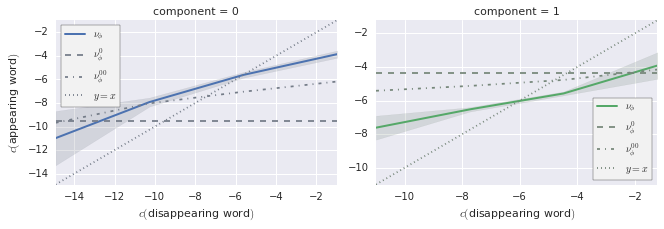

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1643 (cluster-unique) substitutions, but the PCA is in fact computed on 1283 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  ns. global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density


   ** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 1040 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.15789520613194288

intercept                      4.808048
global_aoa                     0.074453
global_clustering              0.068241
global_frequency               0.488134
global_letters_count          -0.062962
global_orthographic_density   -0.064003
global_synonyms_count         -0.001066
dtype: float64

Regressing global frequency with 1040 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.17169722617989724

intercept                                              5.152080
global_aoa                                             0.138844
global_clustering                                      0.813215
global_frequency                                       0.770481
global_letters_count                                  -0.176291
global_orthographic_density                            0.921339
global_sy

Regressing rel frequency with 1040 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.29913491630443245

intercept                  -1.161862
rel_aoa                     0.071205
rel_clustering              0.075614
rel_frequency               0.633261
rel_letters_count          -0.076487
rel_orthographic_density   -0.166838
rel_synonyms_count          0.054548
dtype: float64

Regressing rel frequency with 1040 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.3115936461137865

intercept                                       -1.288739
rel_aoa                                          0.054389
rel_clustering                                   0.152444
rel_frequency                                    0.636723
rel_letters_count                               -0.000160
rel_orthographic_density                        -0.404882
rel_synonyms_count                               0.199076
rel_aoa * rel_clustering                        -0.019583
rel_aoa * rel_frequency           

Regressing global aoa with 952 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.1864321930049695

intercept                      3.759675
global_aoa                     0.423547
global_clustering             -0.077171
global_frequency              -0.035745
global_letters_count           0.072098
global_orthographic_density   -0.033787
global_synonyms_count         -0.037866
dtype: float64

Regressing global aoa with 952 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.20905431675339003

intercept                                              6.069142
global_aoa                                             1.020465
global_clustering                                      0.362213
global_frequency                                      -0.127226
global_letters_count                                  -0.132771
global_orthographic_density                           -2.284556
global_synonyms_count                                 -3.344539
global_aoa * global_clustering             

Regressing rel aoa with 952 measures, with interactions
           ^^^^^^^
R^2 = 0.27002273881685845

intercept                                        0.690926
rel_aoa                                          0.433041
rel_clustering                                  -0.207786
rel_frequency                                    0.053394
rel_letters_count                                0.026082
rel_orthographic_density                         0.443777
rel_synonyms_count                               0.042678
rel_aoa * rel_clustering                         0.041340
rel_aoa * rel_frequency                         -0.043704
rel_aoa * rel_letters_count                     -0.032391
rel_aoa * rel_orthographic_density              -0.034209
rel_aoa * rel_synonyms_count                    -0.001087
rel_clustering * rel_frequency                  -0.013033
rel_clustering * rel_letters_count              -0.015650
rel_clustering * rel_orthographic_density       -0.185869
rel_clustering * rel_synonym

Regressing global clustering with 876 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.19902623222520877

intercept                                             -3.228542
global_aoa                                             0.271442
global_clustering                                      0.168854
global_frequency                                      -0.461101
global_letters_count                                   0.147841
global_orthographic_density                           -0.076616
global_synonyms_count                                 -0.526652
global_aoa * global_clustering                         0.046956
global_aoa * global_frequency                         -0.001095
global_aoa * global_letters_count                     -0.000765
global_aoa * global_orthographic_density               0.004404
global_aoa * global_synonyms_count                    -0.006716
global_clustering * global_frequency                  -0.047474
global_clustering * global_letters_count      

Regressing global clustering with 876 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.17149715956492353

intercept                     -1.863953
global_aoa                    -0.024605
global_clustering              0.441781
global_frequency              -0.079590
global_letters_count          -0.019968
global_orthographic_density   -0.101202
global_synonyms_count         -0.068935
rel_aoa                        0.004419
rel_clustering                -0.043932
rel_frequency                  0.055215
rel_letters_count              0.039264
rel_orthographic_density       0.128684
rel_synonyms_count             0.040285
dtype: float64

Regressing global clustering with 876 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2696735929348709

intercept                                                 8.626753
global_aoa                                                0.131860
global_clustering                                         2.405021
global_frequency      

Regressing rel letters_count with 1040 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.09058058338423236

intercept                      0.118891
global_aoa                    -0.035662
global_clustering             -0.066994
global_frequency               0.001303
global_letters_count           0.337465
global_orthographic_density    0.007142
global_synonyms_count         -0.216091
dtype: float64

Regressing rel letters_count with 1040 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.10838610363141854

intercept                                             -2.860018
global_aoa                                             0.355960
global_clustering                                     -1.746464
global_frequency                                       0.042414
global_letters_count                                  -0.368006
global_orthographic_density                           -1.558800
global_synonyms_count                                 -1.393028
global_aoa *

Regressing global letters_count with 1040 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.23040596699492955

intercept                                                -9.556162
global_aoa                                                1.494142
global_clustering                                        -0.860138
global_frequency                                          1.412188
global_letters_count                                     -0.825882
global_orthographic_density                              -1.577634
global_synonyms_count                                     3.074026
rel_aoa                                                  -3.674950
rel_clustering                                           -2.853407
rel_frequency                                            -0.101825
rel_letters_count                                         1.328127
rel_orthographic_density                                 -1.836202
rel_synonyms_count                                       -5.975176


Regressing rel synonyms_count with 1012 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.10169765031694011

intercept                                              2.252862
global_aoa                                            -0.025133
global_clustering                                      0.376010
global_frequency                                      -0.103644
global_letters_count                                  -0.042299
global_orthographic_density                           -0.309075
global_synonyms_count                                  0.656967
global_aoa * global_clustering                        -0.012425
global_aoa * global_frequency                         -0.004655
global_aoa * global_letters_count                     -0.004465
global_aoa * global_orthographic_density              -0.001502
global_aoa * global_synonyms_count                     0.028458
global_clustering * global_frequency                  -0.019662
global_clustering * global_letters_count   

Regressing global synonyms_count with 1012 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.210237483074191

intercept                                                 5.044196
global_aoa                                               -0.298840
global_clustering                                         1.292454
global_frequency                                         -0.127617
global_letters_count                                      0.268827
global_orthographic_density                               0.065064
global_synonyms_count                                     2.540135
rel_aoa                                                   0.063816
rel_clustering                                           -1.073330
rel_frequency                                            -0.178966
rel_letters_count                                        -0.238774
rel_orthographic_density                                 -0.036434
rel_synonyms_count                                       -3.469972


Regressing rel orthographic_density with 919 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.14882052986082717

intercept                                              1.522979
global_aoa                                            -0.207199
global_clustering                                      0.406479
global_frequency                                       0.081705
global_letters_count                                  -0.310078
global_orthographic_density                            0.111317
global_synonyms_count                                 -0.377250
global_aoa * global_clustering                        -0.026641
global_aoa * global_frequency                         -0.009660
global_aoa * global_letters_count                      0.011673
global_aoa * global_orthographic_density               0.035881
global_aoa * global_synonyms_count                     0.016948
global_clustering * global_frequency                   0.002837
global_clustering * global_lette

Regressing global orthographic_density with 919 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.255585571310575

intercept                                                 13.426205
global_aoa                                                -1.073535
global_clustering                                          1.162201
global_frequency                                          -0.421074
global_letters_count                                      -1.087841
global_orthographic_density                                0.584419
global_synonyms_count                                     -2.037763
rel_aoa                                                    0.958116
rel_clustering                                            -0.523176
rel_frequency                                              0.406663
rel_letters_count                                          0.616129
rel_orthographic_density                                  -0.844324
rel_synonyms_count                          